# General

The spatially-adaptive-combi framework aims at providing a generalized interface for calculating the Combination Technique with spatial adaptive strategies.

Currently this is restricted to the calculation of an integral over a function $f$:

$$\int_{x \in D} f(x) dx$$

where $x$ is an d-dimensional vector and D is the d-dimensional Domain which is defined by the lower bound $a$ and the upper bound $b$. Usually one defines $D=[0,1]^d$ but other rectangular domains are also possible.

# Functions

So let's first look at the pre-defined functions that we can use in the framework. All implemented funcitons can be found in Functions.py and they typically offer the functionality to evaluate the function at a certain point and to return the analytic integral value for a specified domain. Furthermore plotting a function is already available directly in the framework. So let's try one of the functions namely $GenzCornerPeak$.

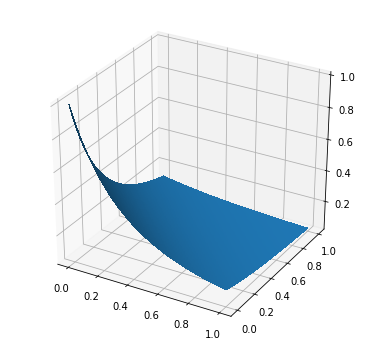

The function value at (0,0.5) is 0.296296296296
The analytical integral value in the Domain [0,1]^d is 0.166666666667


In [1]:
%matplotlib inline
from Function import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
f = GenzCornerPeak(coeffs=coeffs)
f.plot(a, b)
print("The function value at (0,0.5) is", f.eval((0,0.5)))
print("The analytical integral value in the Domain [0,1]^d is", 
      f.getAnalyticSolutionIntegral(np.zeros(dim), np.ones(dim)))

There are many more functions pre-defined in Function.py. It is also possible to compose functions and create combined and scaled functions.

# Standard Combination Technique

So now let's first look at the Truncated Combination Technique with a predefined maximum und minimum level and let's integrate the GenzCornerPeak from before with it. For this purpose we also have to select a grid on which we want to perform the combi. We will use here the equidistant Trapezoidal grid that applies the trapezoidal rule to integrate the function. There are more grids available such as Leja, Clenshaw-Curtis, Gauss-Legendre...

0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
CombiSolution [0.17290317]
Analytic Solution 0.16666666666666663
Difference [0.00623651]


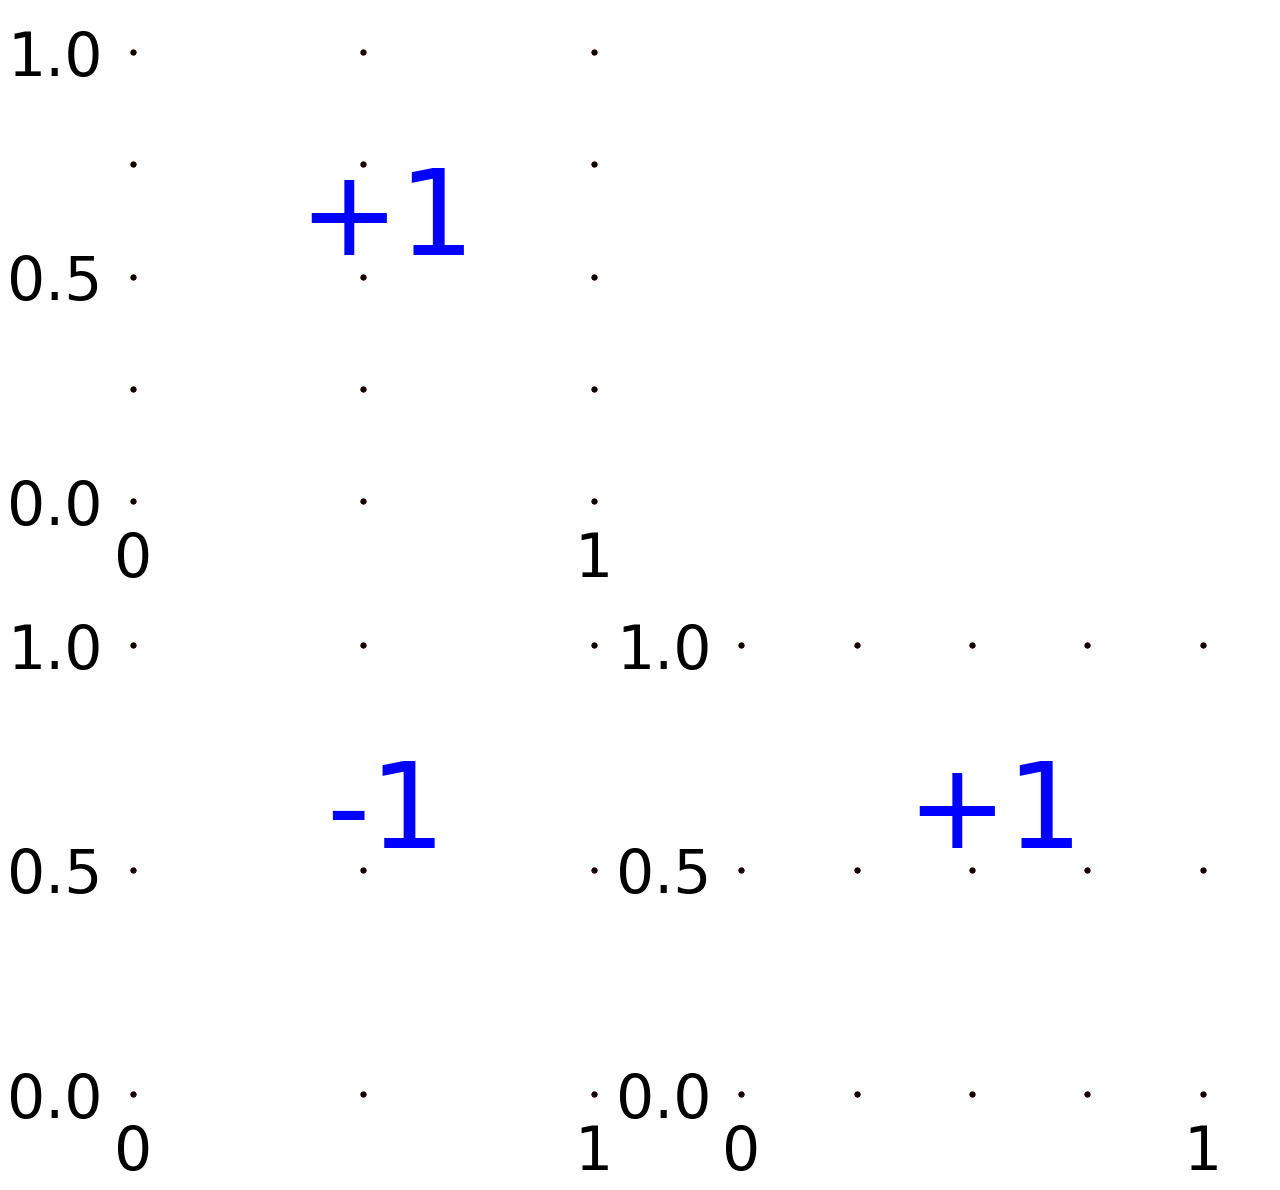

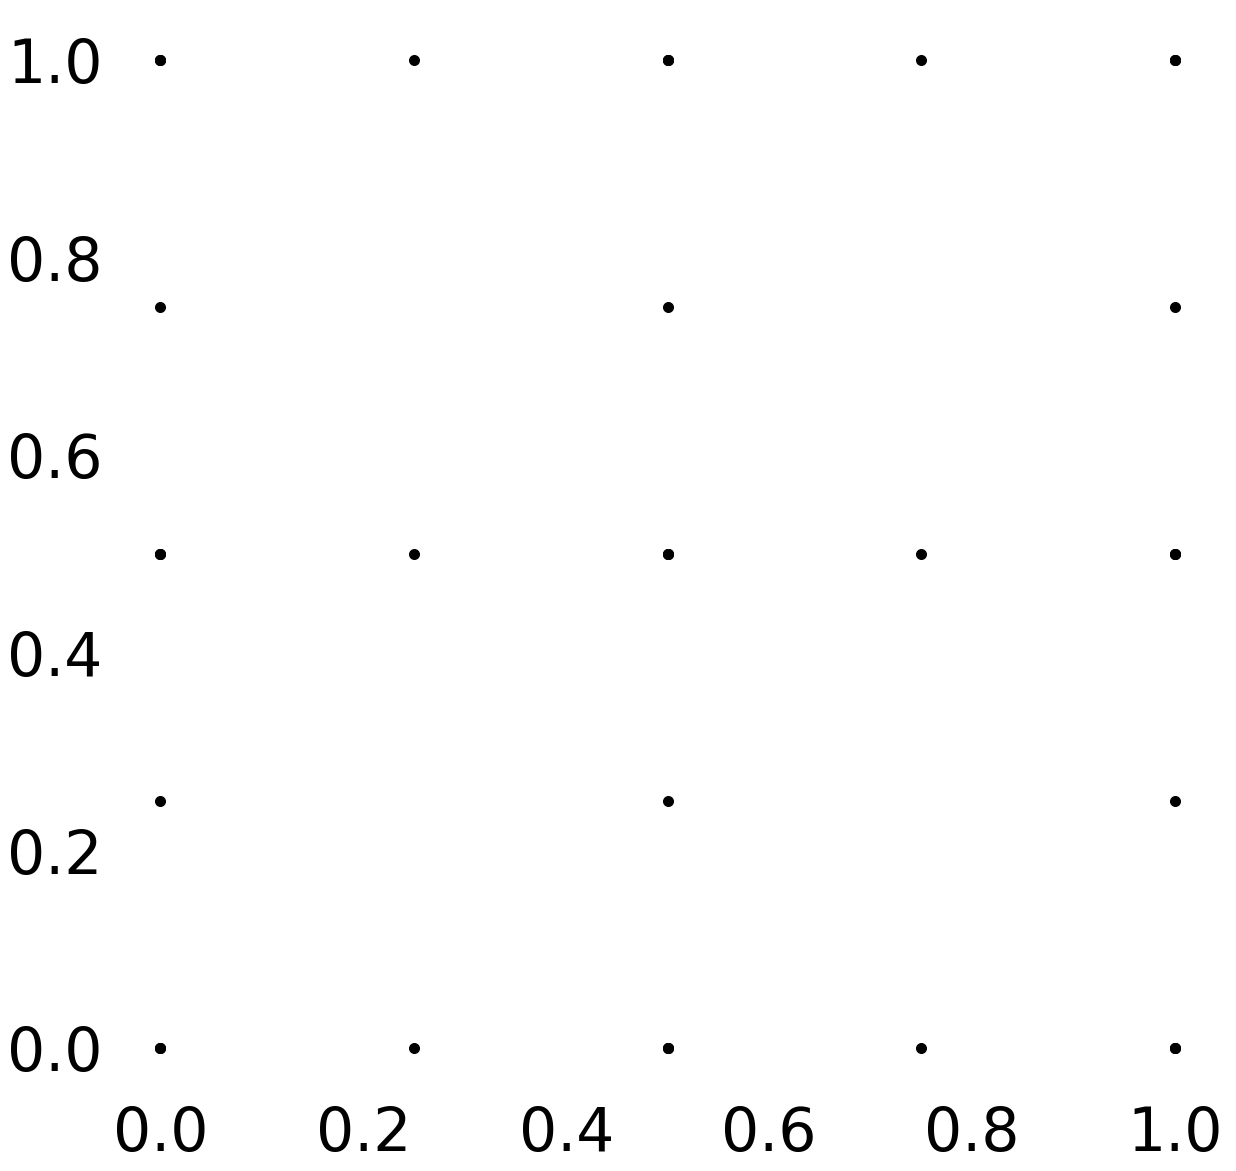

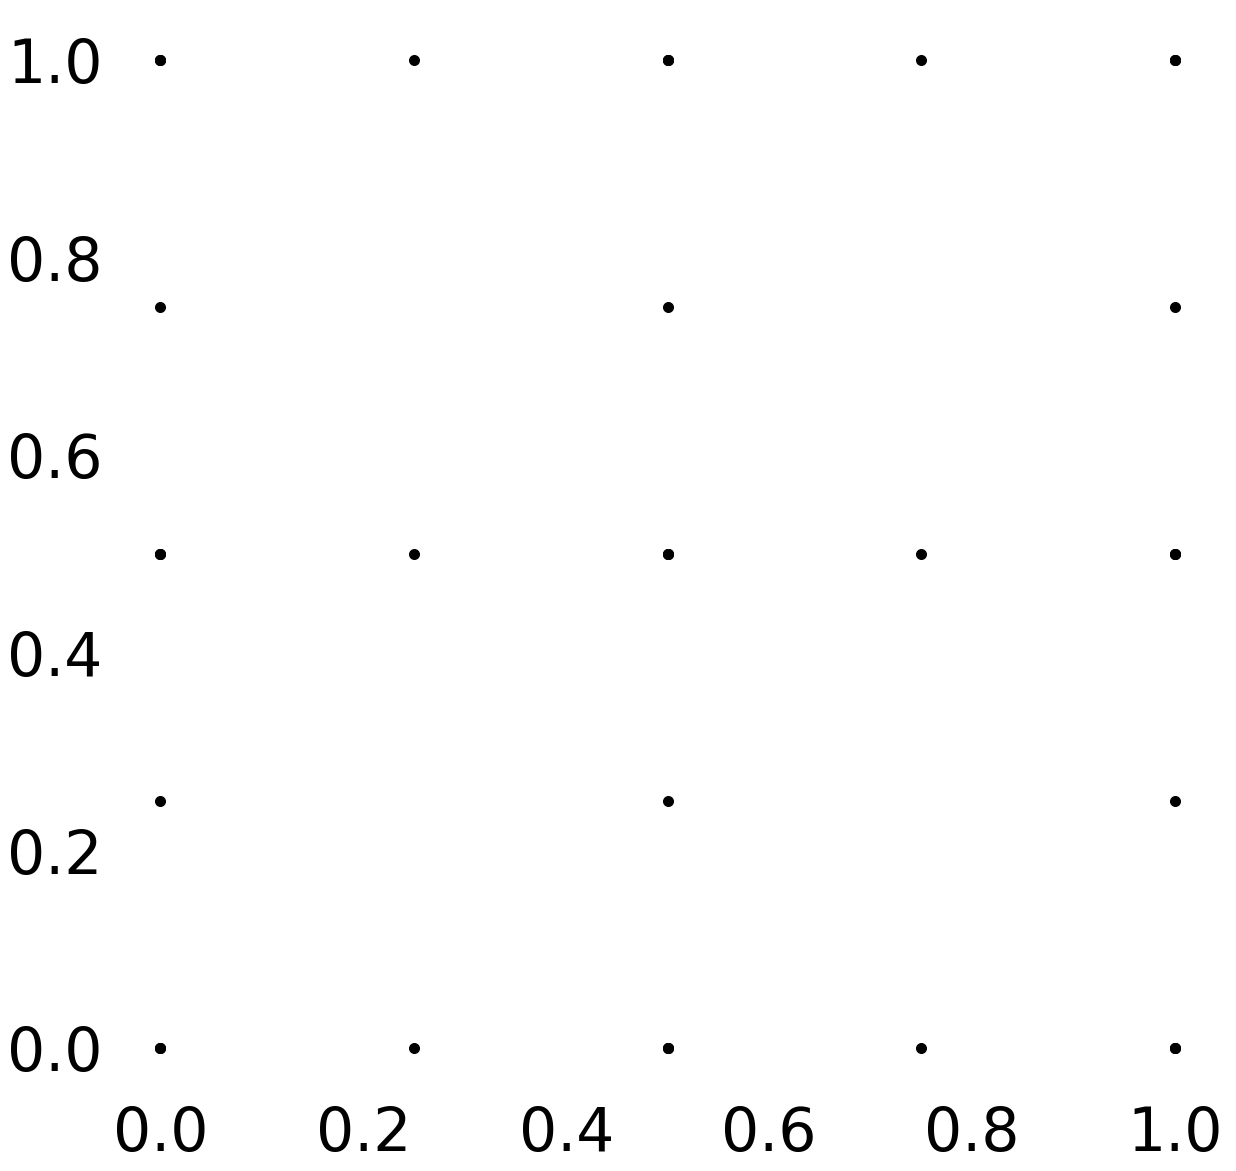

In [9]:
%matplotlib inline
from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, dim=dim)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = StandardCombi(a, b, grid)
minimum_level = 1
maximum_level = 2
combiObject.perform_combi(minimum_level, maximum_level, f, reference_solution=f.getAnalyticSolutionIntegral(a,b))
combiObject.print_resulting_combi_scheme(markersize=5)
combiObject.print_resulting_sparsegrid(markersize=10)


The output shows for the combination Scheme that is used which defines the level vectors and the coefficients of the grids. Then the solution of the combination integral is listed followed by the analytic solution and the absolute error. Finally the graphical plot of the combination scheme and the resulting sparse grid is shown.

# Dimension Adaptive Combination Technique

An often used variant of the Standard Combination Technique is the dimension adaptive Combination Technique. An implementation which applies this method is now available within the framework. It is called similarly to the Standard Combination Technique but now we also have to define a tolerance to indicate how long we want to adapt the scheme. The adaptation stops once the relative error of the integration falls below this tolerance threshold.

[(1, 4), (2, 3), (3, 2), (4, 1)]
[(1, 3), (2, 2), (3, 1)]
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [2, 3] 1
5 [4, 1] 1
6 [1, 4] 1
Current combi integral: 0.166628181093
Currentrelative error: 0.000230913439468
Current error: 0.000230913439468
Refining (4, 1)
Current combi integral: 0.166384719417
Currentrelative error: 0.00169168349915
Current error: 0.00169168349915
Refining (1, 4)
Current combi integral: 0.16614125774
Currentrelative error: 0.00315245355884
Current error: 0.00315245355884
Refining (1, 5)
Current combi integral: 0.166080327471
Currentrelative error: 0.00351803517475
Current error: 0.00351803517475
Refining (5, 1)
Current combi integral: 0.166019397202
Currentrelative error: 0.00388361679066
Current error: 0.00388361679066
Refining (2, 3)
Current combi integral: 0.166168920548
Currentrelative error: 0.0029864767114
Current error: 0.0029864767114
Refining (3, 2)
Current combi integral: 0.16647827546
Currentrelative error: 0.0011303472419
Current error: 0.0011303

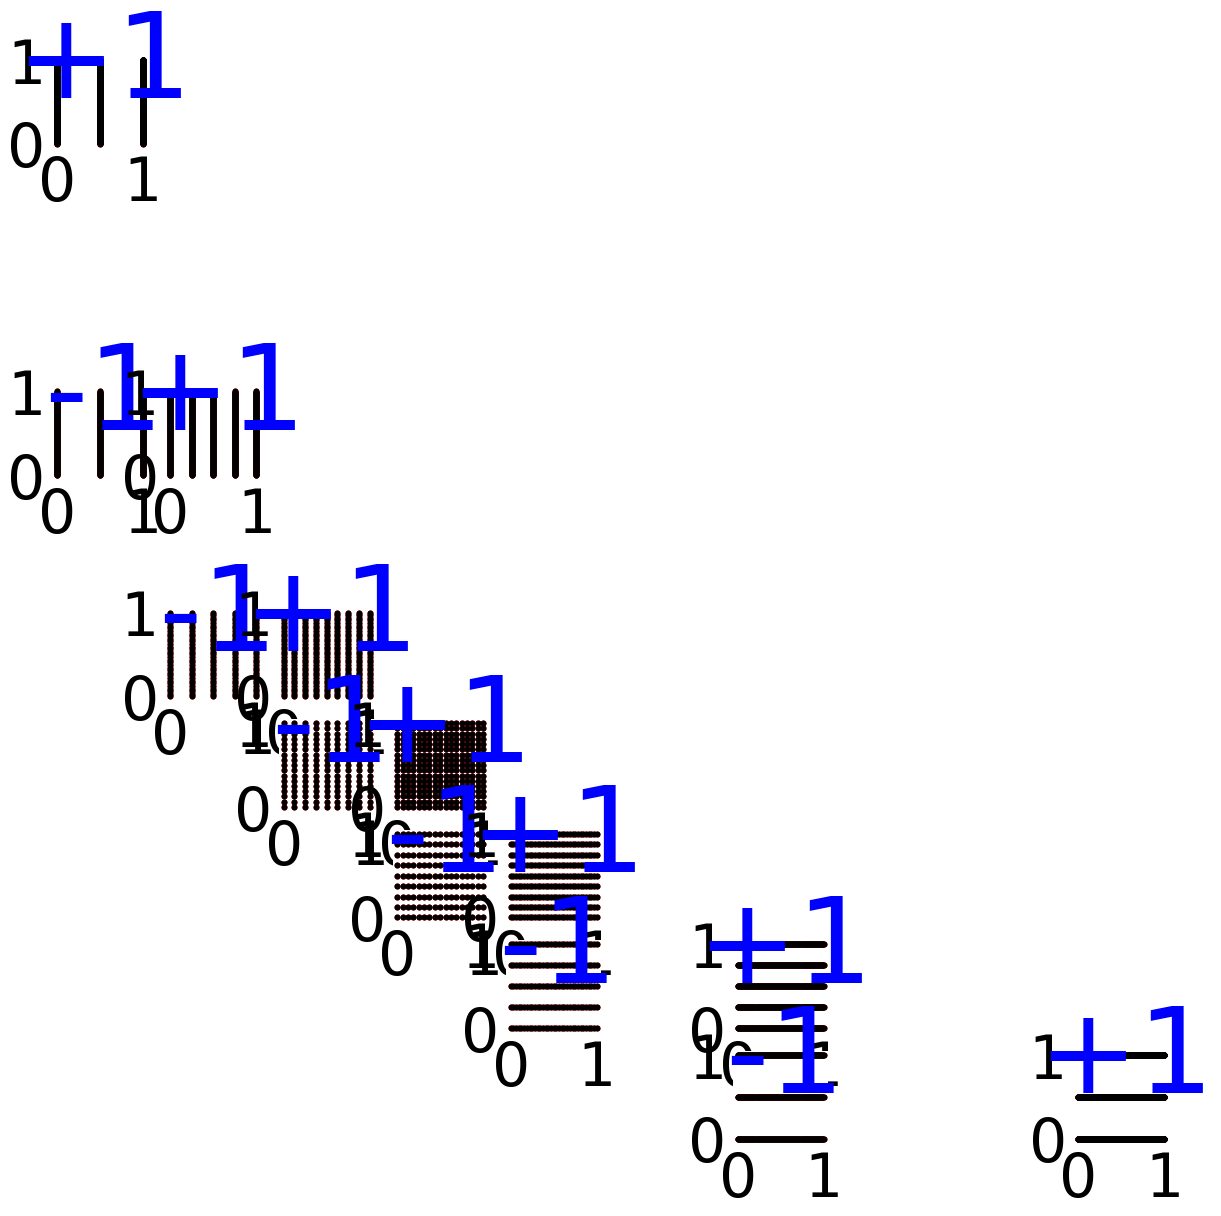

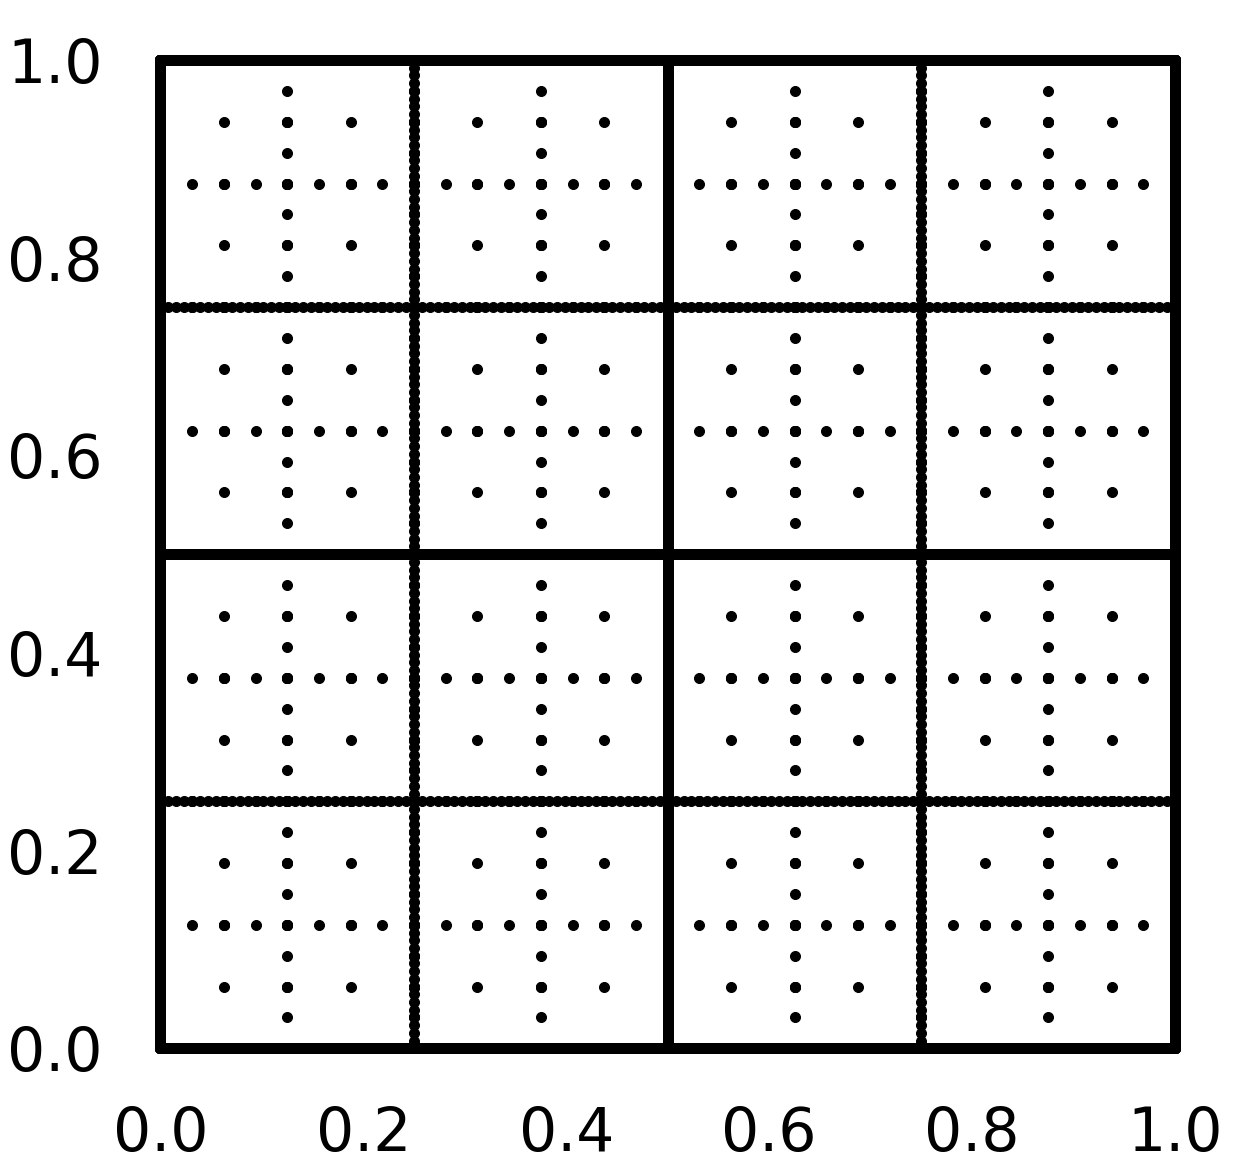

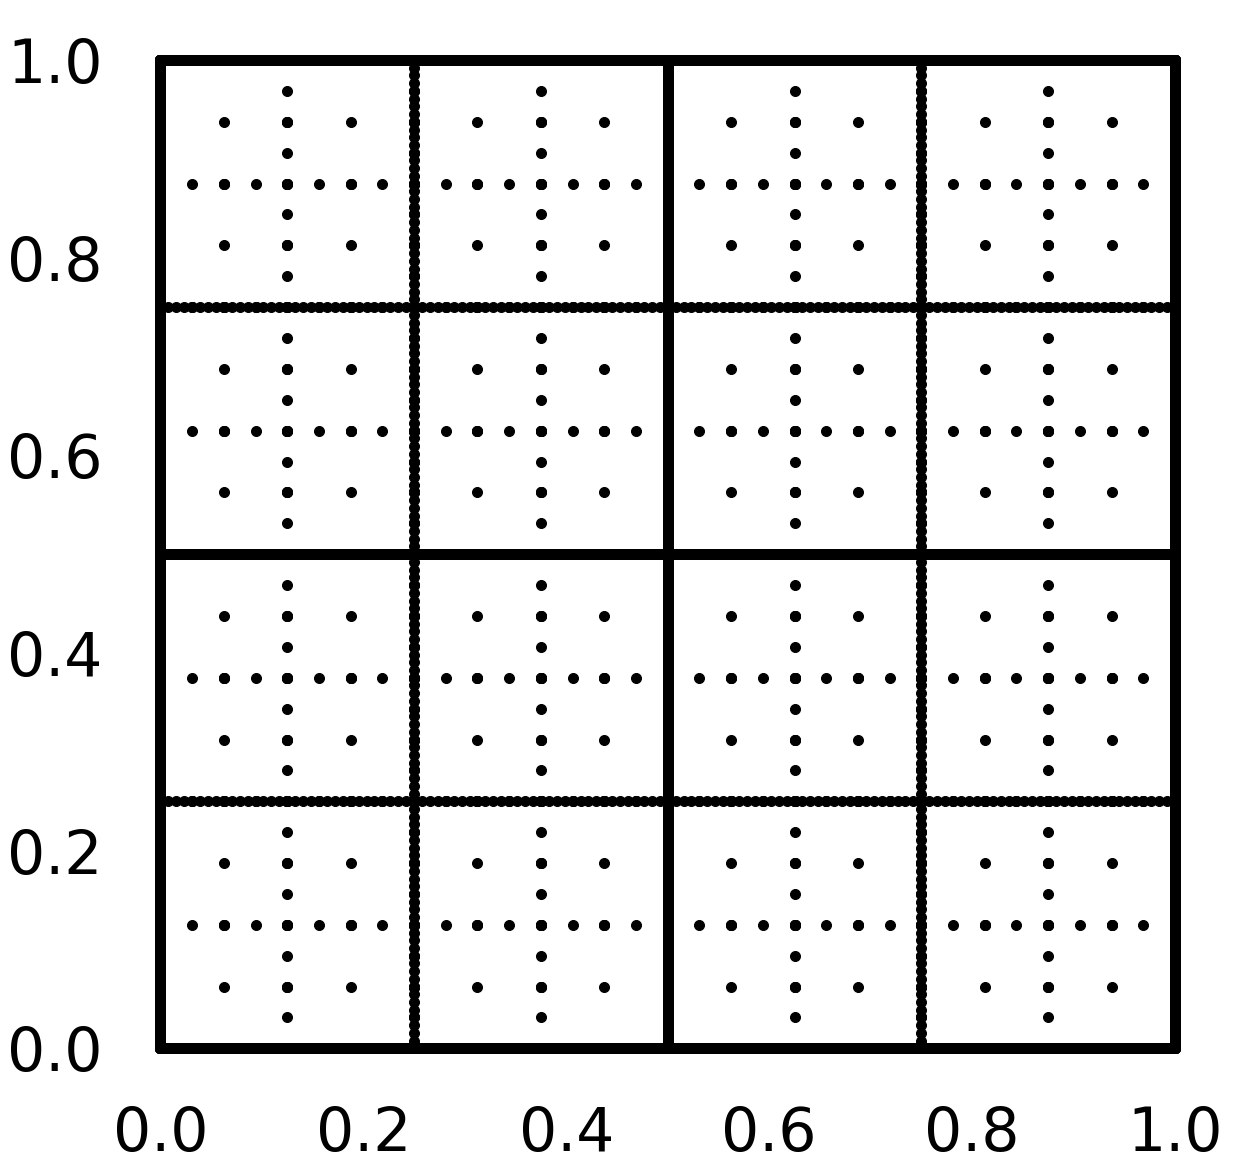

In [5]:
%matplotlib inline
from Function import *
from DimAdaptiveCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, dim=dim)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = DimAdaptiveCombi(a, b, grid)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f, 10**-4, reference_solution=f.getAnalyticSolutionIntegral(a,b))
combiObject.print_resulting_combi_scheme(markersize=5)
combiObject.print_resulting_sparsegrid(markersize=10)

# SpatiallyAdaptiveCombi

Now we come to the core element of this framework: The spatially adaptive Combination Technique. Here several techniques are implemented and can be tested for all test functions. After configuring the grid, the function, and the dimension we need to create the object for the respective strategy (currently we have the $SpatiallyAdaptiveFixedScheme$, the $SpatiallyAdaptiveExtendScheme$, the $SpatiallyAdaptiveCellScheme$ and the currently in construction $SpatiallyAdaptiveSingleDimensions$). The different Schemes have different configuration parameters one can choose. For further information have a look in the respective class file. The calling conventions for the spatially adaptive combi slightly differe from those of the standard combis and also include and $errorOperator$ which controls the error estimations and we also have the oportunity to plot the sparse grid and the combination scheme after each refinement step by setting $do\_plot$ to $true$. In the following we will demonstrate the refinement for to schemes including the respective plots.

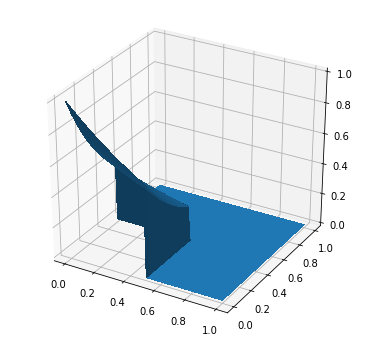

Reference solution: 0.12436002963217704
0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
max surplus error: 0.004963526896750302 total surplus error: 0.039708215174002415
combiintegral: 0.08658321517400241
Current error: 0.3037697447476341
Split in dimension 0 , maxTwinError = [0.08658322]
Finished refinement
Refined  1  times
Refinement Graph:


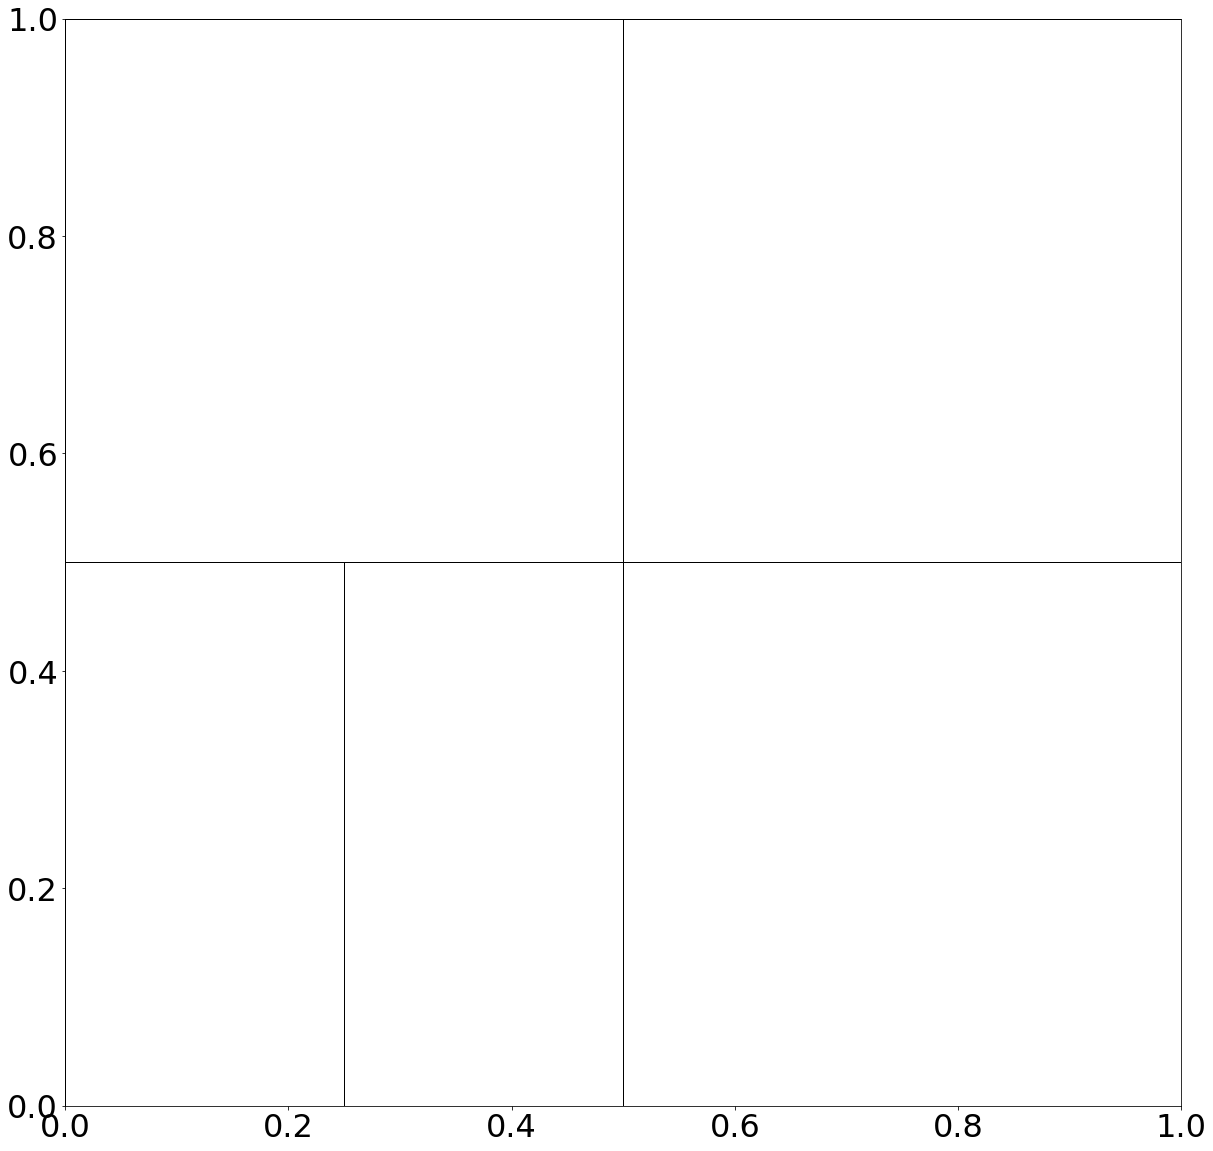

Combi Scheme:


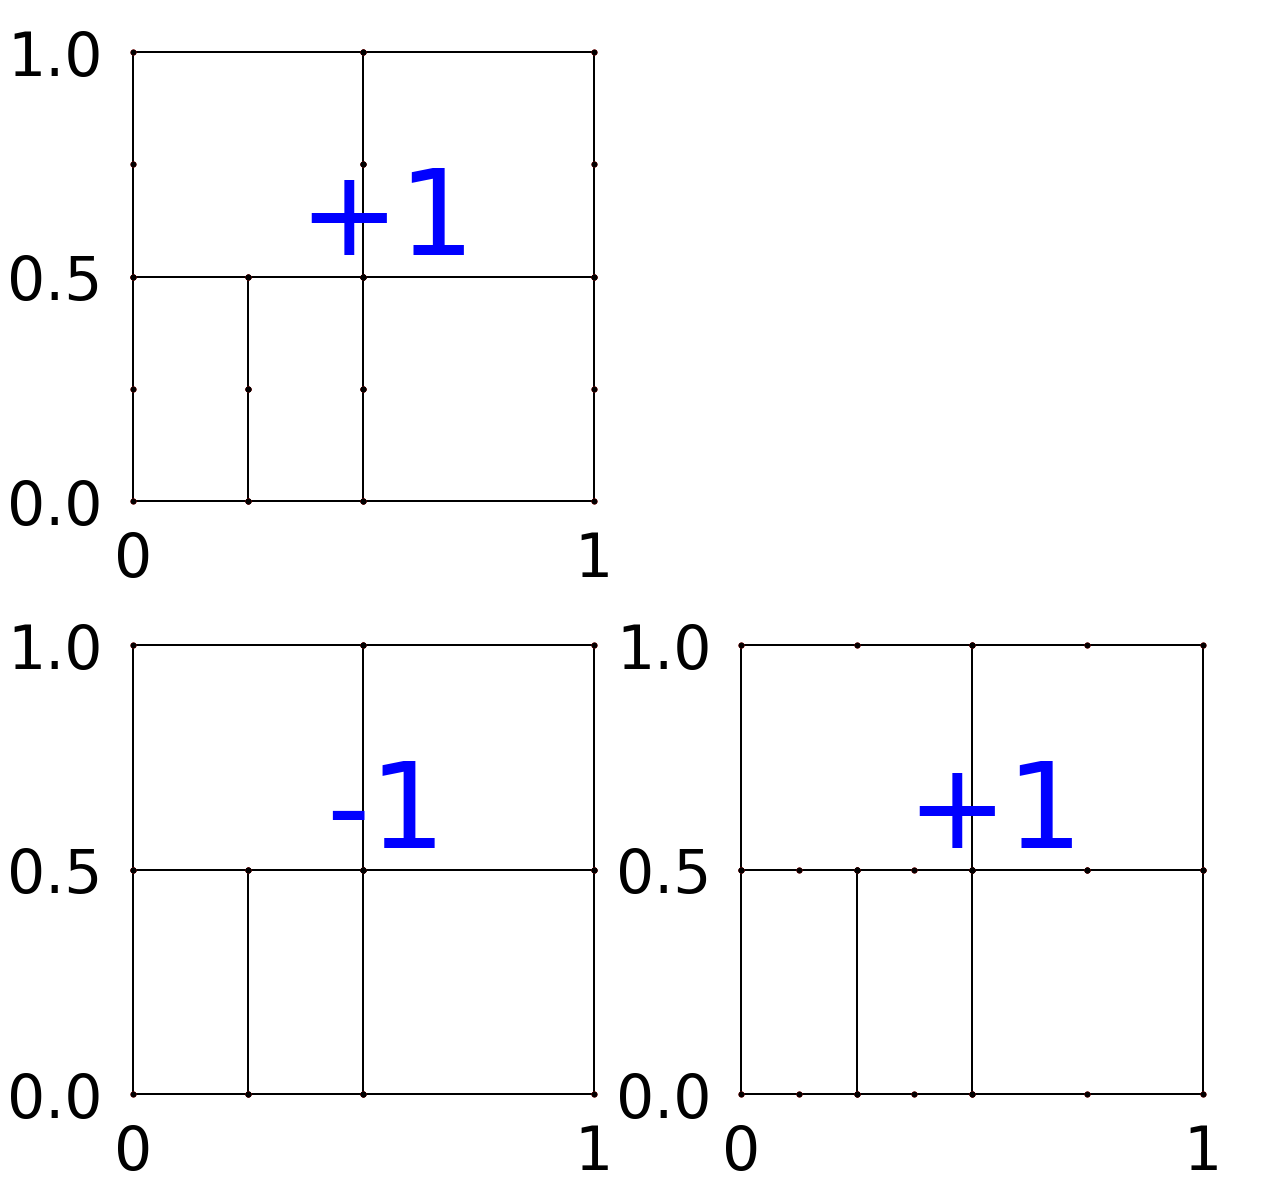

Resulting Sparse Grid:


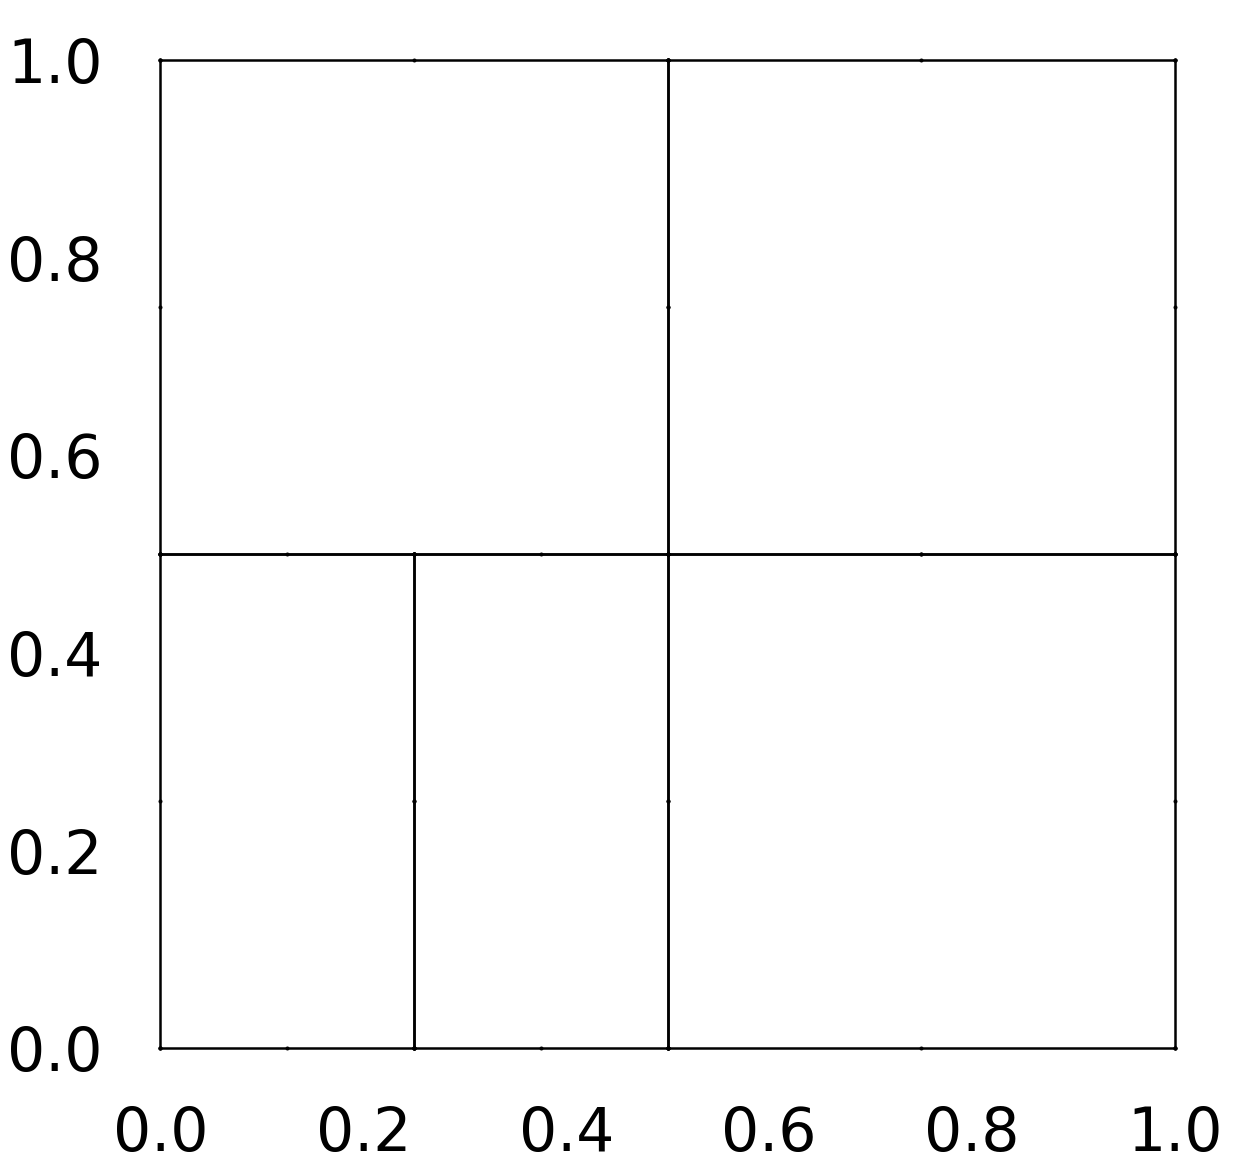

max surplus error: 0.0012796473382979106 total surplus error: 0.010949595656317299
combiintegral: 0.0975328108303197
Current error: 0.21572219692456587
Split in dimension 1 , maxTwinError = [0.04329161]
Finished refinement
Refined  1  times
Refinement Graph:


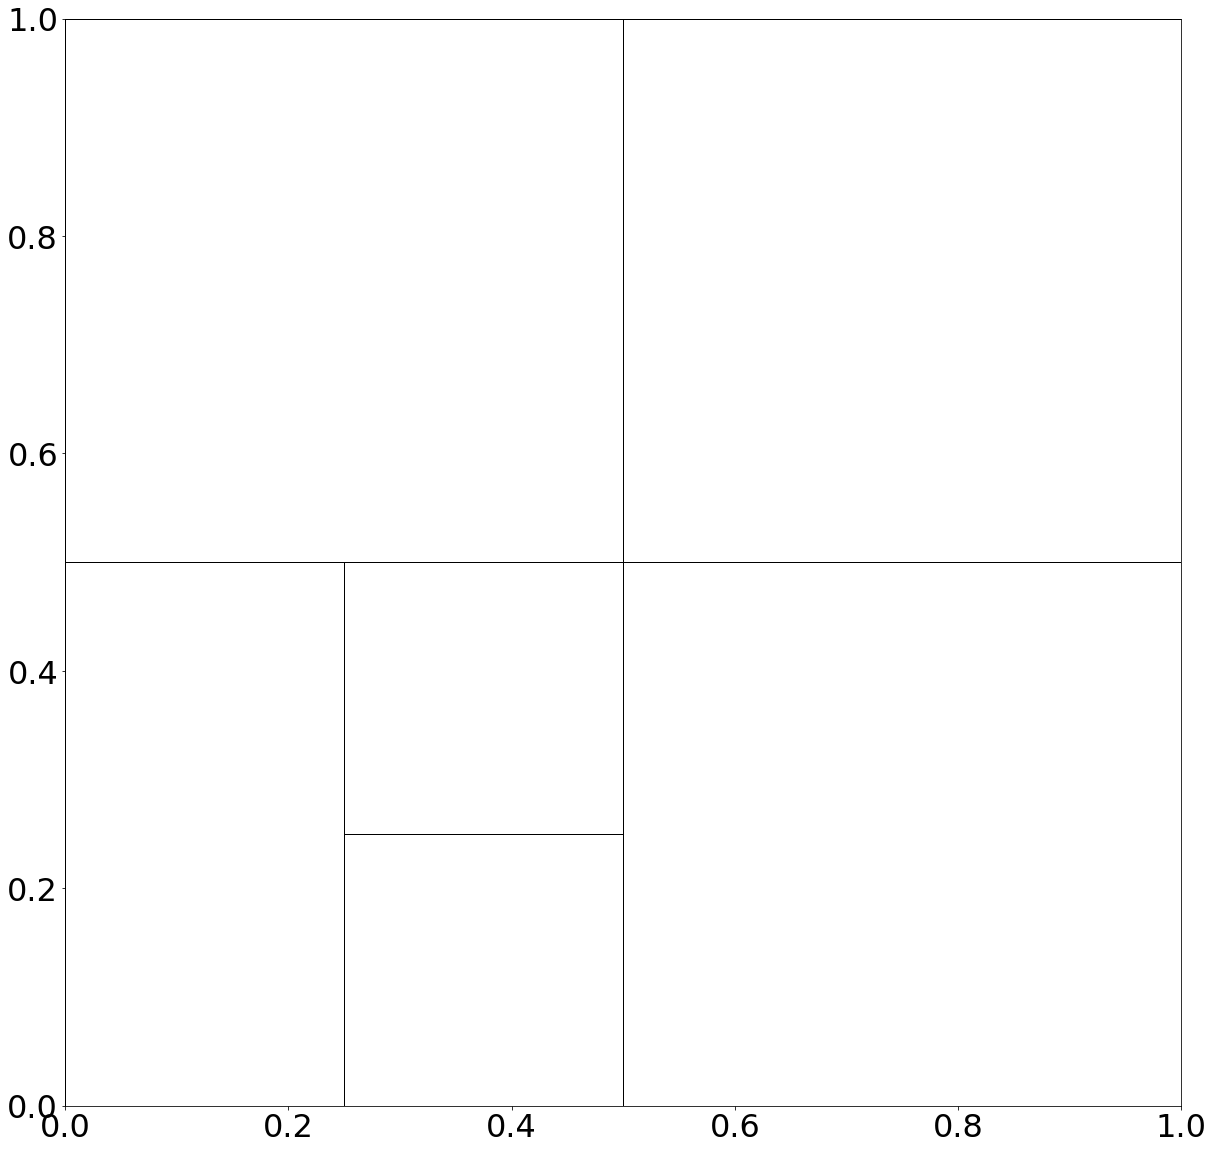

Combi Scheme:


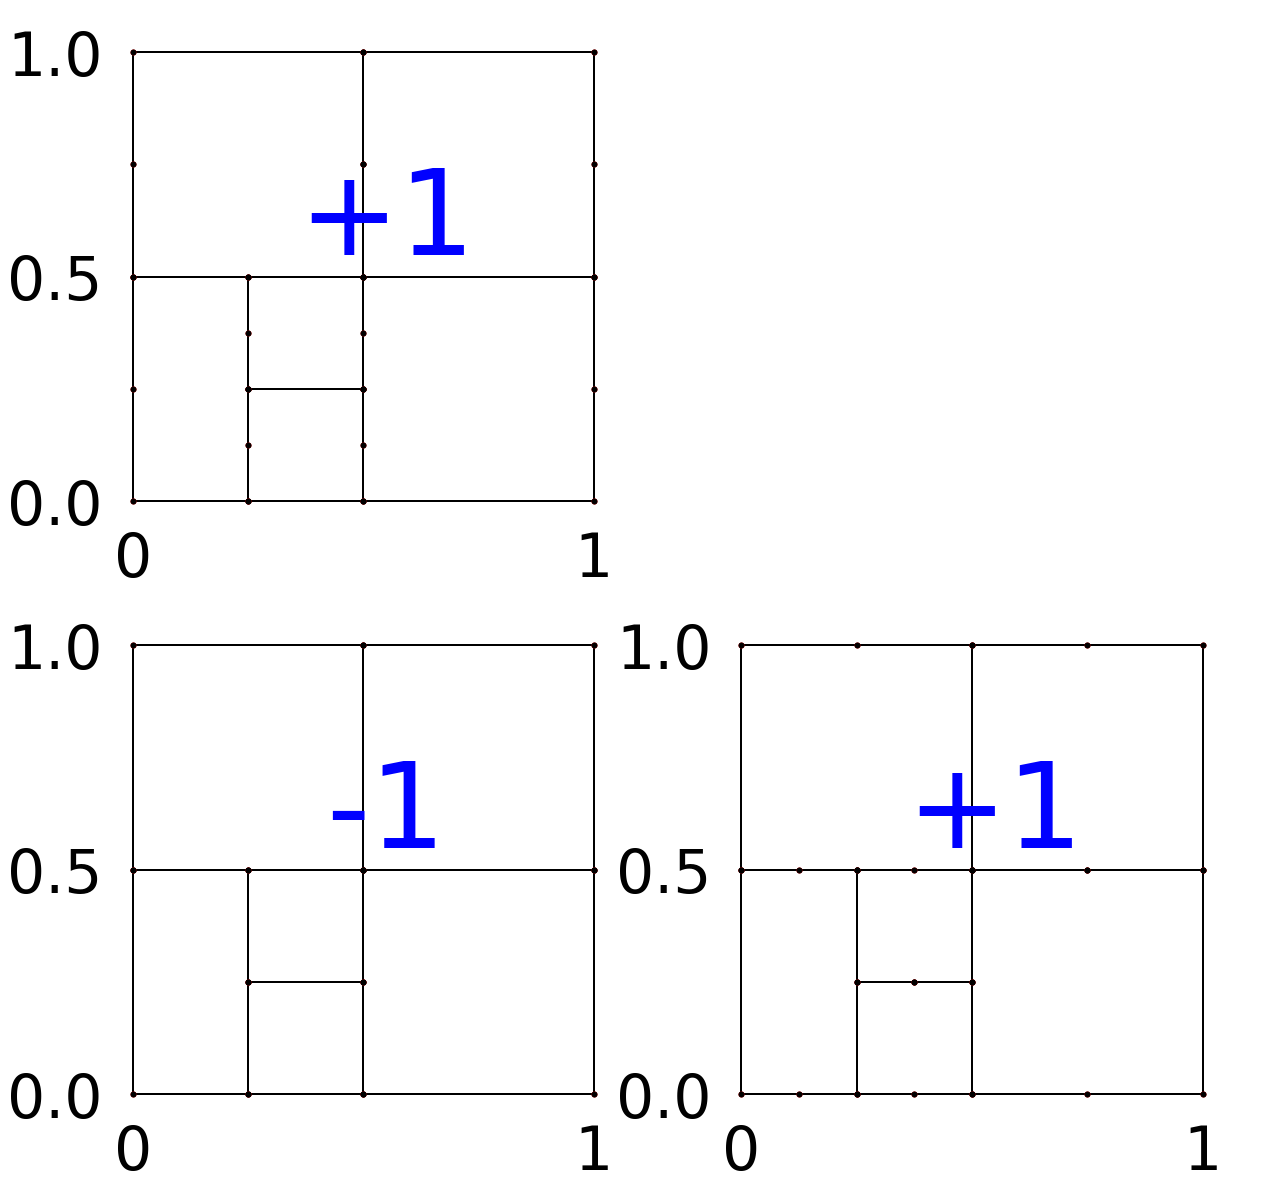

Resulting Sparse Grid:


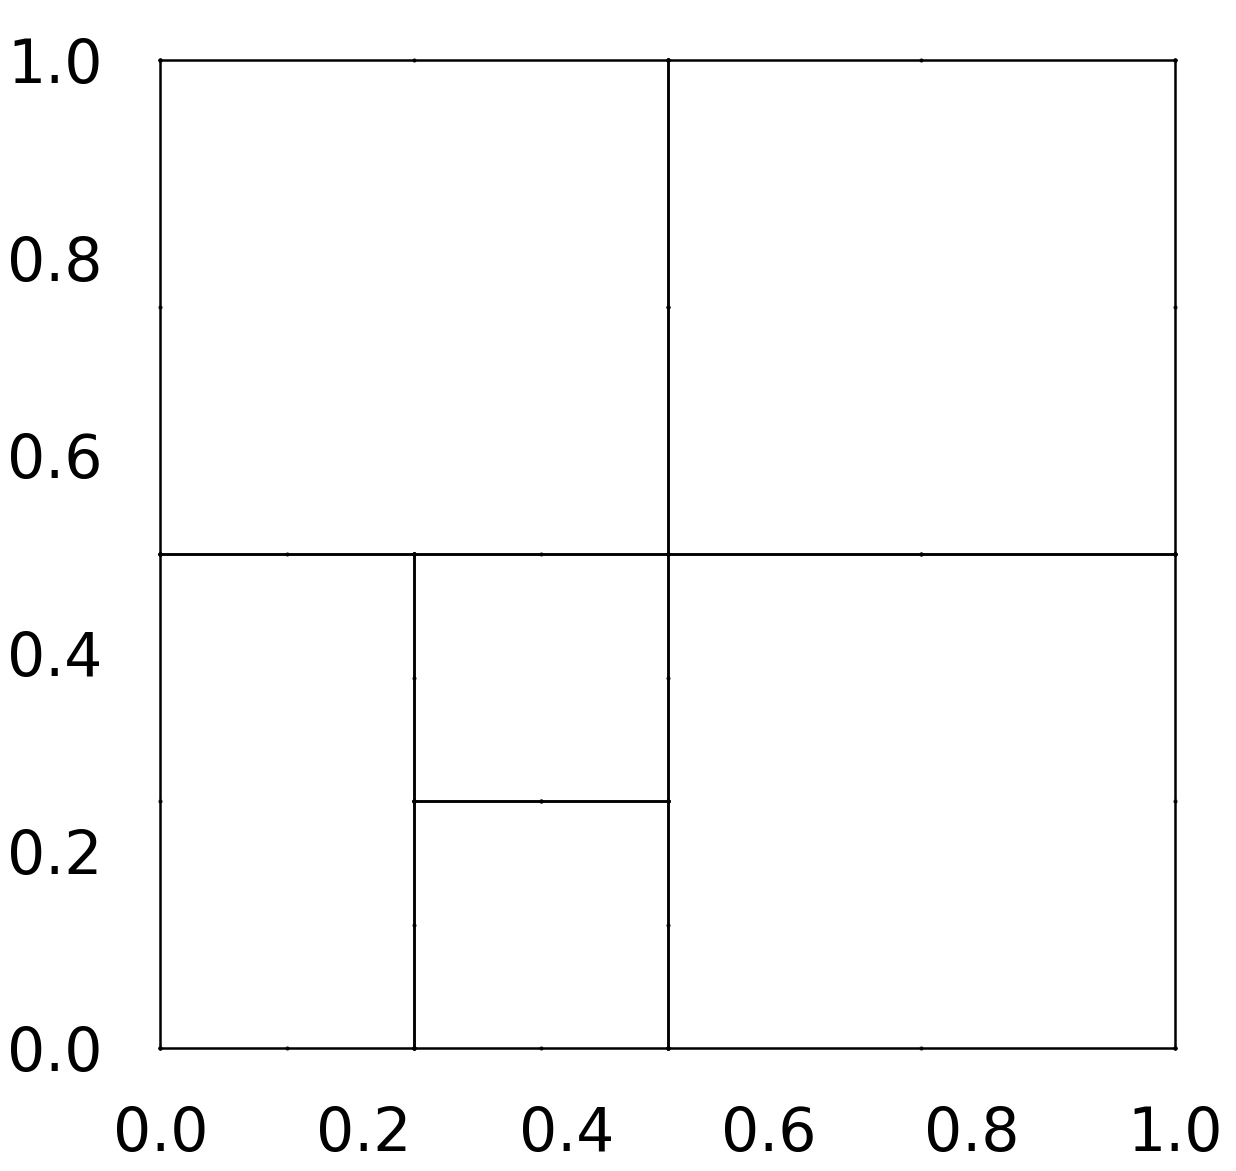

max surplus error: 0.00031920012594004155 total surplus error: 0.0034641631369354362
combiintegral: 0.10028455701732113
Current error: 0.19359494112428713
New scheme
0 [1, 3] 1.0
1 [2, 2] 1.0
2 [3, 1] 1.0
3 [1, 2] -1.0
4 [2, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


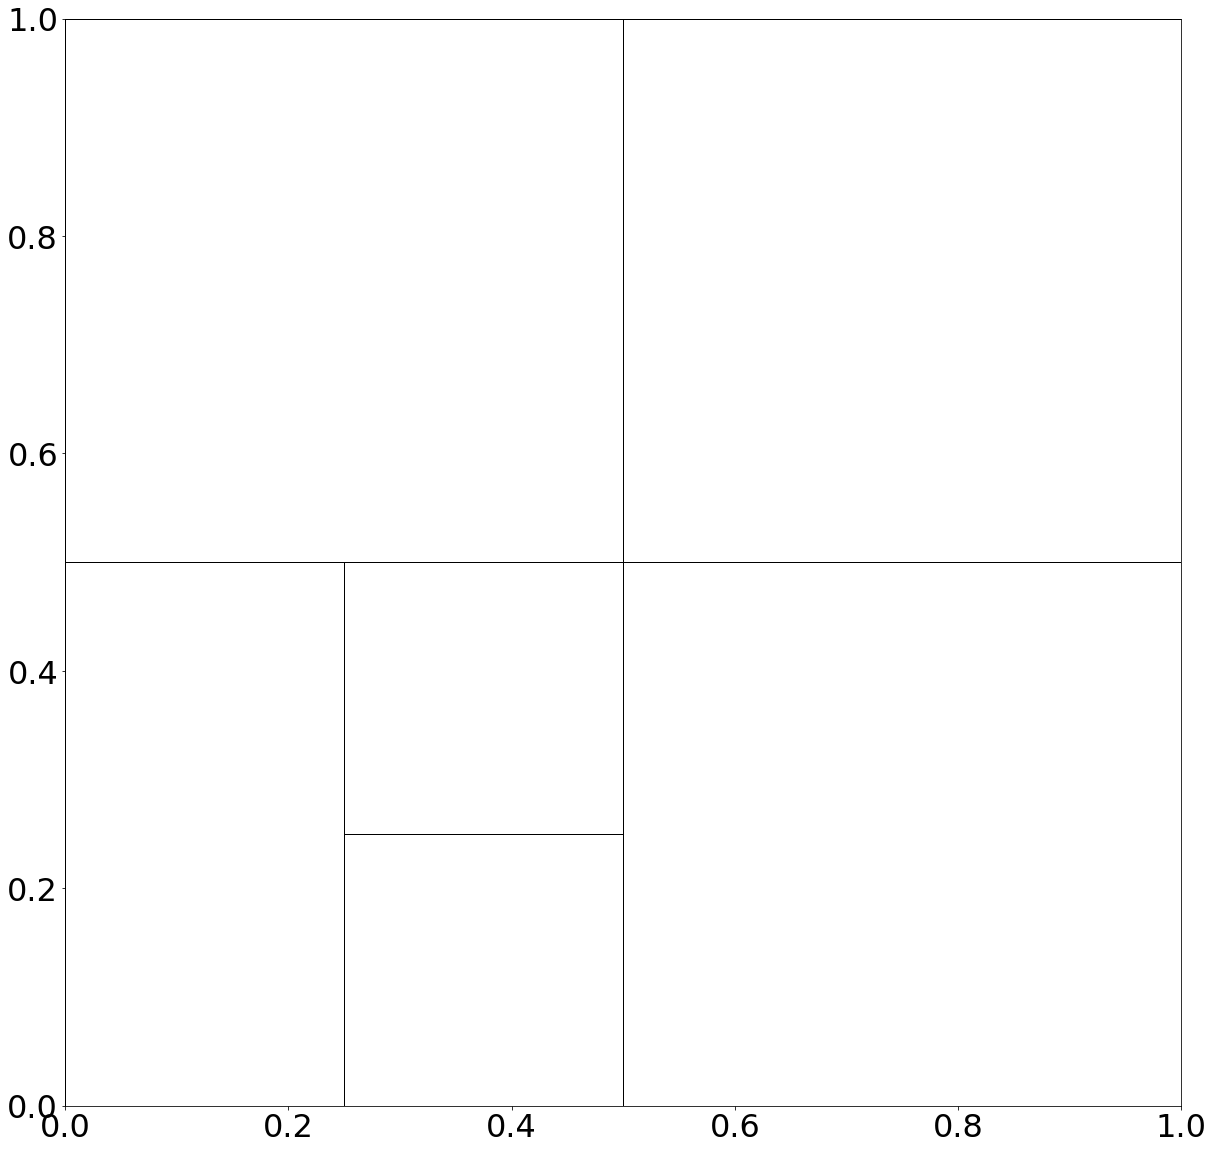

Combi Scheme:


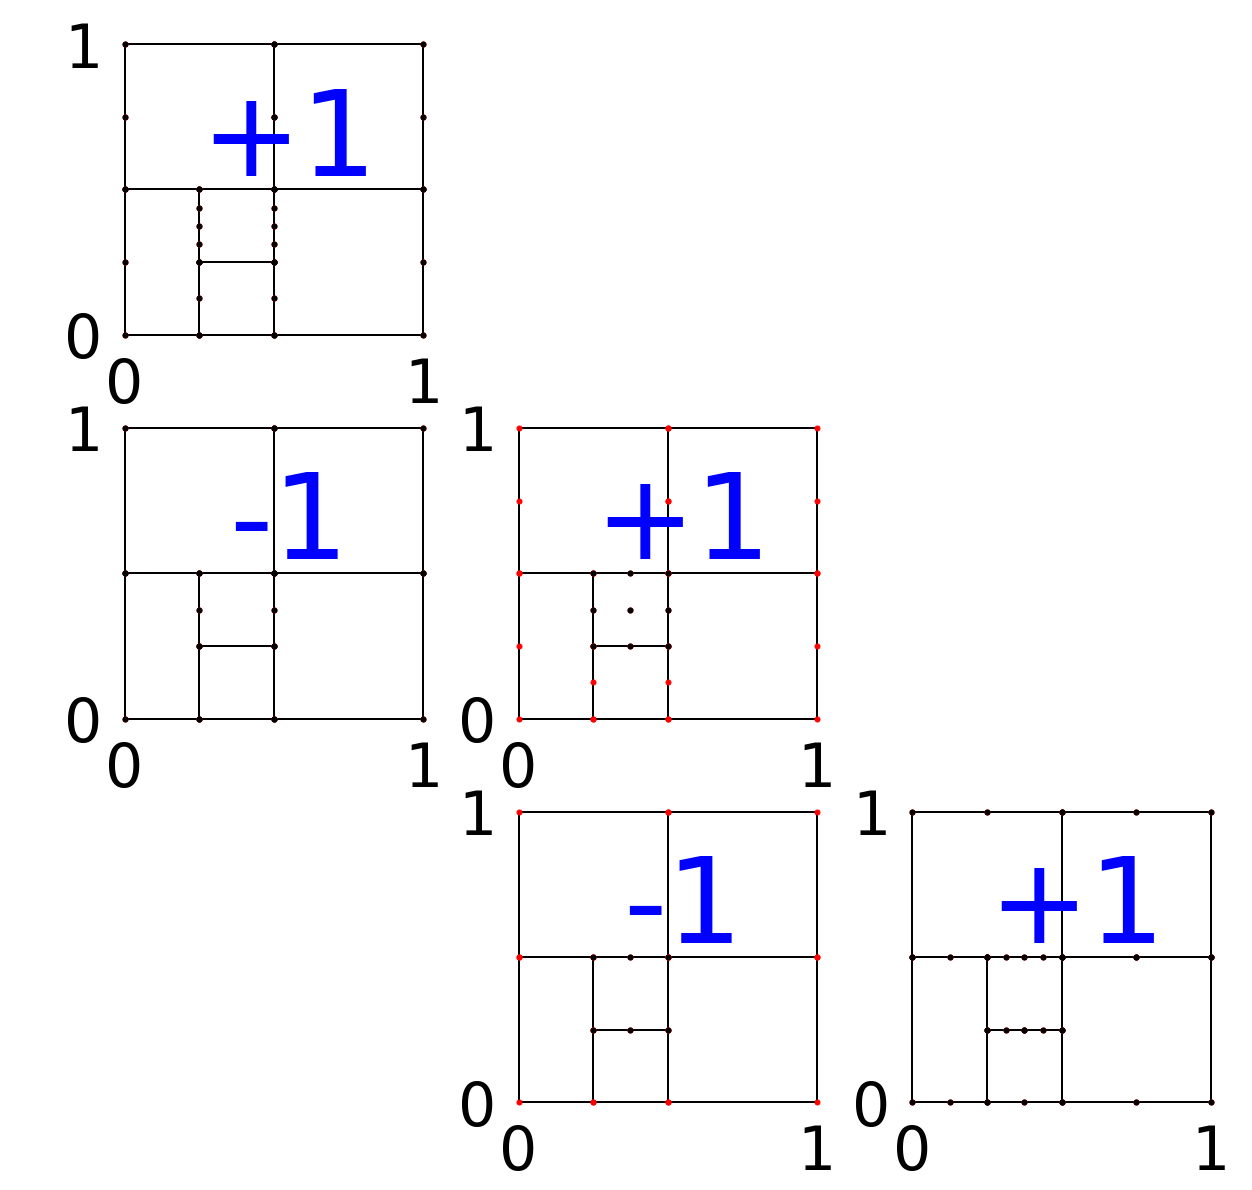

Resulting Sparse Grid:


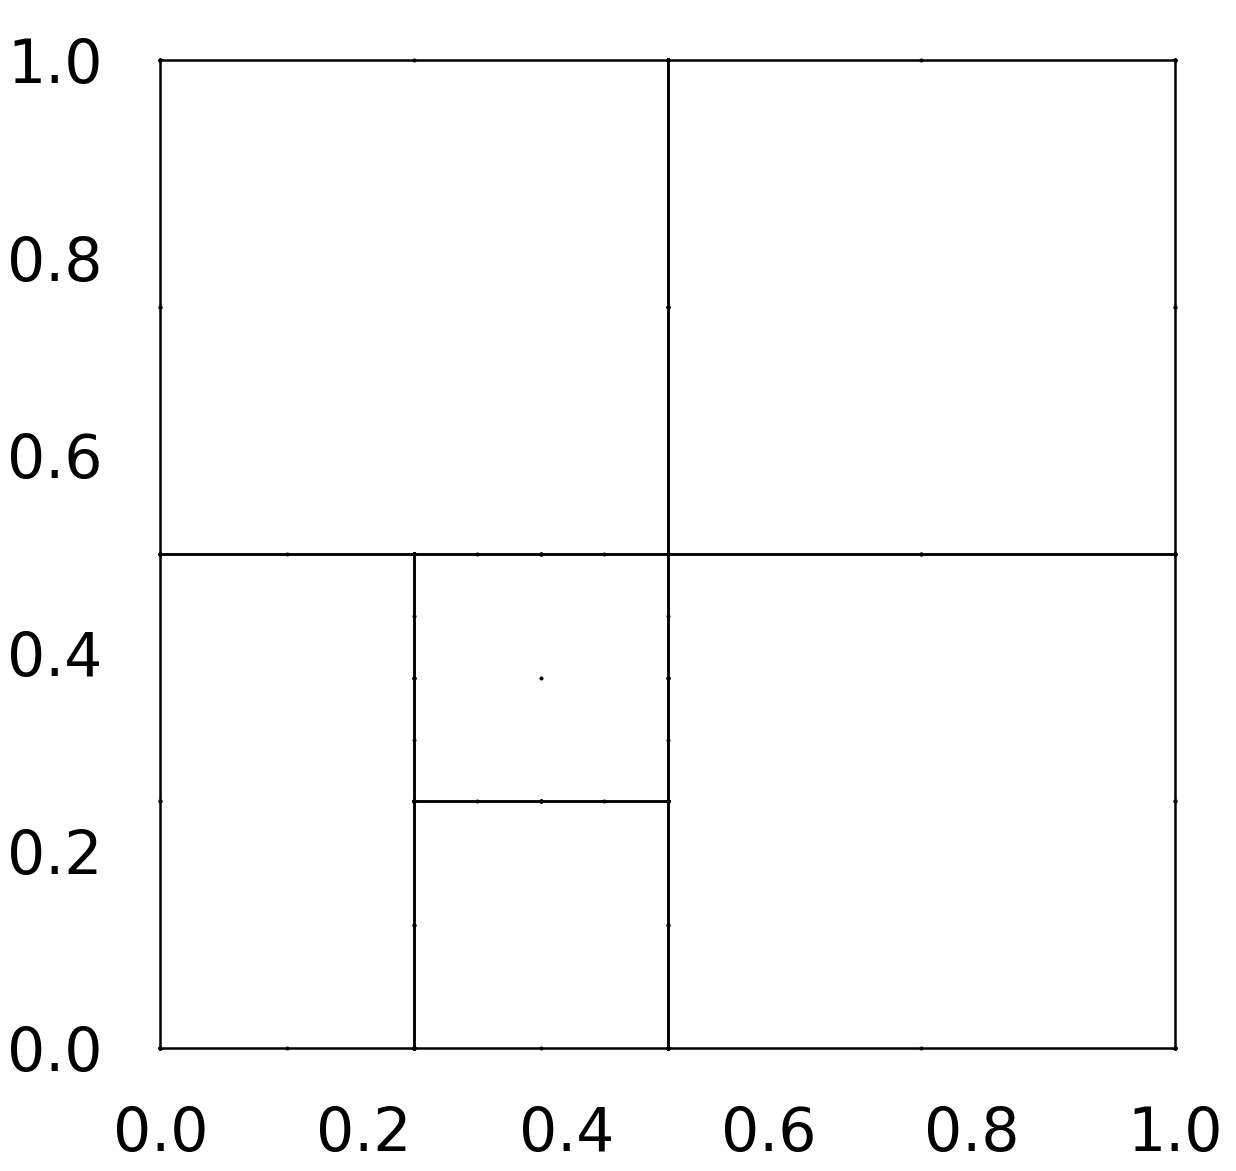

max surplus error: 0.00019324731637914913 total surplus error: 0.004195766507860639
combiintegral: 0.10356976139576664
Current error: 0.1671780579170199
Split in dimension 1 , maxTwinError = [0.01446782]
Finished refinement
Refined  1  times
Refinement Graph:


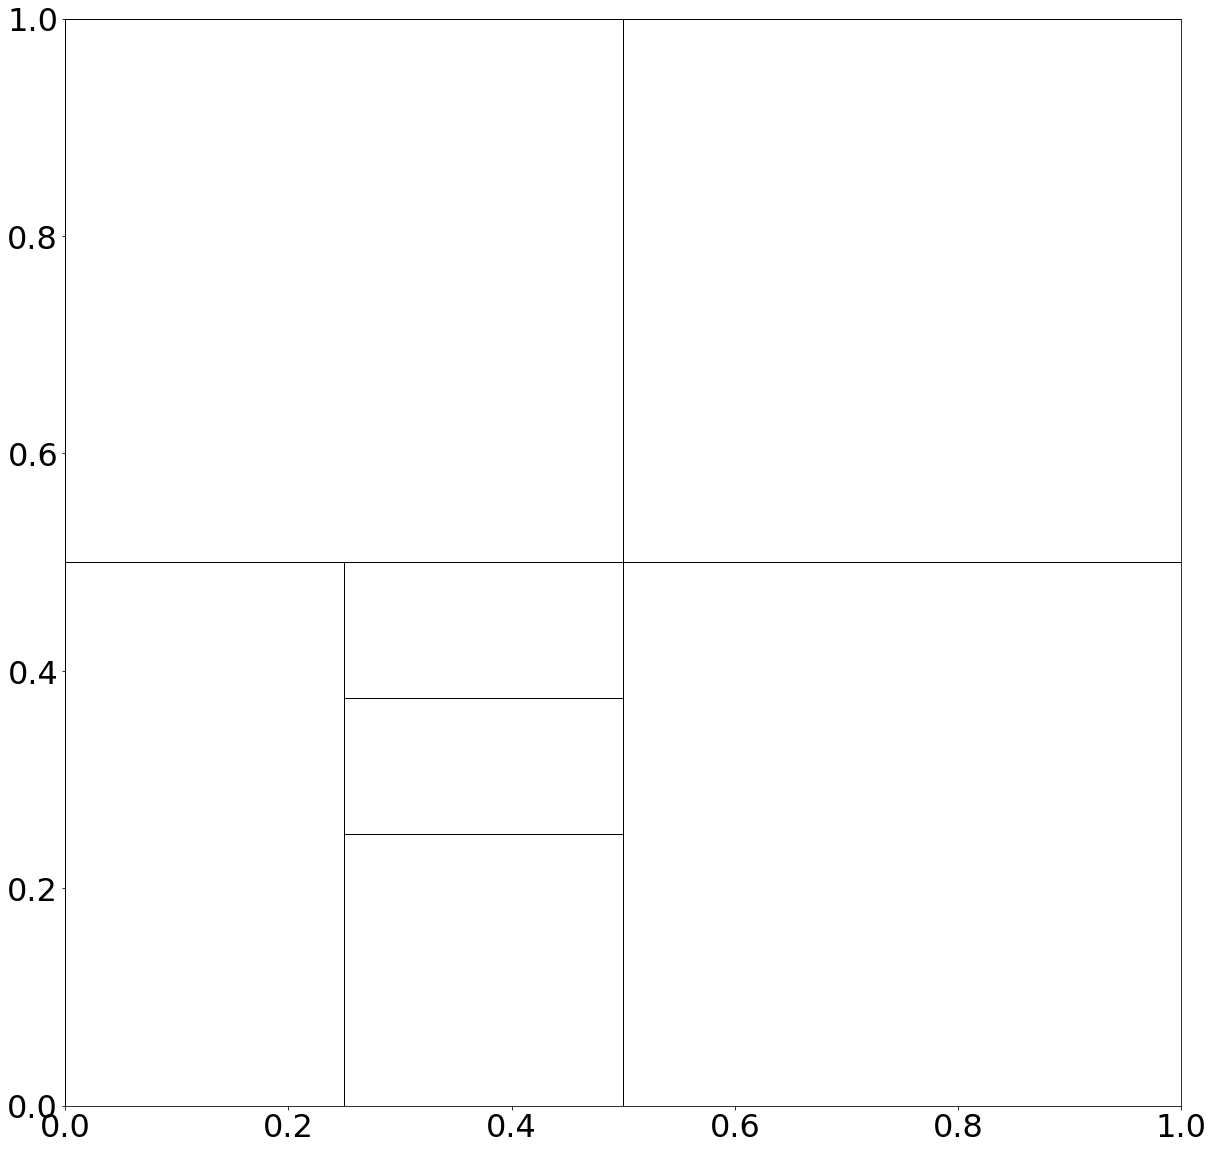

Combi Scheme:


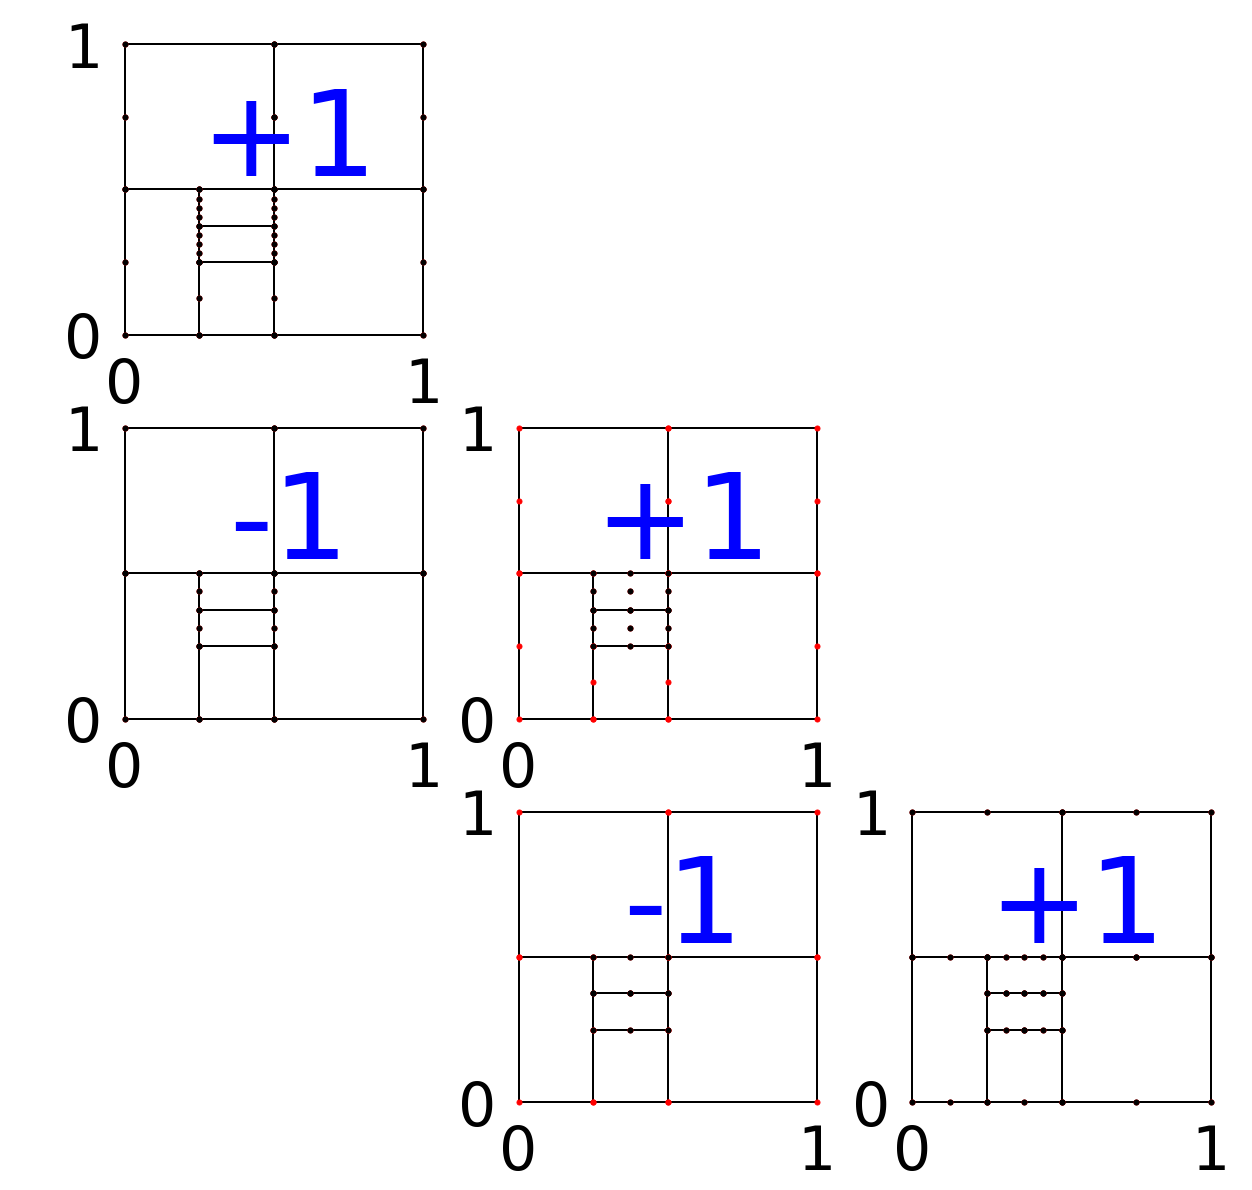

Resulting Sparse Grid:


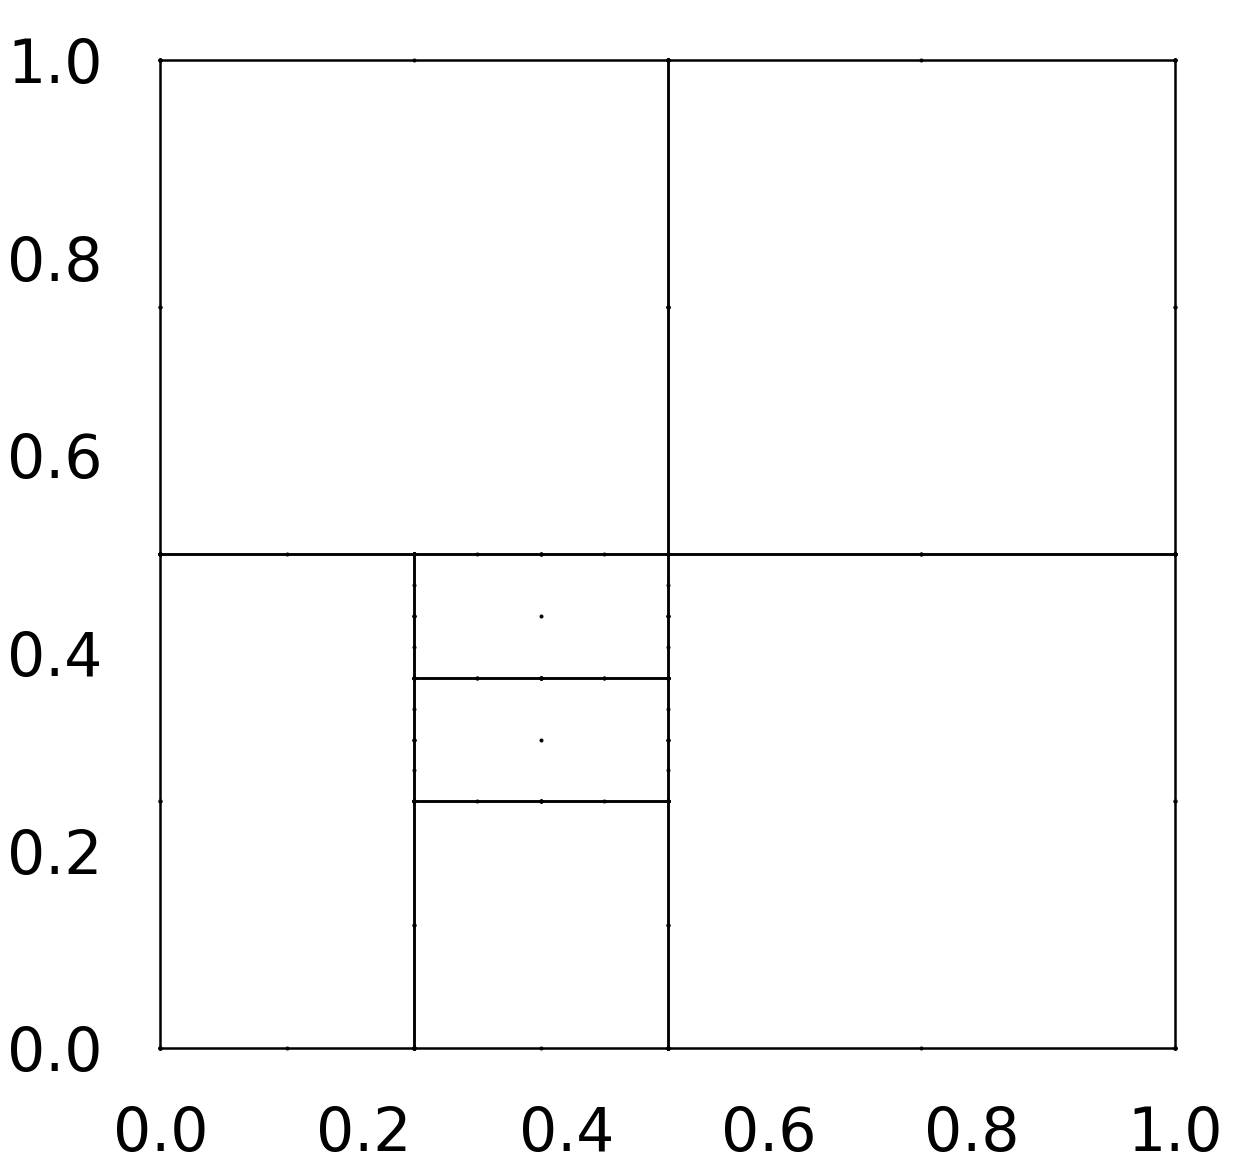

max surplus error: 8.905211874175173e-05 total surplus error: 0.0022578521316842792
combiintegral: 0.1049258318317796
Current error: 0.15627366652998143
Finished refinement
Refined  1  times
Refinement Graph:


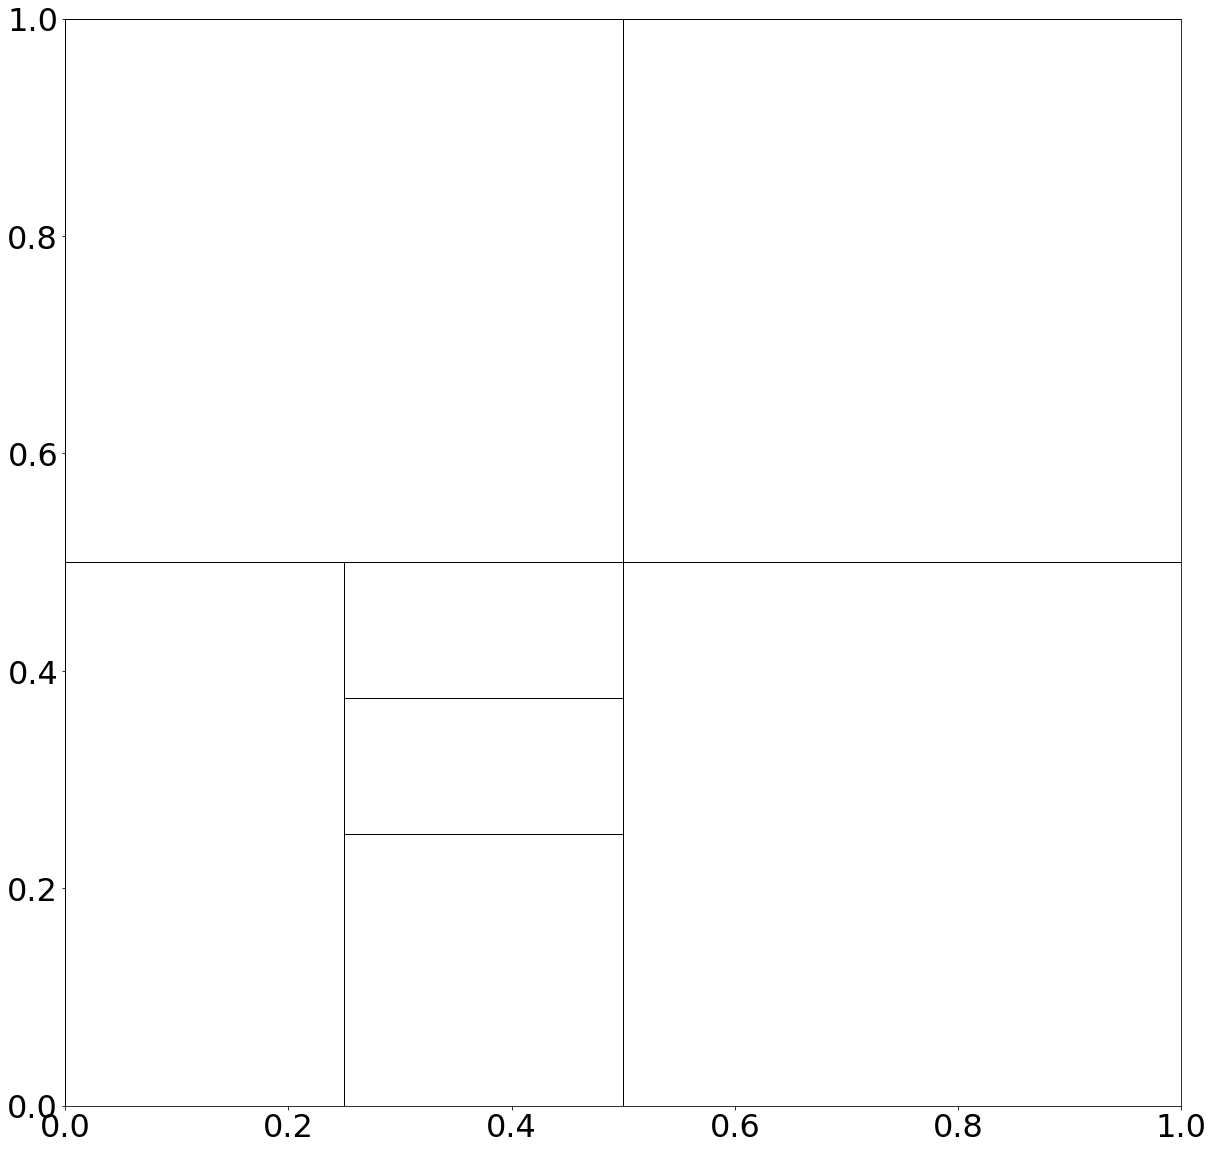

Combi Scheme:


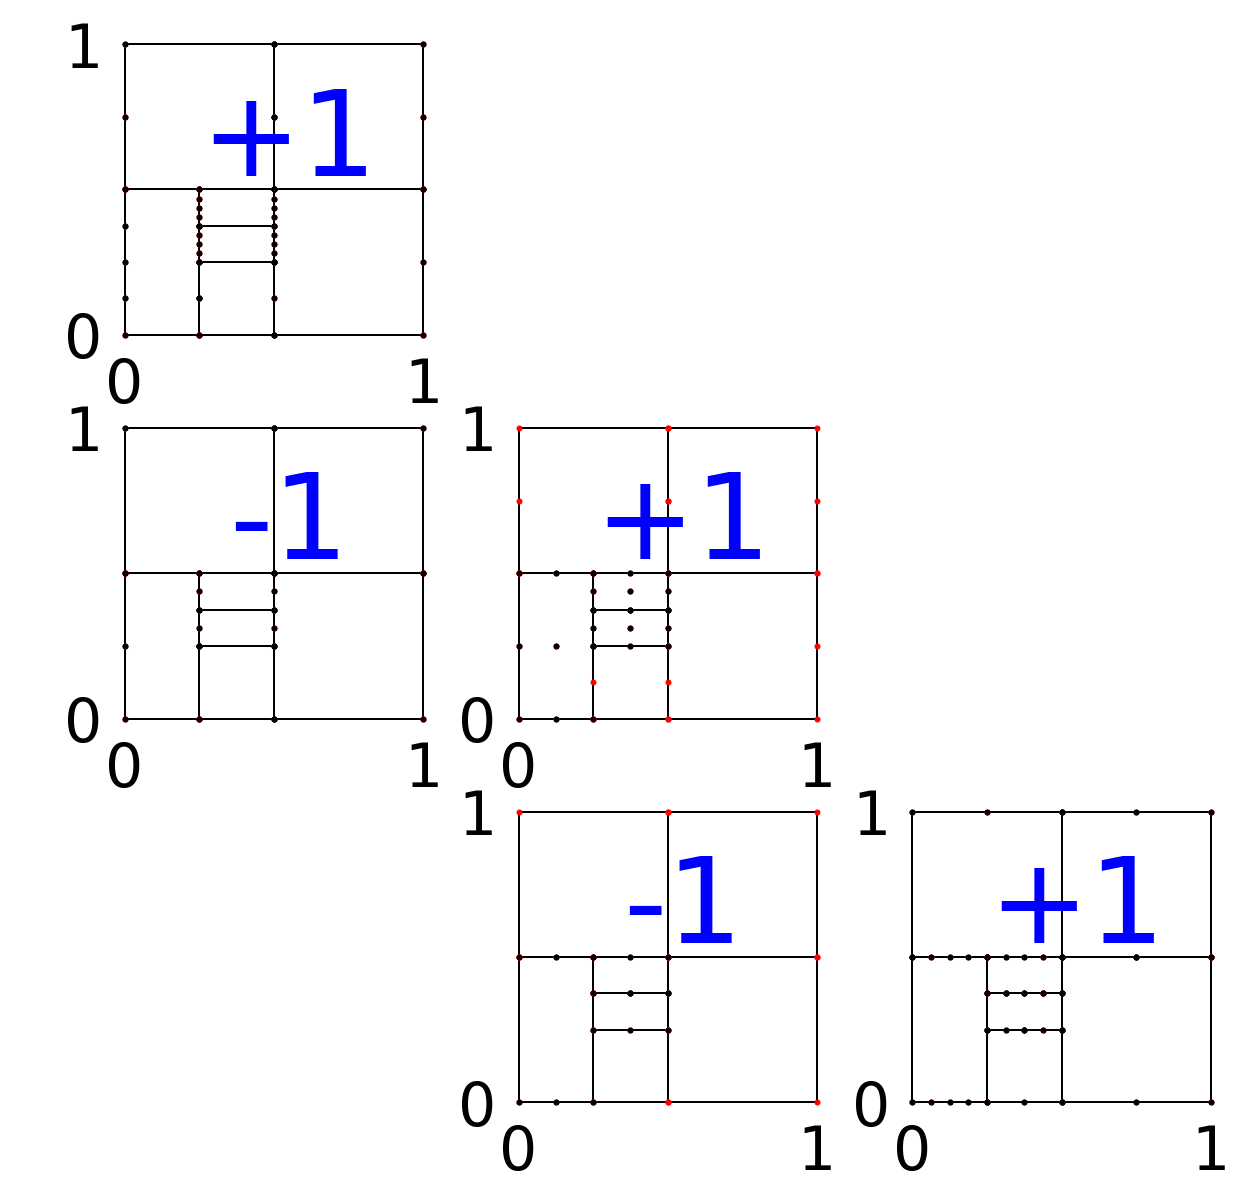

Resulting Sparse Grid:


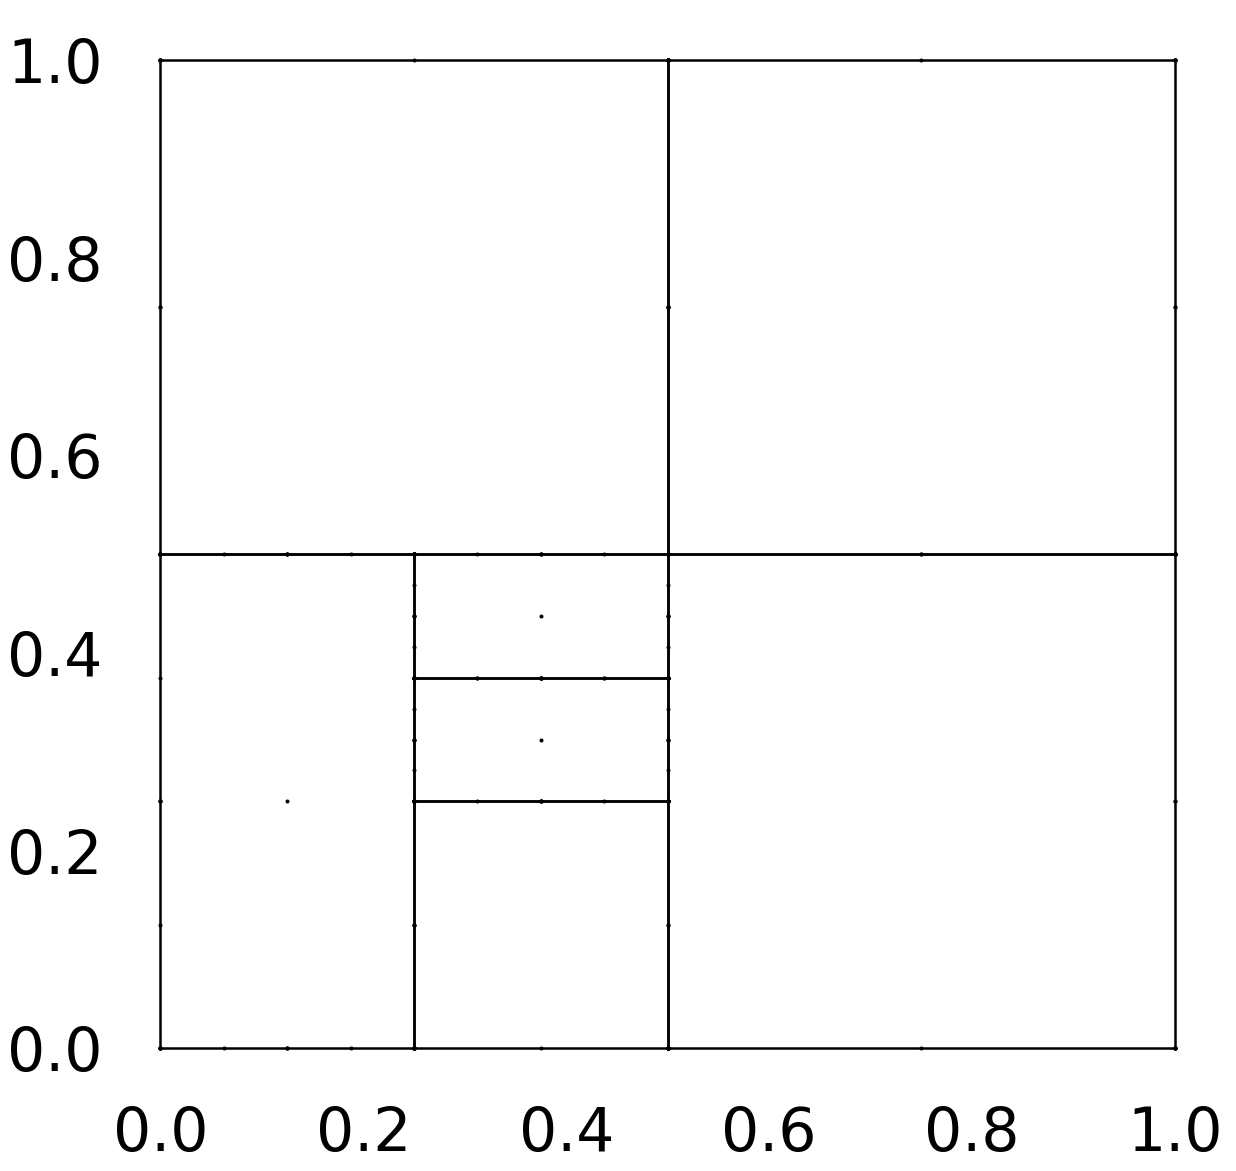

max surplus error: 0.00023194287970235394 total surplus error: 0.0054884641366902825
combiintegral: 0.10886886078671962
Current error: 0.12456710481073434
New scheme
0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


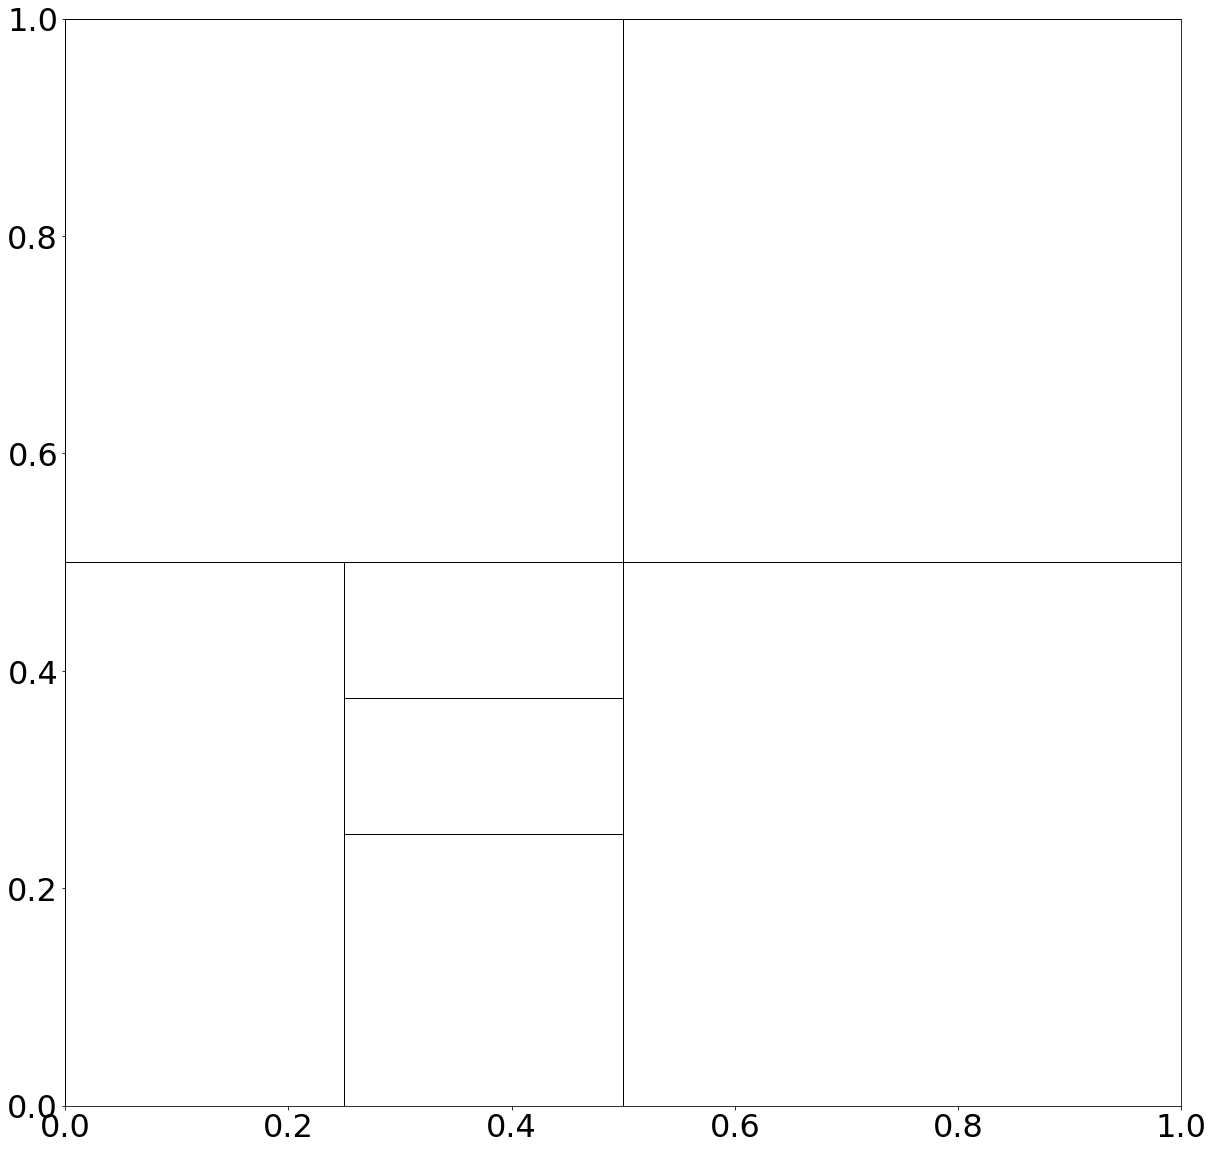

Combi Scheme:


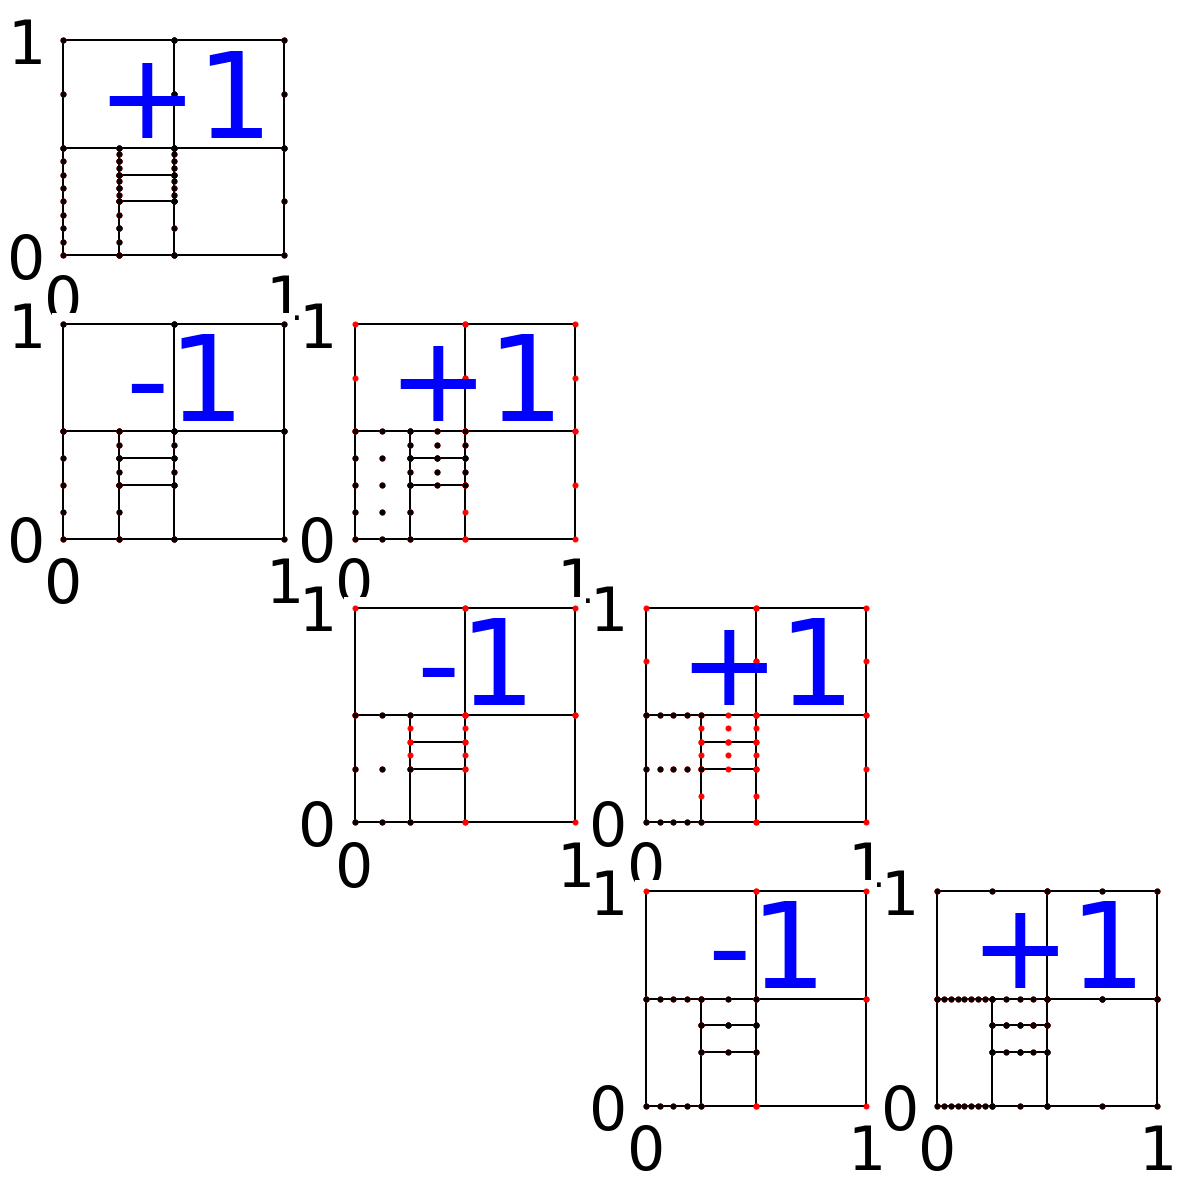

Resulting Sparse Grid:


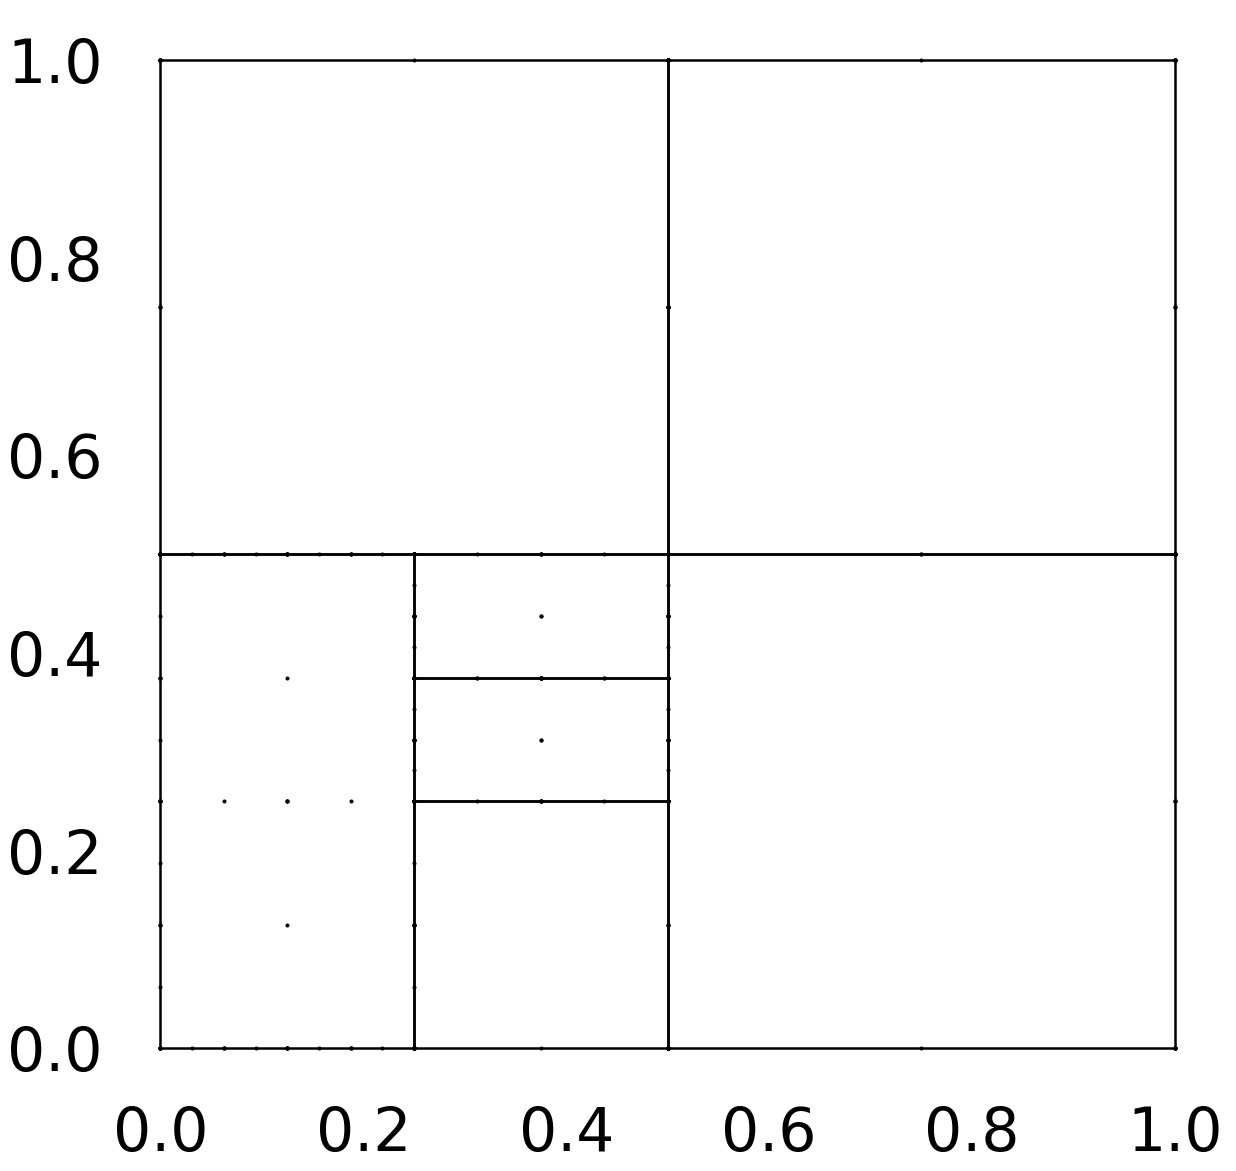

max surplus error: 6.903796551537133e-05 total surplus error: 0.003792612202222864
combiintegral: 0.11111603780719224
Current error: 0.10649717488936683
Split in dimension 0 , maxTwinError = [0.00626358]
Finished refinement
Refined  1  times
Refinement Graph:


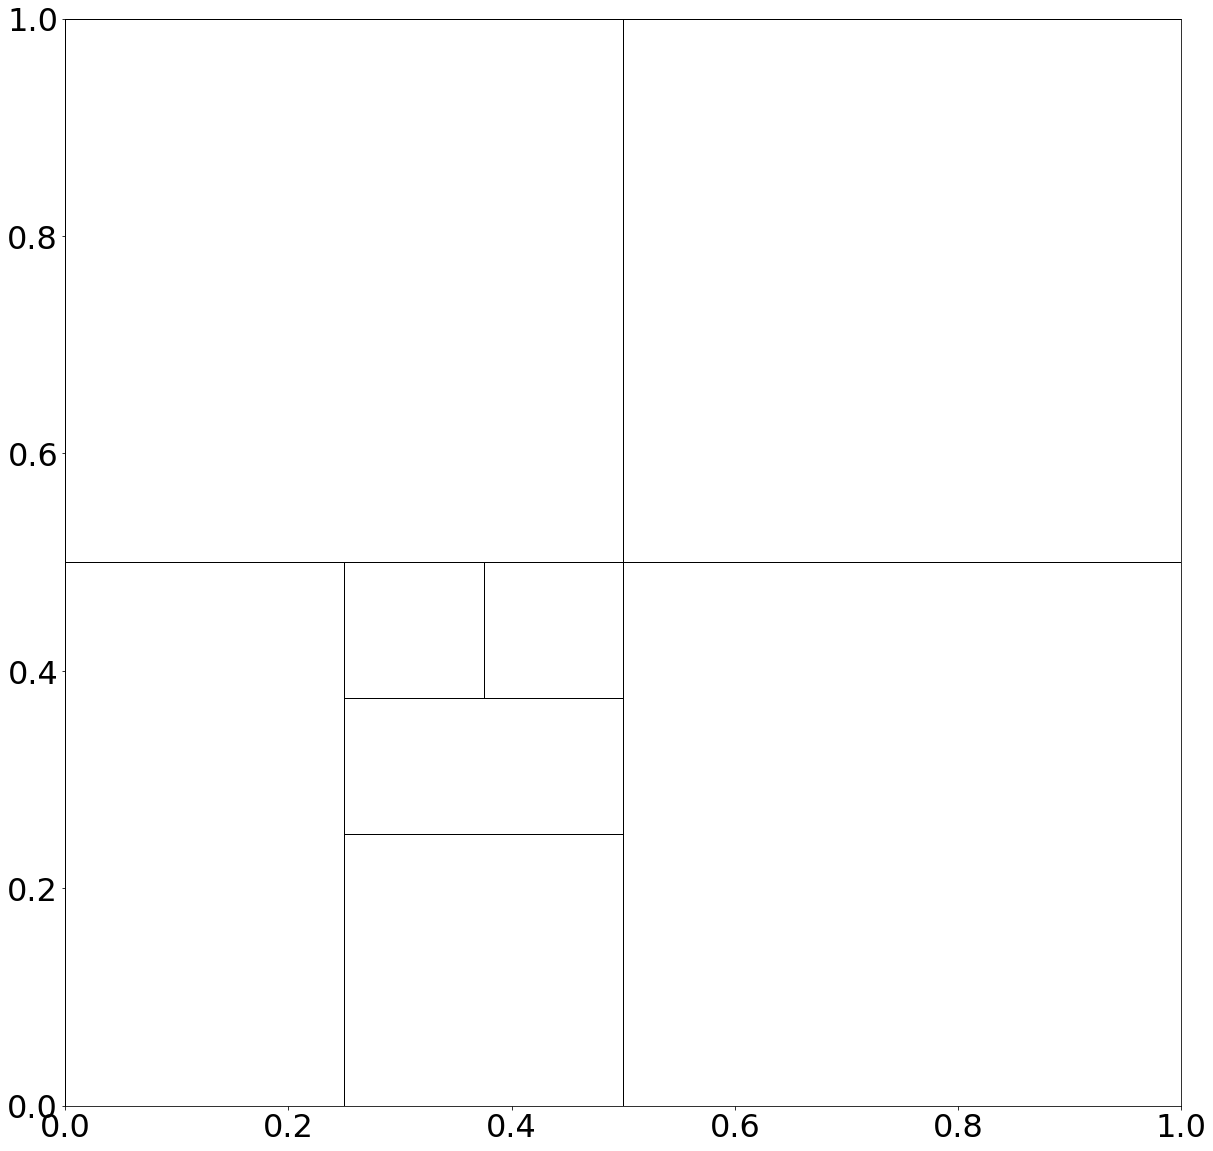

Combi Scheme:


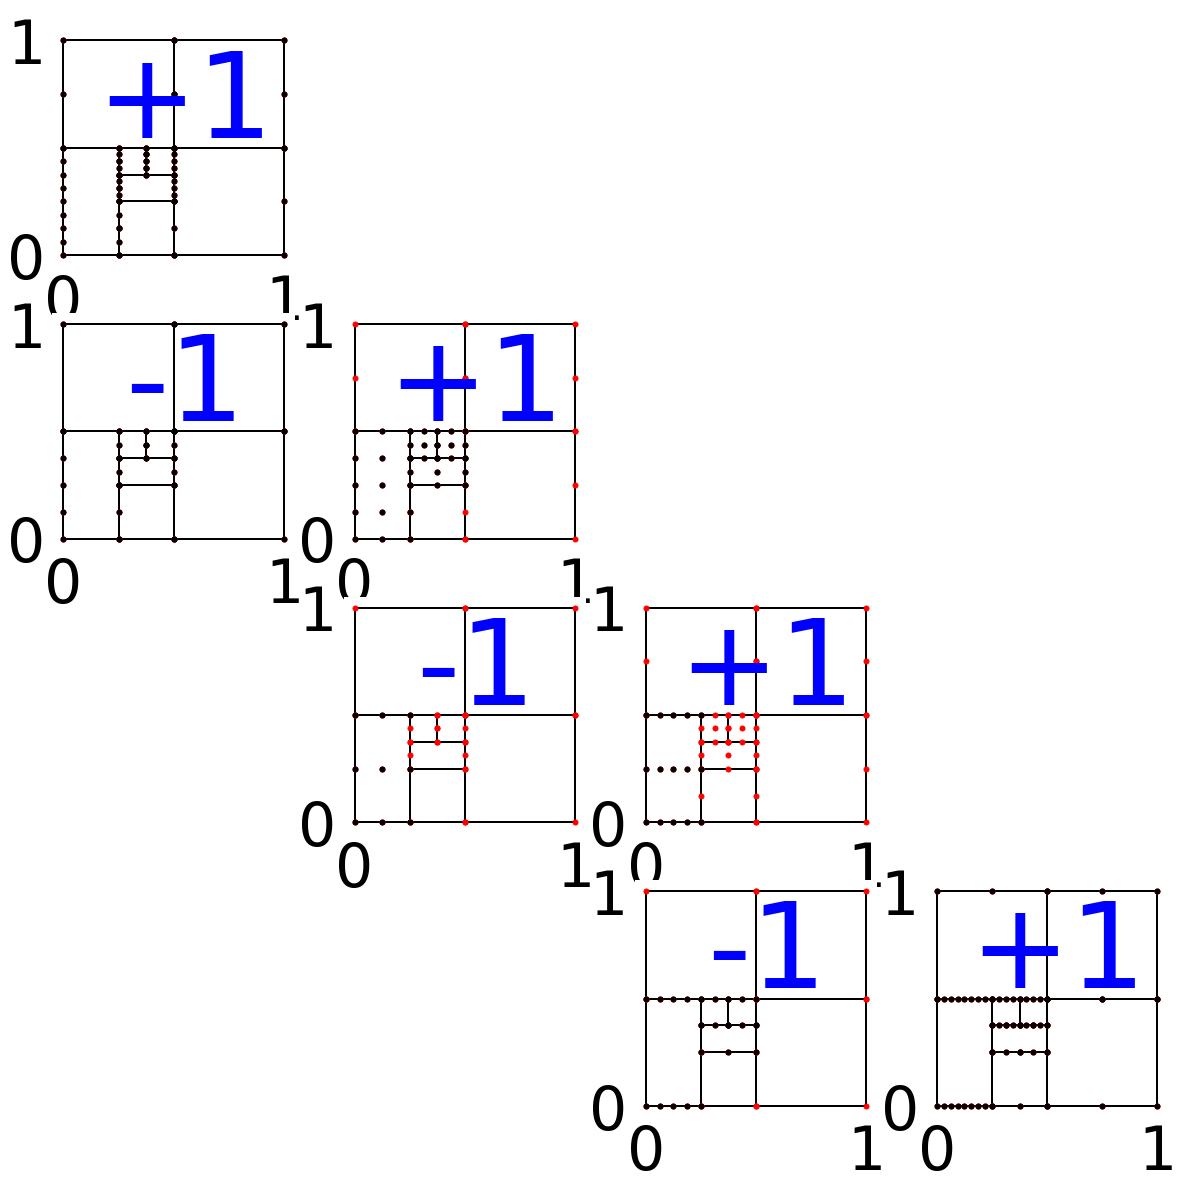

Resulting Sparse Grid:


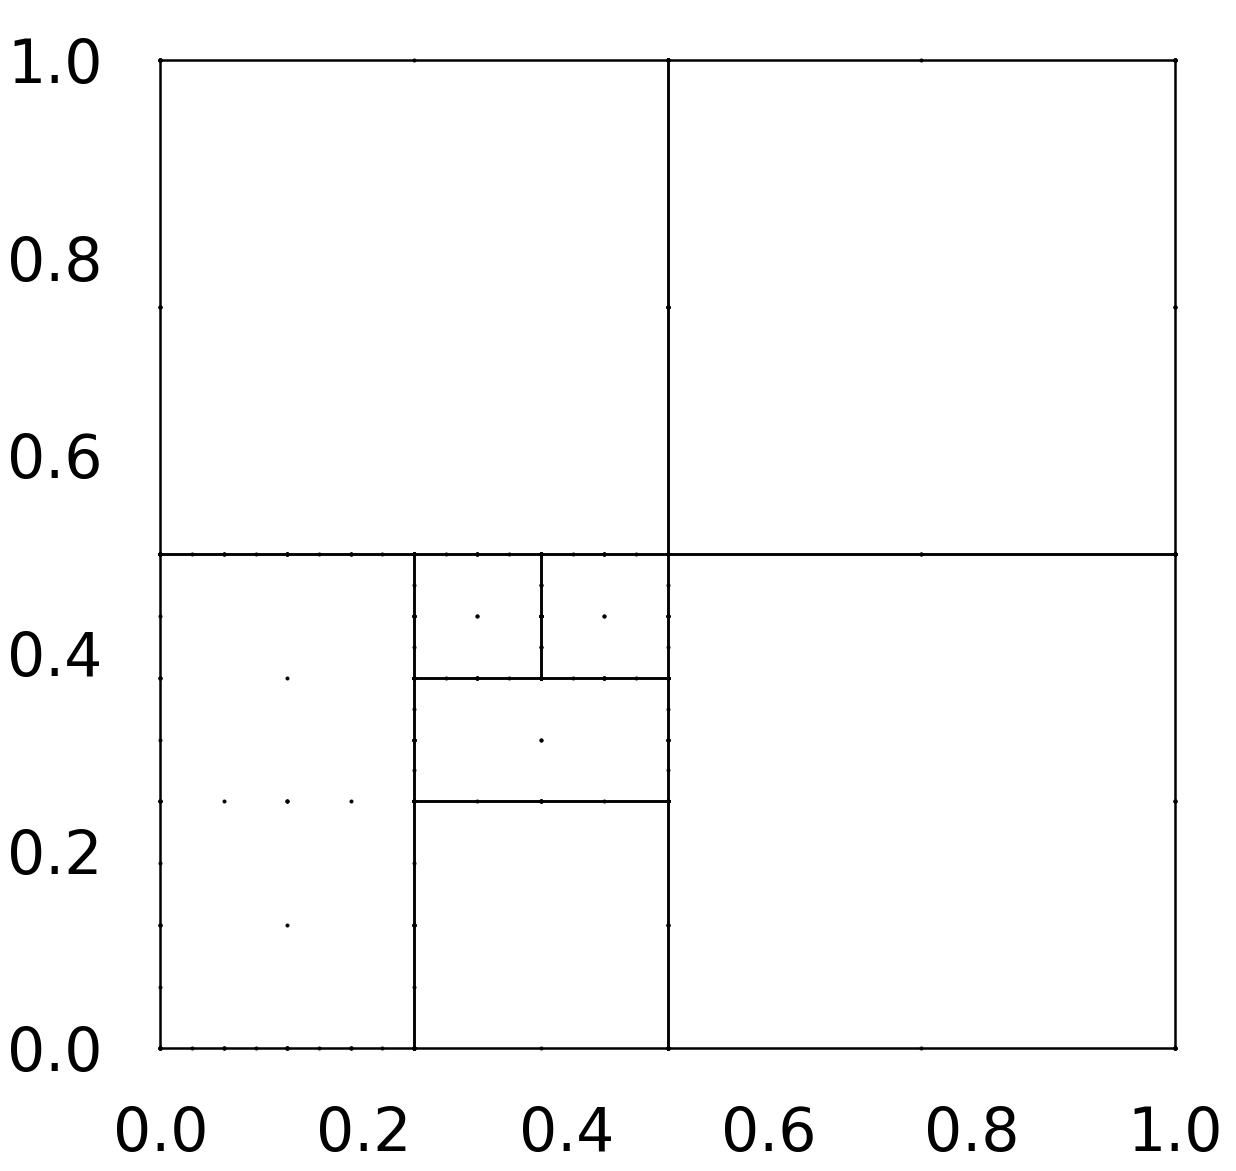

max surplus error: 6.0734514066826994e-05 total surplus error: 0.00325164380917444
combiintegral: 0.1118188627909199
Current error: 0.10084564050322666
New scheme
0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


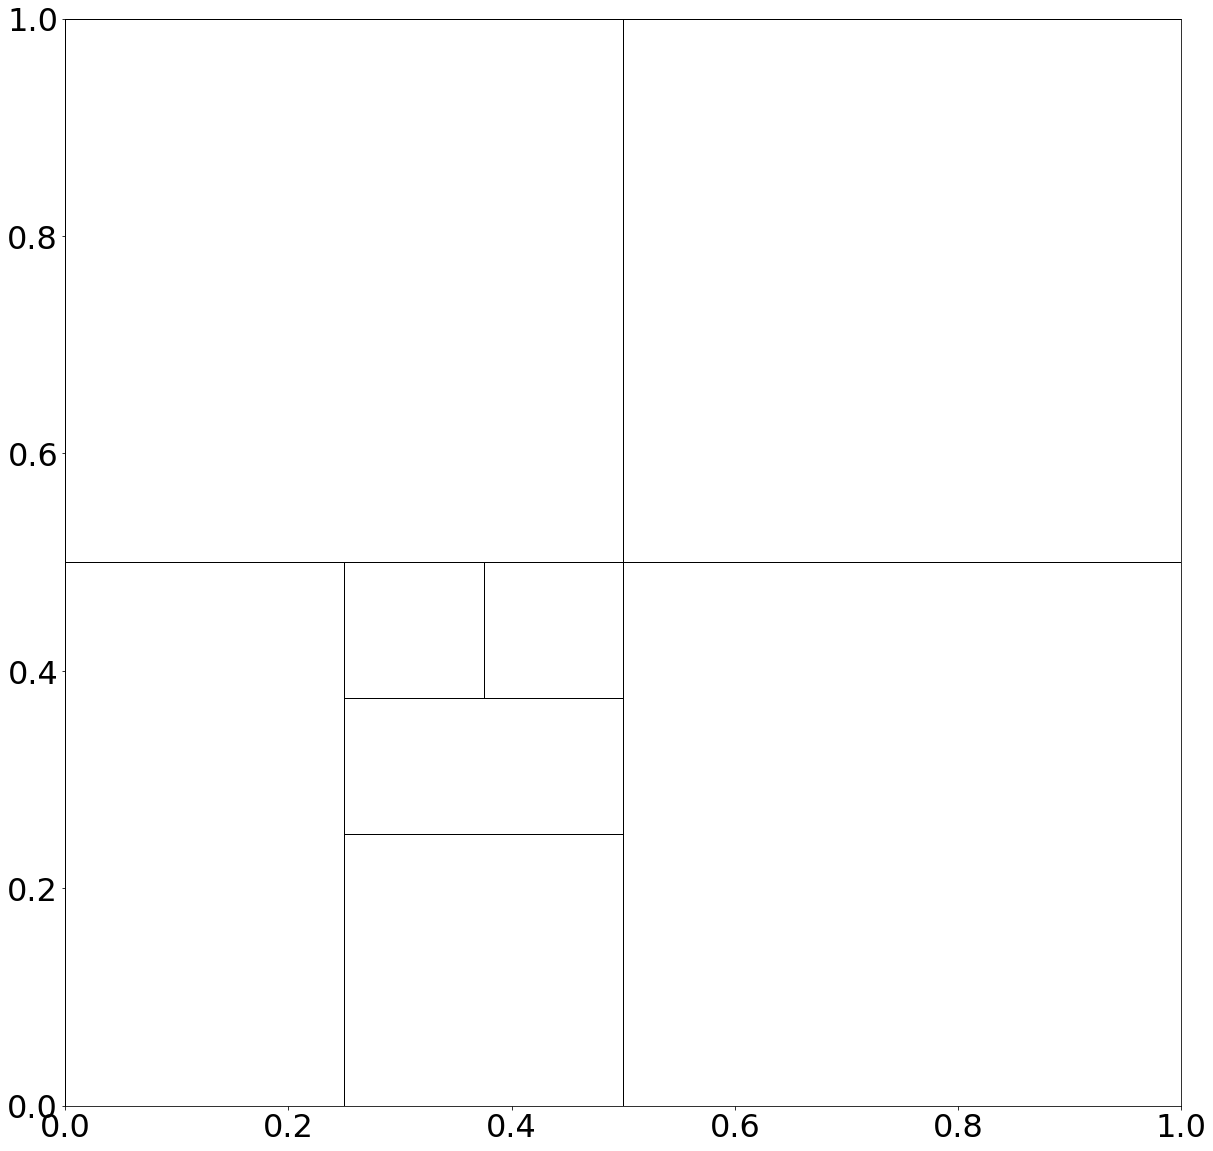

Combi Scheme:


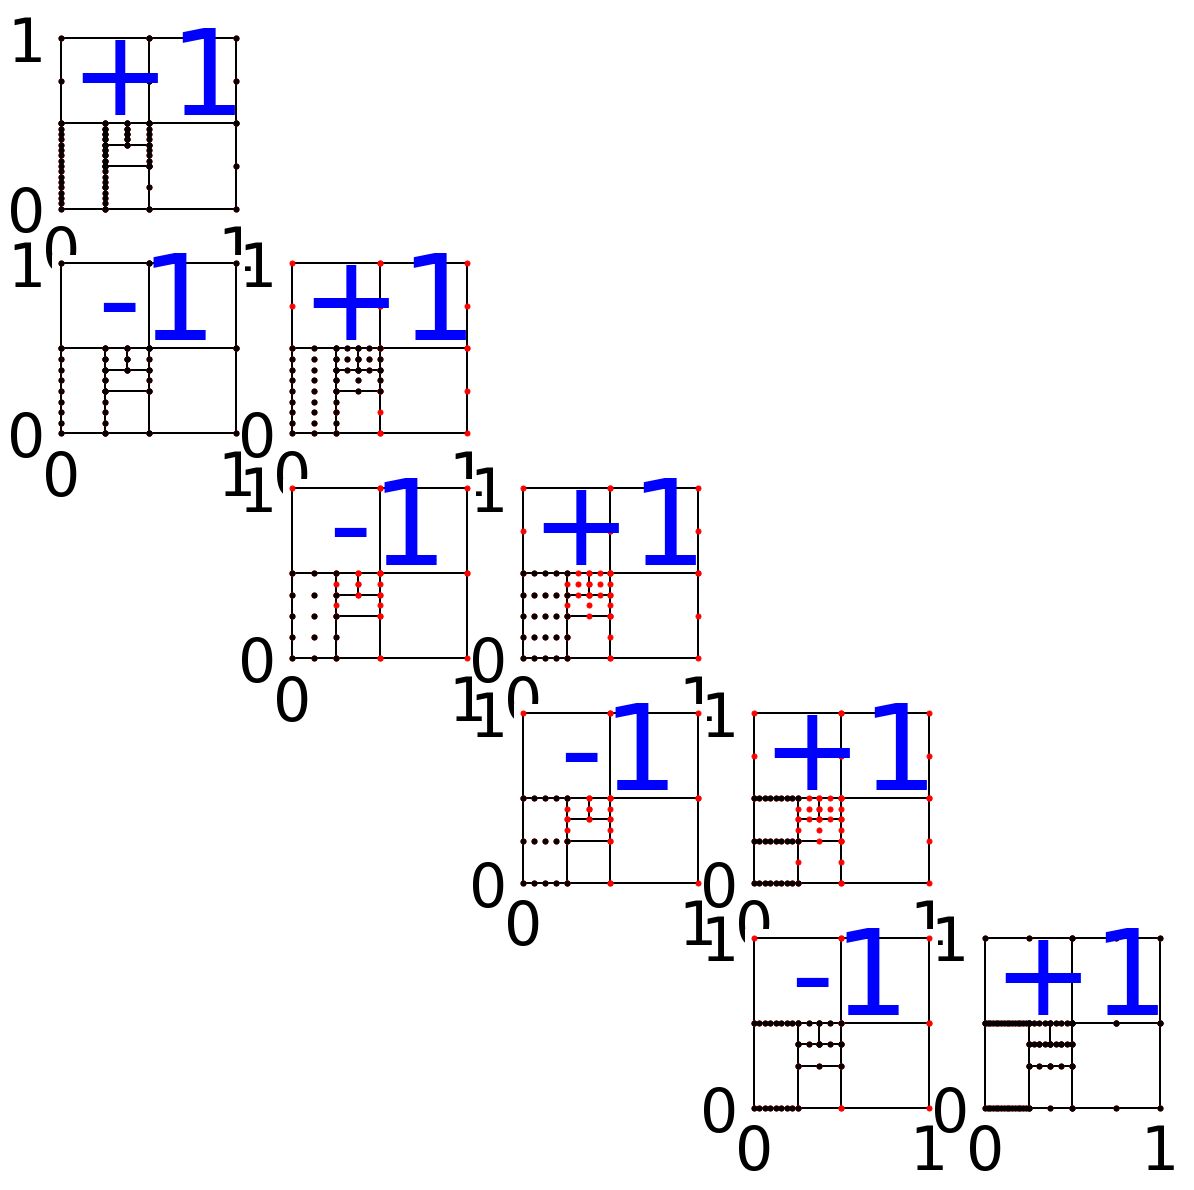

Resulting Sparse Grid:


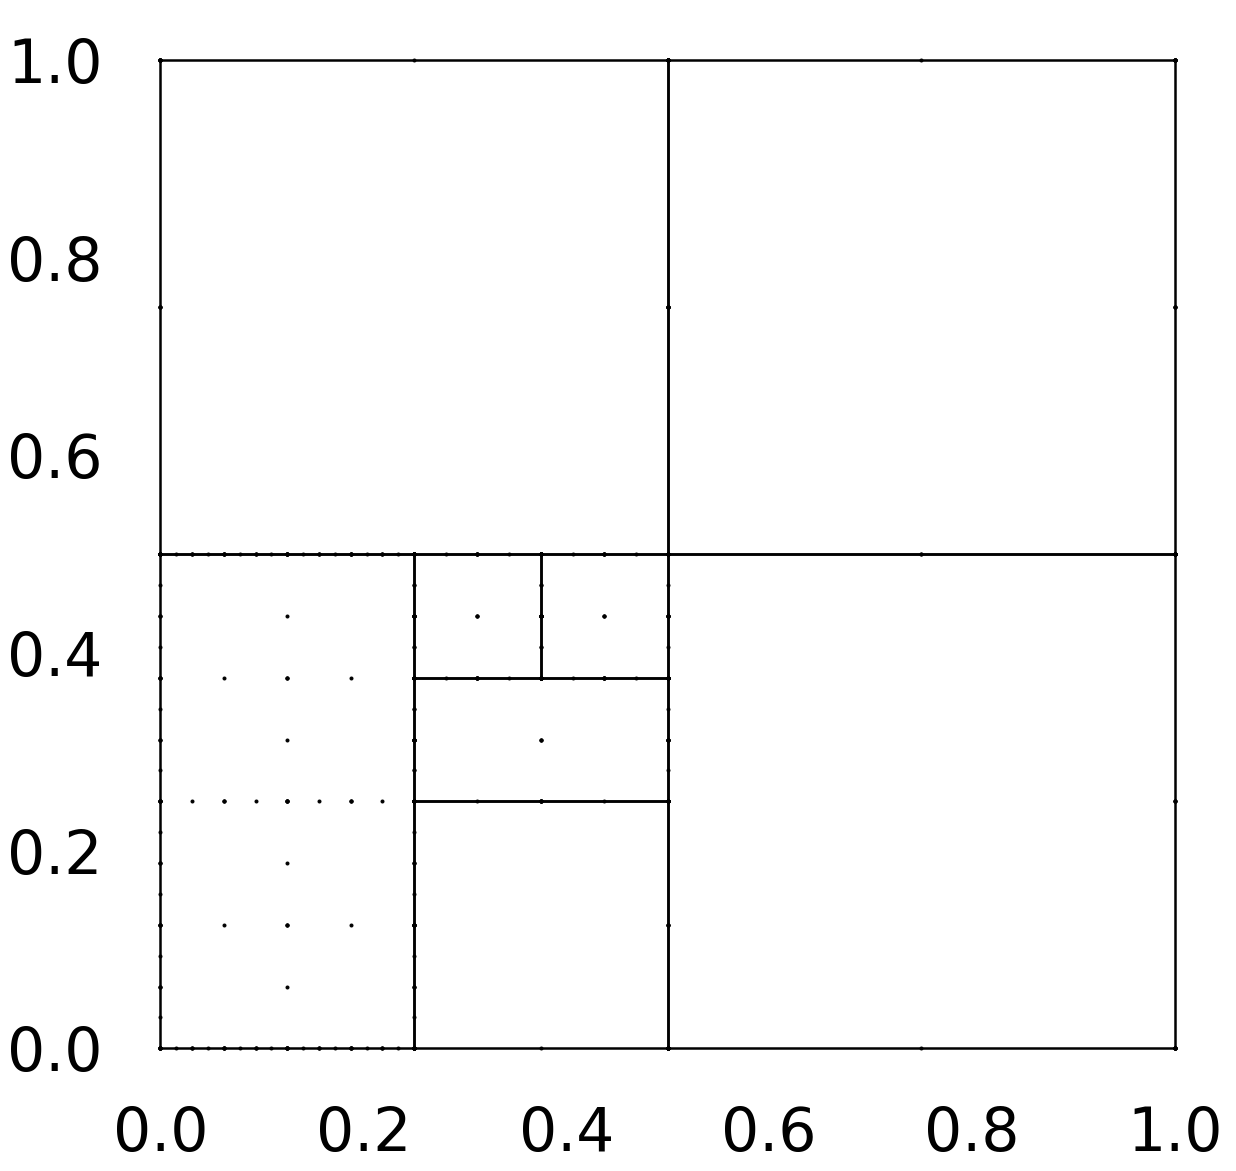

max surplus error: 3.520142231167108e-05 total surplus error: 0.002196380388683547
combiintegral: 0.11301077639090162
Current error: 0.09126126195726558
Split in dimension 1 , maxTwinError = [0.00184902]
Finished refinement
Refined  1  times
Refinement Graph:


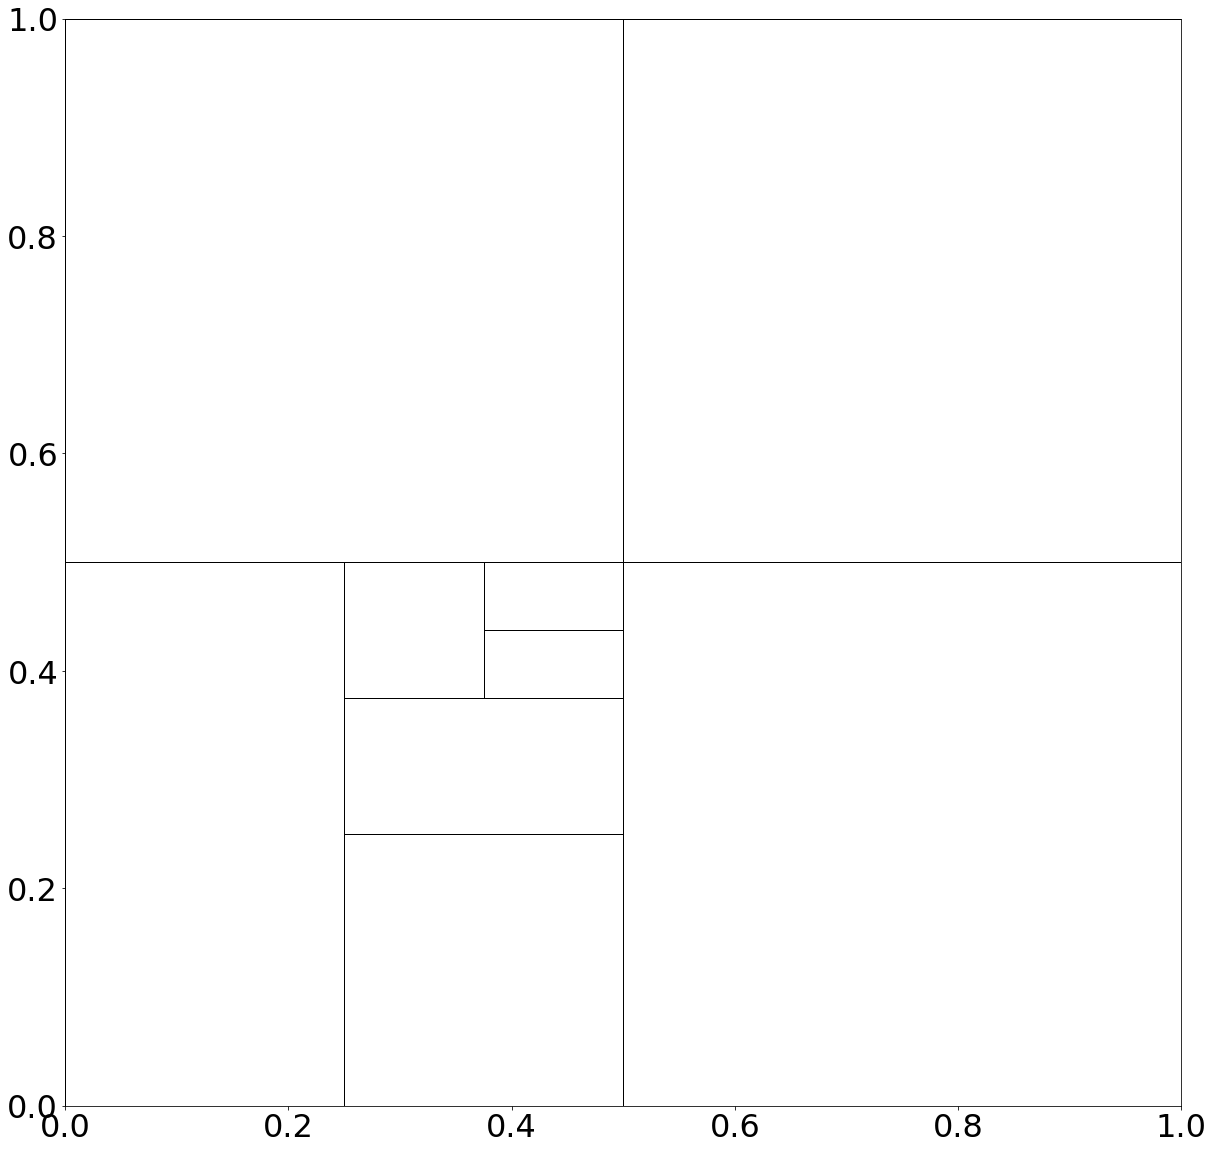

Combi Scheme:


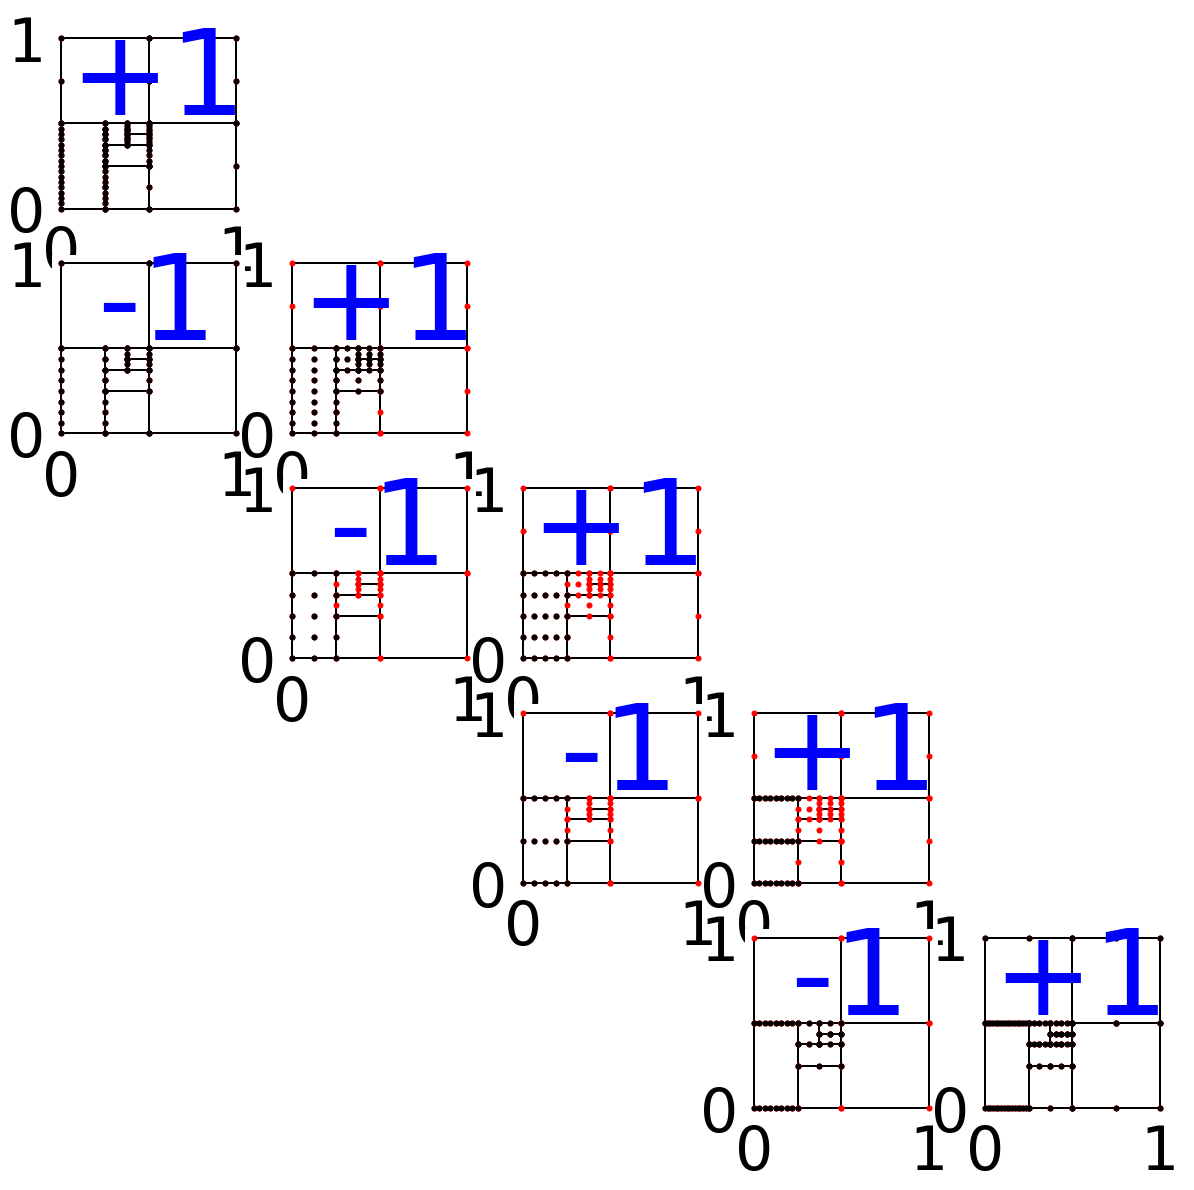

Resulting Sparse Grid:


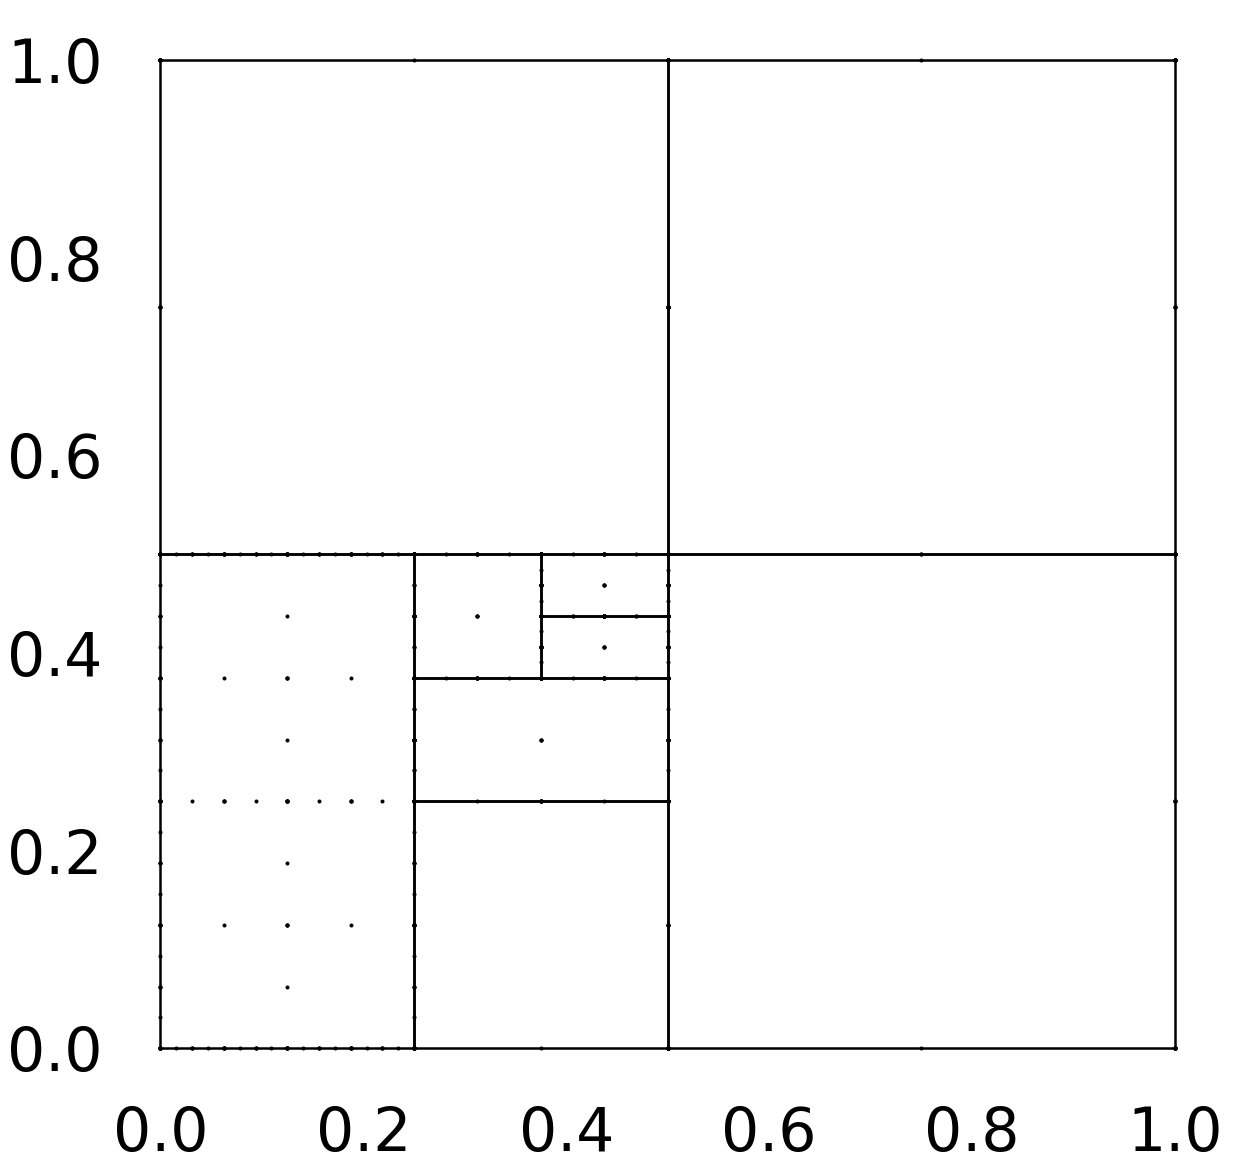

max surplus error: 2.4768147435136247e-05 total surplus error: 0.001899806369786473
combiintegral: 0.11334801590612806
Current error: 0.08854946206284697
Finished refinement
Refined  1  times
Refinement Graph:


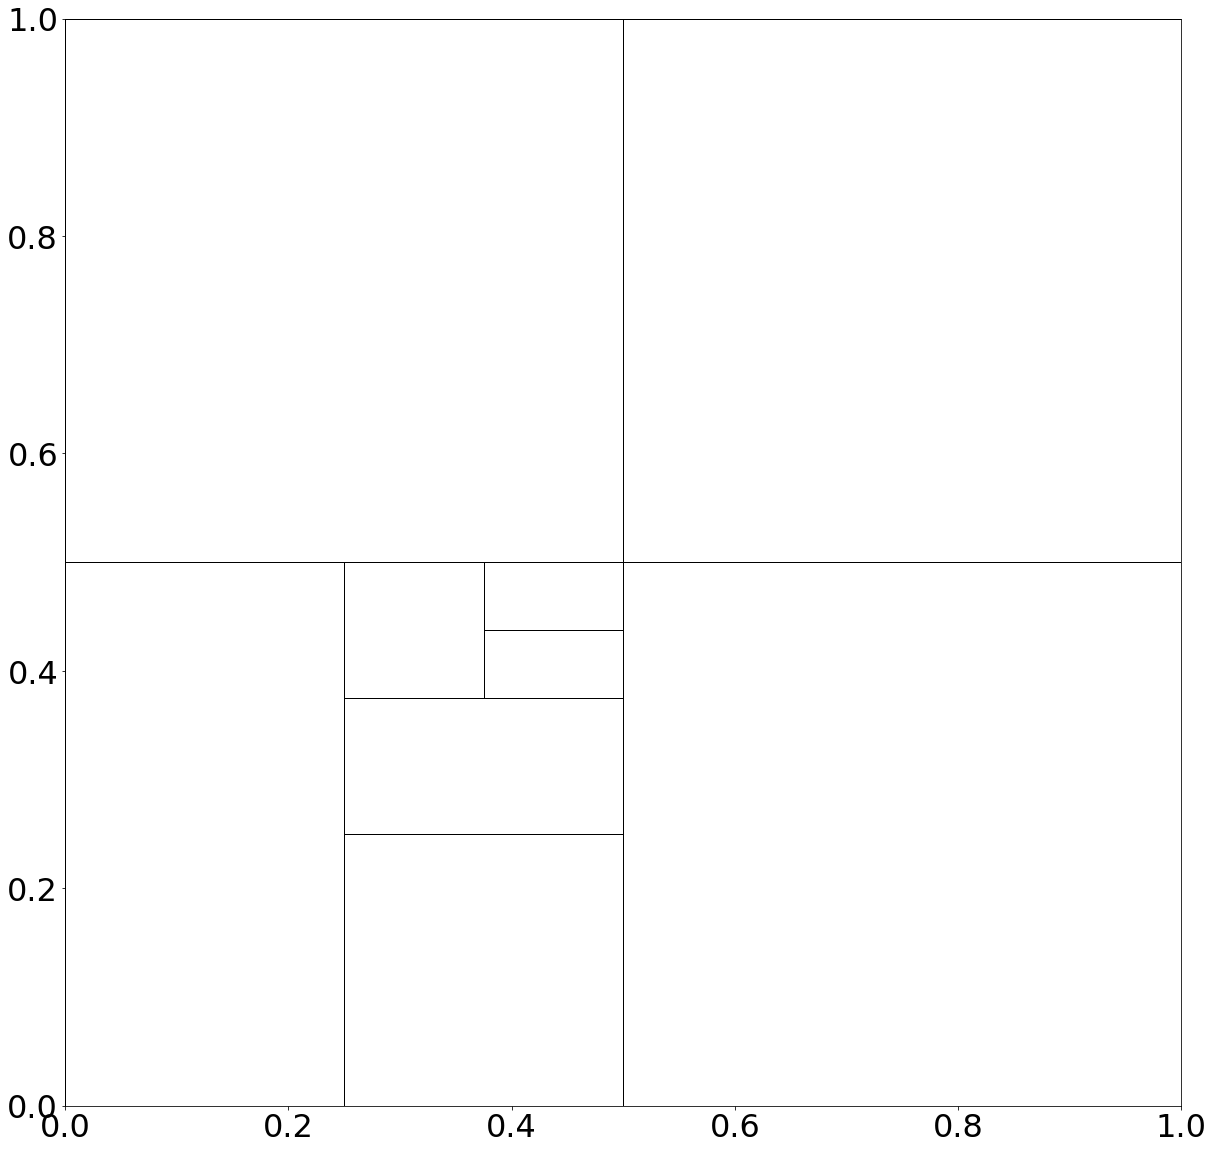

Combi Scheme:


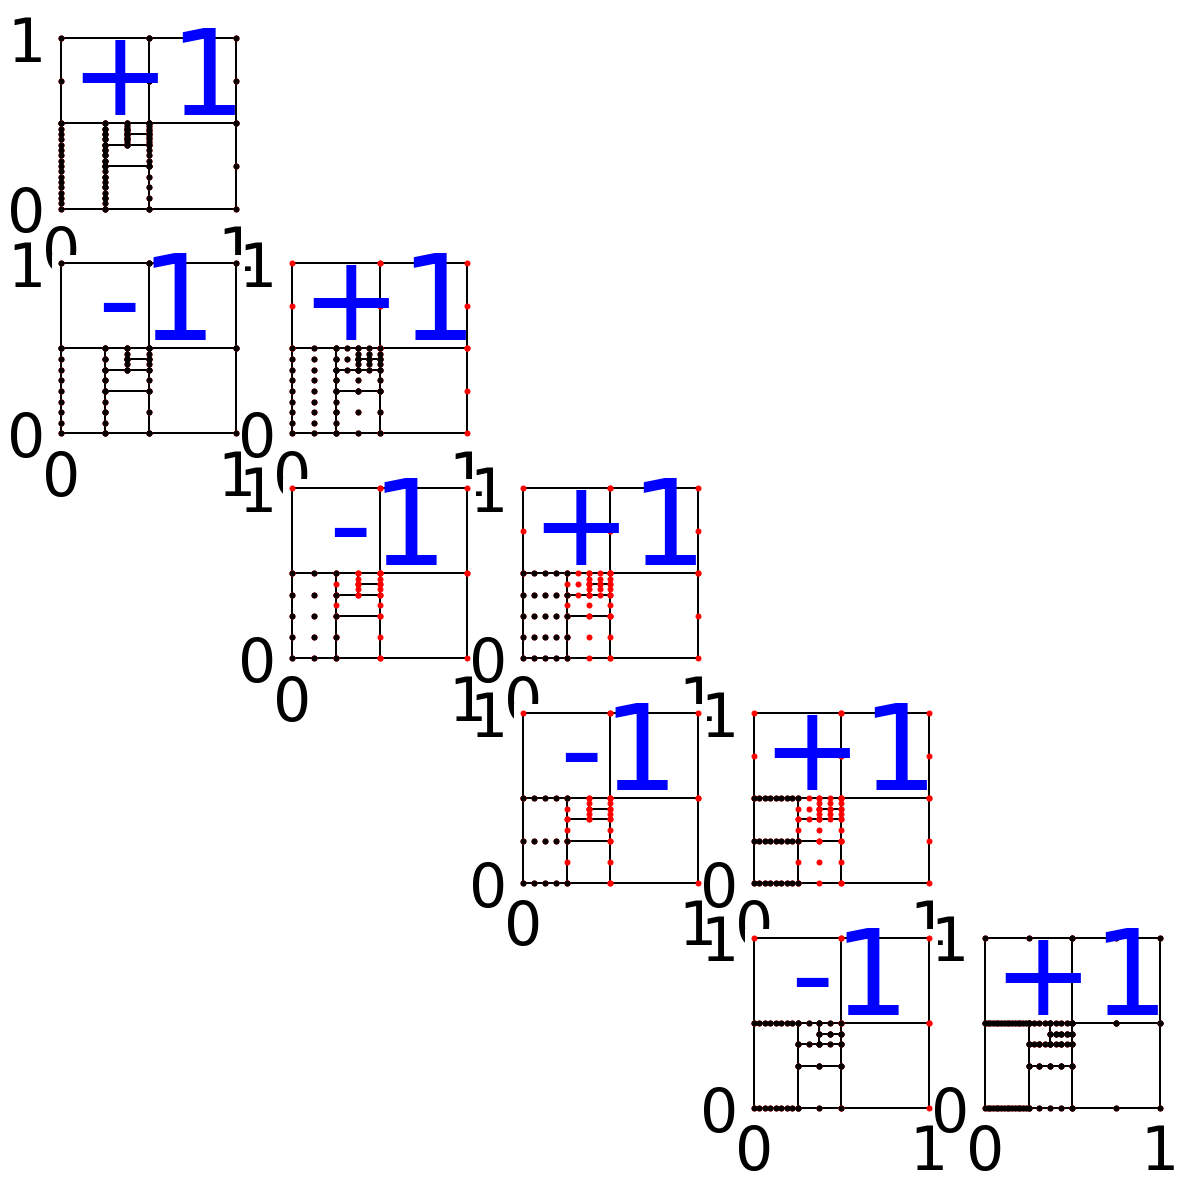

Resulting Sparse Grid:


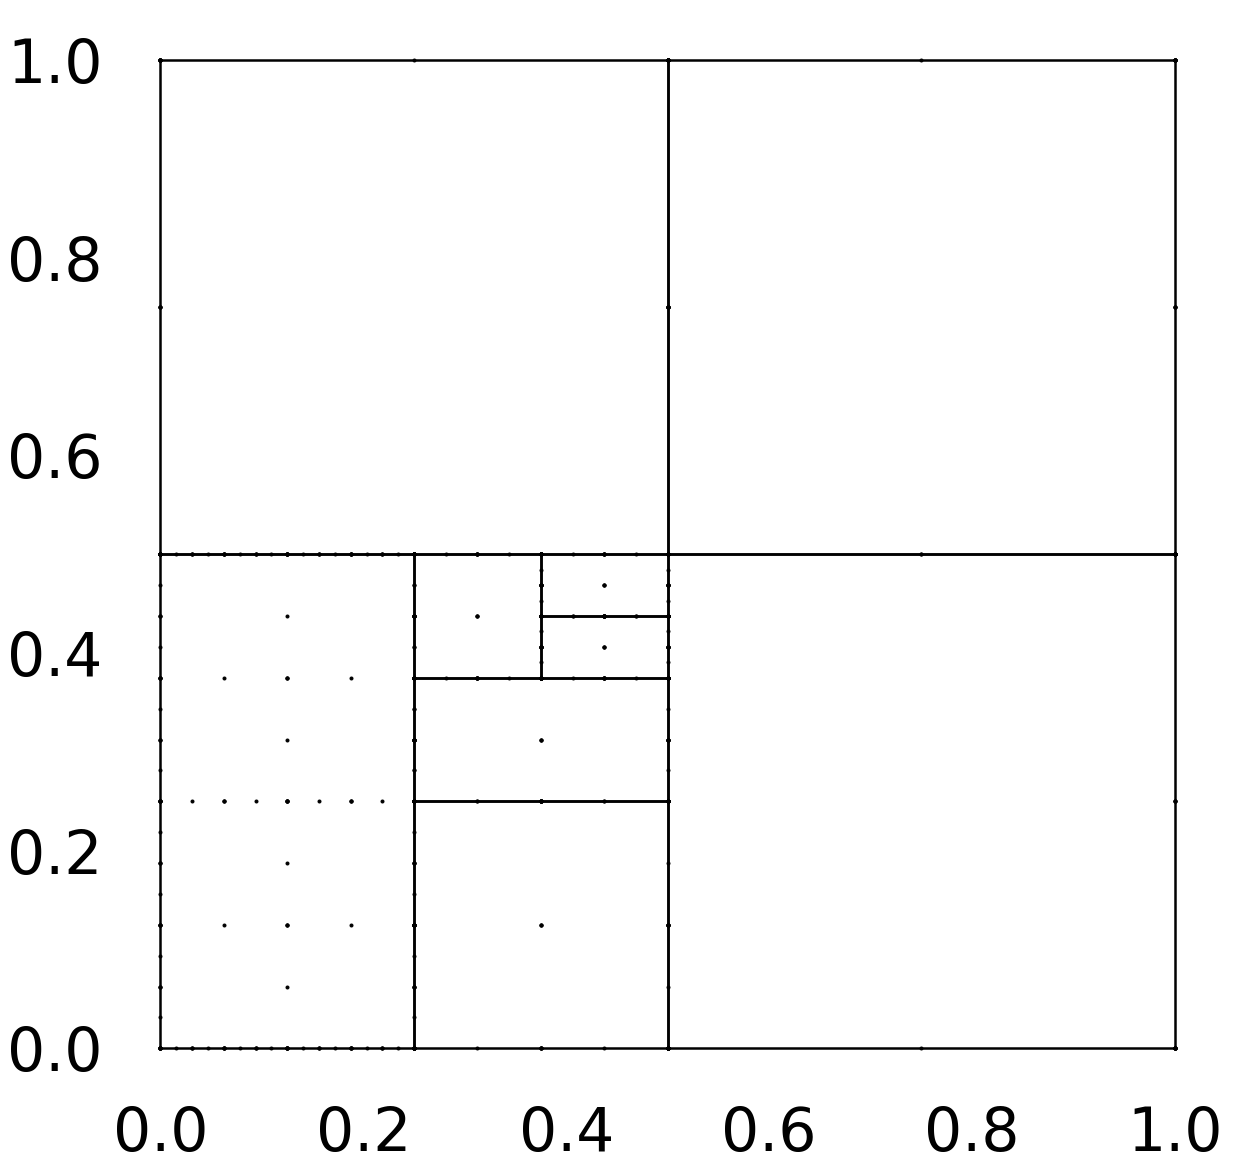

max surplus error: 0.00021081942656705818 total surplus error: 0.005285591441945372
combiintegral: 0.11693194615776804
Current error: 0.05973047366086386
Finished refinement
Refined  1  times
Refinement Graph:


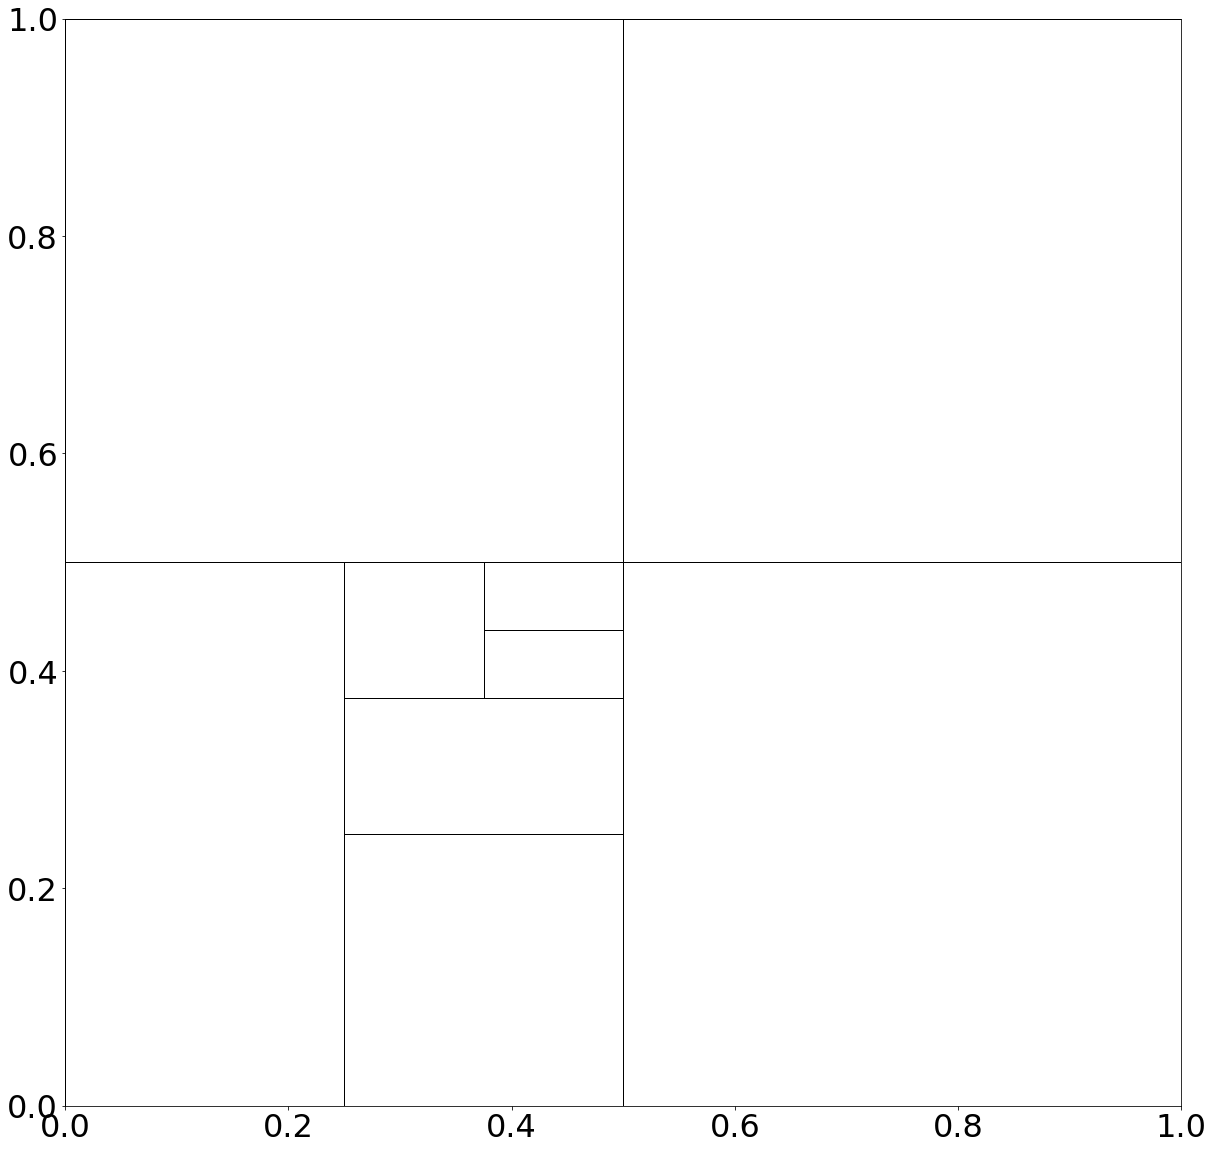

Combi Scheme:


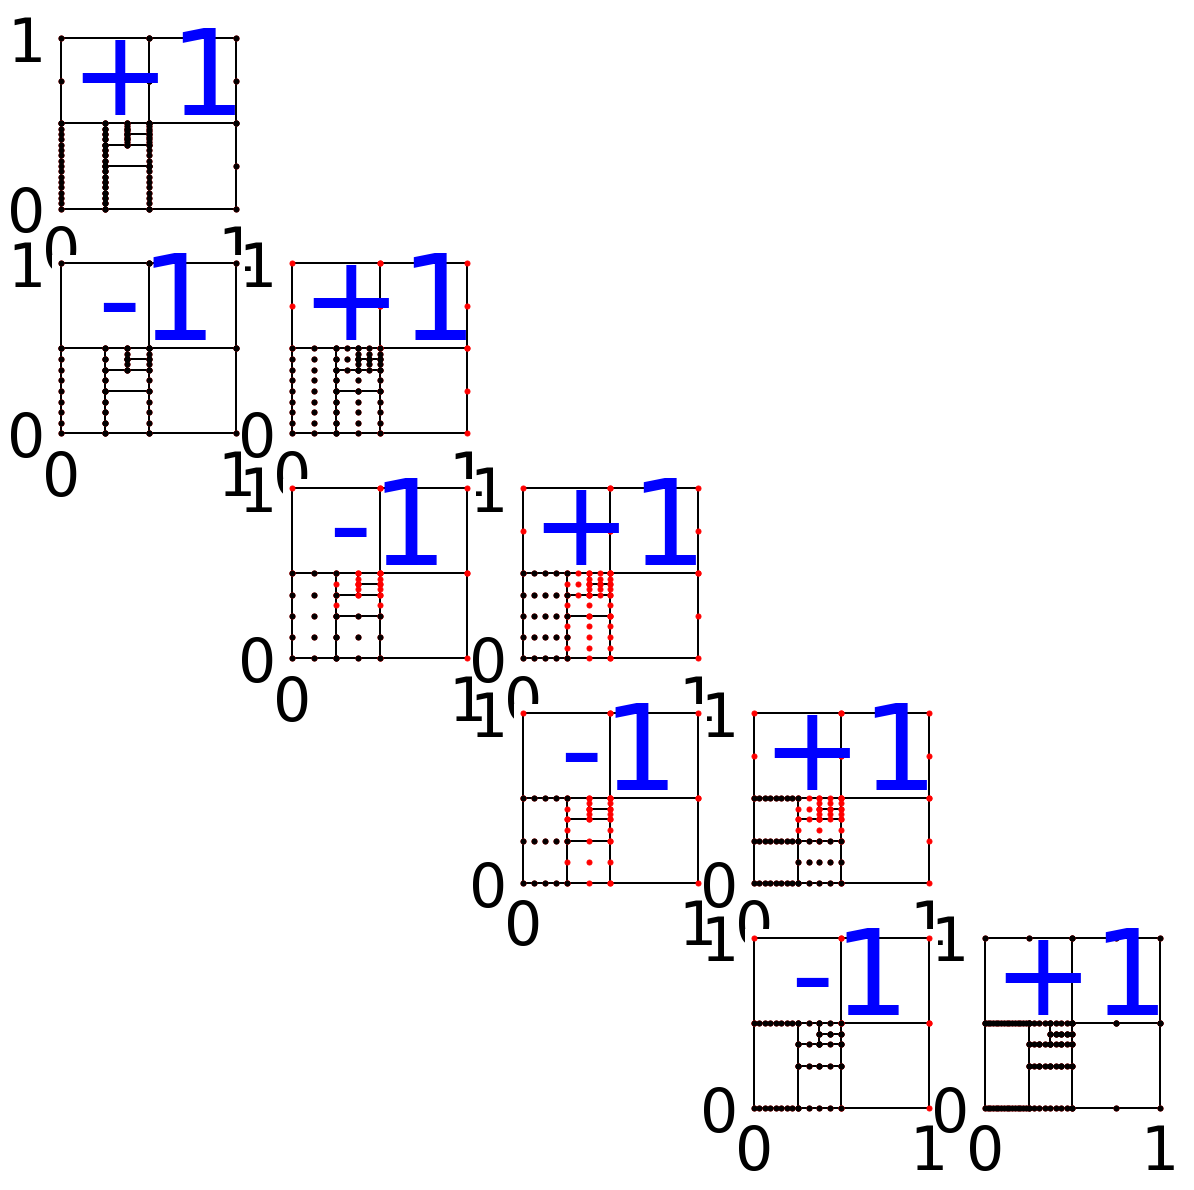

Resulting Sparse Grid:


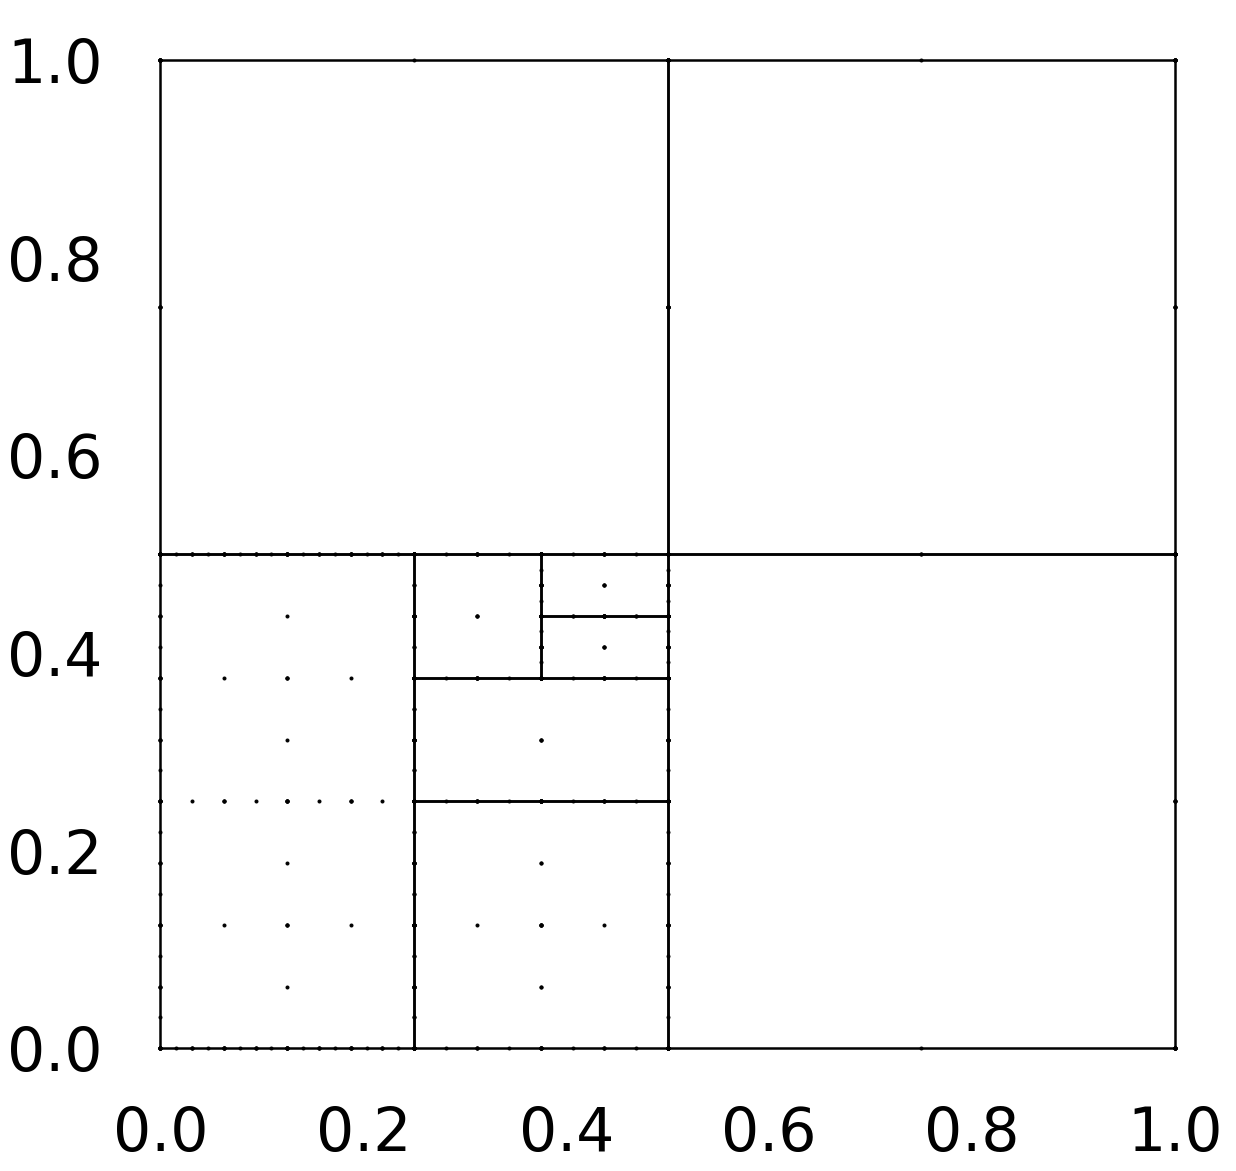

max surplus error: 4.837770652841908e-05 total surplus error: 0.0034916363318568885
combiintegral: 0.11872192129931958
Current error: 0.045336981259440426
Finished refinement
Refined  1  times
Refinement Graph:


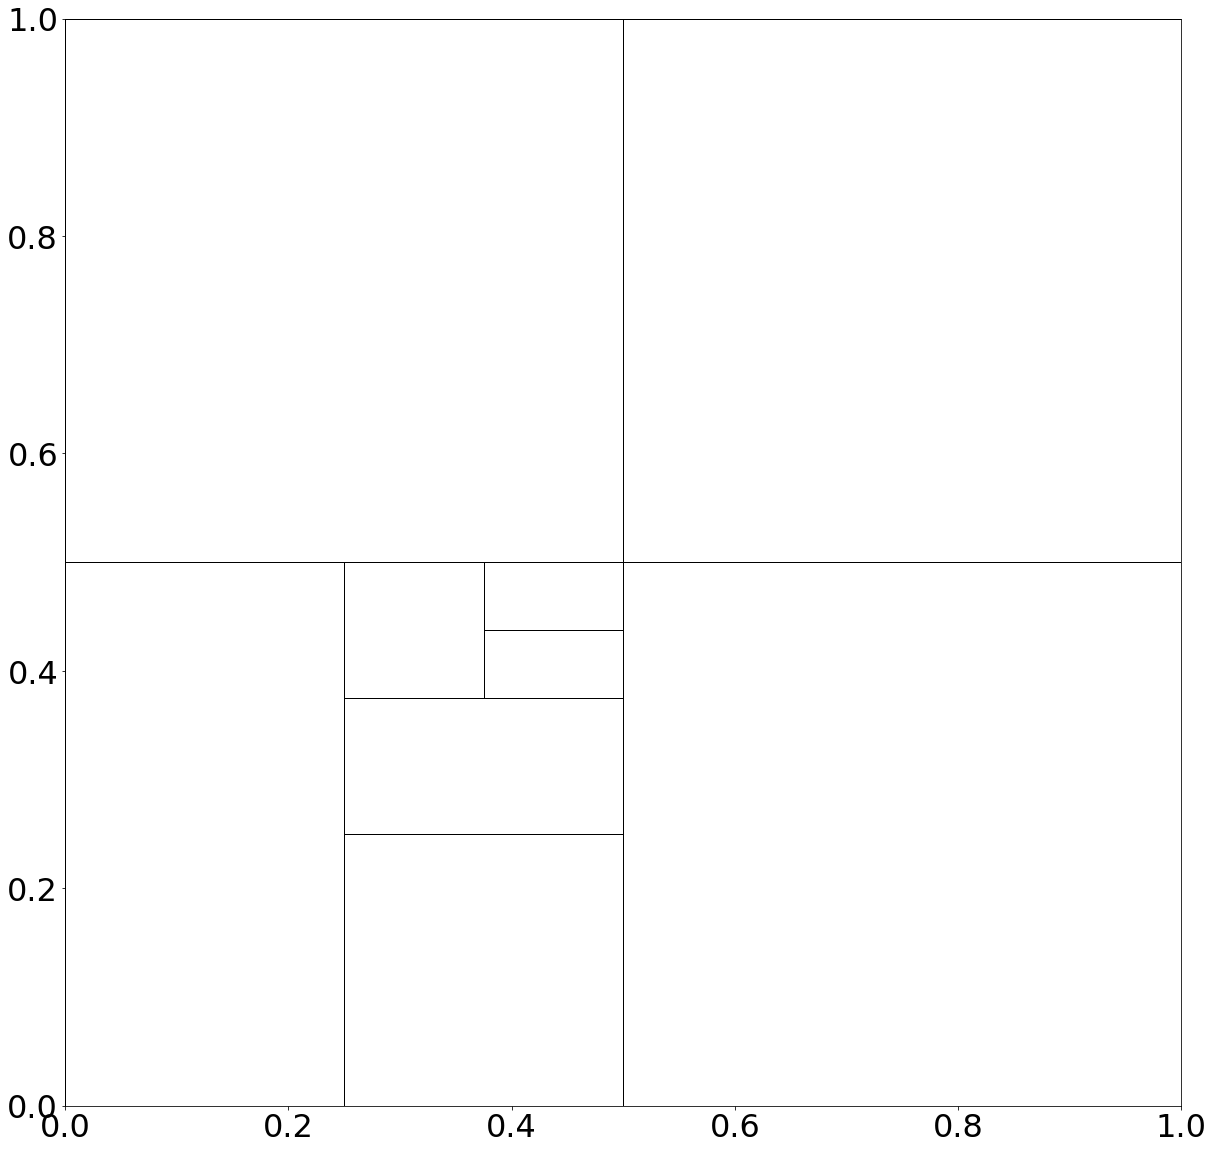

Combi Scheme:


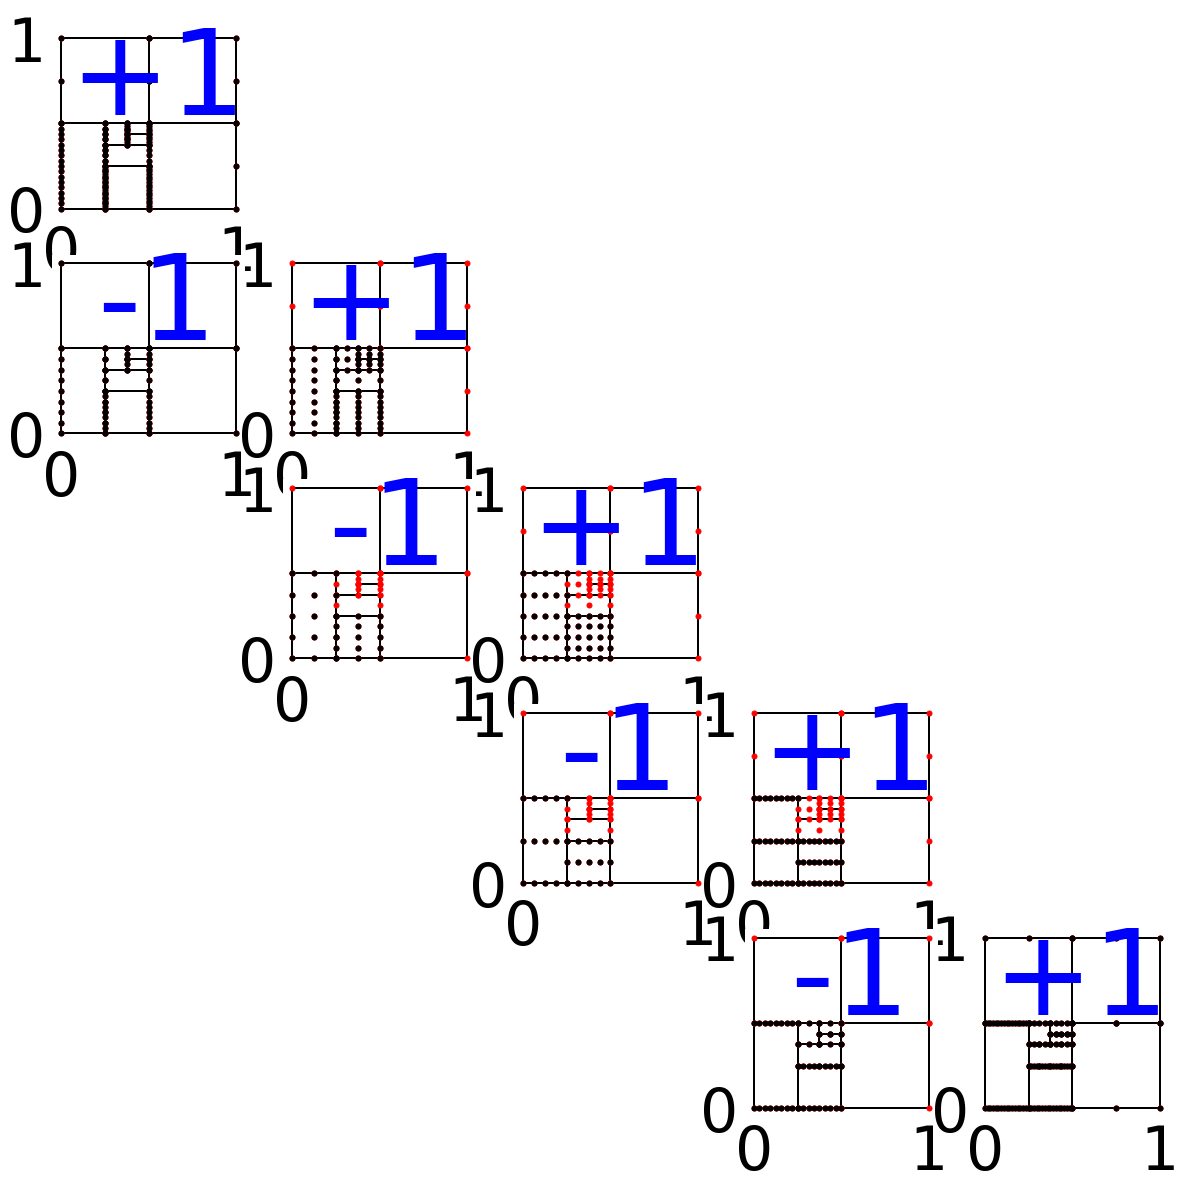

Resulting Sparse Grid:


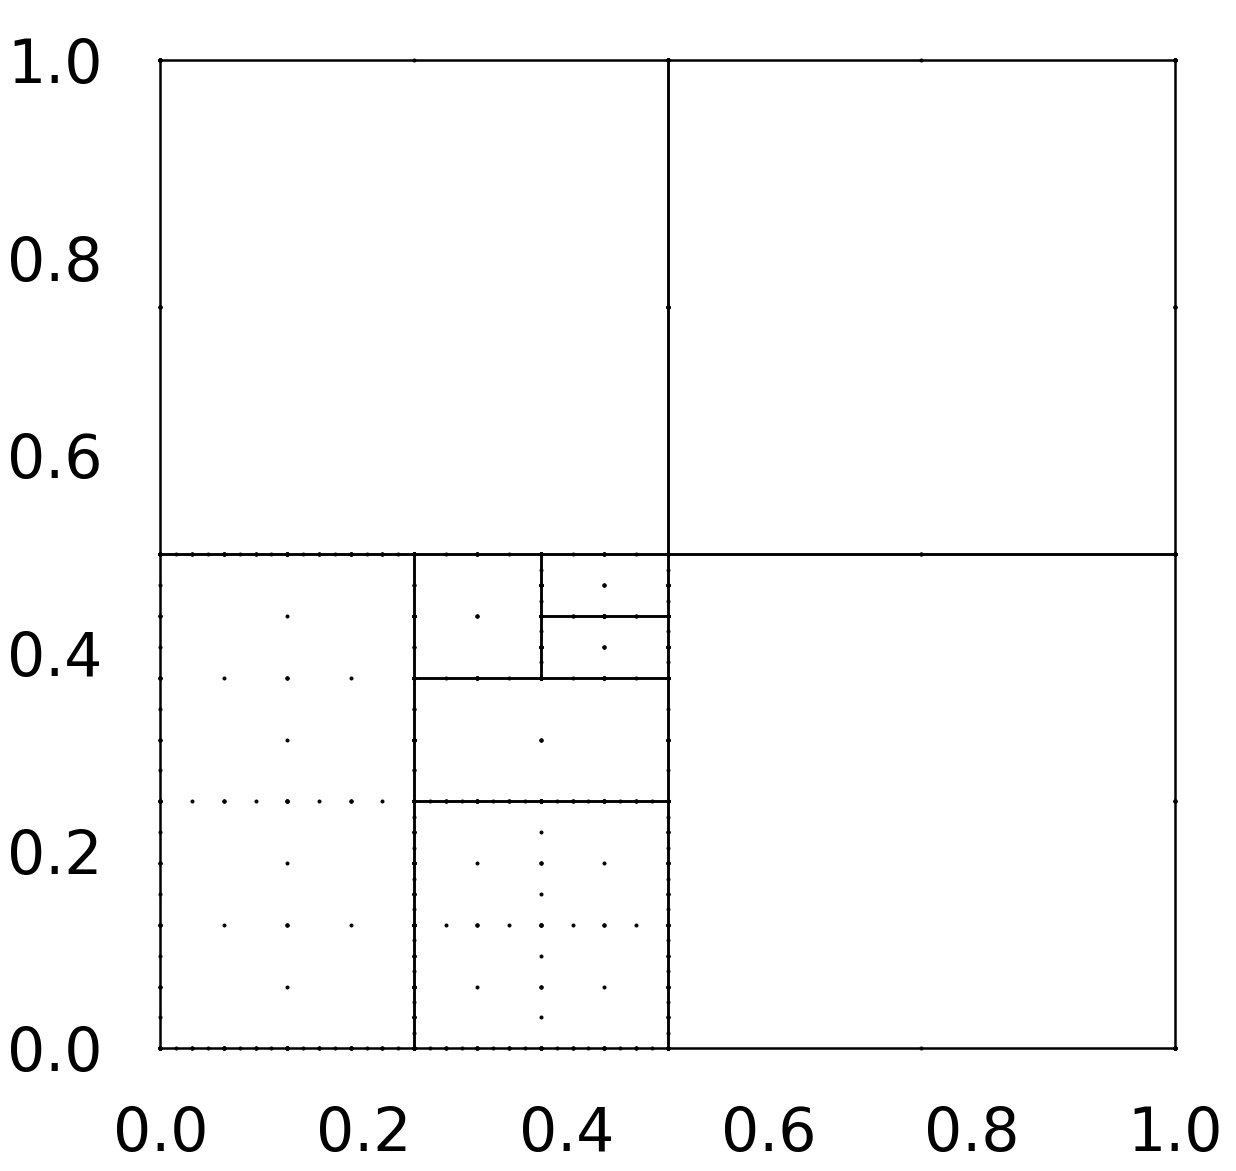

max surplus error: 1.6743756630285785e-05 total surplus error: 0.0025960241242706725
combiintegral: 0.11961628423328487
Current error: 0.03814525786880944
Split in dimension 0 , maxTwinError = [0.00060504]
Finished refinement
Refined  1  times
Refinement Graph:


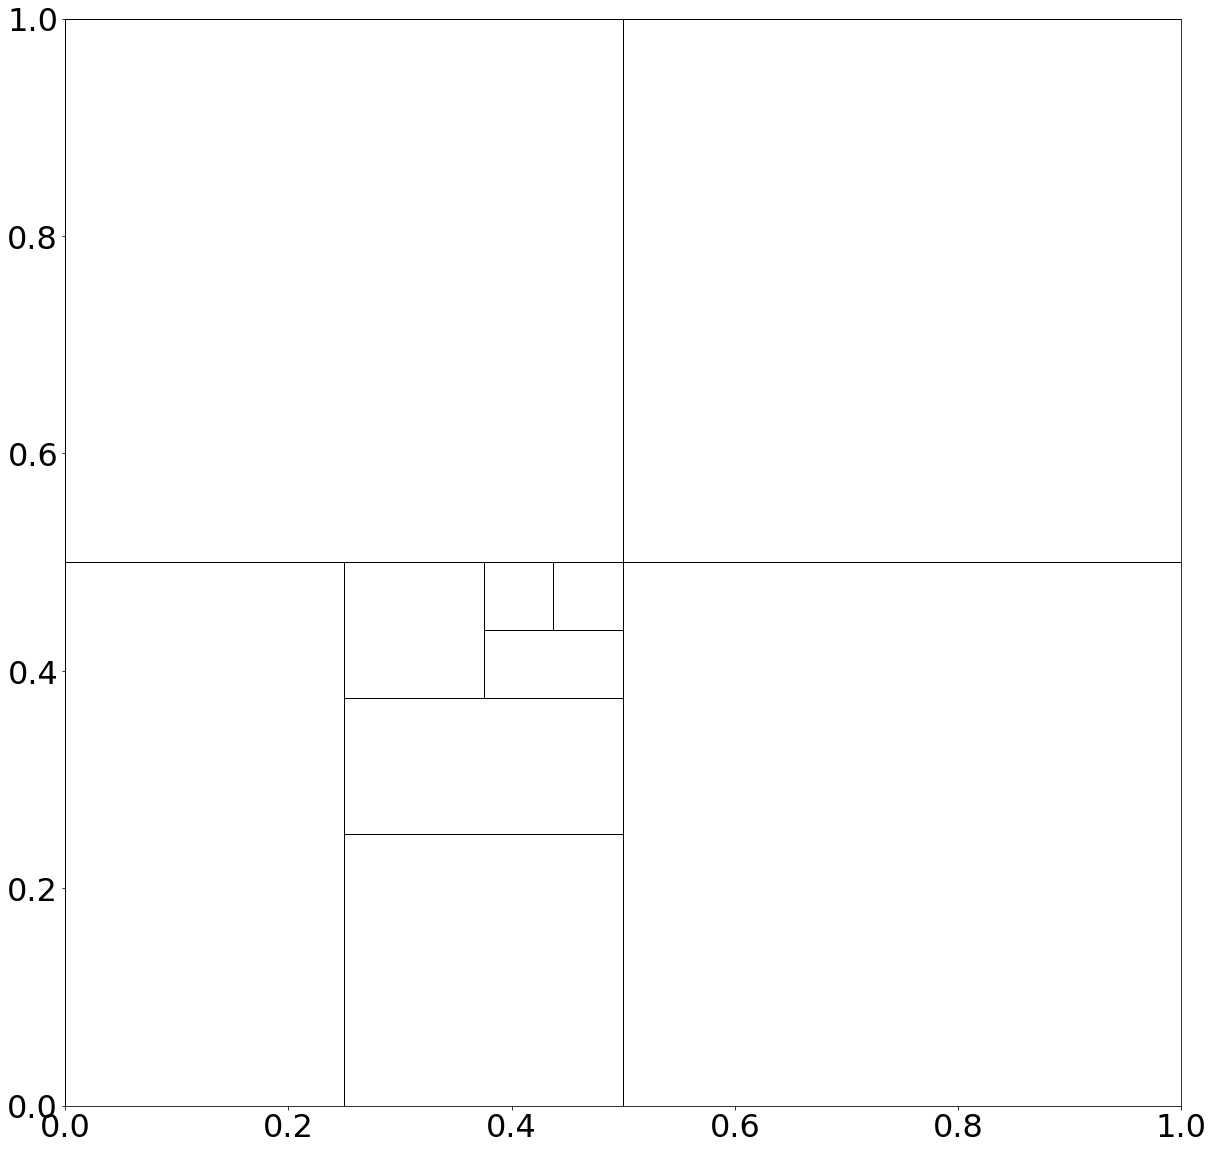

Combi Scheme:


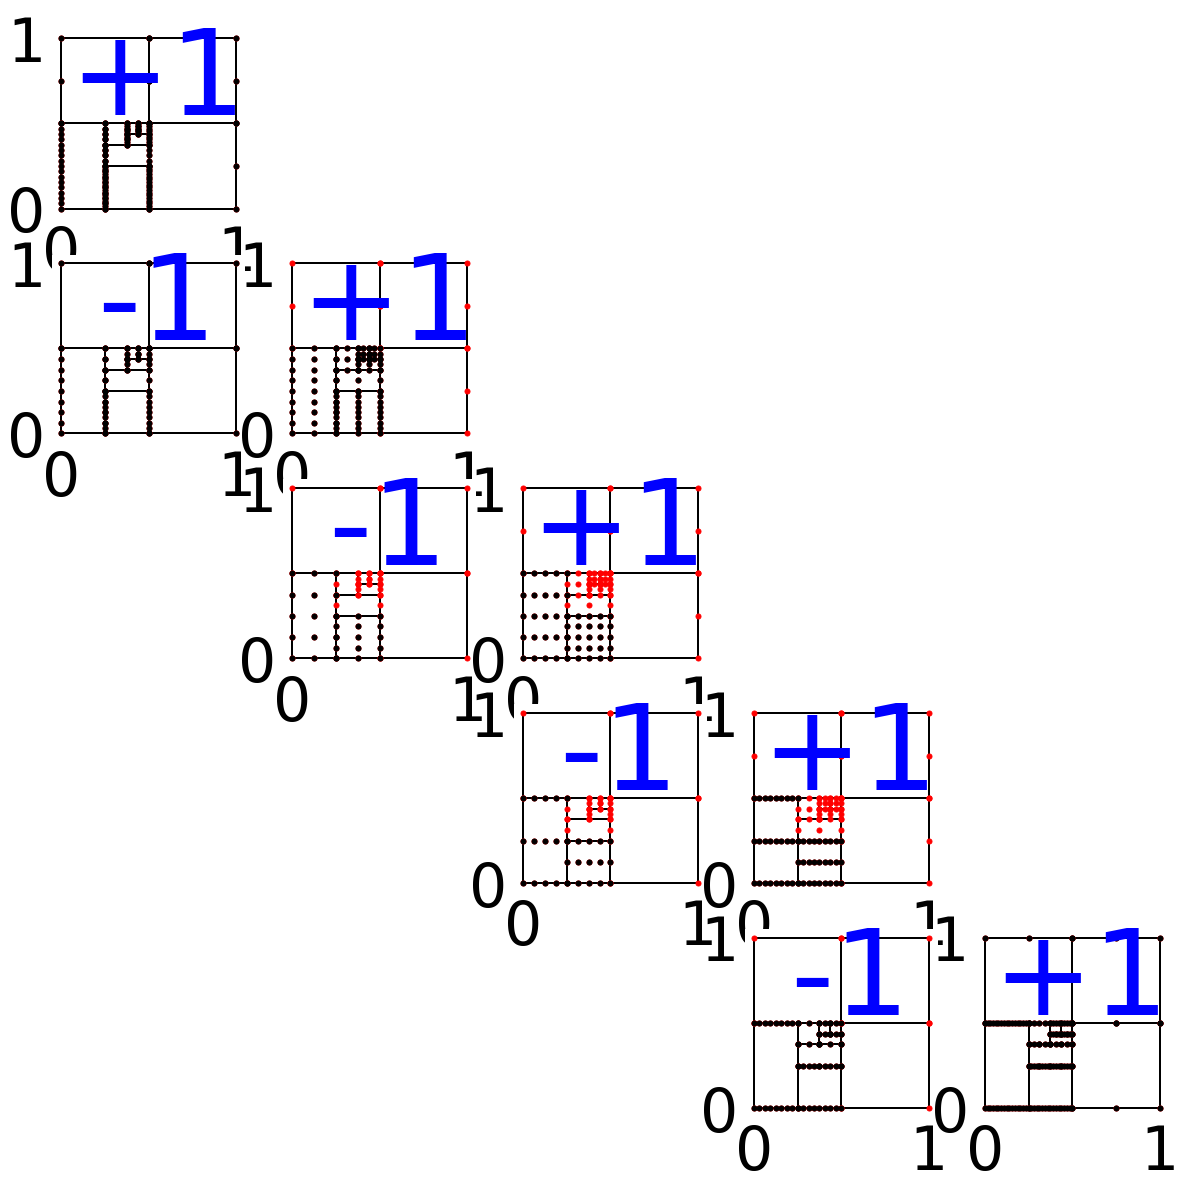

Resulting Sparse Grid:


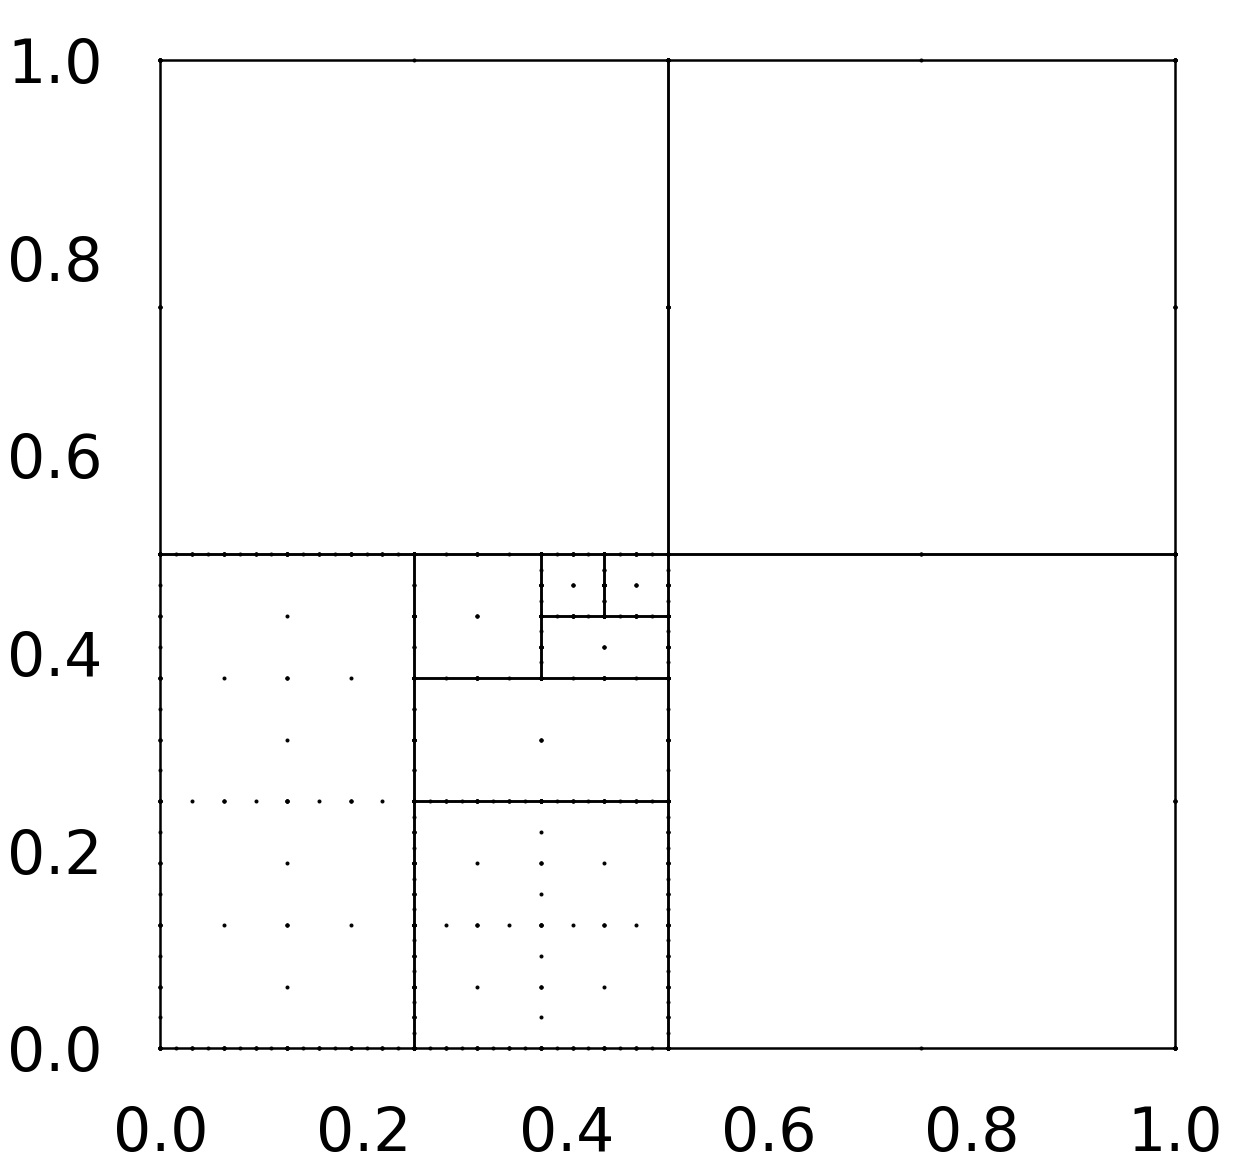

max surplus error: 1.471498271582353e-05 total surplus error: 0.002458162757810047
combiintegral: 0.11978621982745209
Current error: 0.03677877705765293
New scheme
0 [1, 6] 1.0
1 [2, 5] 1.0
2 [3, 4] 1.0
3 [4, 3] 1.0
4 [5, 2] 1.0
5 [6, 1] 1.0
6 [1, 5] -1.0
7 [2, 4] -1.0
8 [3, 3] -1.0
9 [4, 2] -1.0
10 [5, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


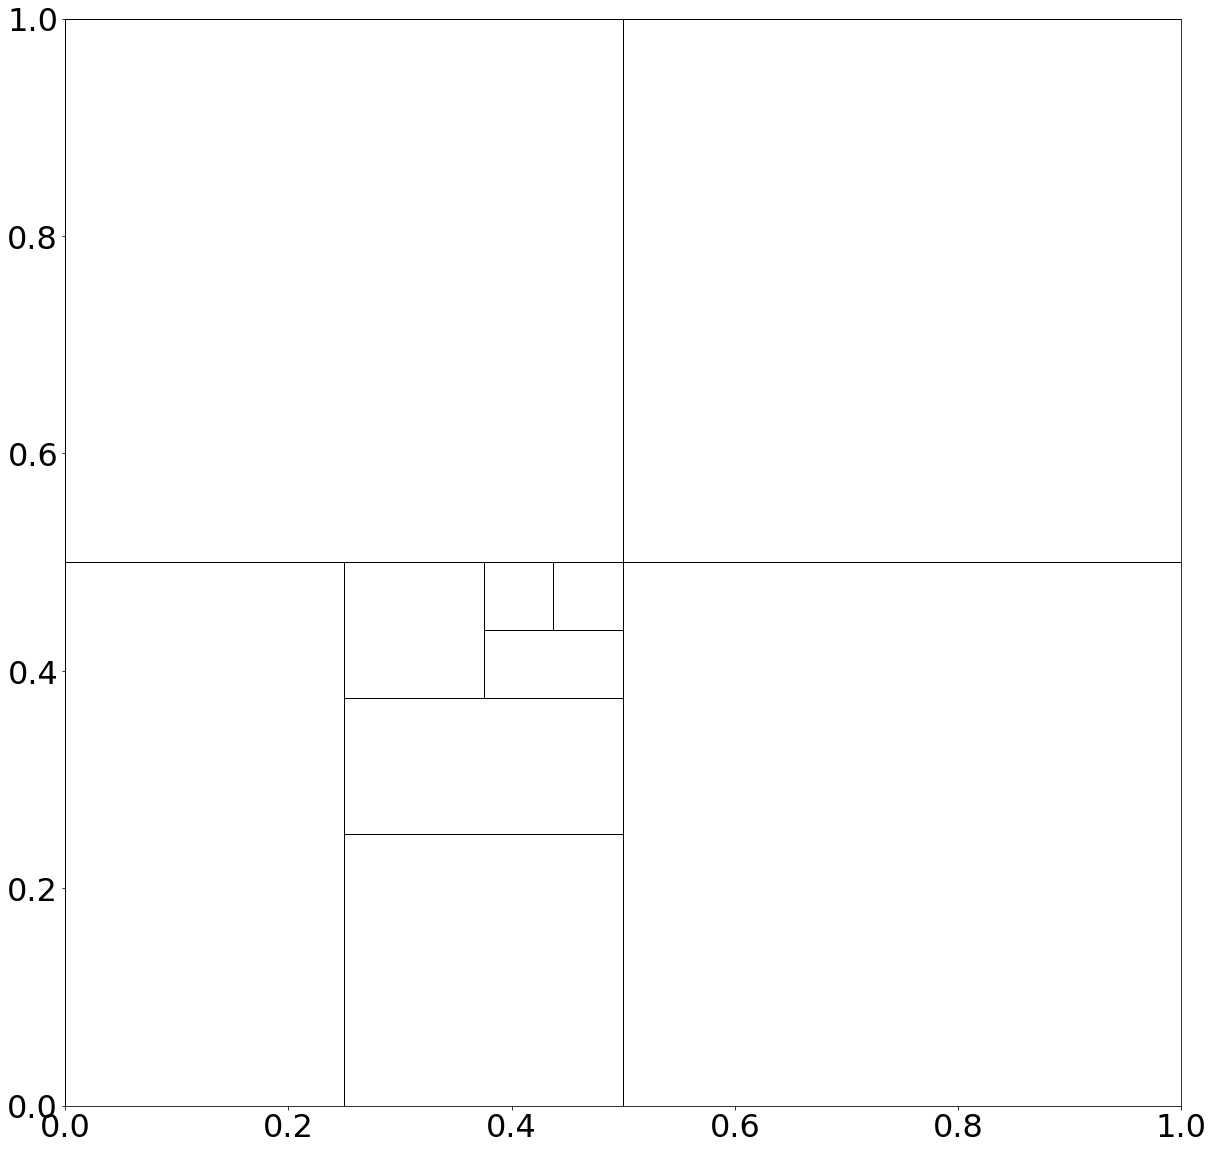

Combi Scheme:


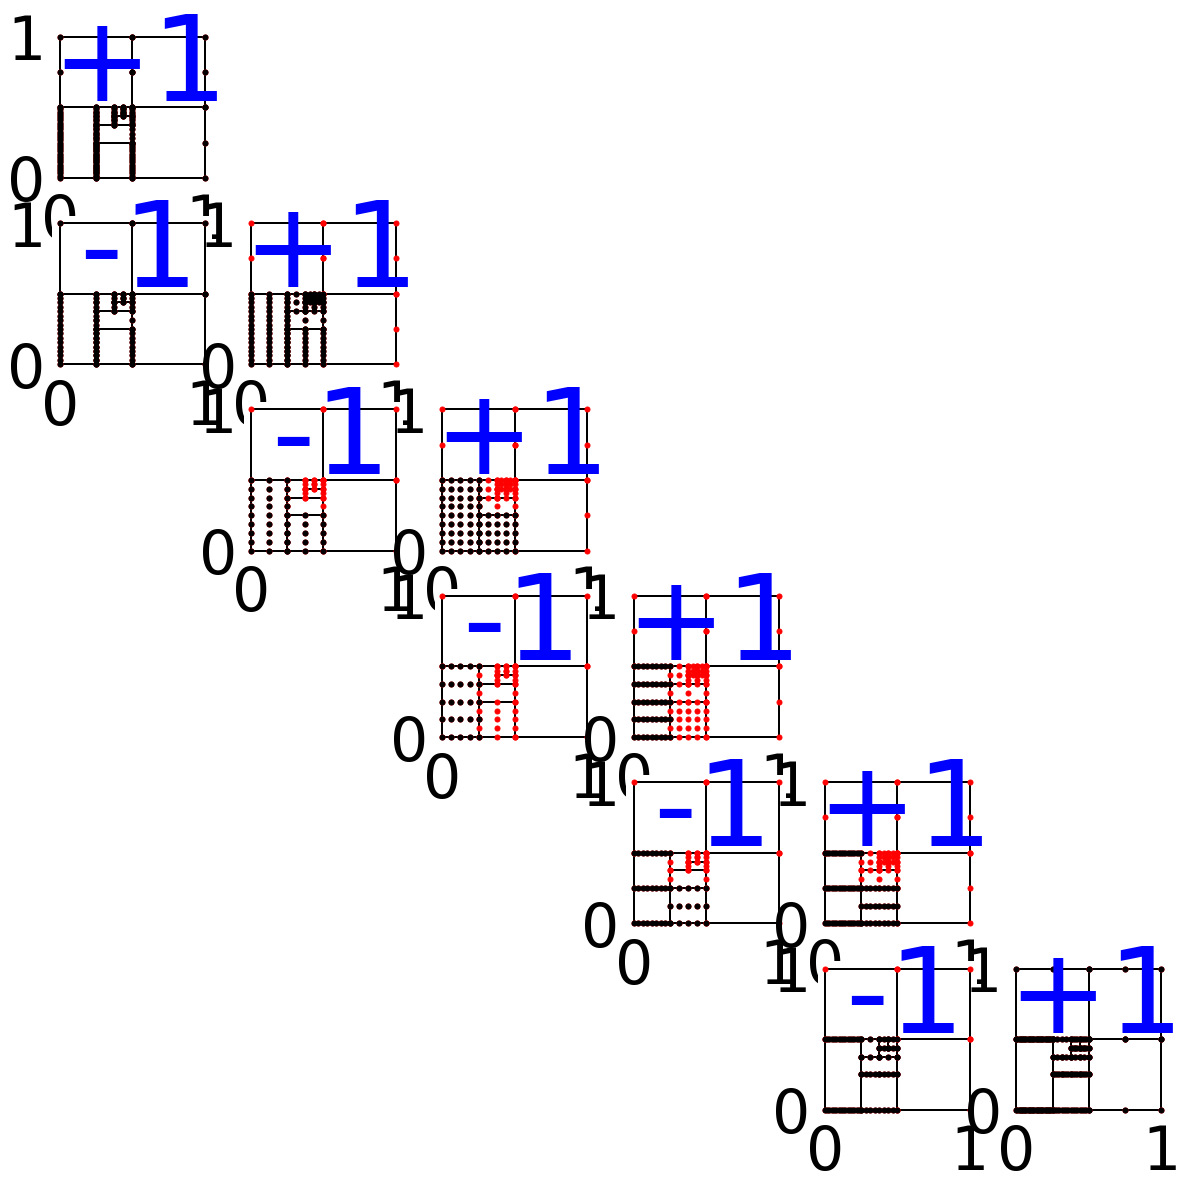

Resulting Sparse Grid:


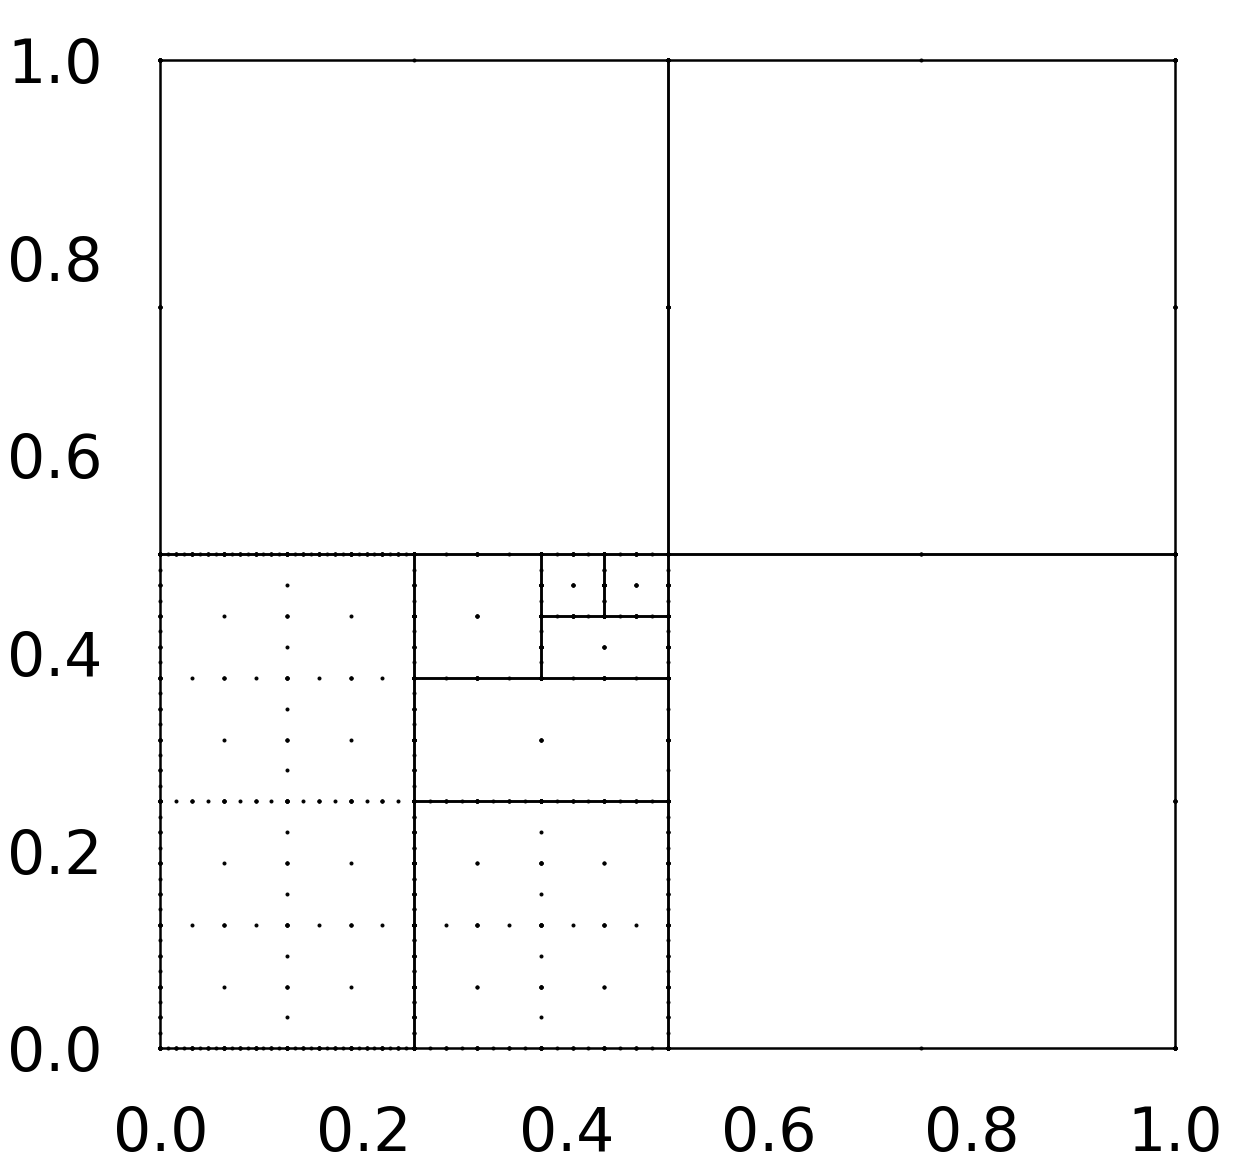

max surplus error: 1.1041517703275182e-05 total surplus error: 0.0018790504945969501
combiintegral: 0.12039902116422069
Current error: 0.03185113801976355
Finished refinement
Refined  2  times
Refinement Graph:


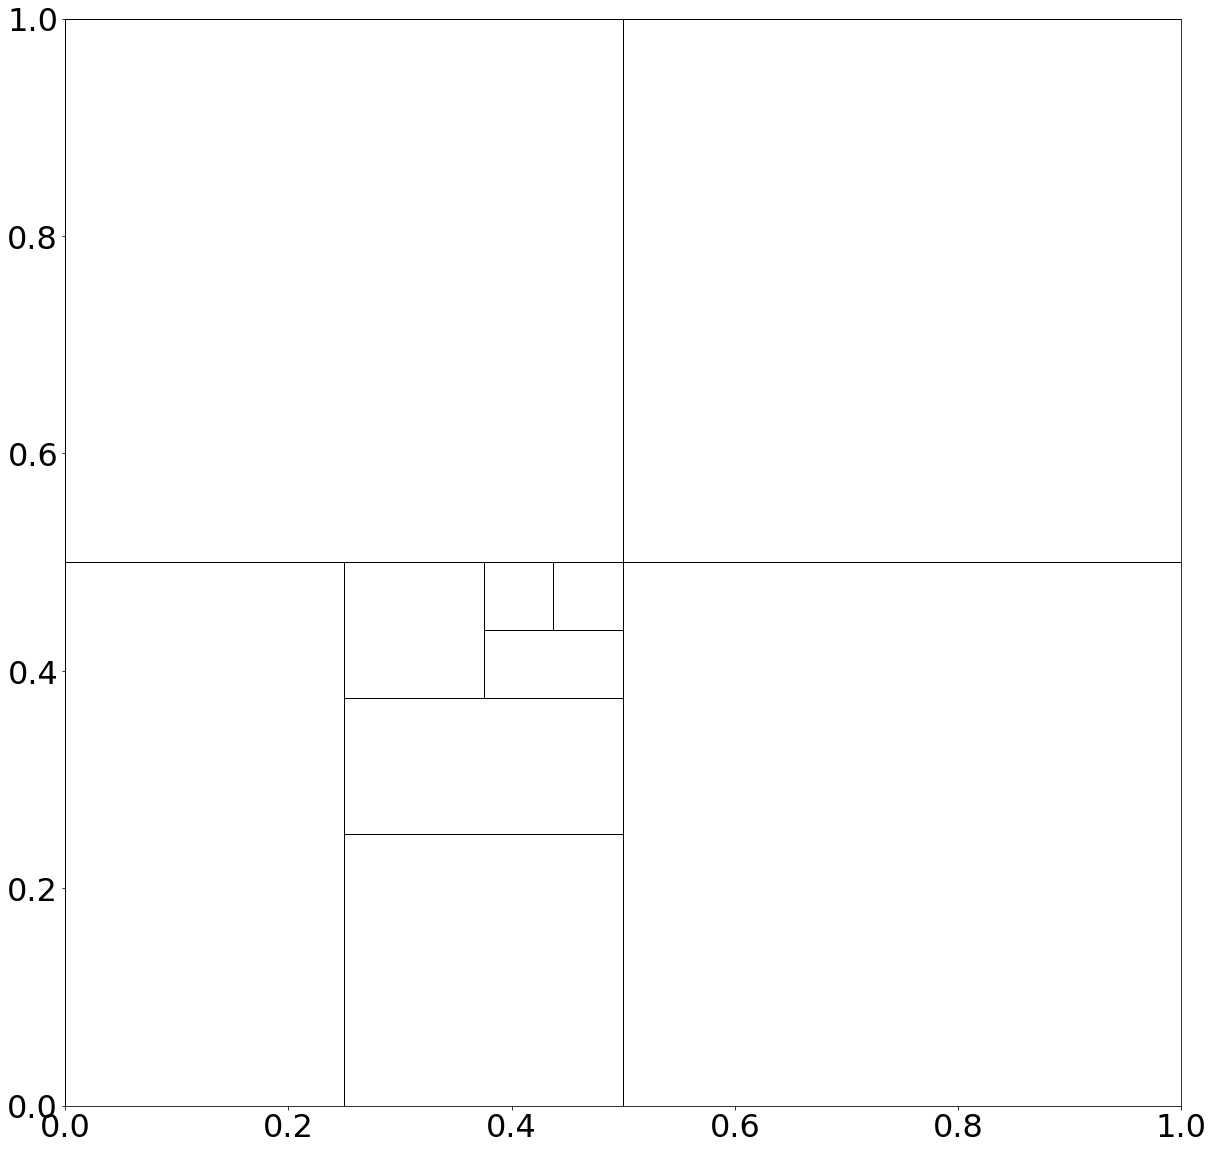

Combi Scheme:


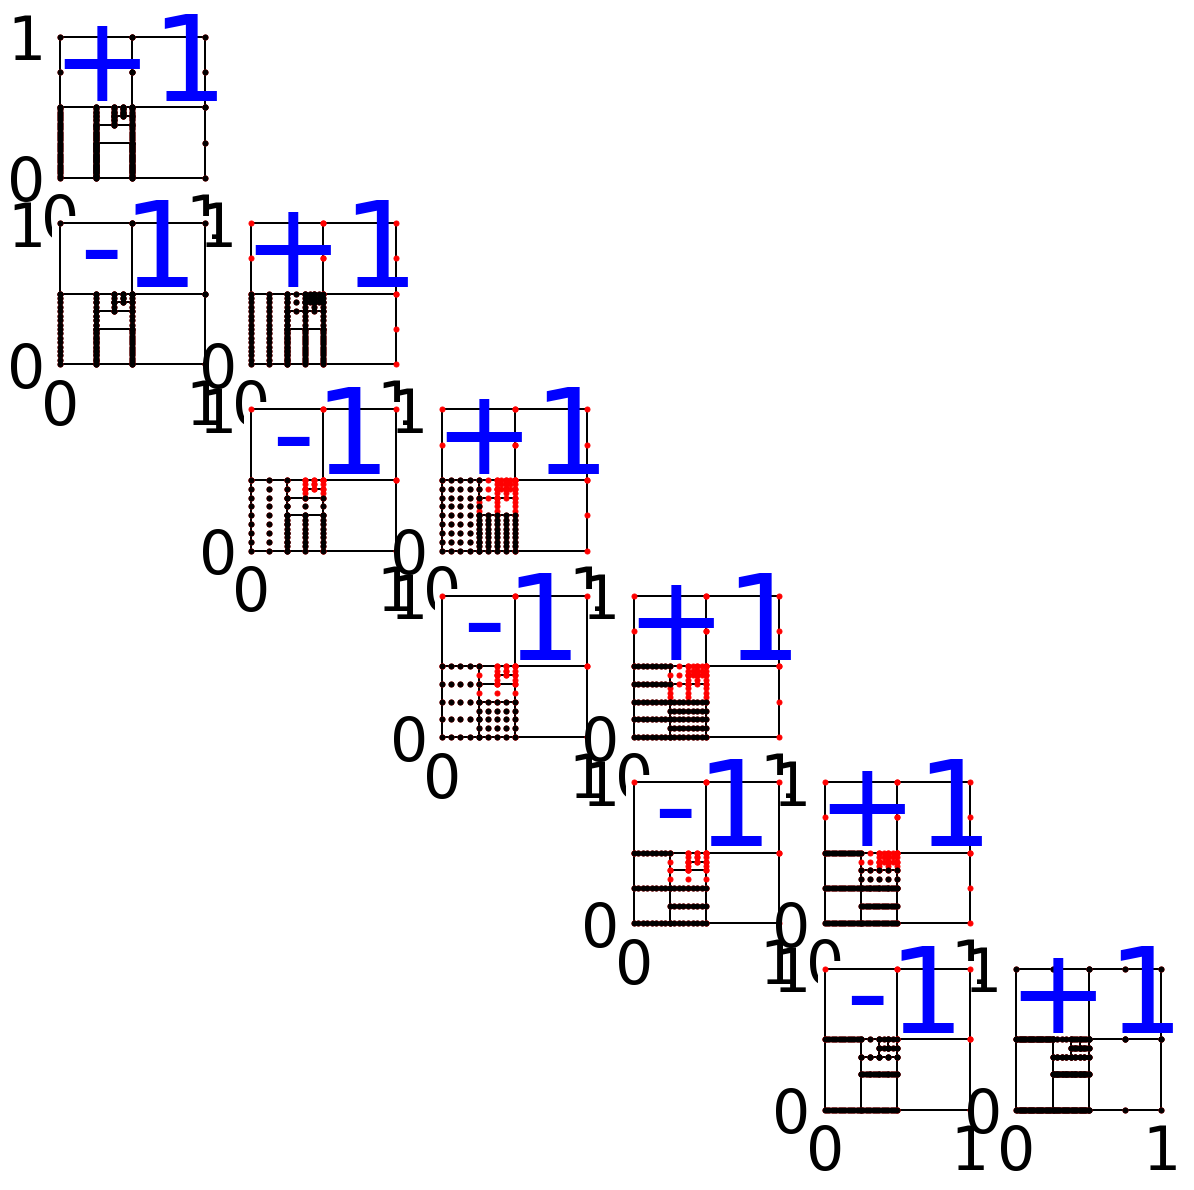

Resulting Sparse Grid:


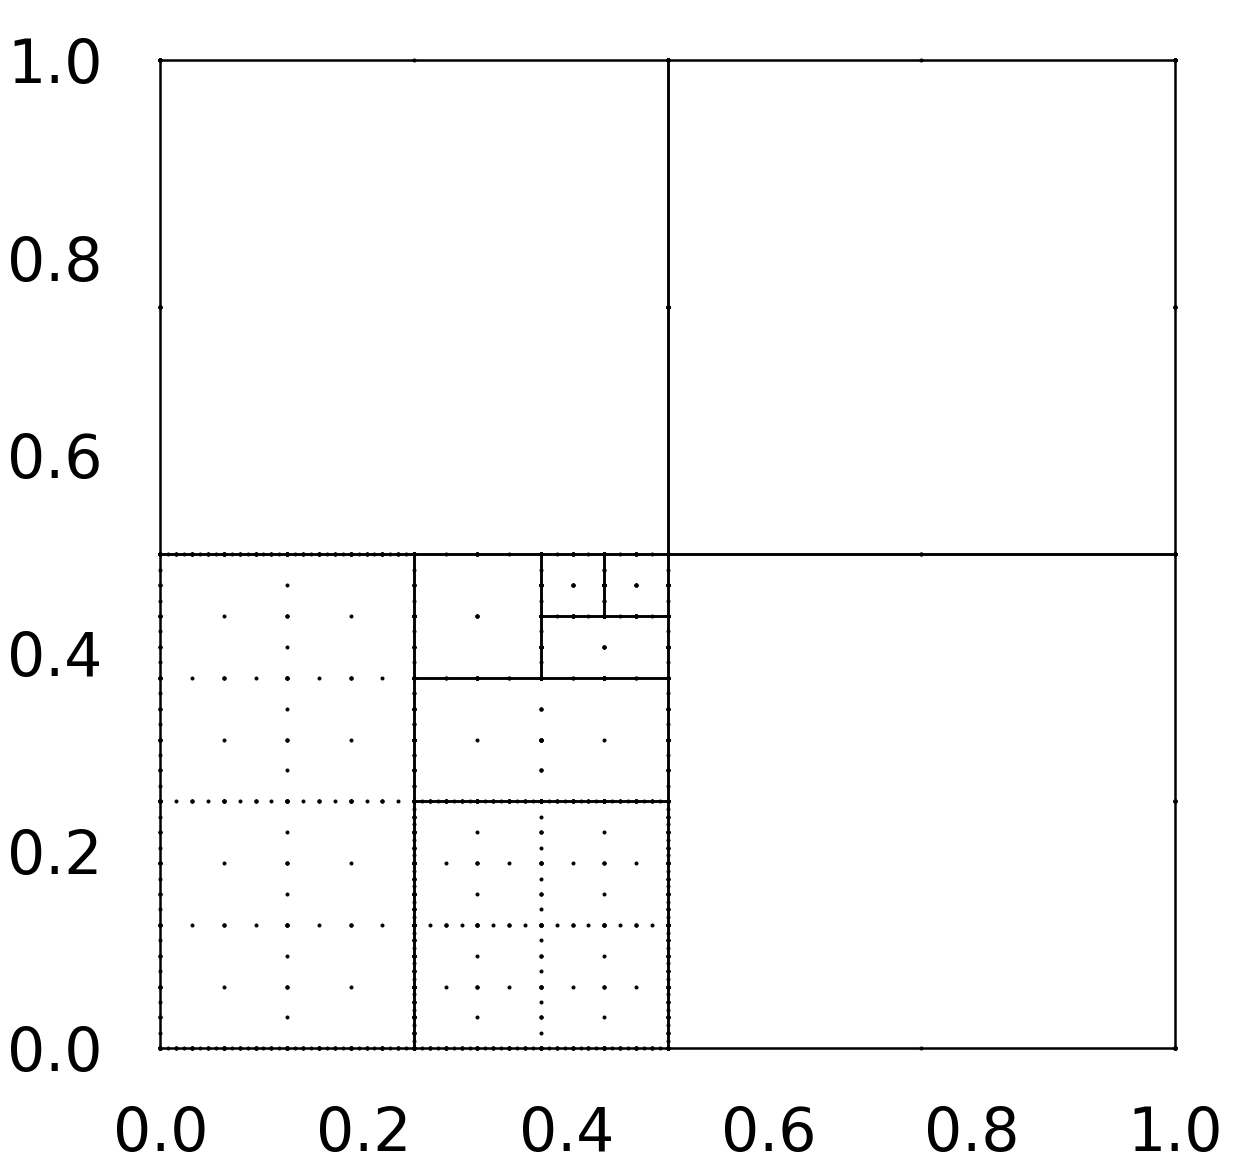

max surplus error: 1.695303549977121e-05 total surplus error: 0.0018852984062832244
combiintegral: 0.12147327659838017
Current error: 0.023212868655106467
Finished refinement
Refined  1  times
Refinement Graph:


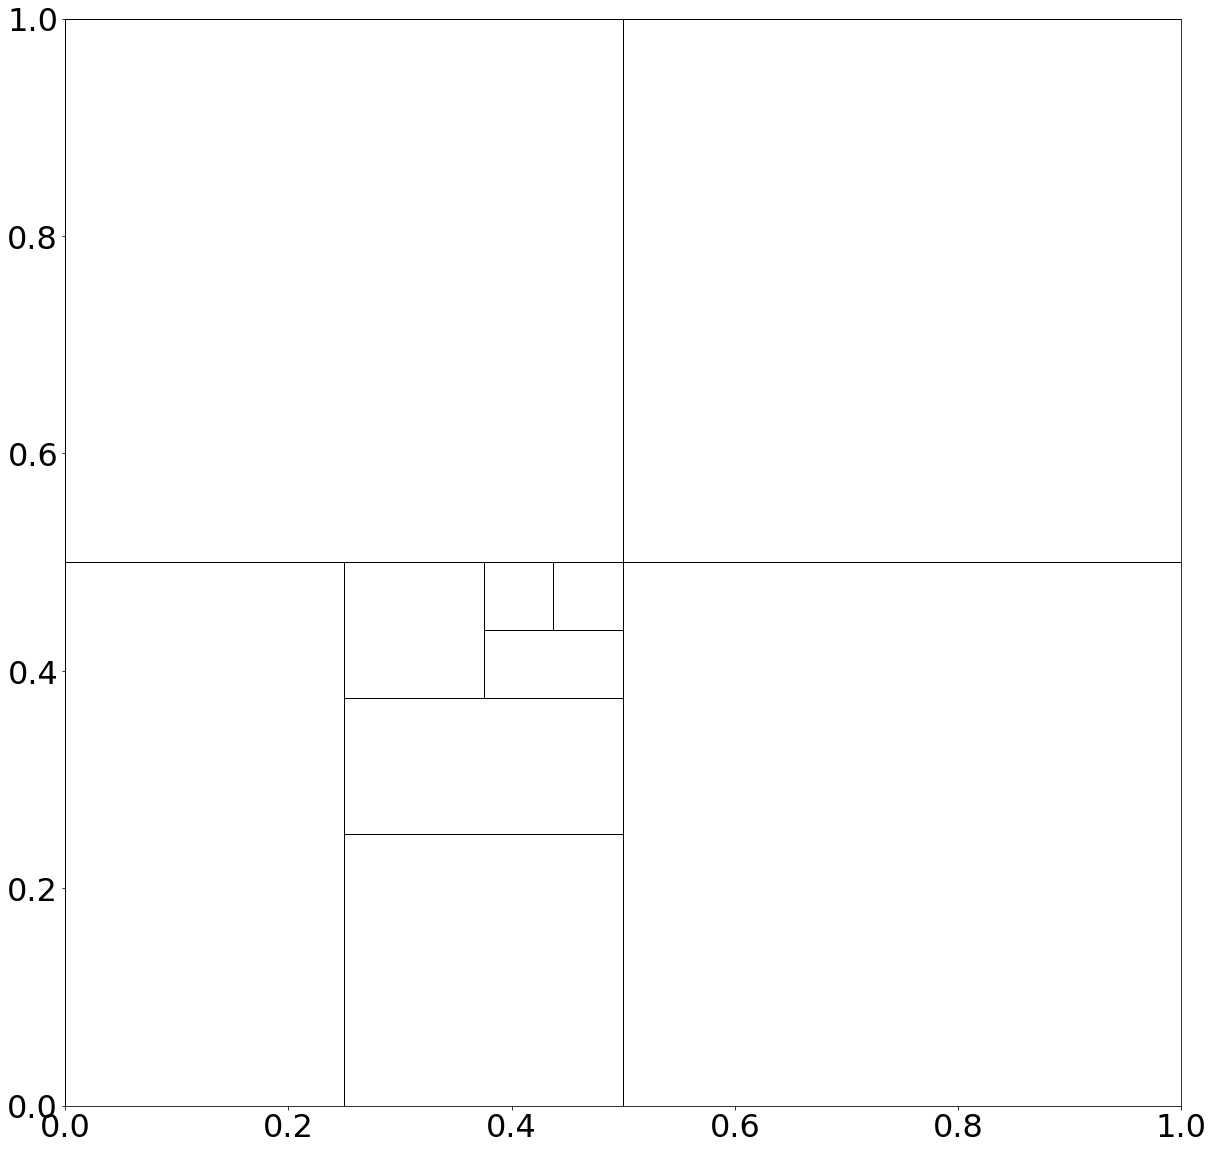

Combi Scheme:


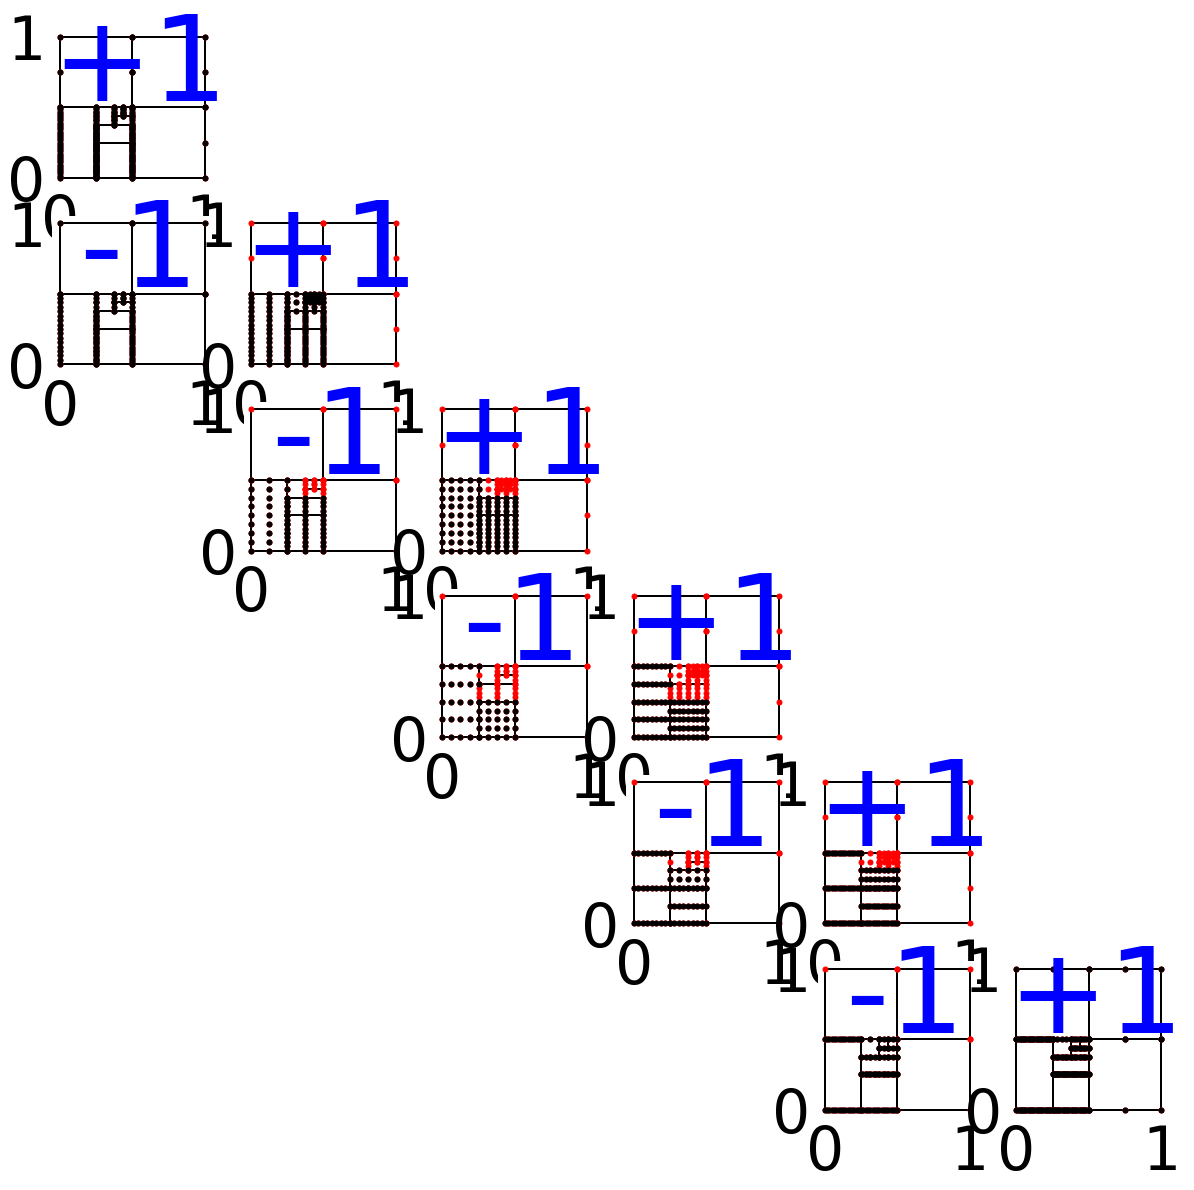

Resulting Sparse Grid:


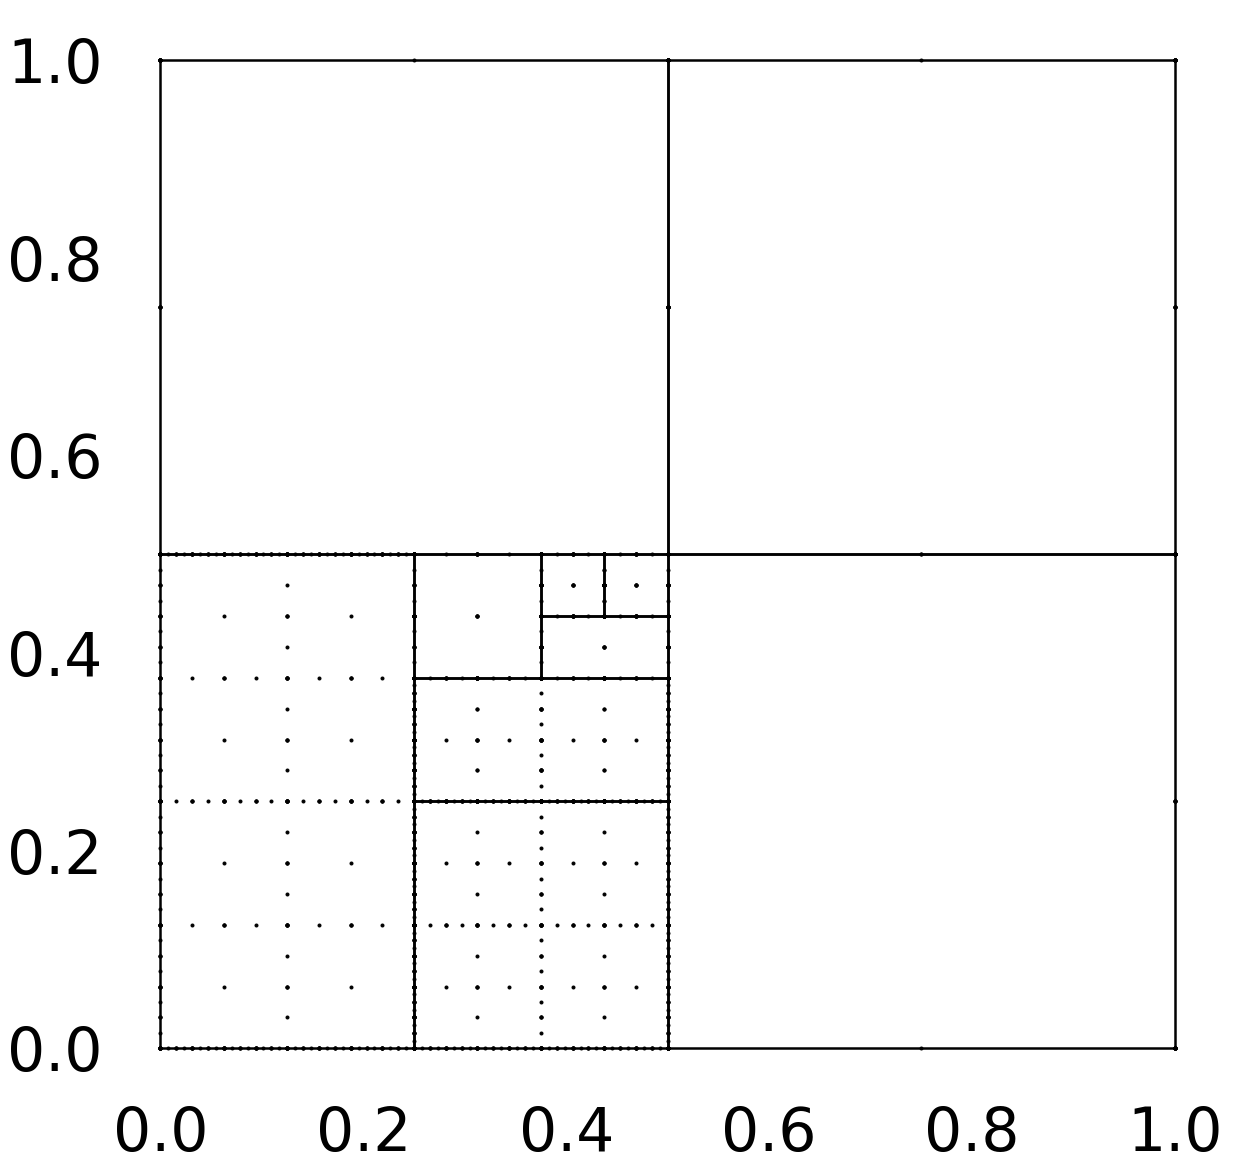

max surplus error: 8.409355529393425e-06 total surplus error: 0.001572142909235529
combiintegral: 0.12178738341482401
Current error: 0.020687082698212764
Split in dimension 1 , maxTwinError = [0.00028661]
Finished refinement
Refined  1  times
Refinement Graph:


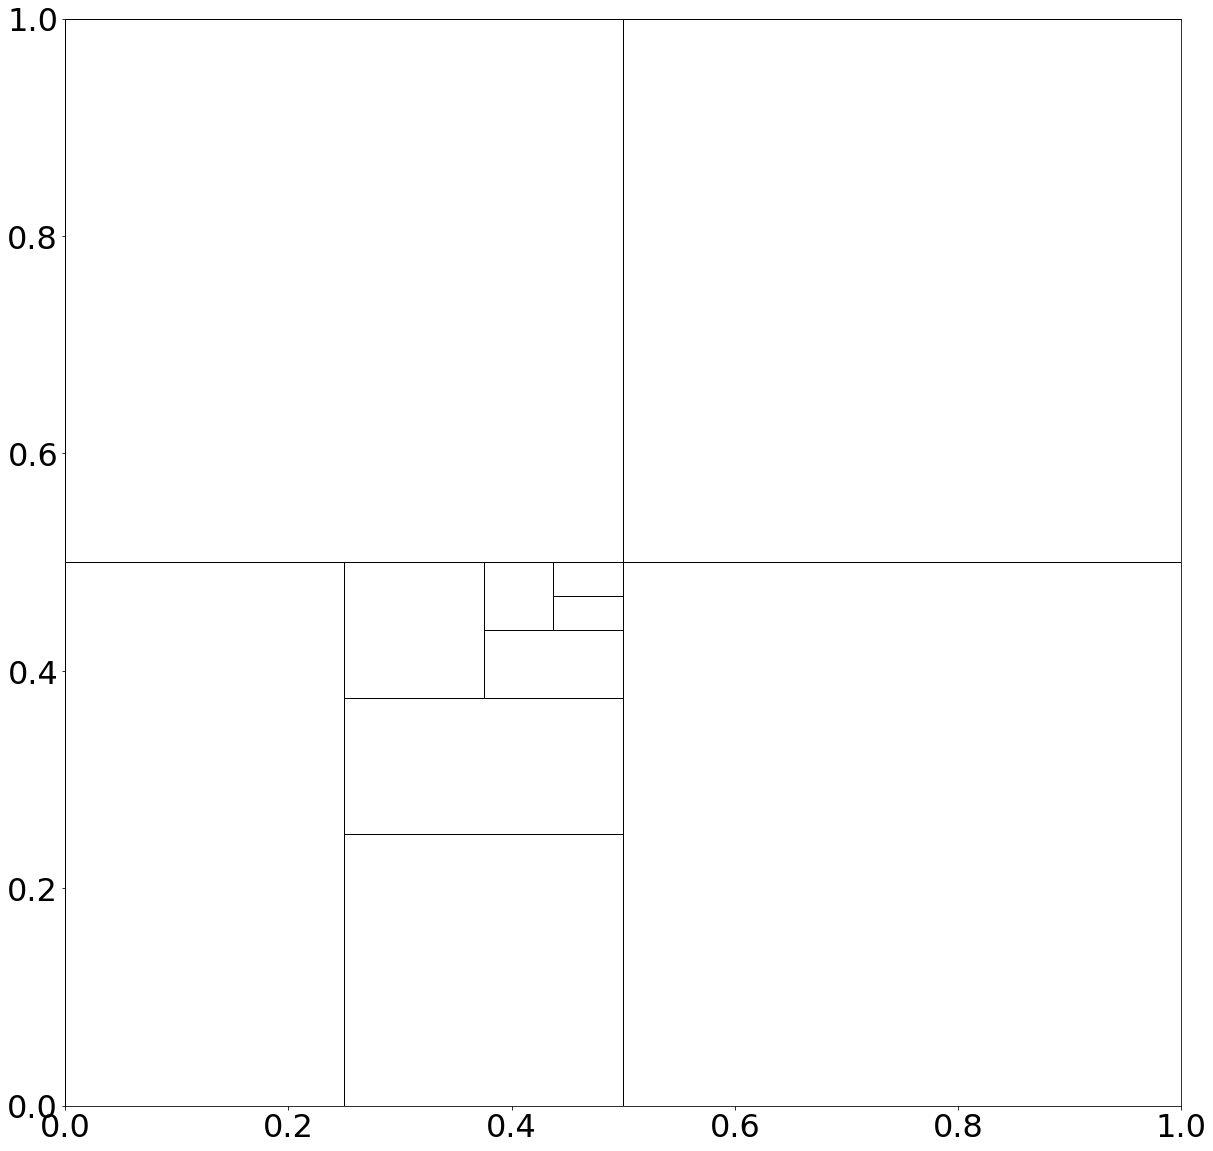

Combi Scheme:


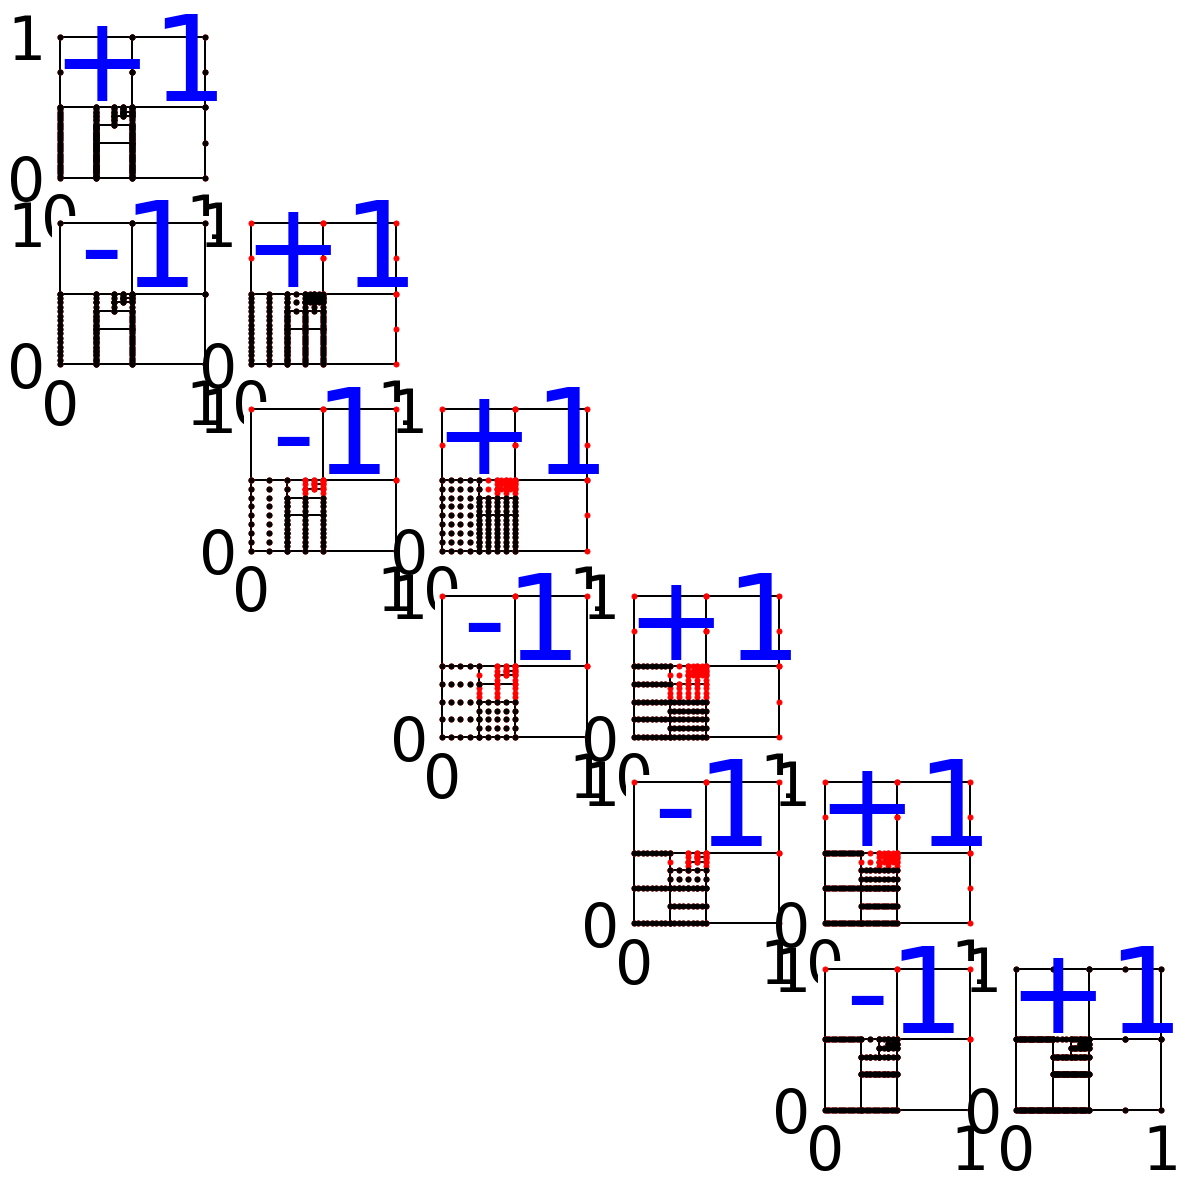

Resulting Sparse Grid:


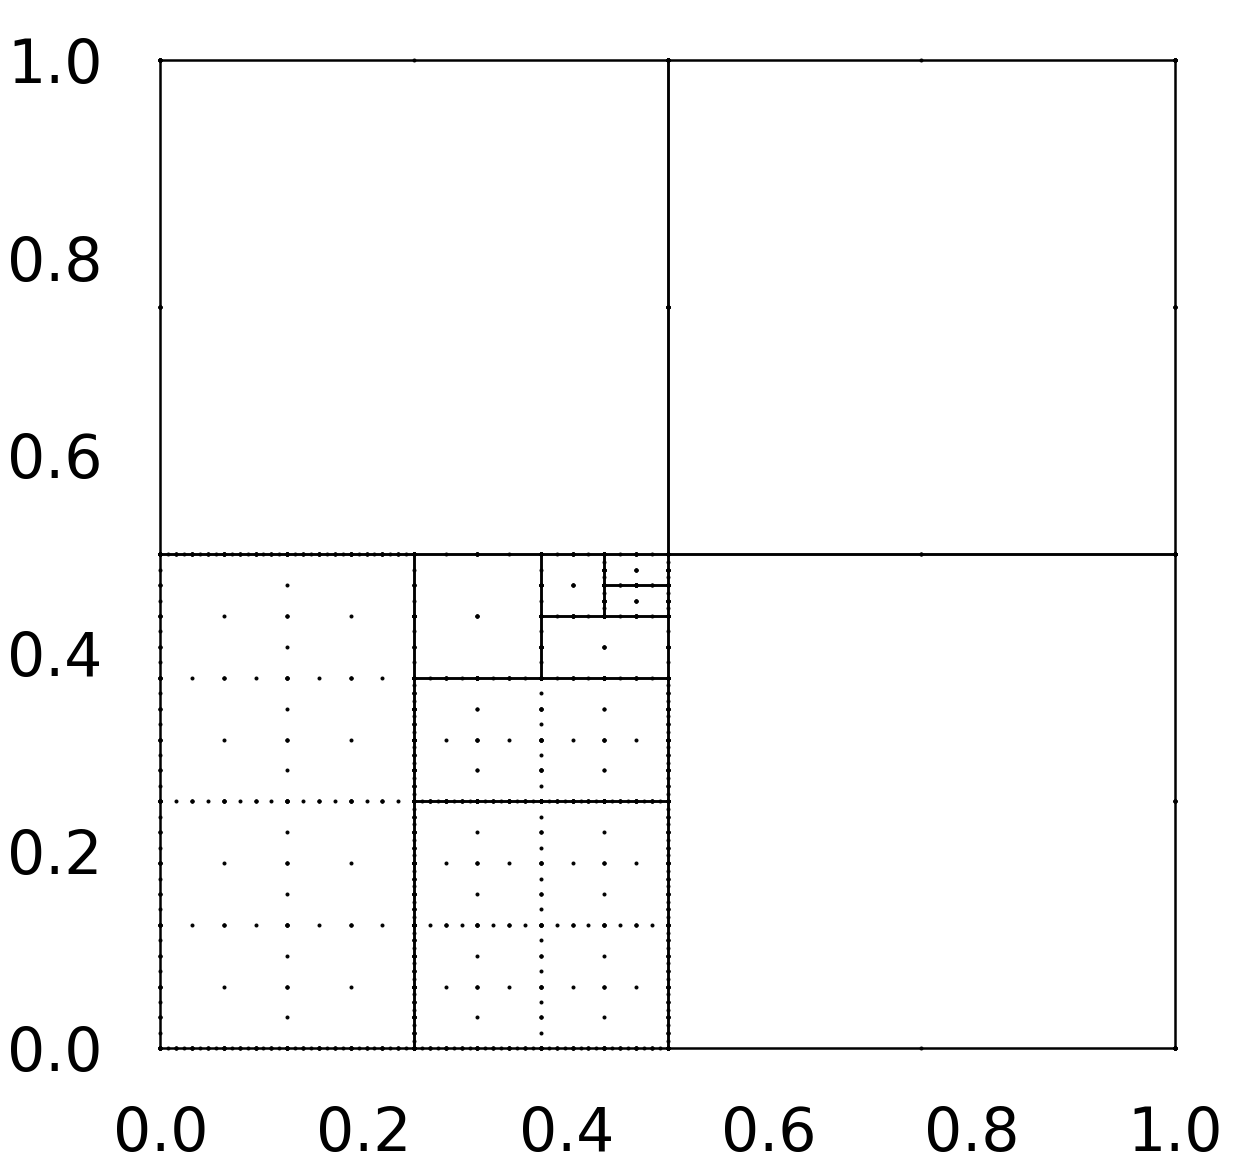

max surplus error: 4.10103760795484e-06 total surplus error: 0.0015008152676888478
combiintegral: 0.12187061161977004
Current error: 0.020017830646792356
Split in dimension 0 , maxTwinError = [0.00011244]
Finished refinement
Refined  2  times
Refinement Graph:


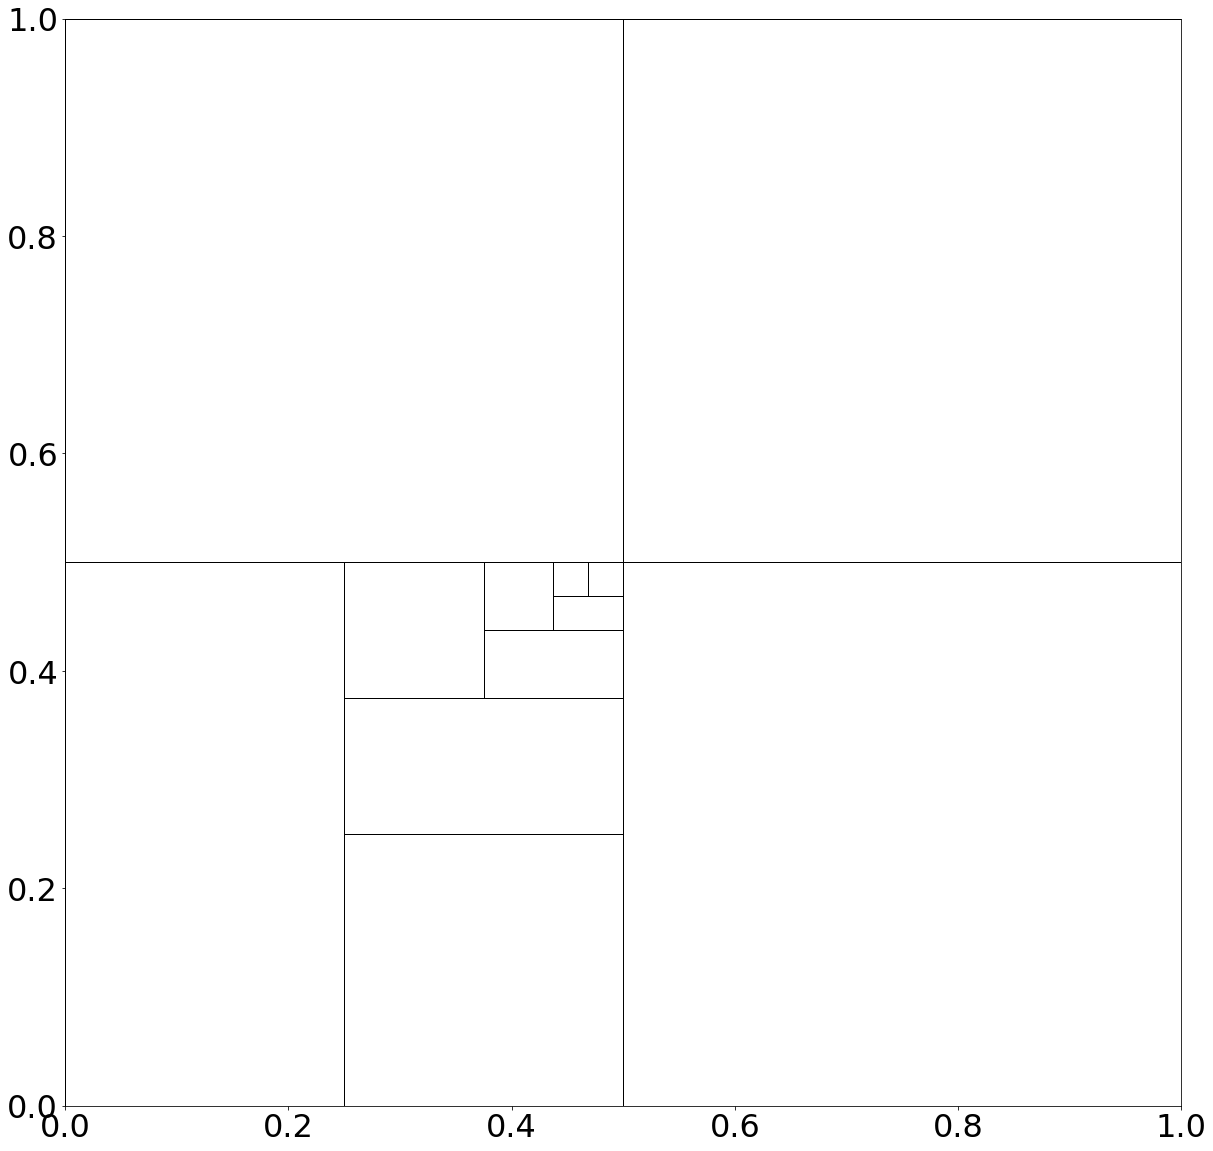

Combi Scheme:


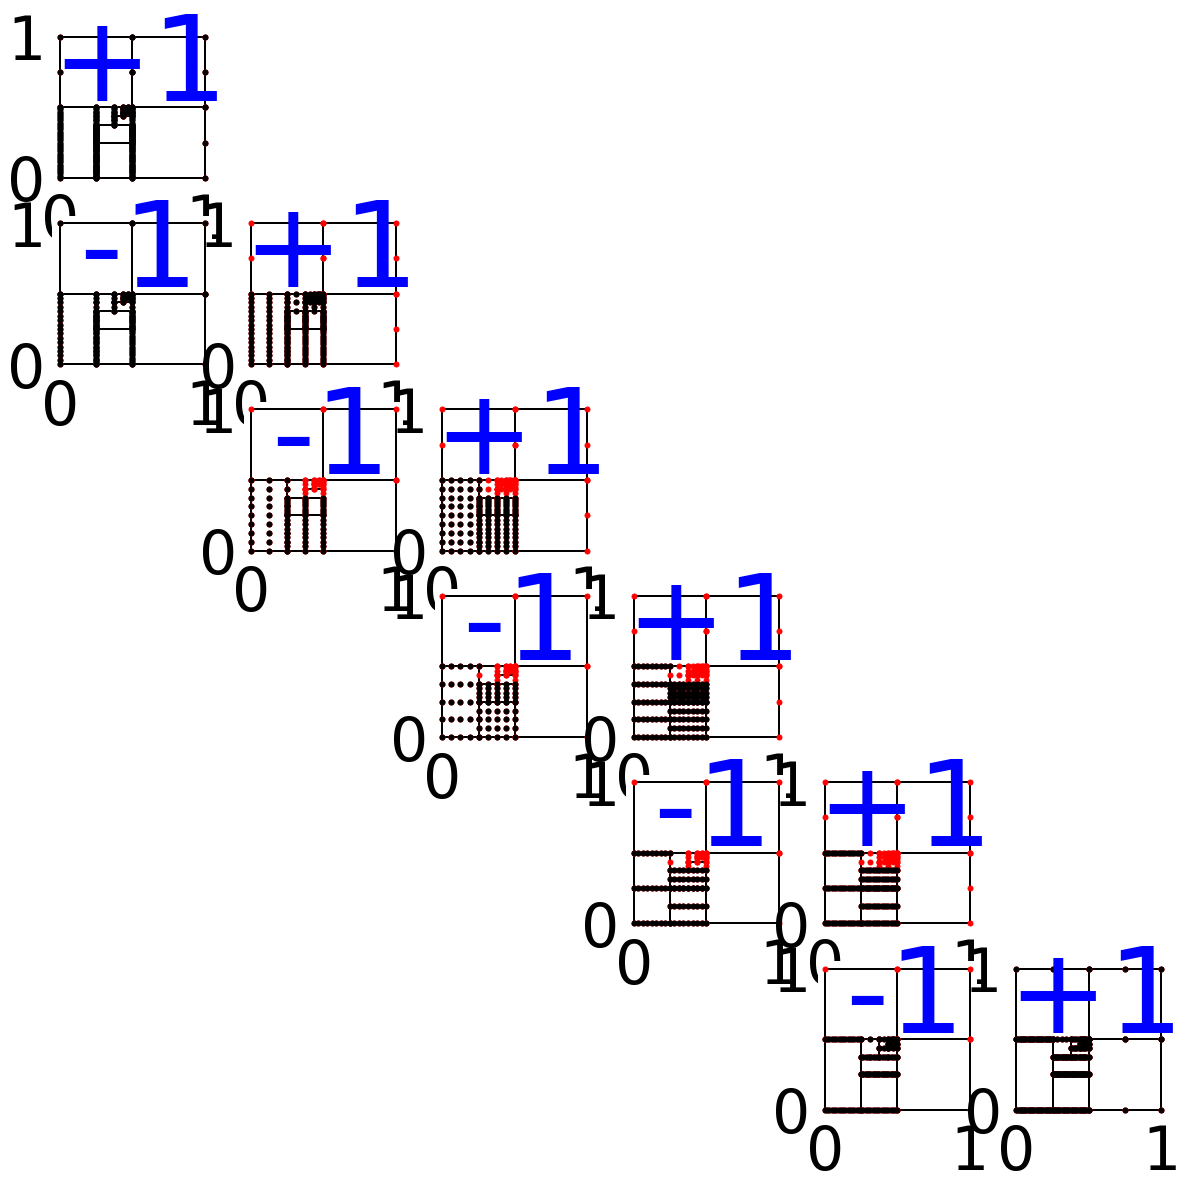

Resulting Sparse Grid:


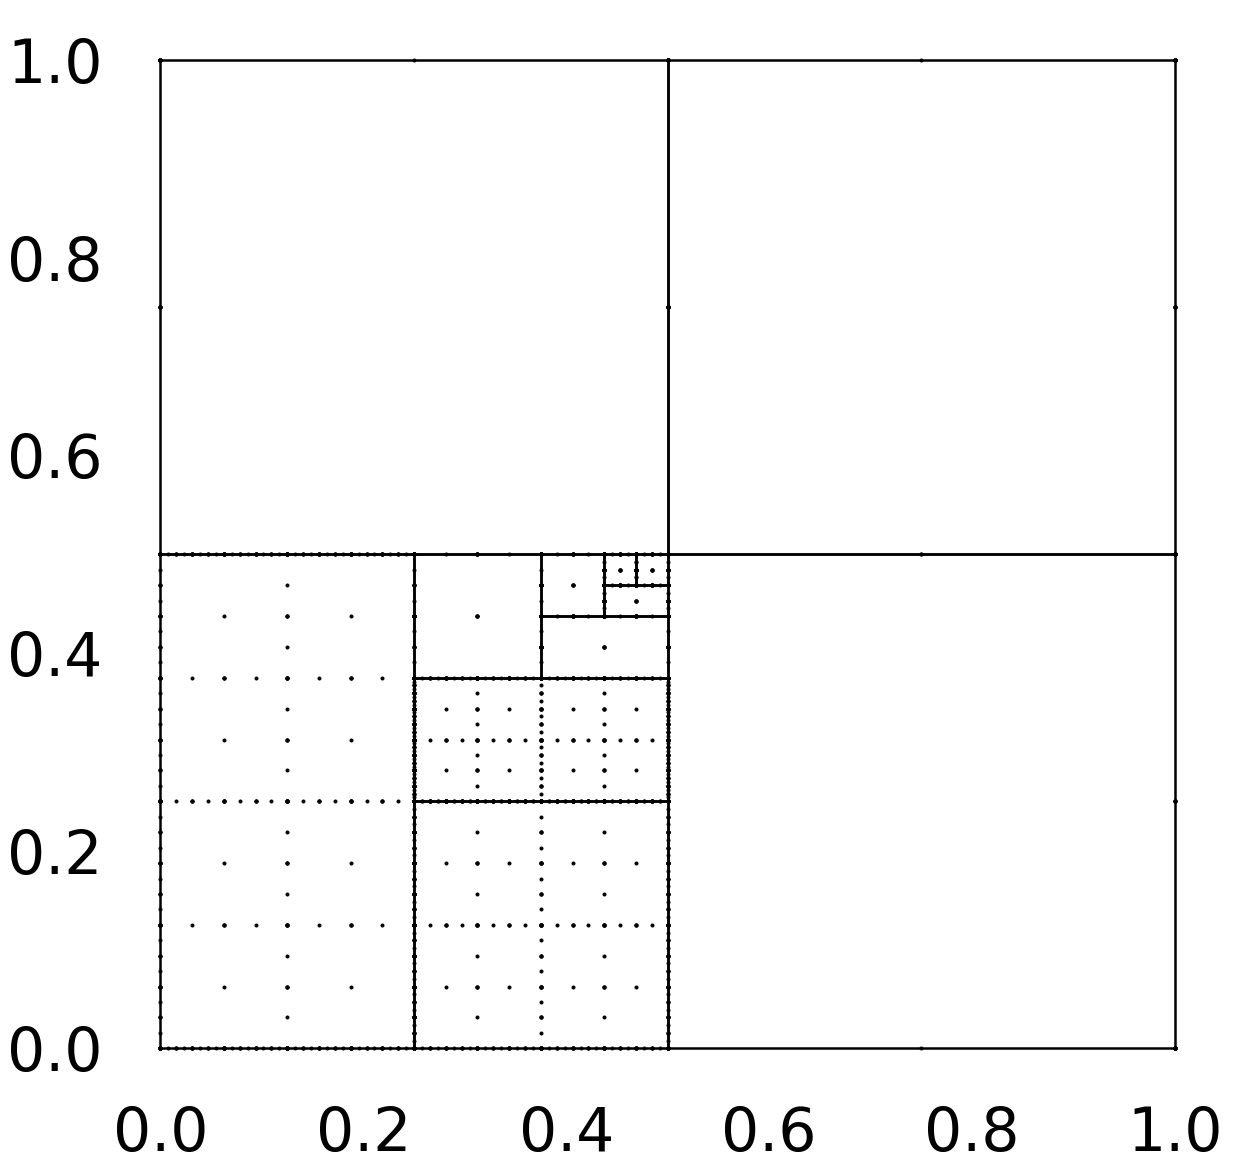

max surplus error: 3.4621544450203905e-06 total surplus error: 0.001309507654440225
combiintegral: 0.12206947108933956
Current error: 0.018418768068907083
New scheme
0 [1, 7] 1.0
1 [2, 6] 1.0
2 [3, 5] 1.0
3 [4, 4] 1.0
4 [5, 3] 1.0
5 [6, 2] 1.0
6 [7, 1] 1.0
7 [1, 6] -1.0
8 [2, 5] -1.0
9 [3, 4] -1.0
10 [4, 3] -1.0
11 [5, 2] -1.0
12 [6, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


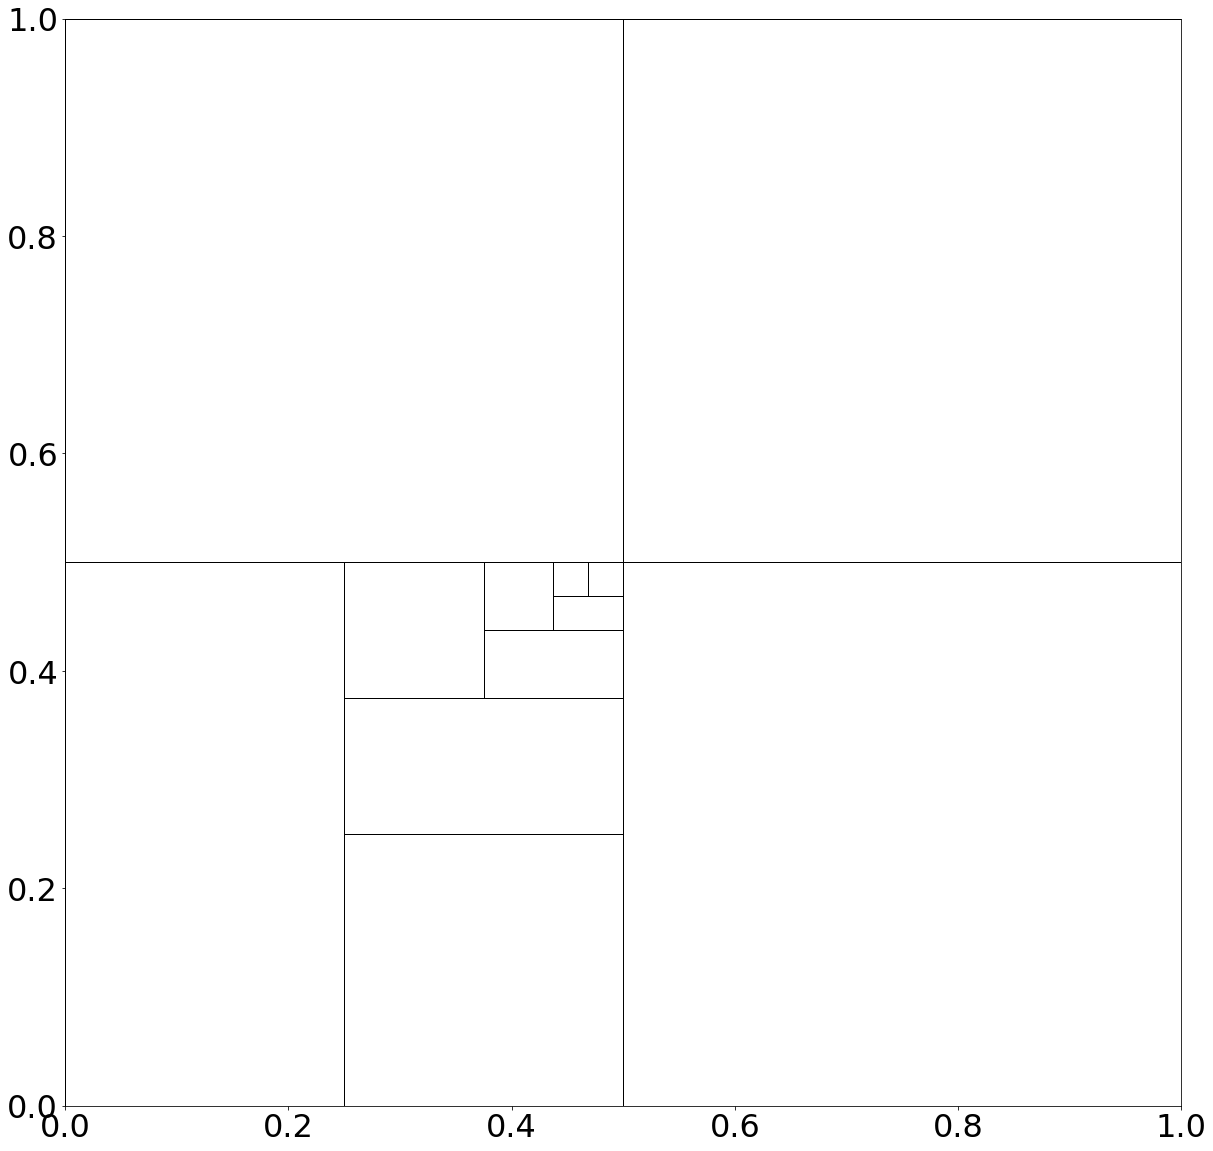

Combi Scheme:


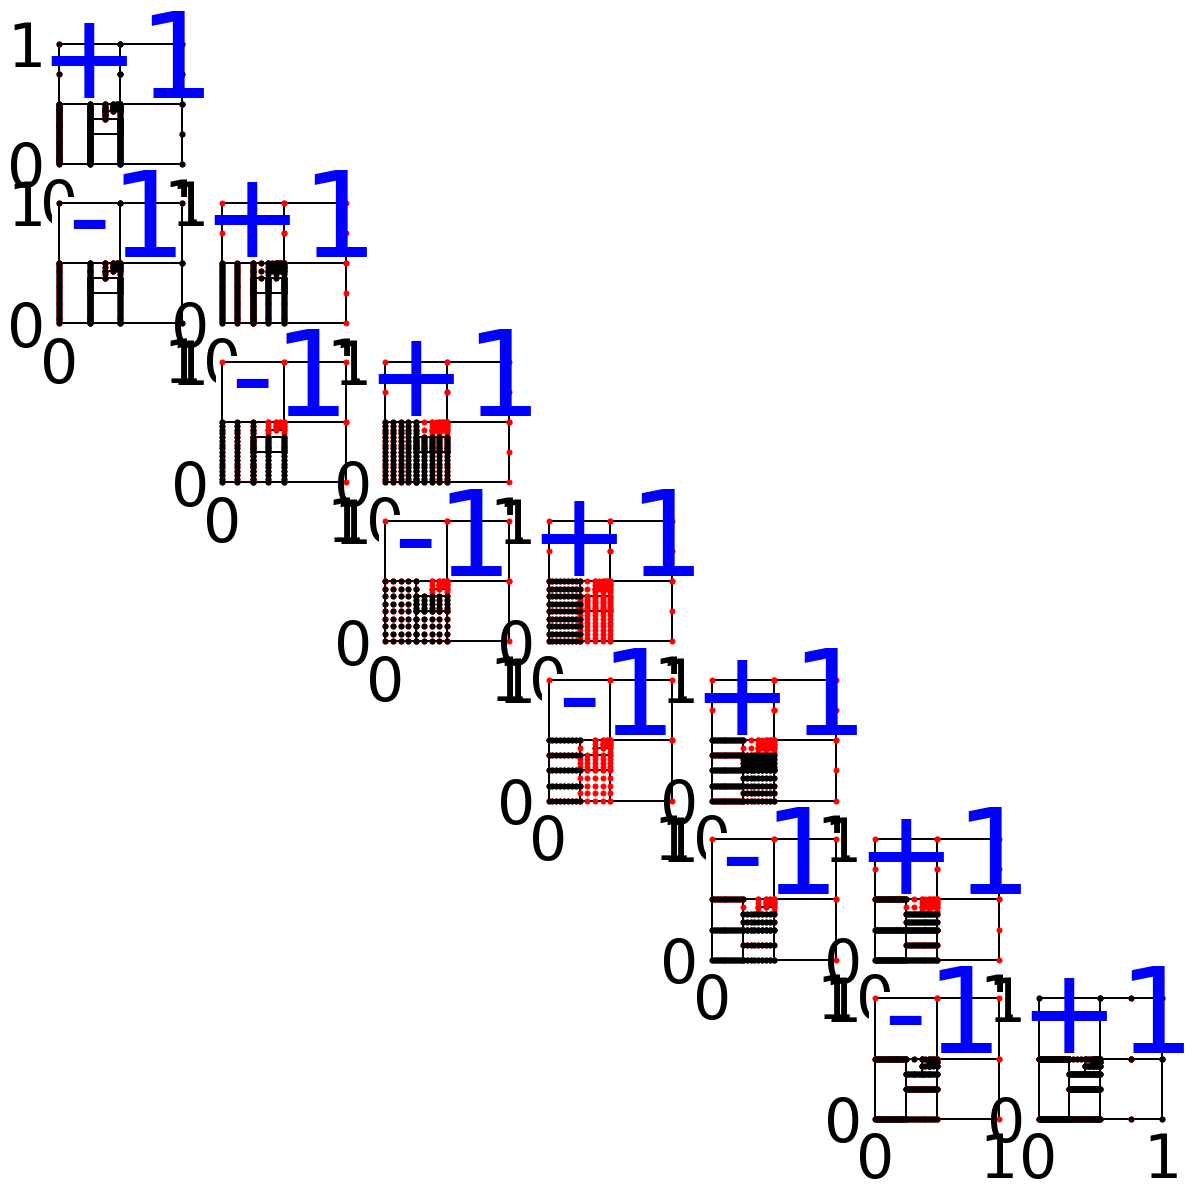

Resulting Sparse Grid:


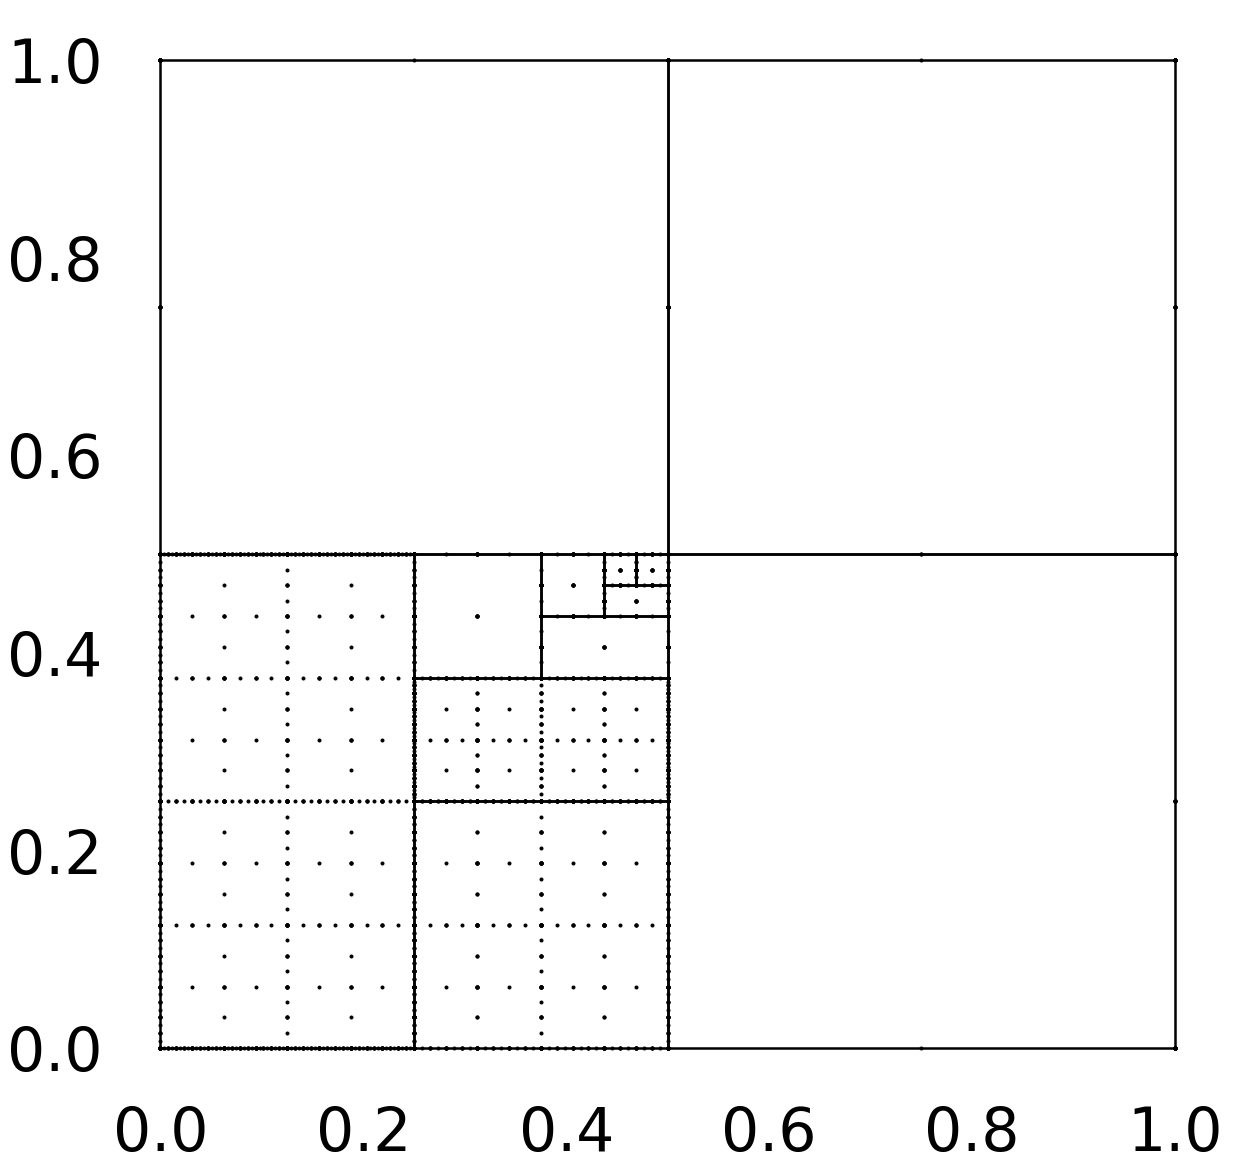

max surplus error: 2.5253848625304636e-06 total surplus error: 0.001007253322271403
combiintegral: 0.12238001809393936
Current error: 0.015921607160226746
Finished refinement
Refined  1  times
Refinement Graph:


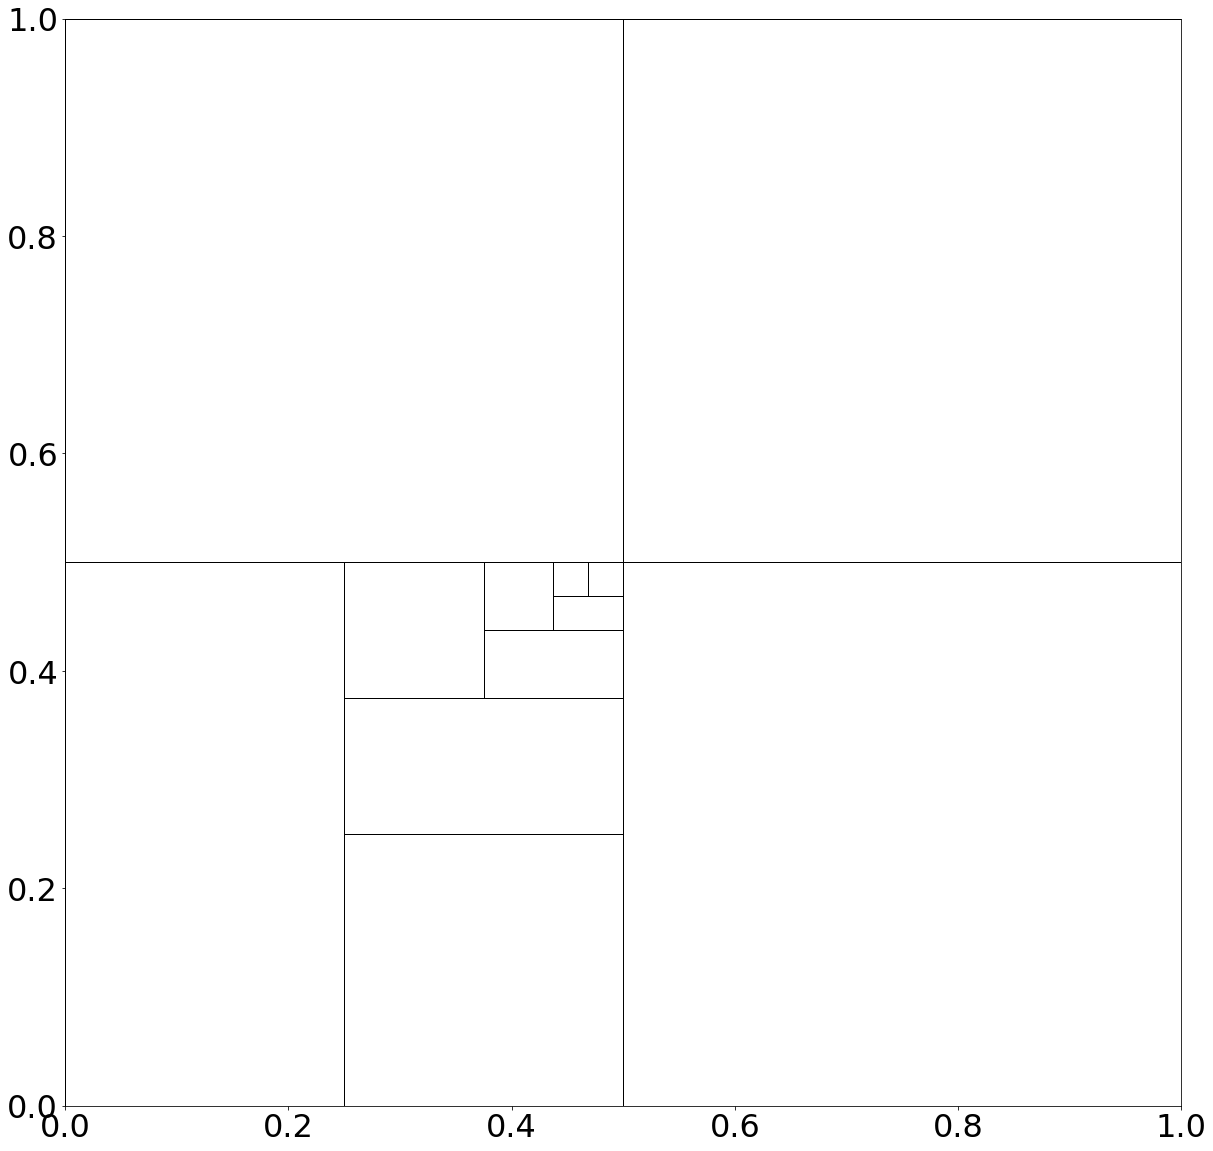

Combi Scheme:


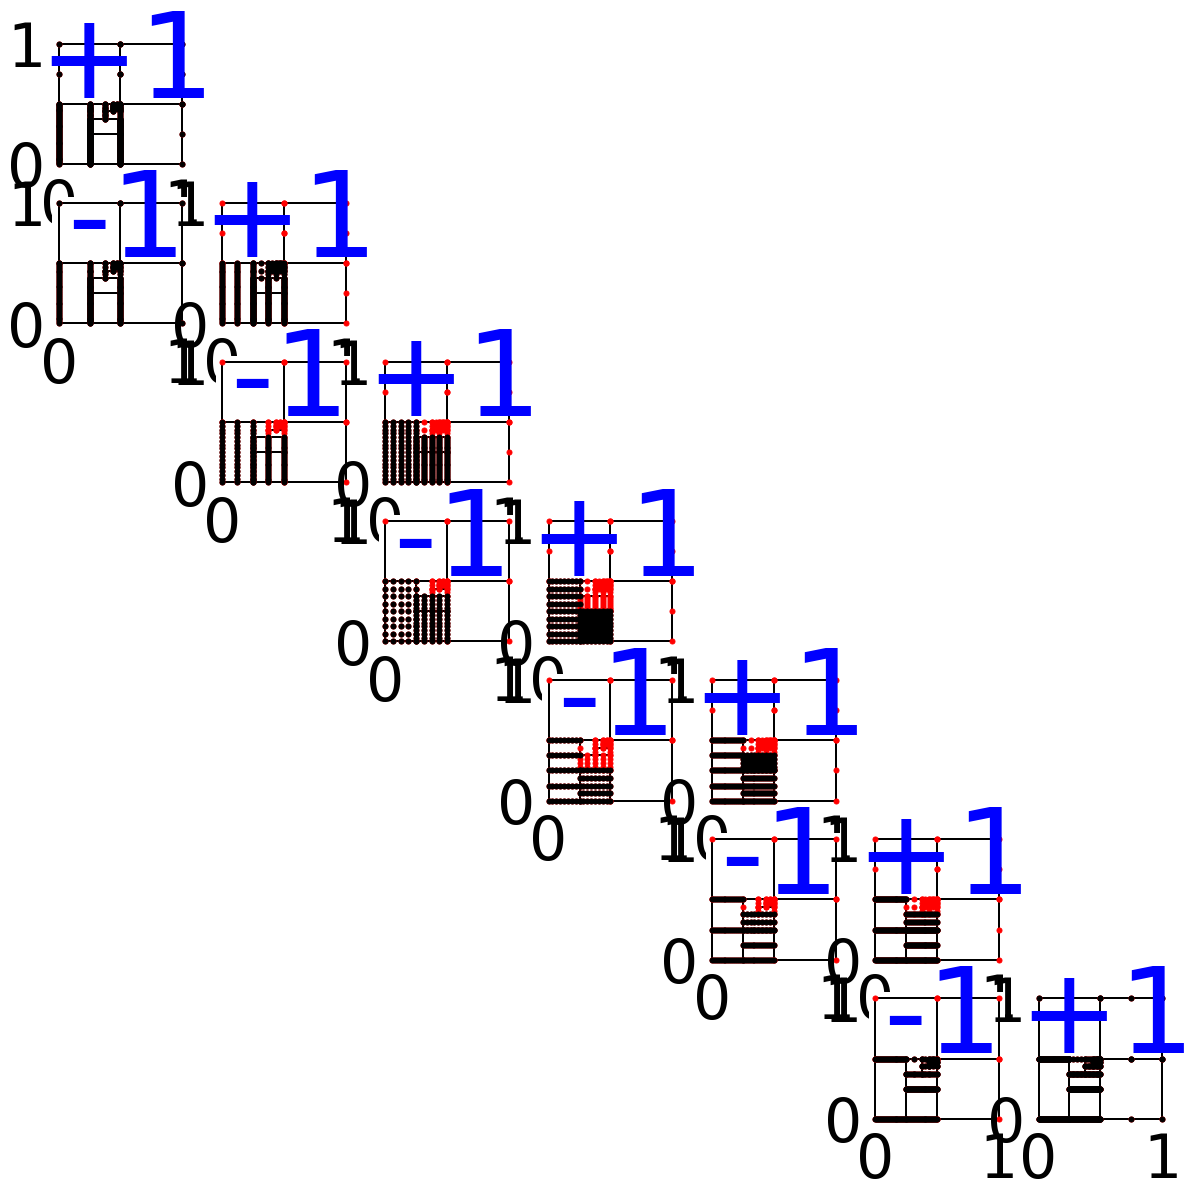

Resulting Sparse Grid:


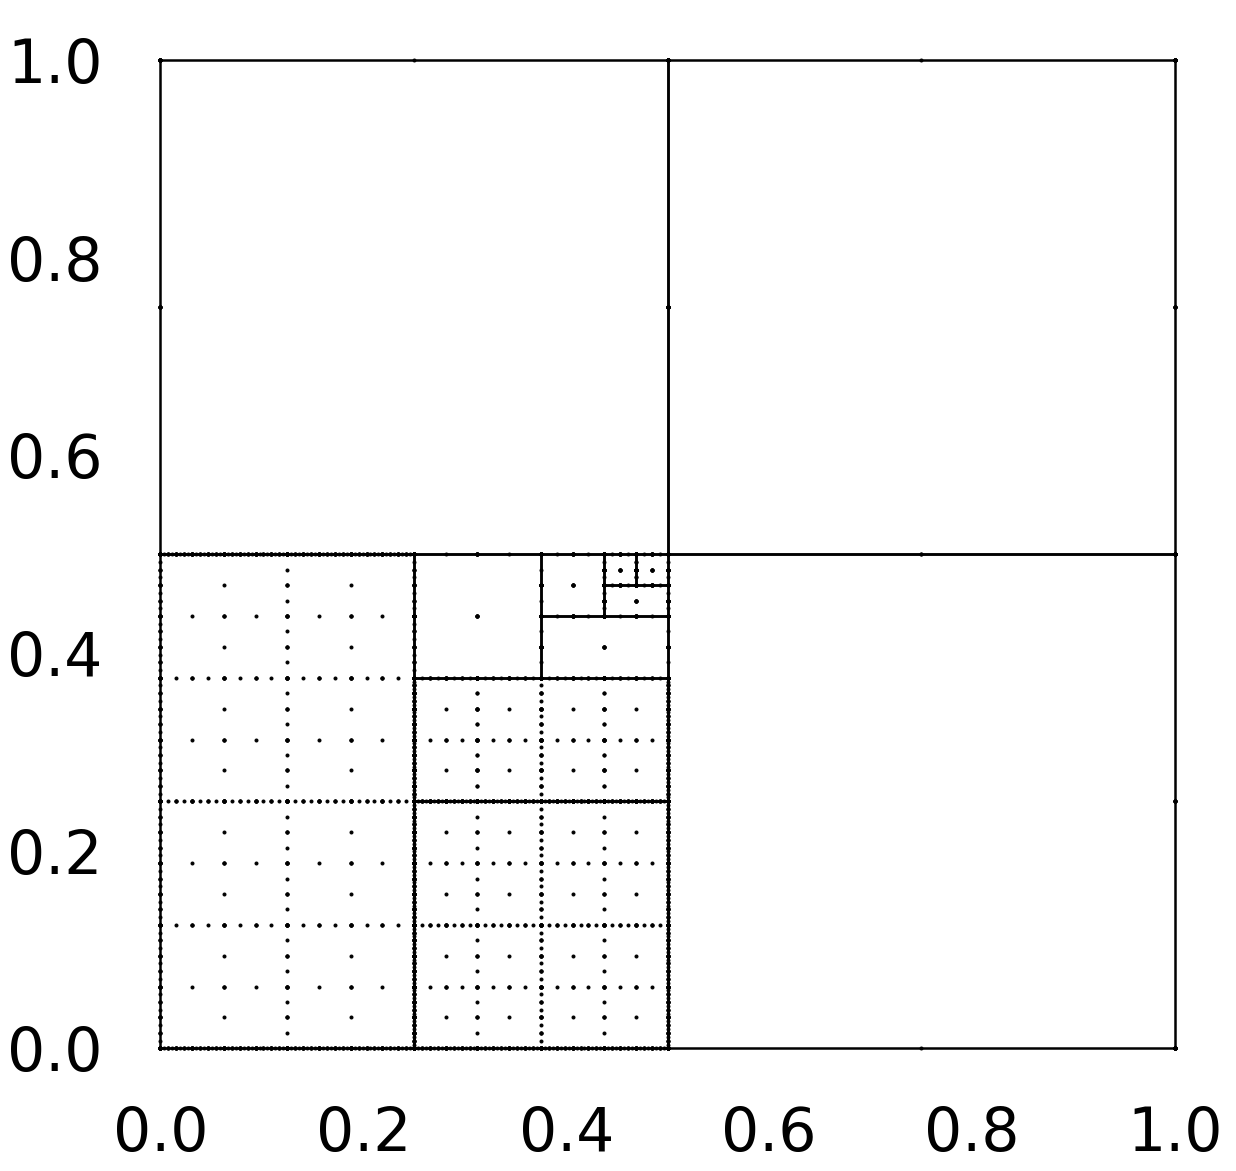

max surplus error: 2.052712544959545e-06 total surplus error: 0.0007837016033984325
combiintegral: 0.12260345949573437
Current error: 0.014124877113957995
Split in dimension 1 , maxTwinError = [5.48673331e-05]
Finished refinement
Refined  2  times
Refinement Graph:


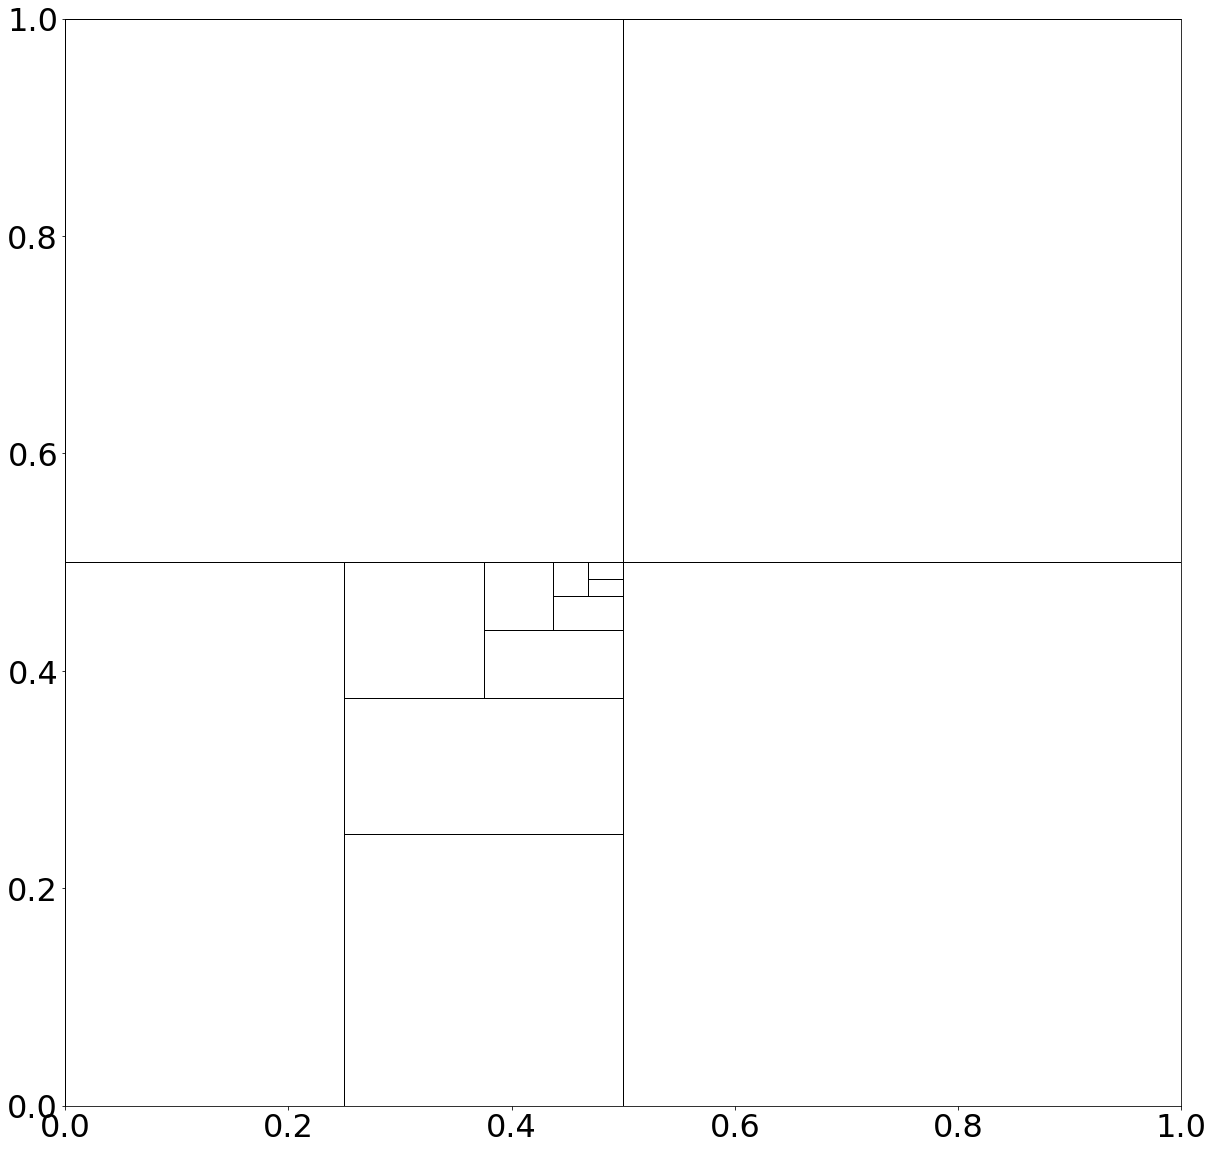

Combi Scheme:


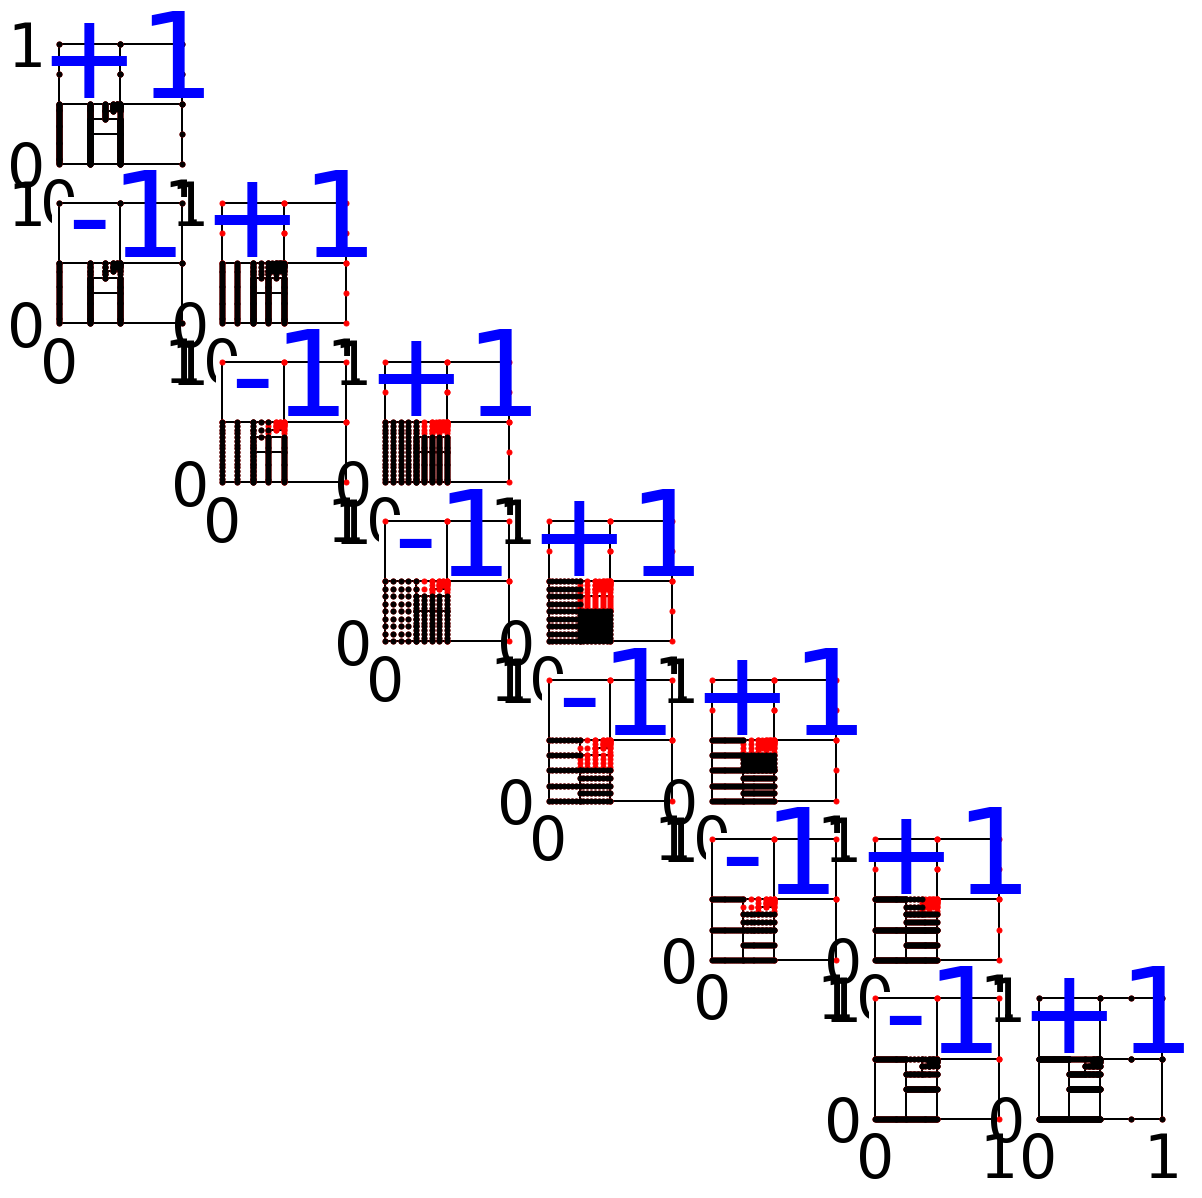

Resulting Sparse Grid:


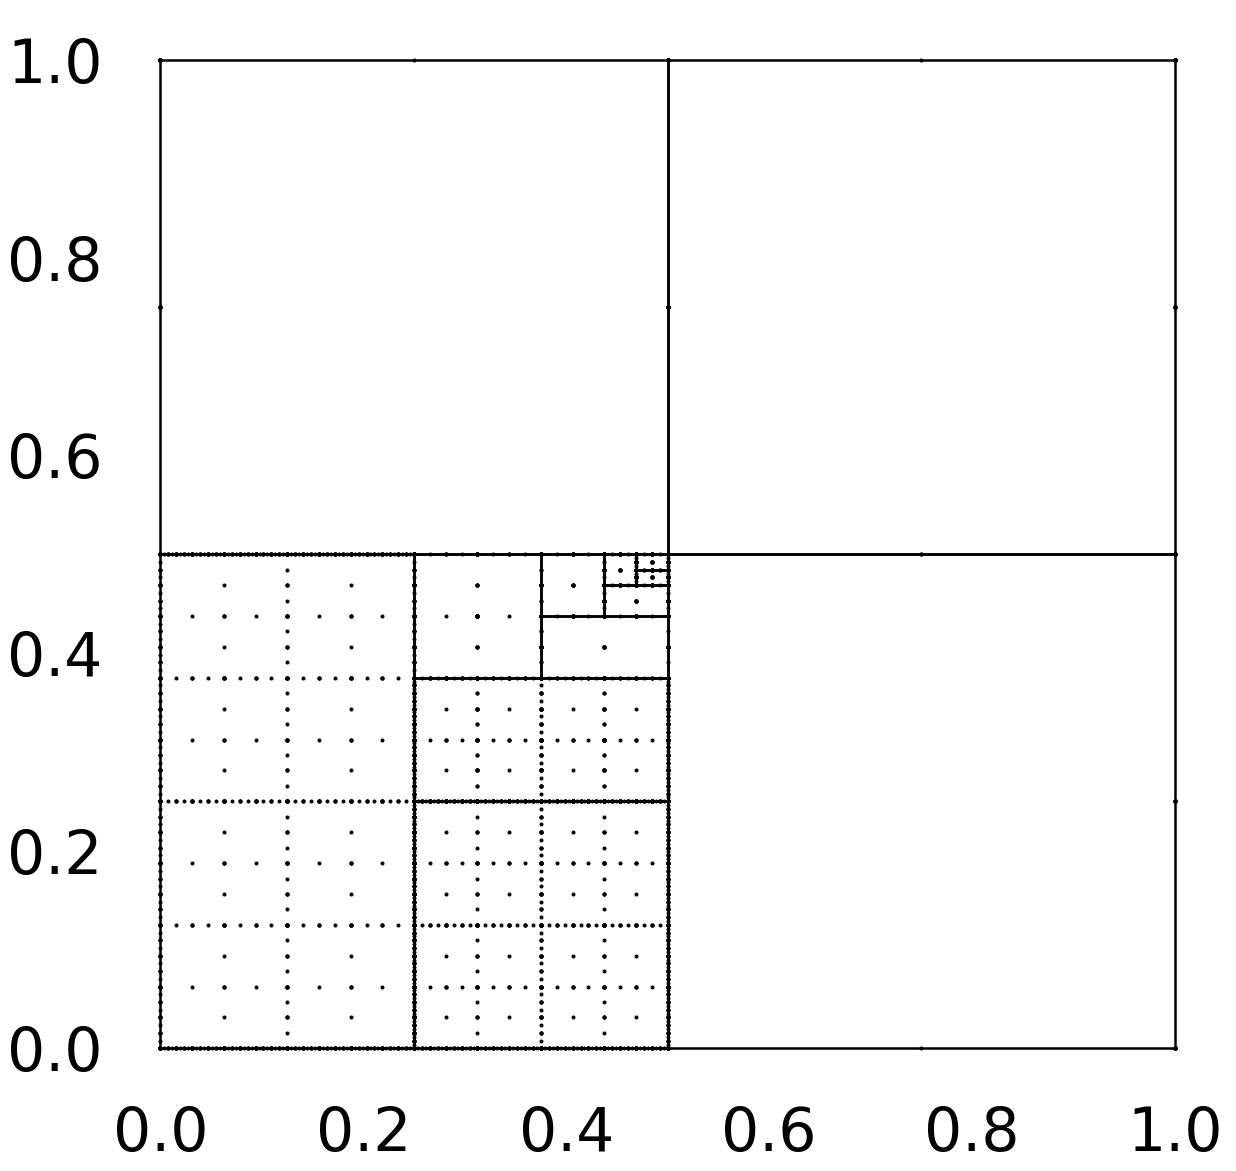

max surplus error: 7.060999707423601e-06 total surplus error: 0.0009932667986480522
combiintegral: 0.12288534622087363
Current error: 0.011858178352523095
Finished refinement
Refined  1  times
Refinement Graph:


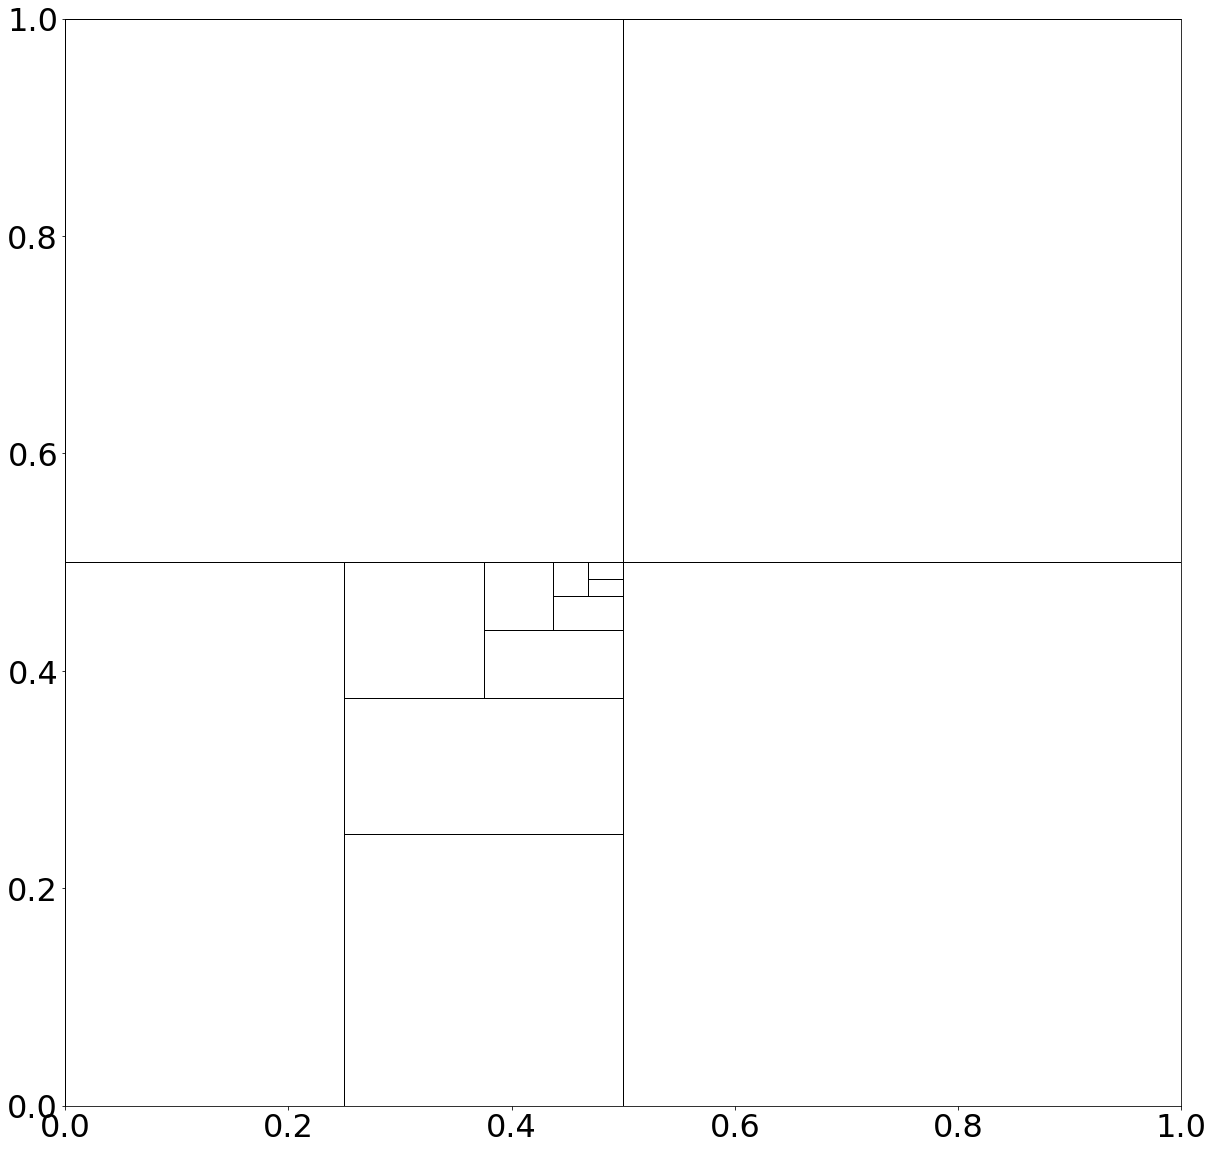

Combi Scheme:


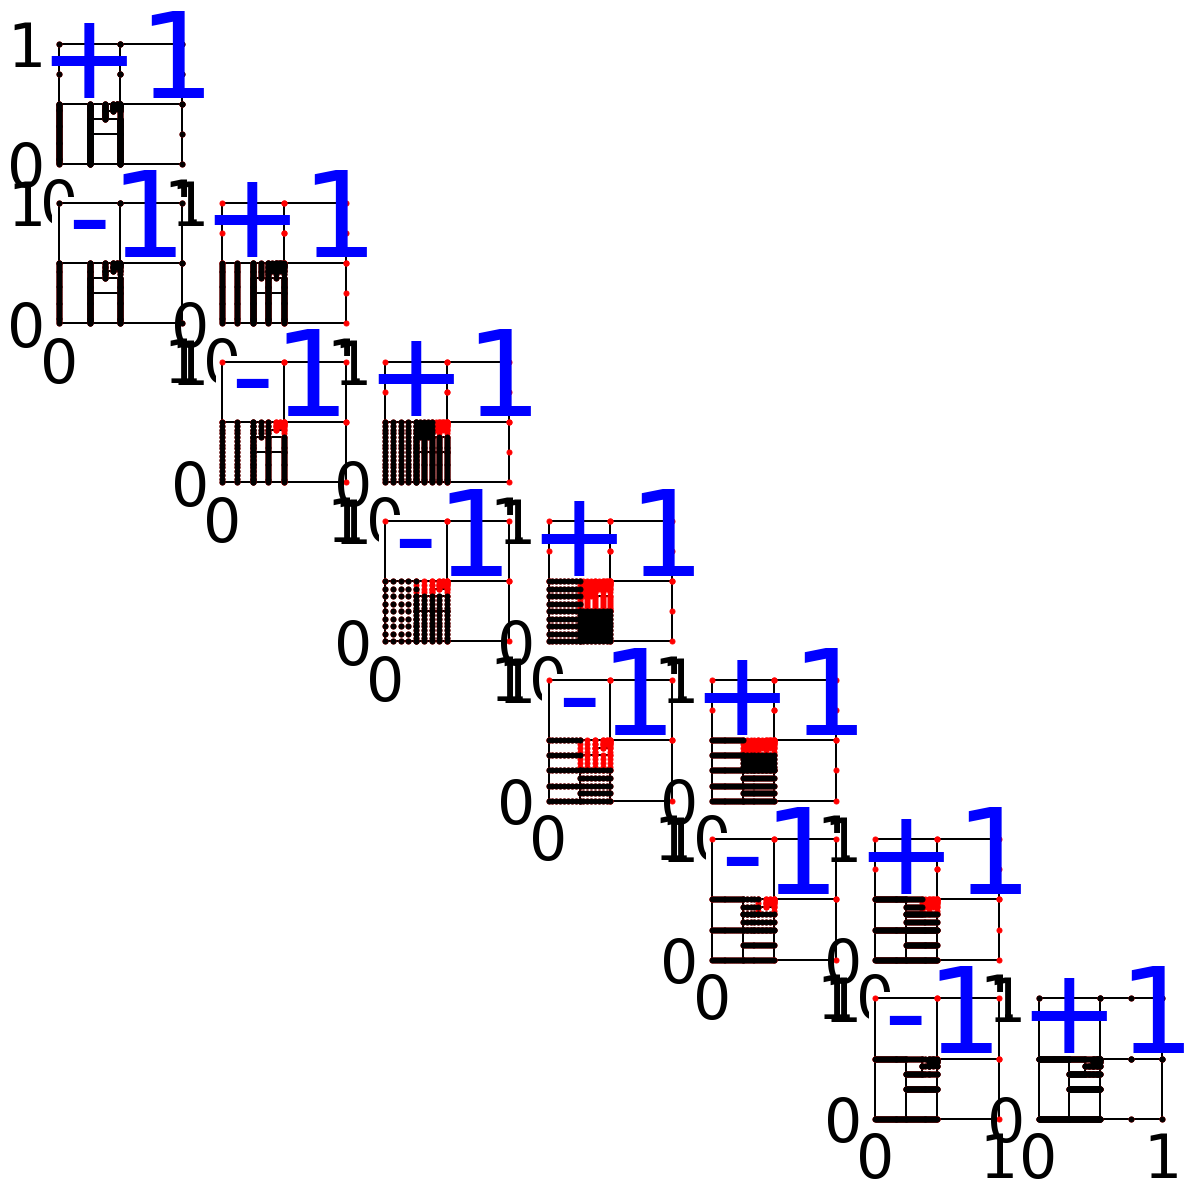

Resulting Sparse Grid:


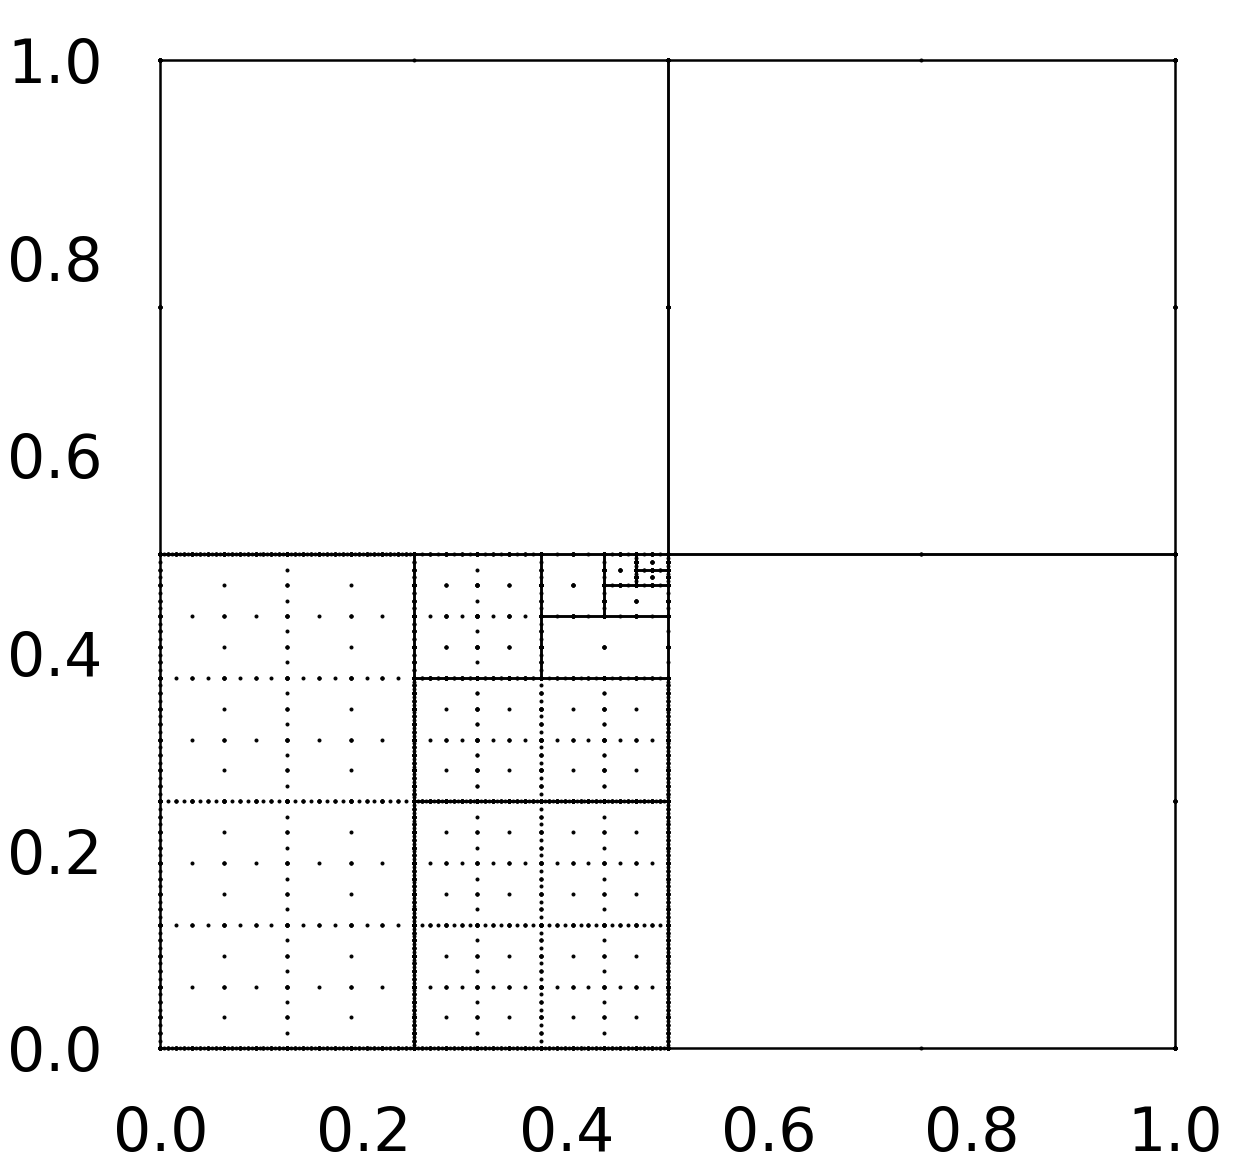

max surplus error: 1.616006300563864e-06 total surplus error: 0.0008629063198190521
combiintegral: 0.12301624273121933
Current error: 0.010805617407234985
Finished refinement
Refined  1  times
Refinement Graph:


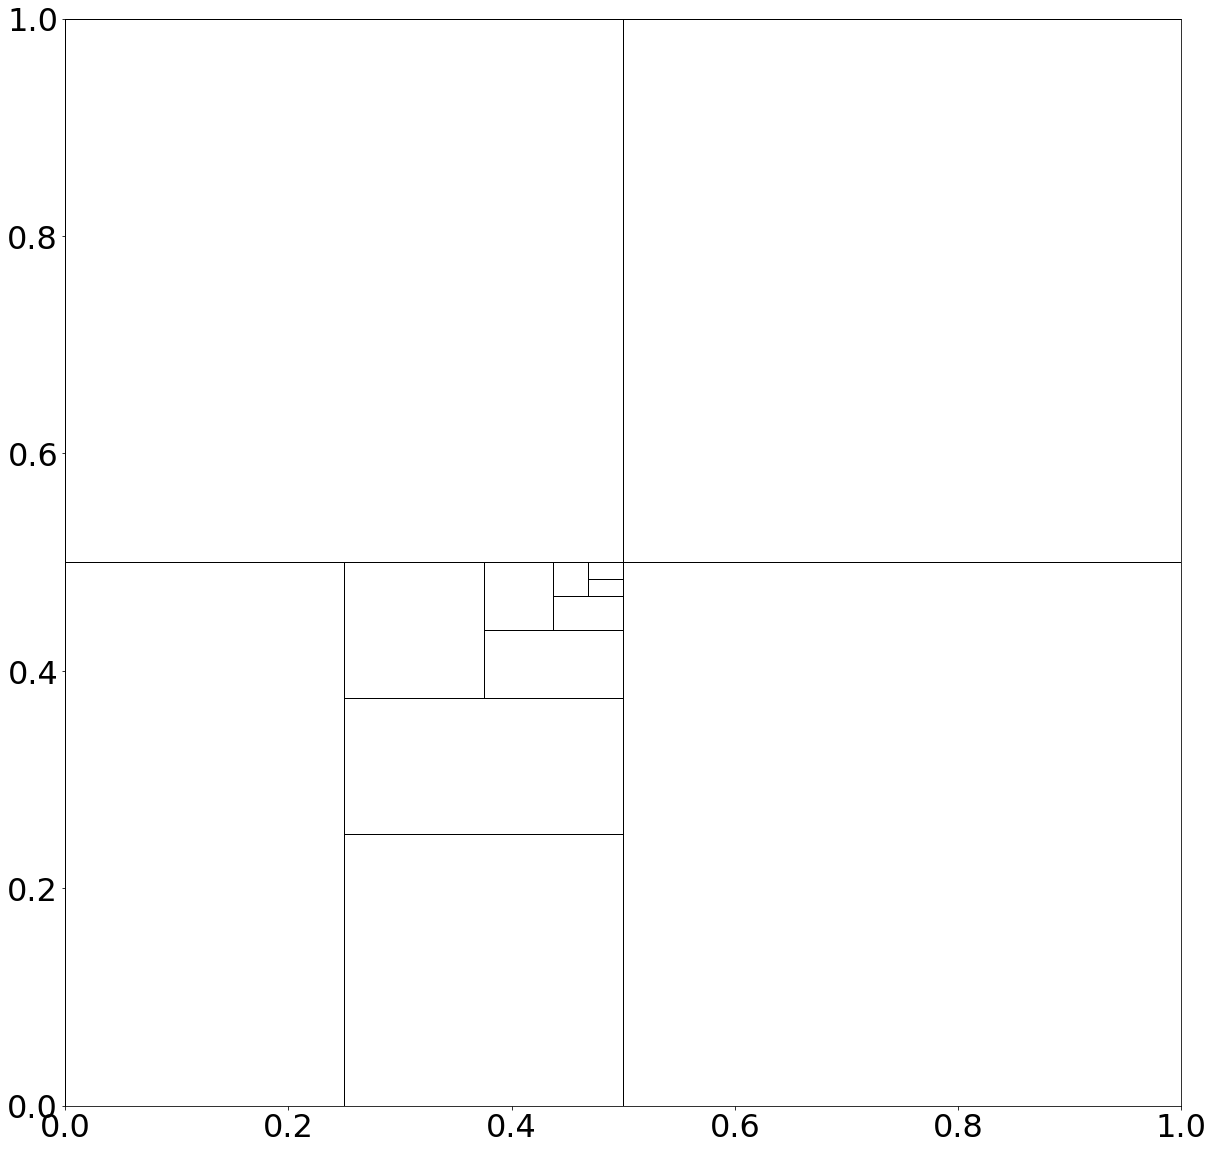

Combi Scheme:


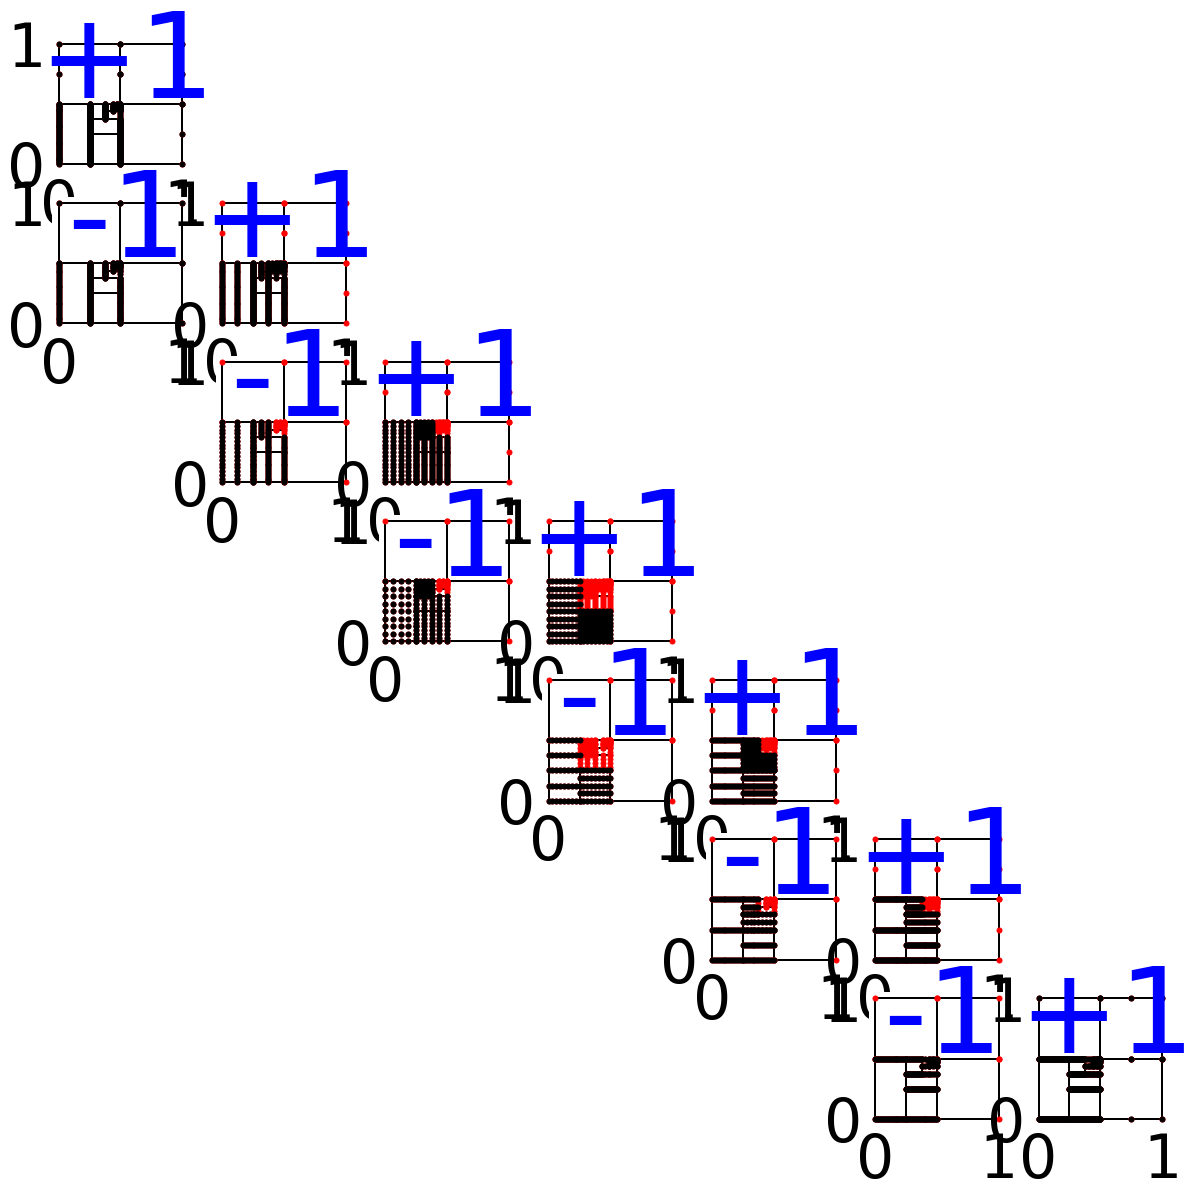

Resulting Sparse Grid:


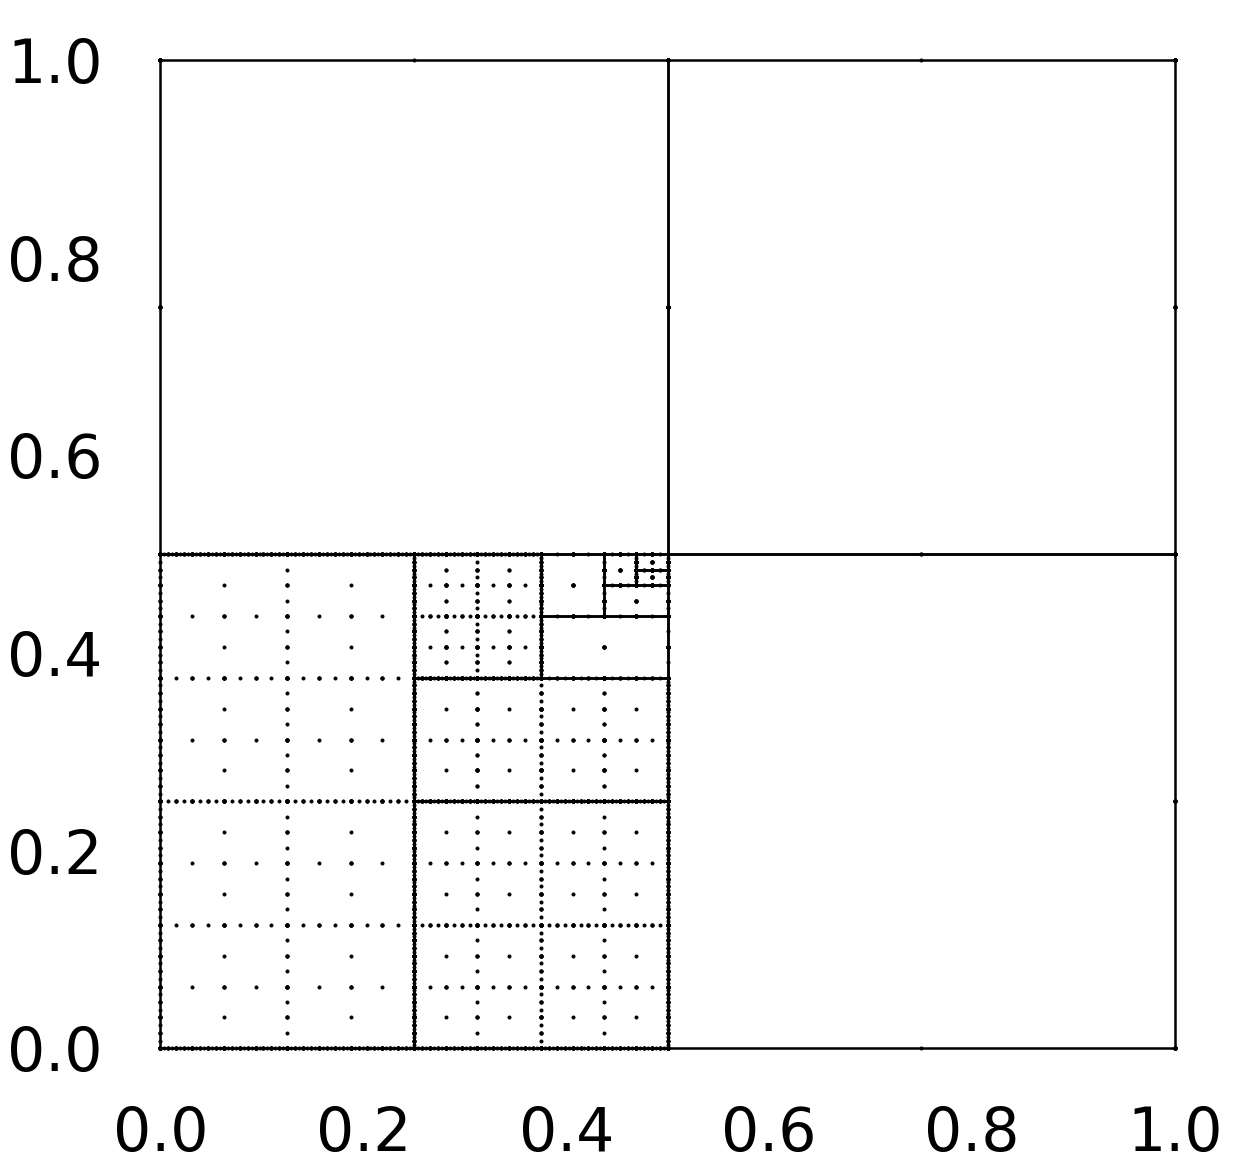

max surplus error: 1.0136195894682084e-06 total surplus error: 0.000797524791504837
combiintegral: 0.12308175771325079
Current error: 0.010278800372652136
Split in dimension 0 , maxTwinError = [2.40432215e-05]
Finished refinement
Refined  2  times
Refinement Graph:


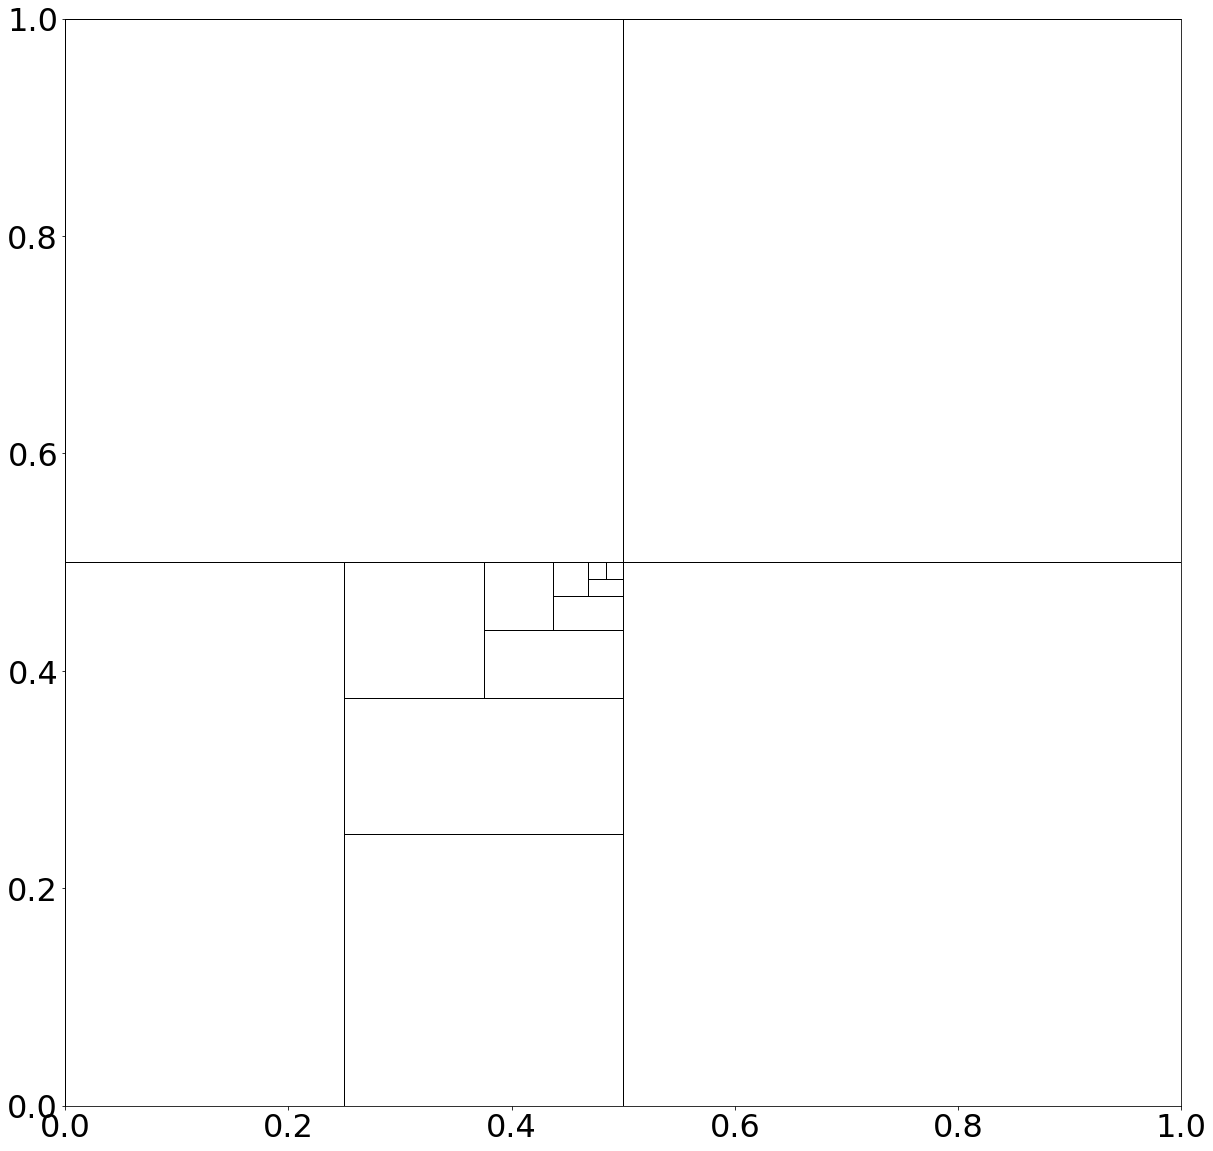

Combi Scheme:


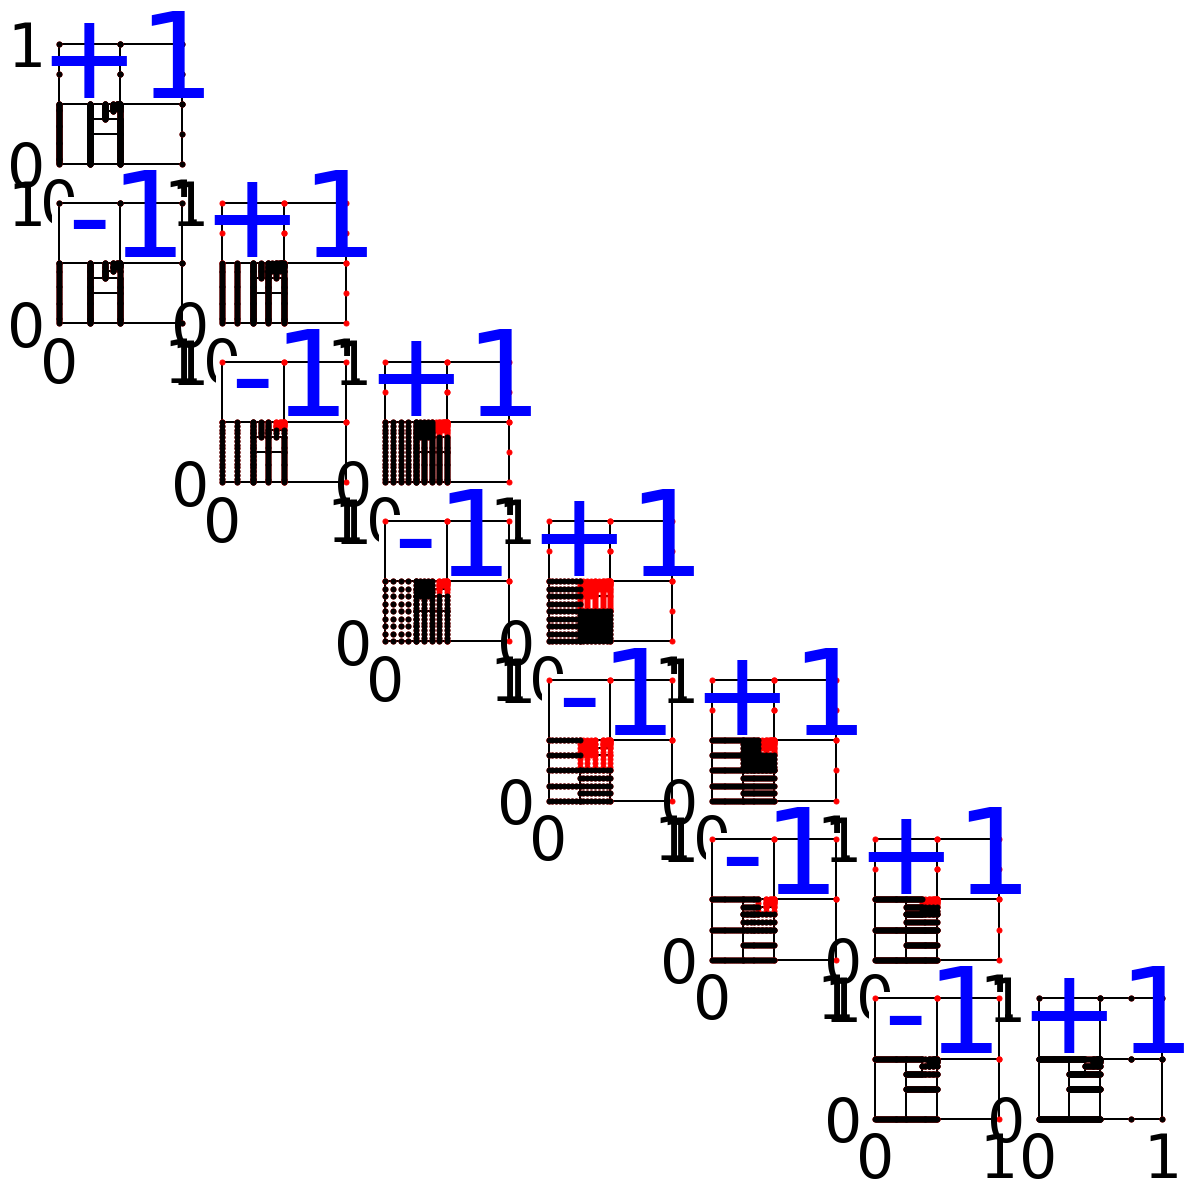

Resulting Sparse Grid:


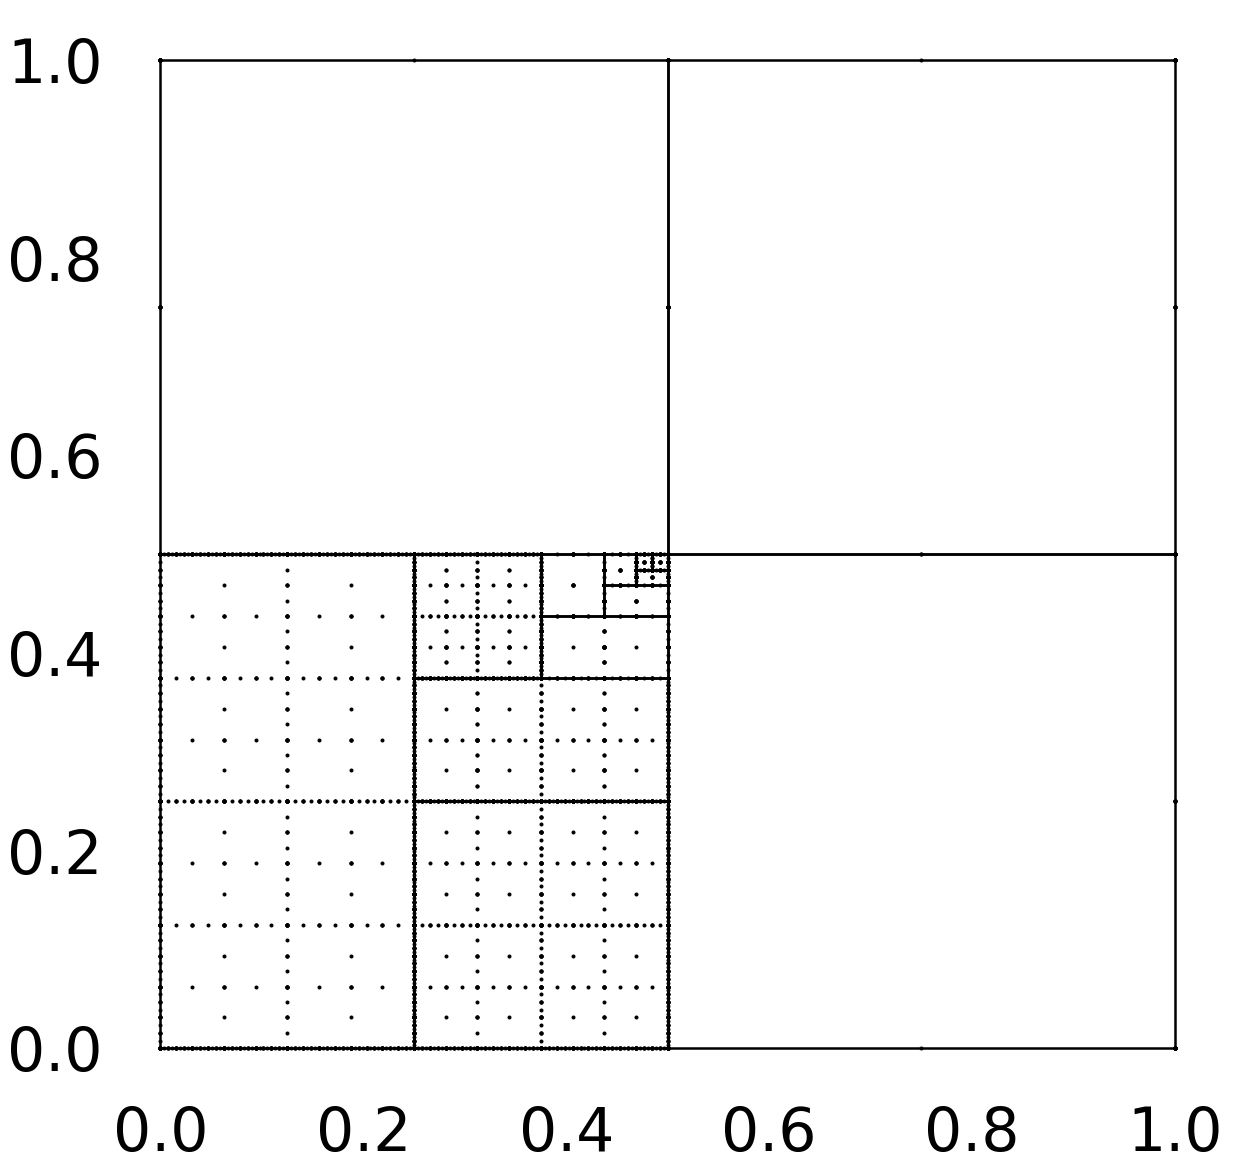

max surplus error: 3.5427579172090815e-06 total surplus error: 0.0009028418017135094
combiintegral: 0.12322315917039701
Current error: 0.009141767376082017
Number of refinements 28
Number of distinct points used during the refinement 1110
Time used (s): 149.47866702079773
Final error: 0.009141767376082017
#Points: 1110


In [1]:
%matplotlib inline
import numpy as np
from spatiallyAdaptiveExtendSplit import *
from Function import *
from ErrorCalculator import *

# dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator2=ErrorCalculatorExtendSplit()

# define equidistant grid
grid=TrapezoidalGrid(a=a, b=b, dim=dim)

# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = reference_solution)

# define Extend-Split refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b,2,grid,version=0, operation=operation, automatic_extend_split=True)

# performing the spatially adaptive refinement with the Extend-Split method
adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(1,2,f,errorOperator2,10**-2, do_plot=True, reference_solution=reference_solution)

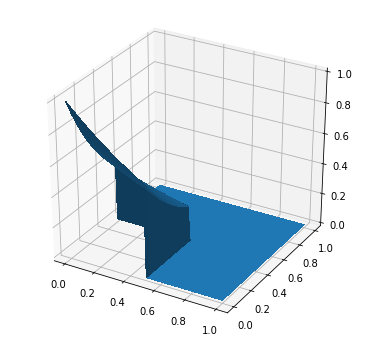

Reference solution: 0.12436002963217704
0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
max surplus error: 0.004963526896750302 total surplus error: 0.039708215174002415
combiintegral: 0.08658321517400241
Current error: 0.3037697447476341
Finished refinement
Refined  1  times
Refinement Graph:


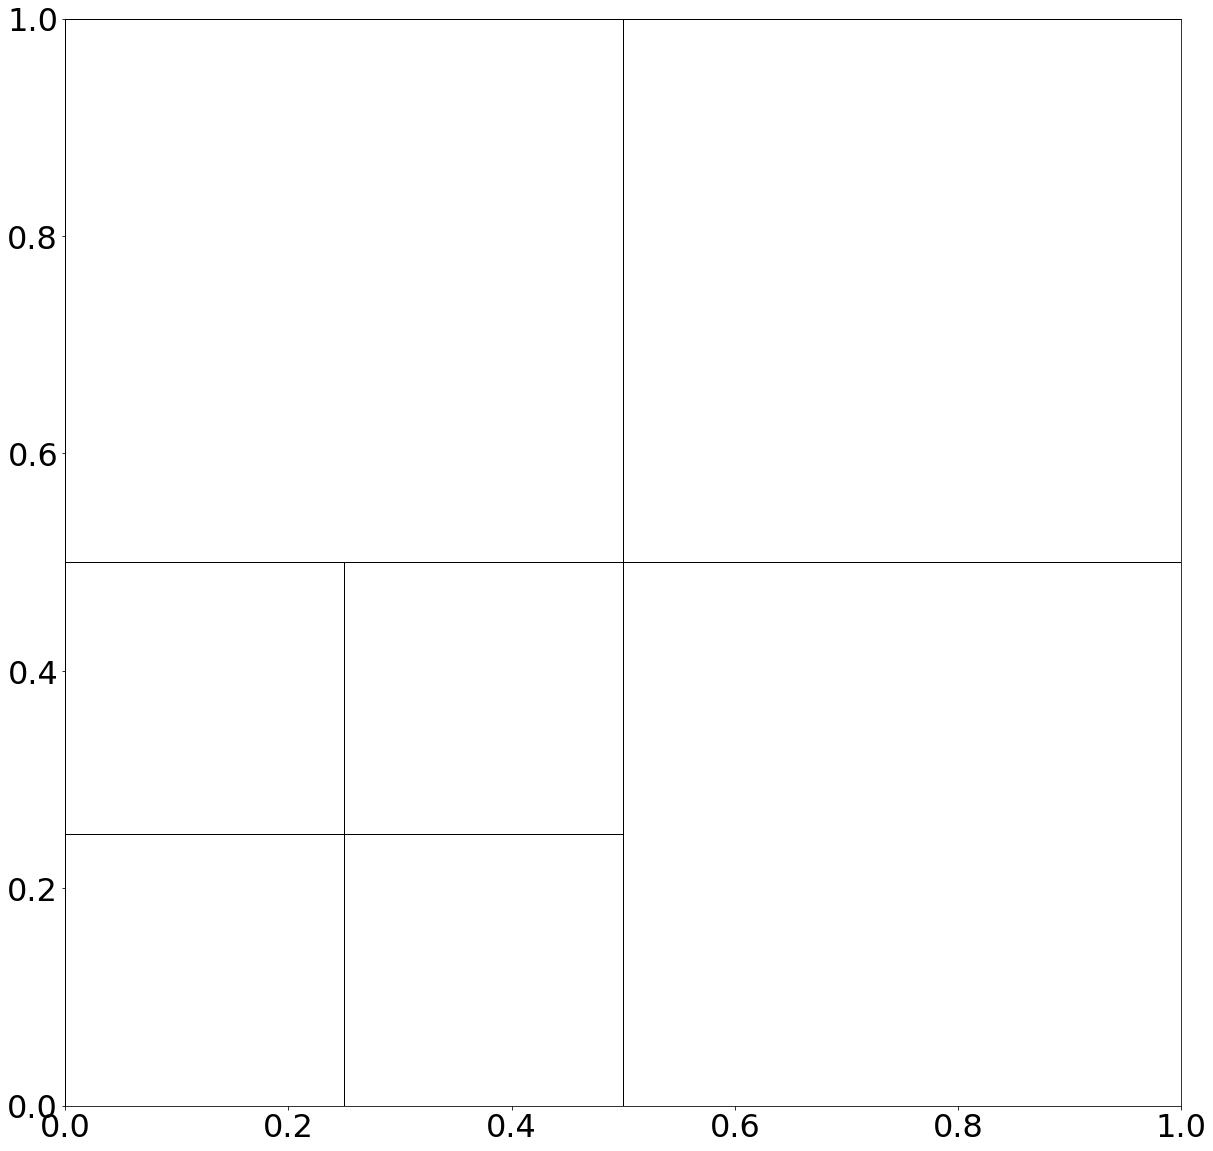

Combi Scheme:


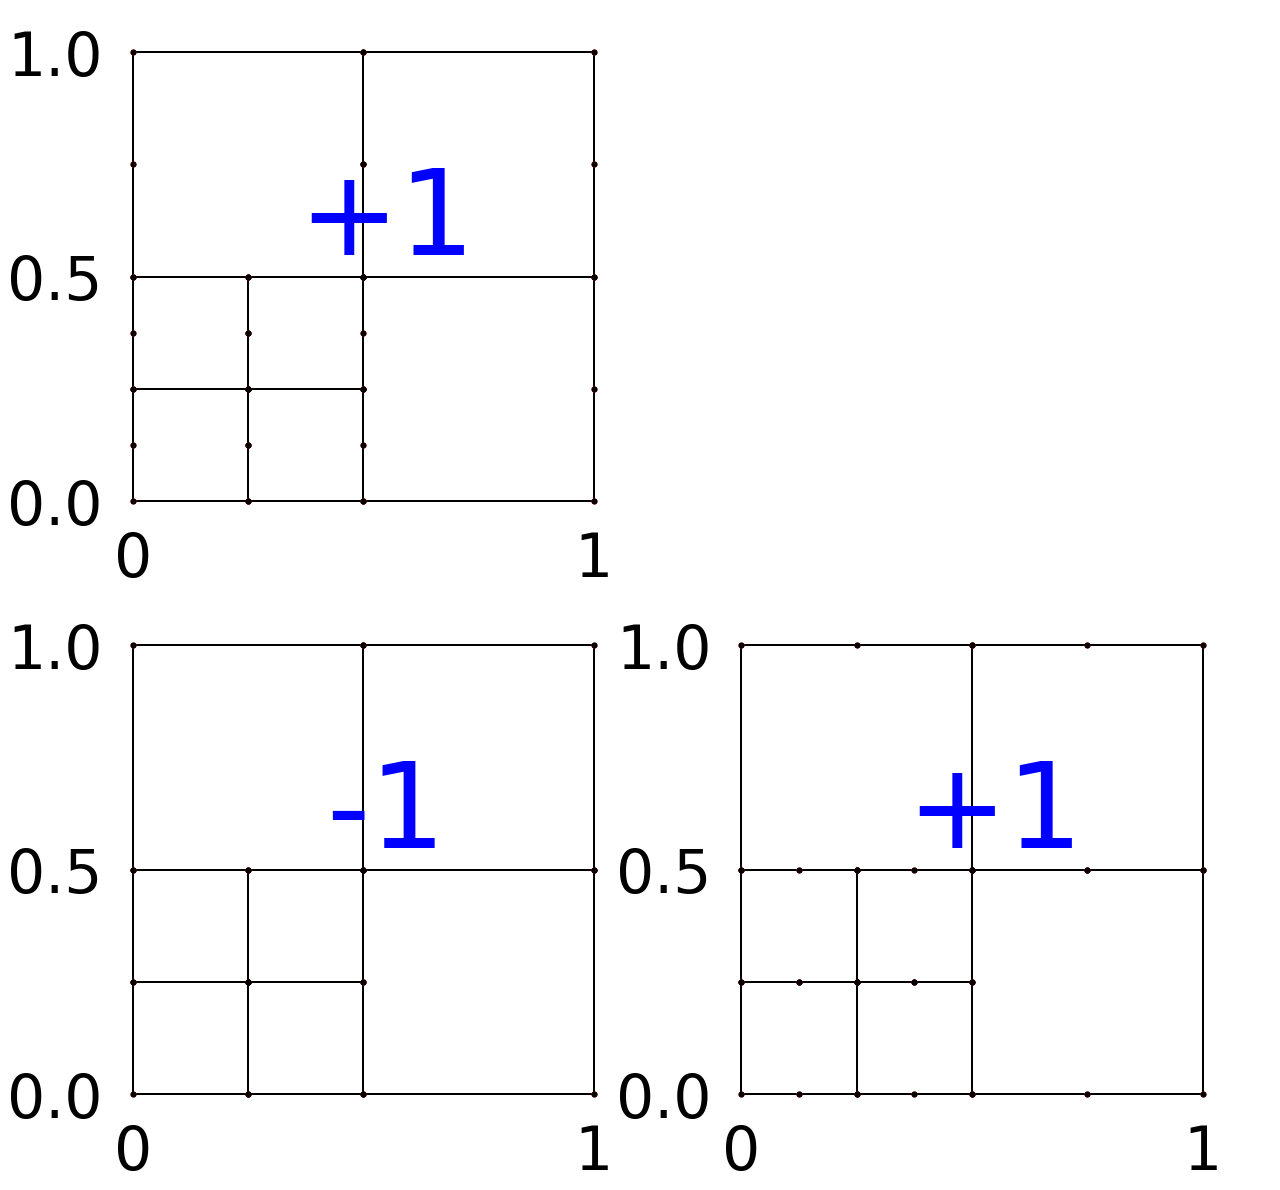

Resulting Sparse Grid:


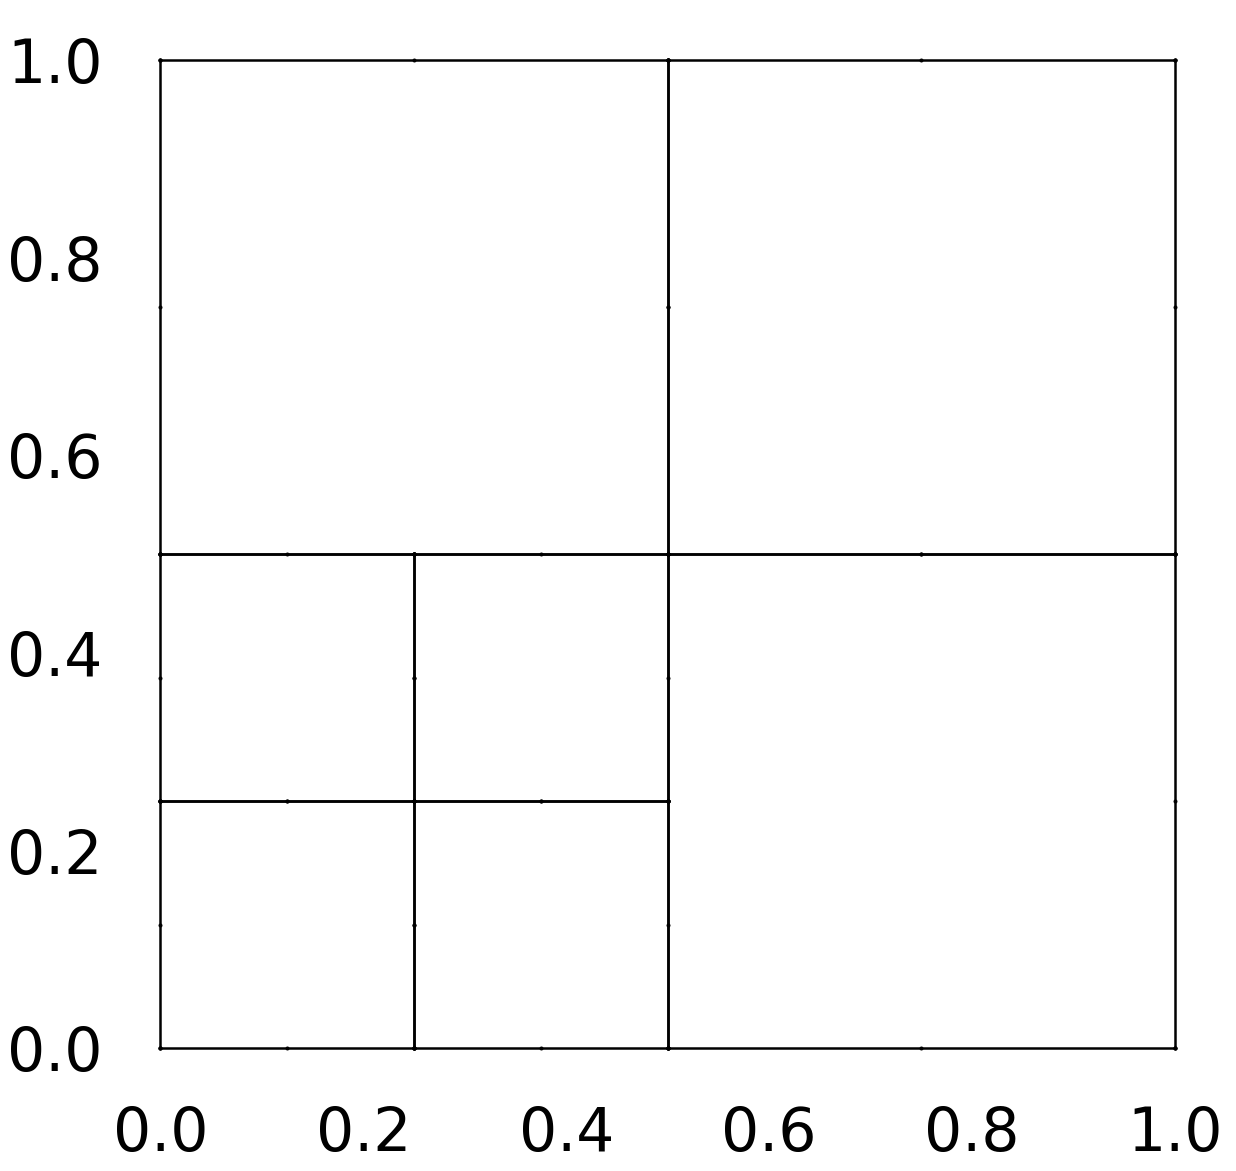

max surplus error: 0.0006681166786287726 total surplus error: 0.010664212887372645
combiintegral: 0.10428157211486151
Current error: 0.161454267715295
New scheme
0 [1, 3] 1.0
1 [2, 2] 1.0
2 [3, 1] 1.0
3 [1, 2] -1.0
4 [2, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


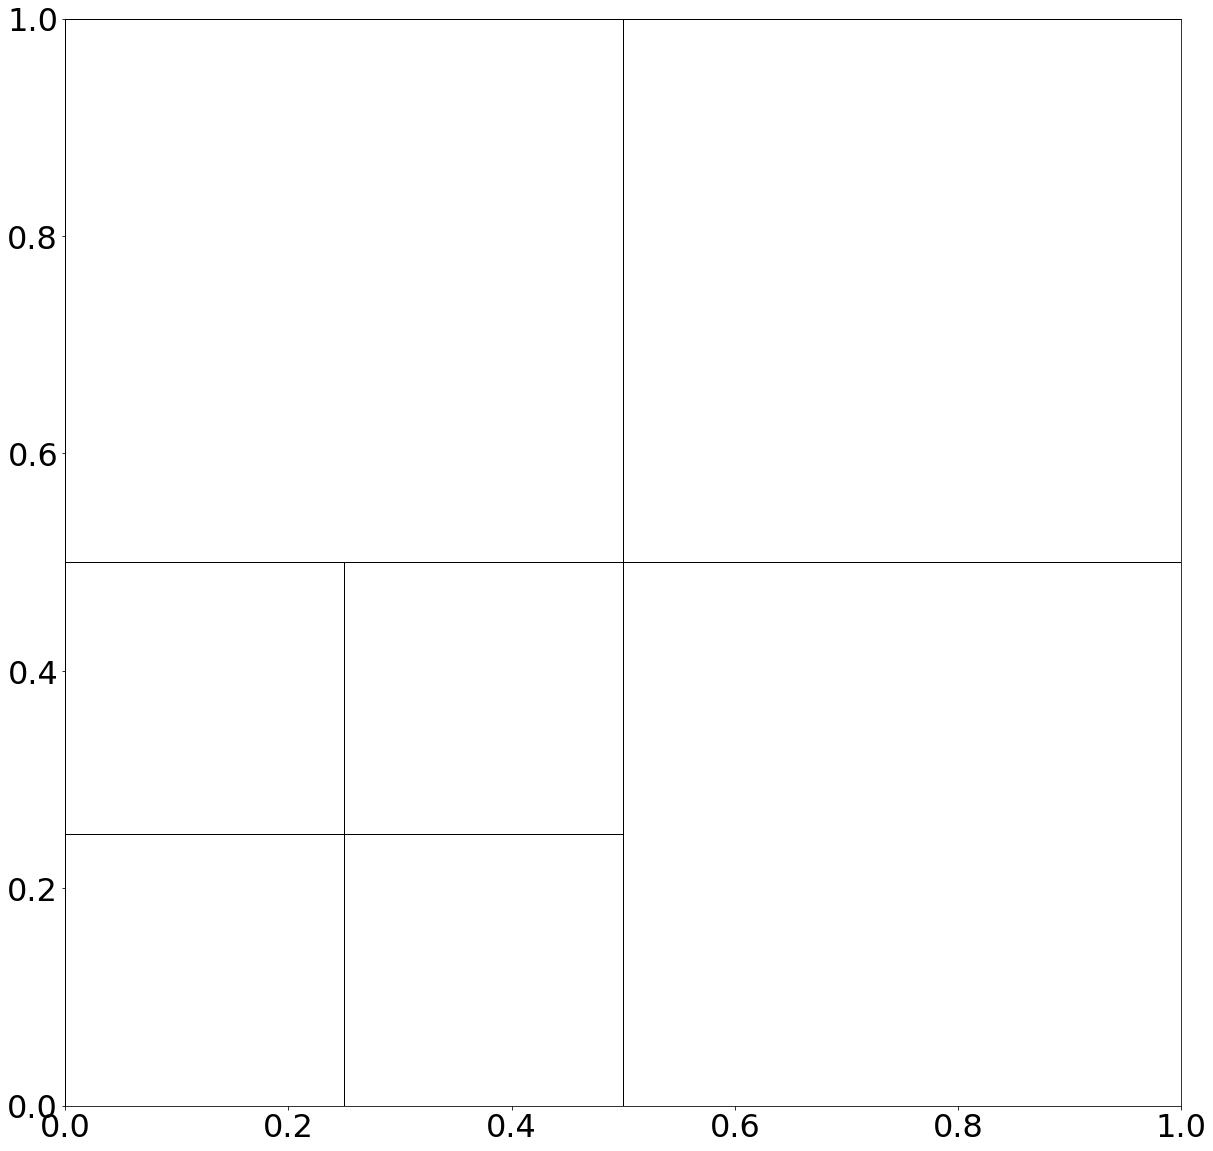

Combi Scheme:


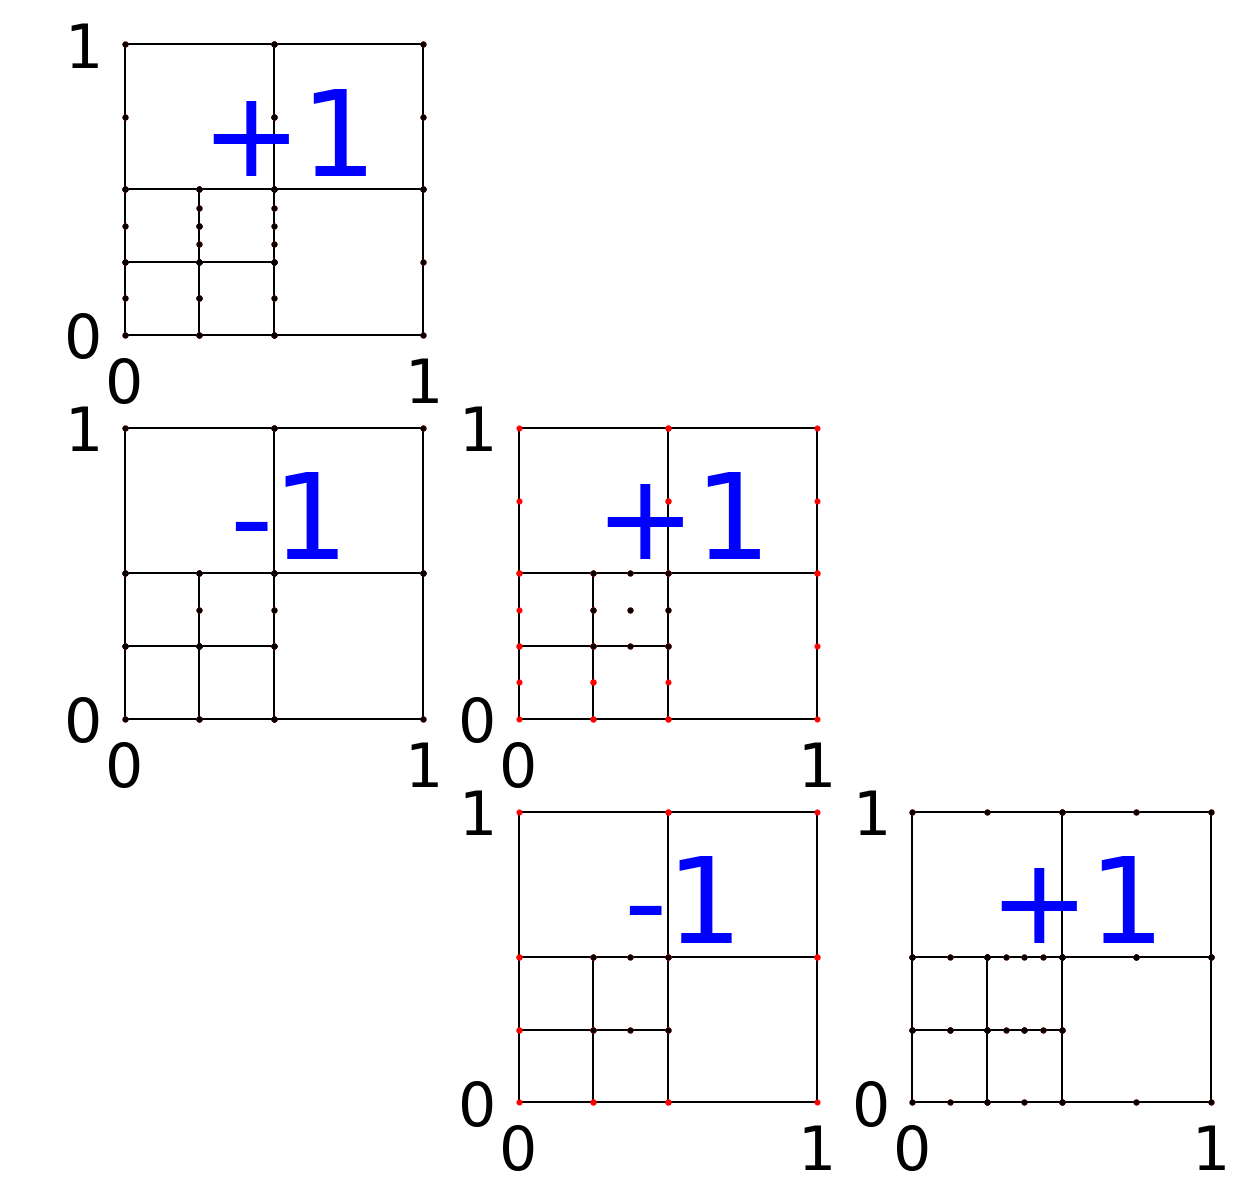

Resulting Sparse Grid:


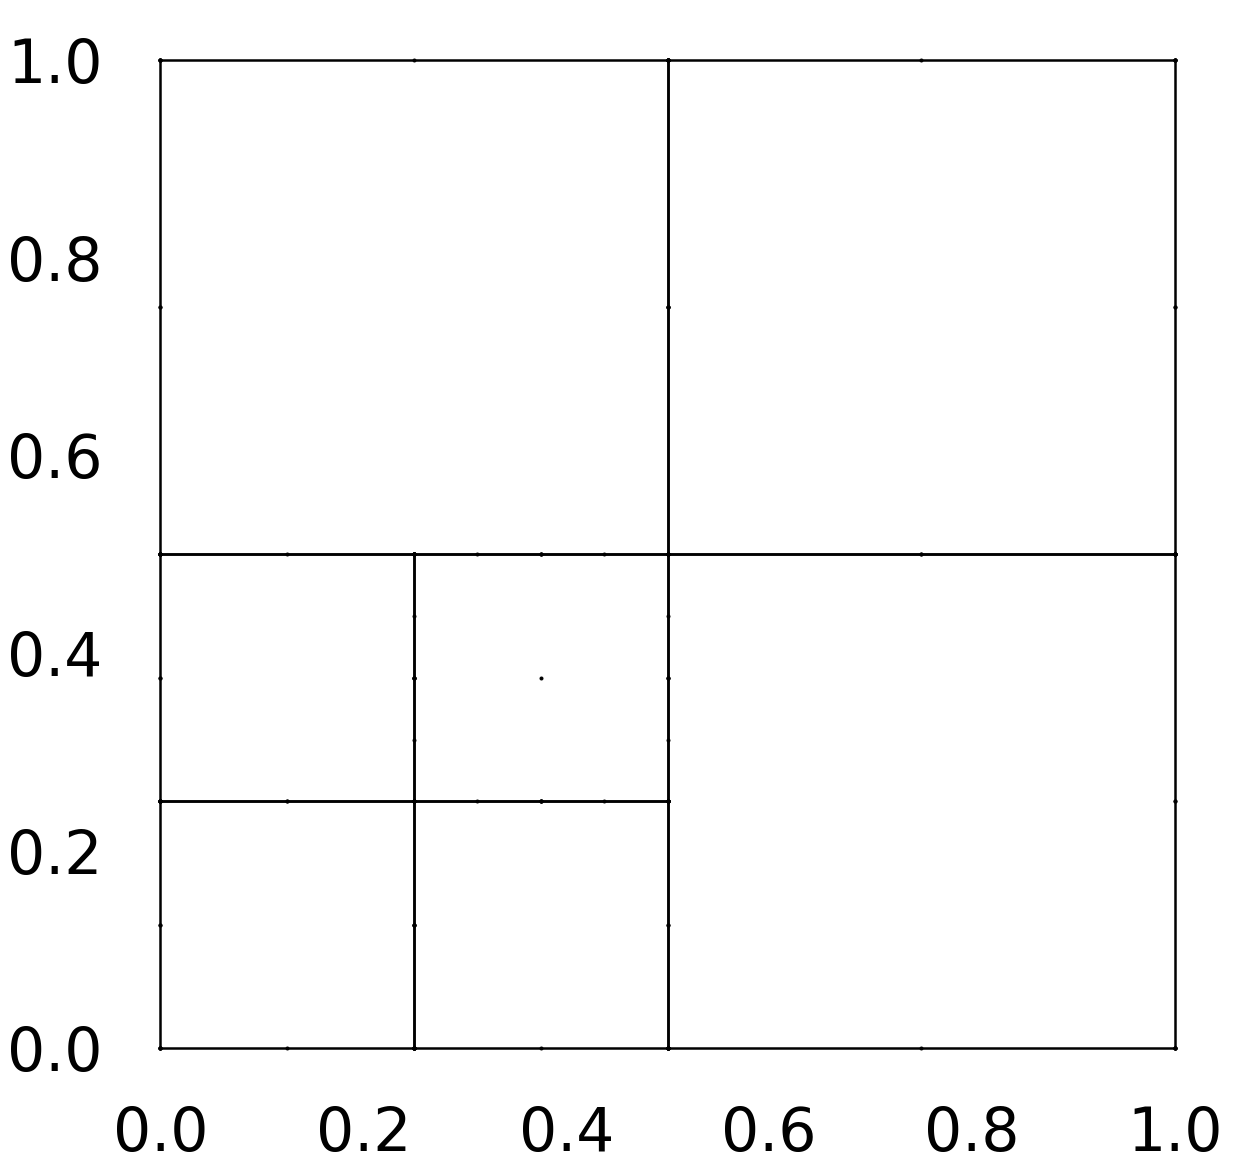

max surplus error: 0.0003172775449339464 total surplus error: 0.008604483836788
combiintegral: 0.10756677649330702
Current error: 0.1350373845080278
Finished refinement
Refined  2  times
Refinement Graph:


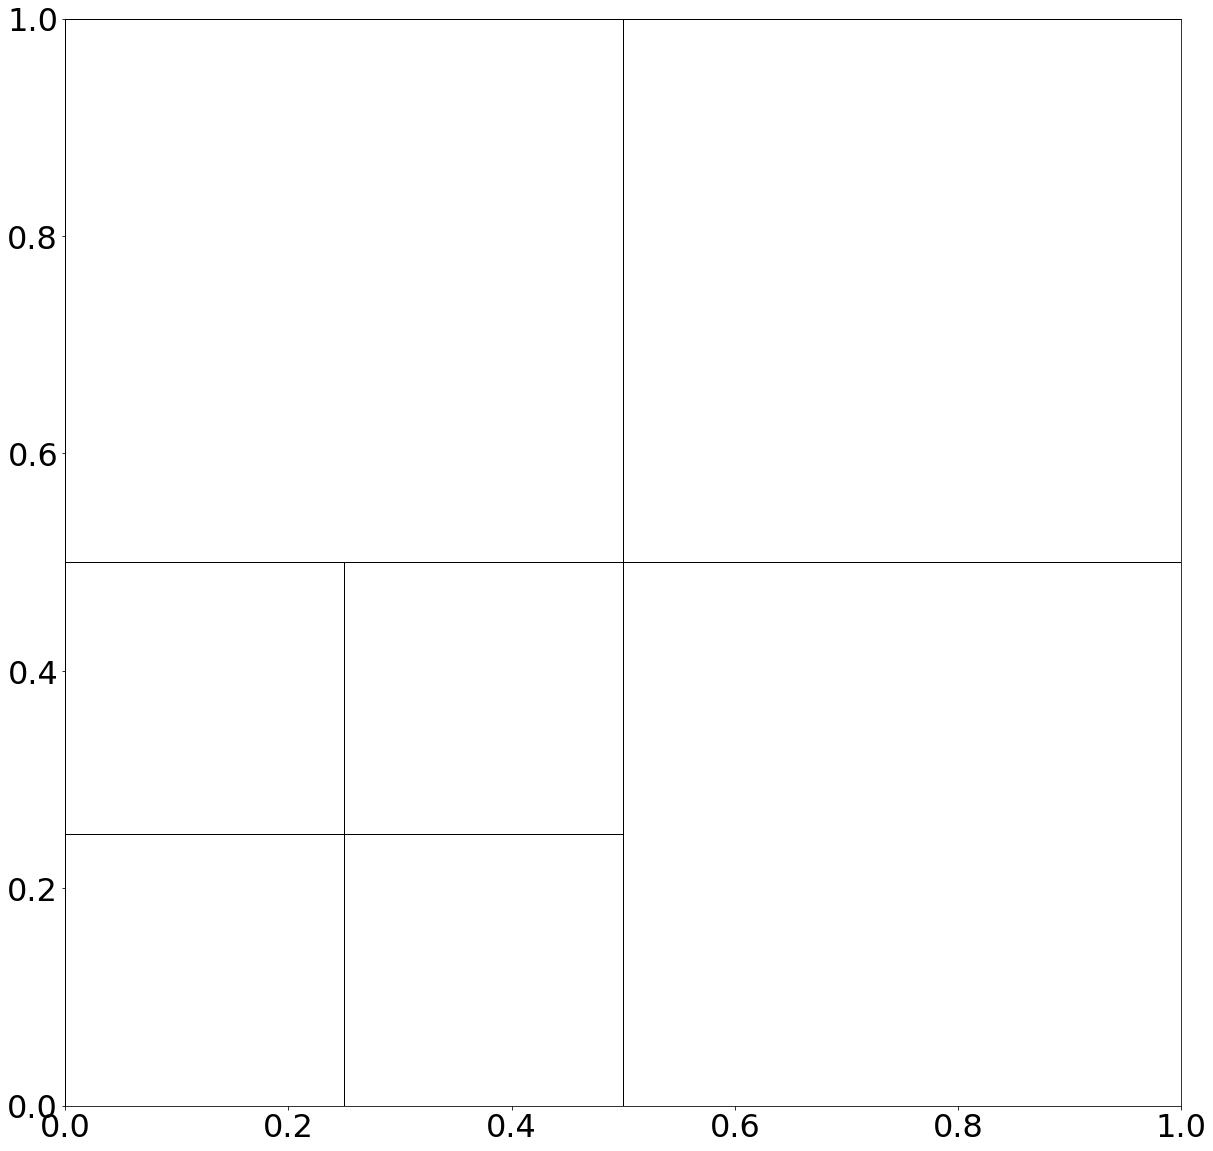

Combi Scheme:


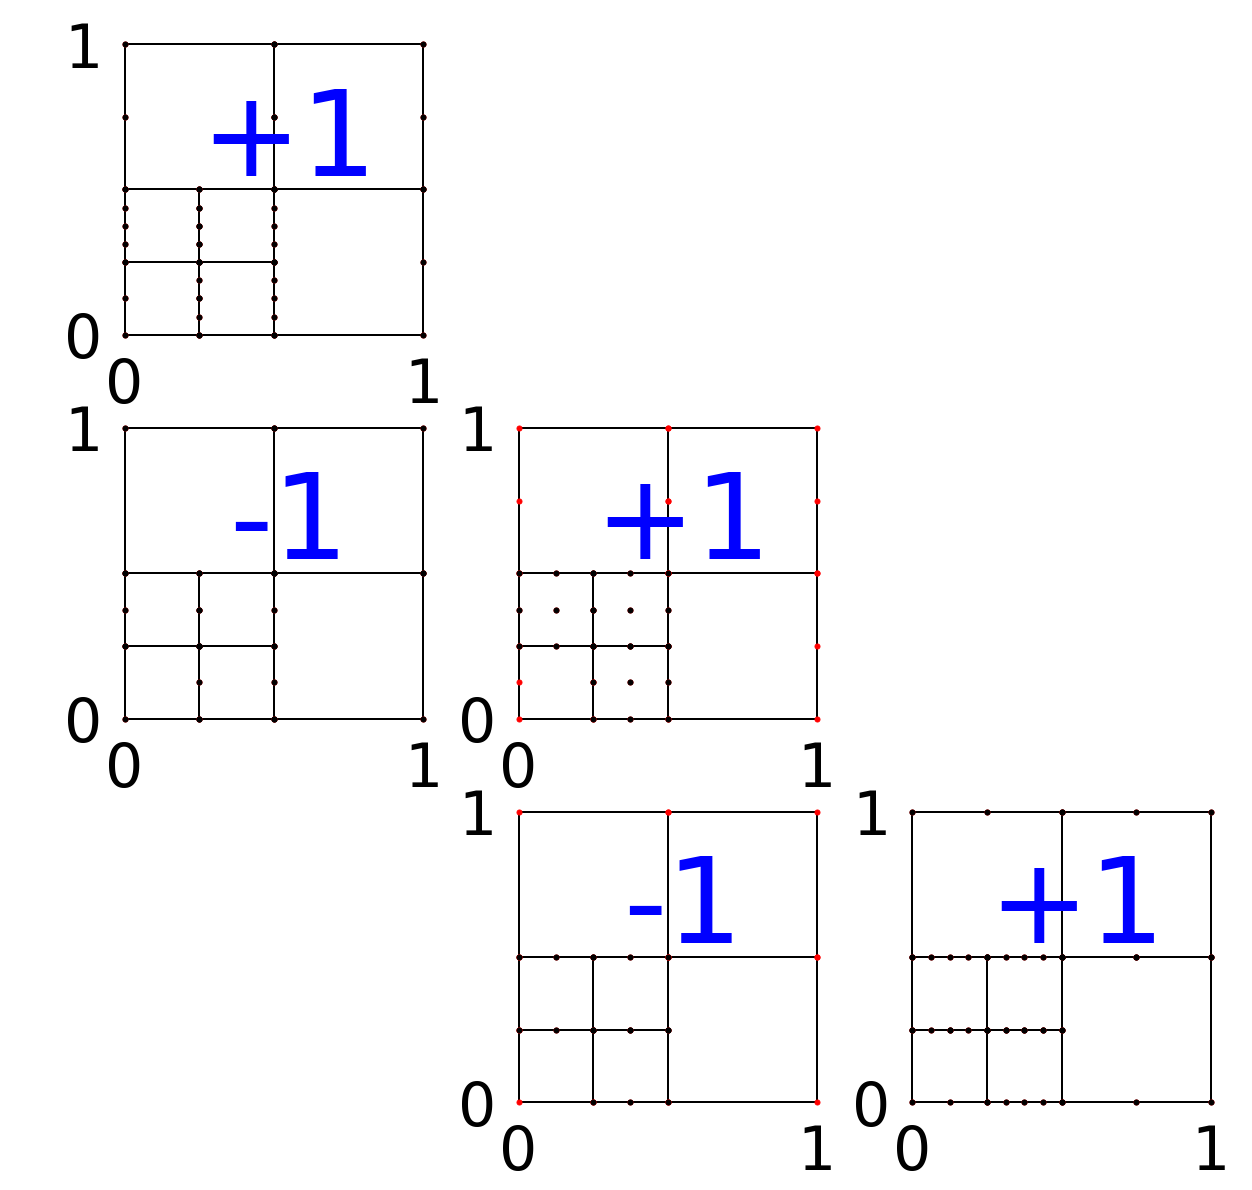

Resulting Sparse Grid:


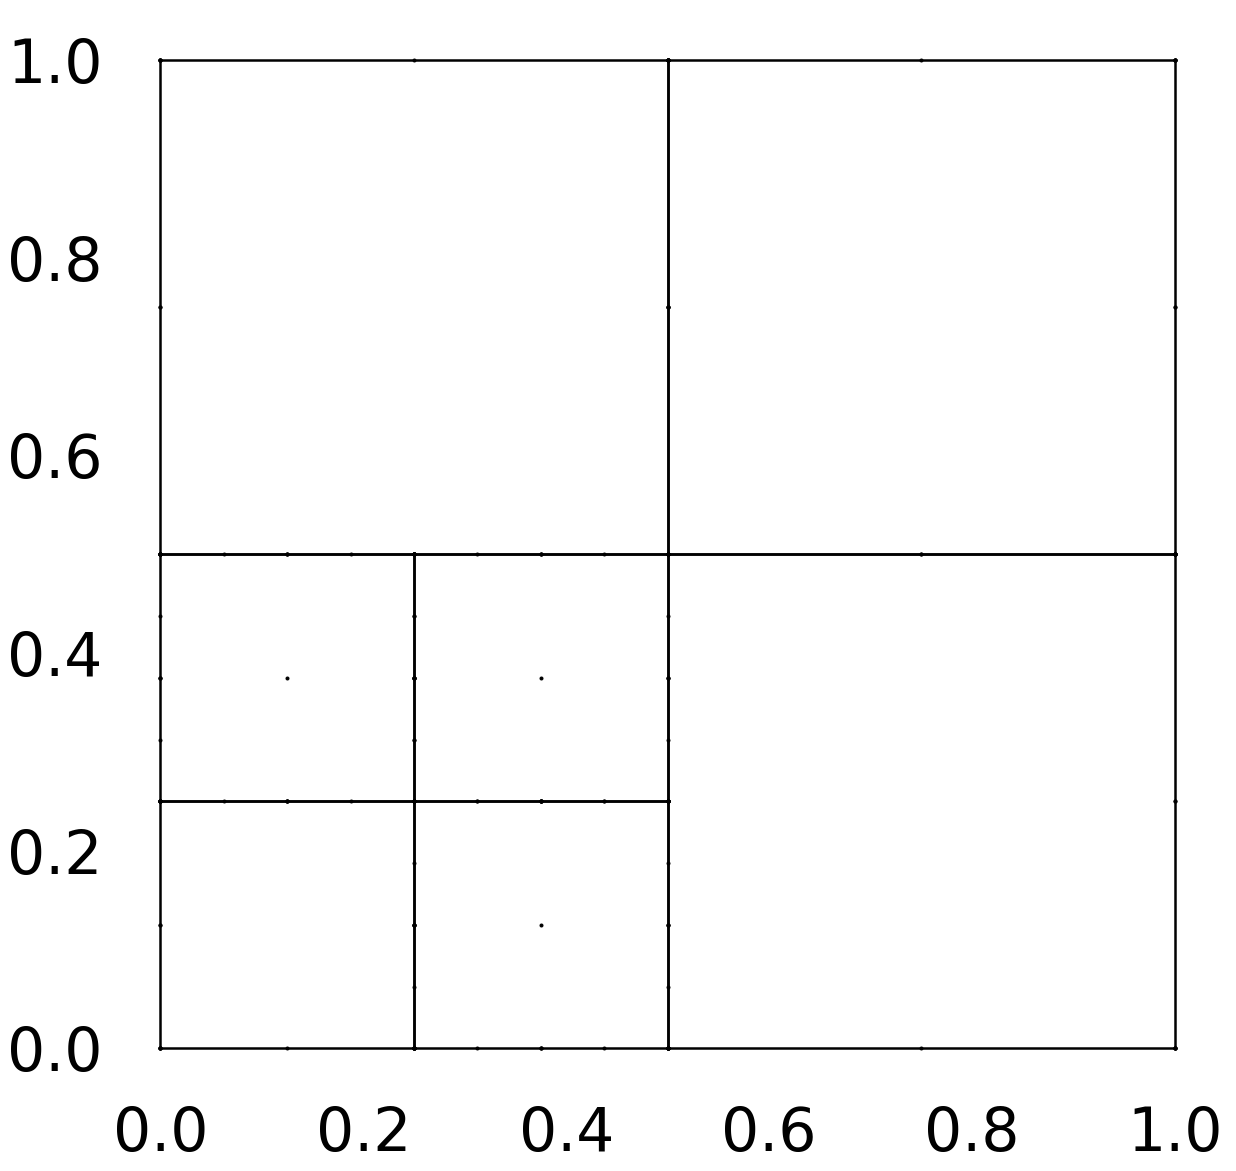

max surplus error: 0.00021081942656705818 total surplus error: 0.009676382339307281
combiintegral: 0.11356877648091199
Current error: 0.08677428899930816
New scheme
0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


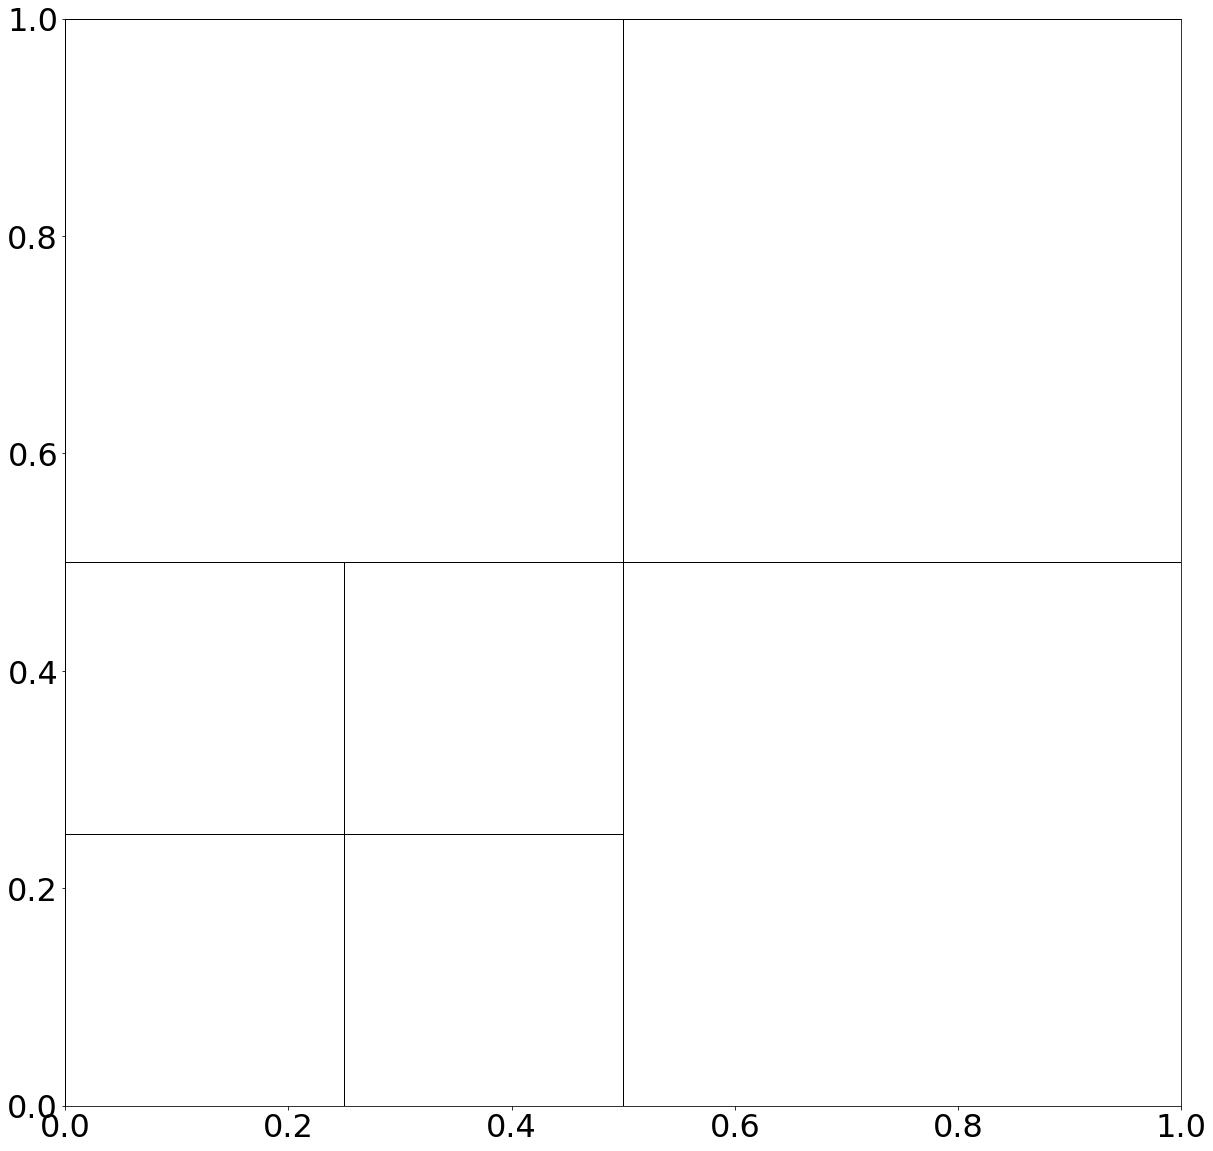

Combi Scheme:


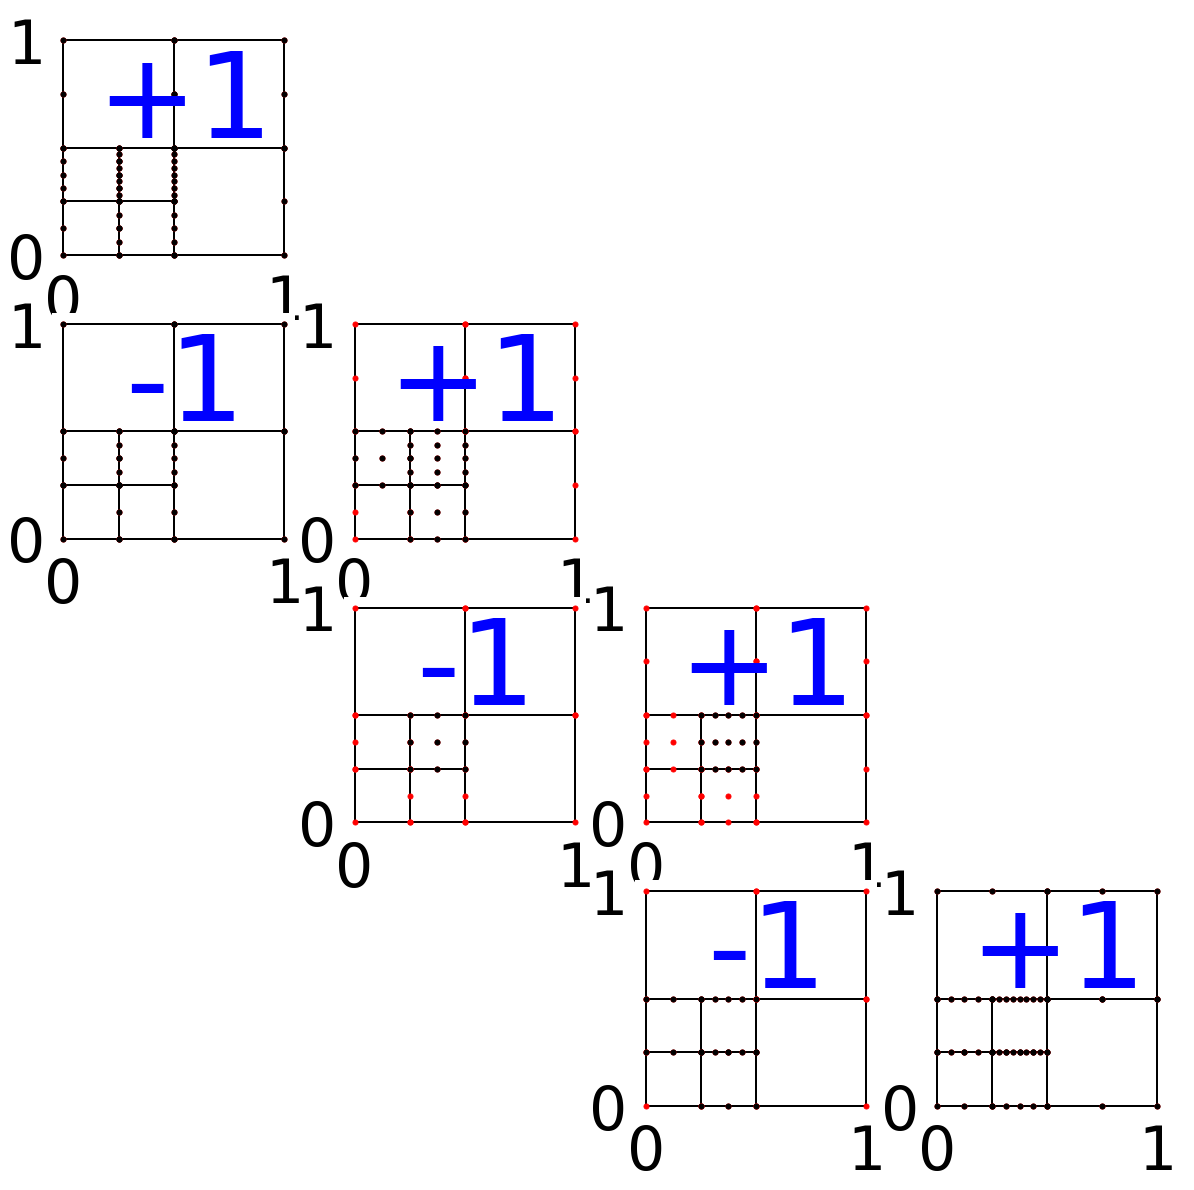

Resulting Sparse Grid:


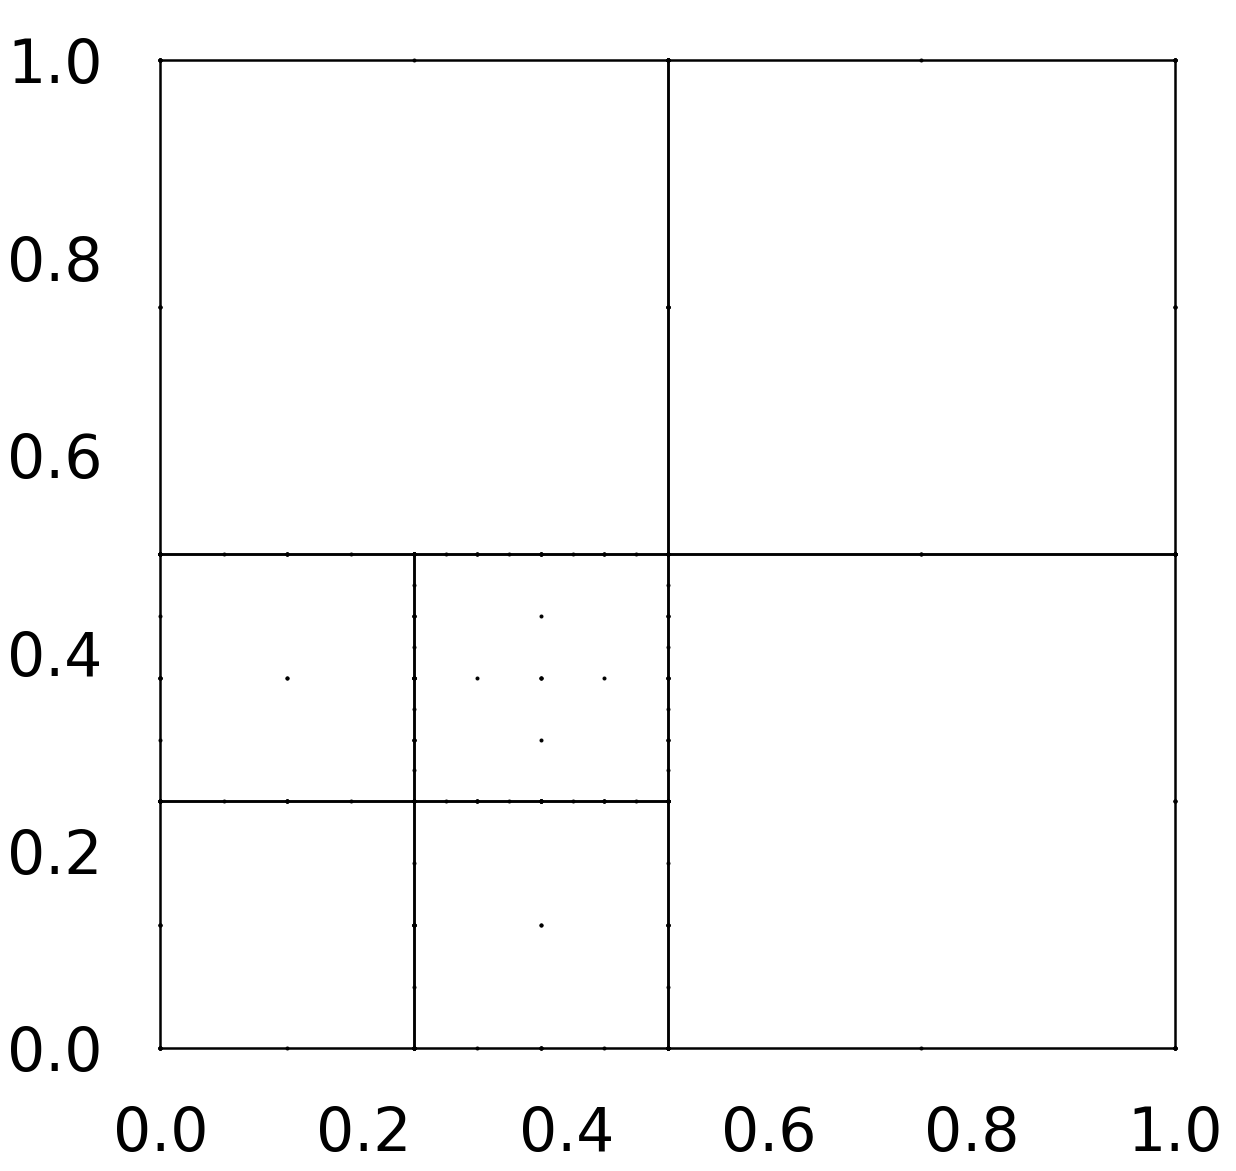

max surplus error: 0.00021081942656705818 total surplus error: 0.008462574496293498
combiintegral: 0.11564017301634372
Current error: 0.0701178396436884
Finished refinement
Refined  1  times
Refinement Graph:


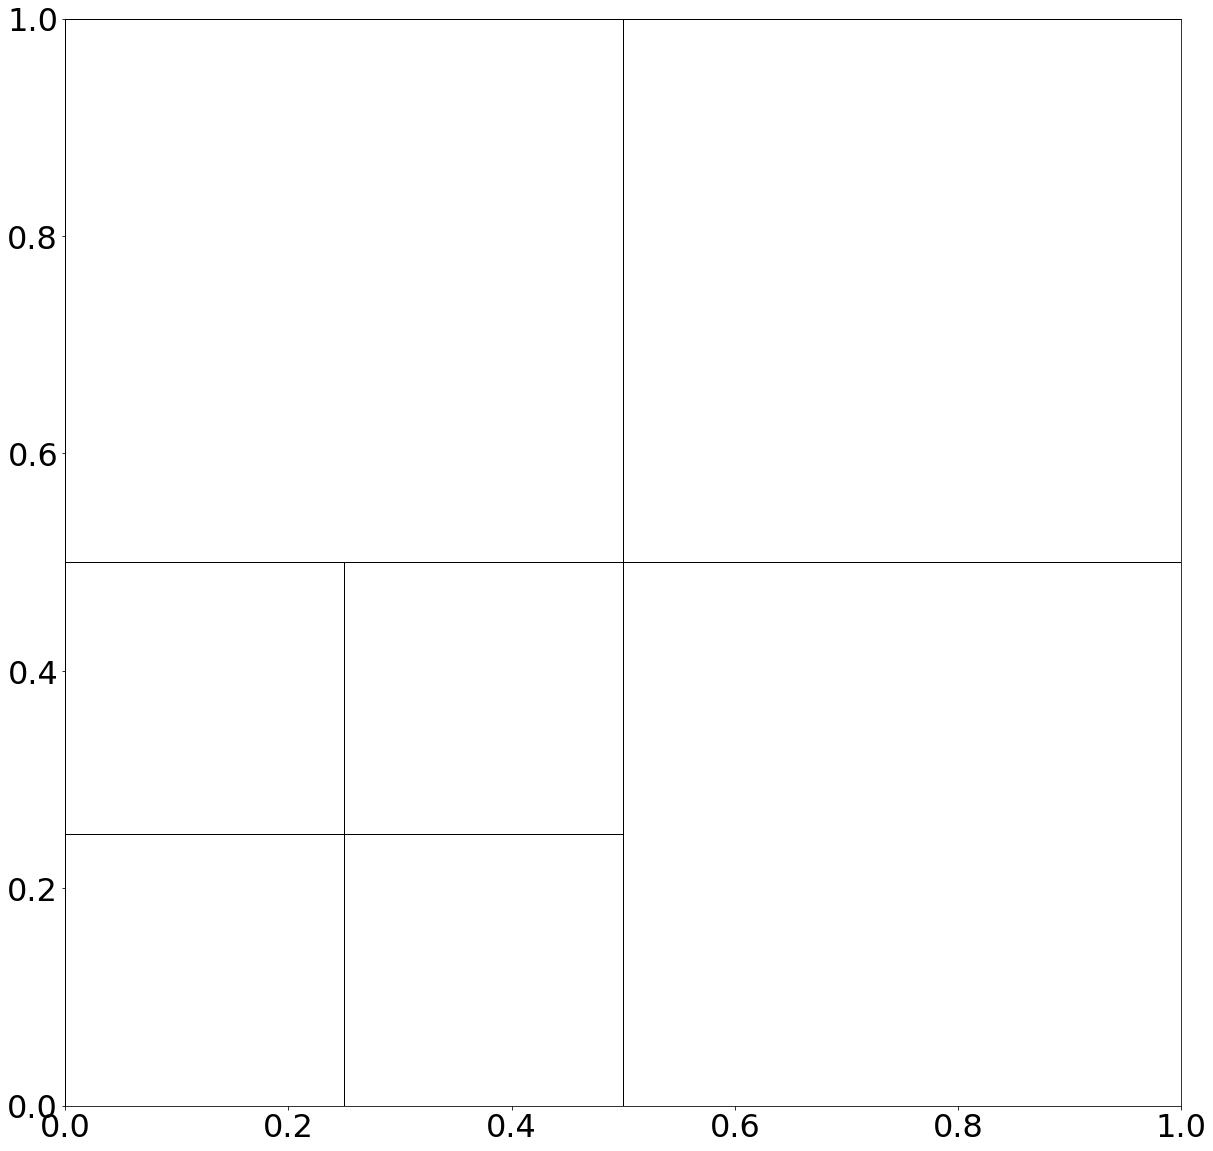

Combi Scheme:


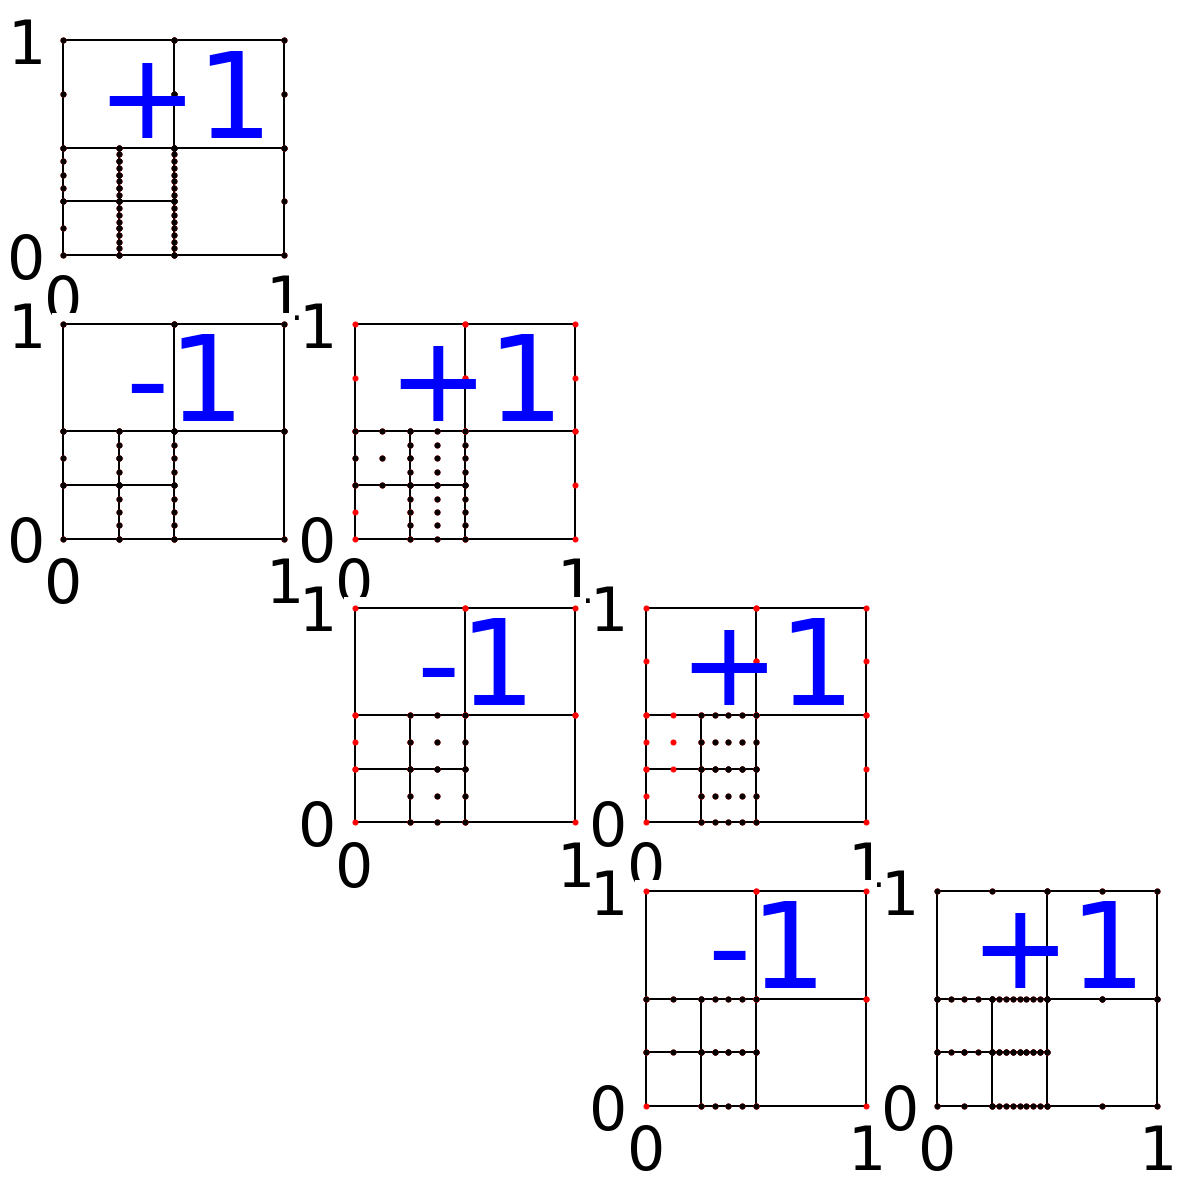

Resulting Sparse Grid:


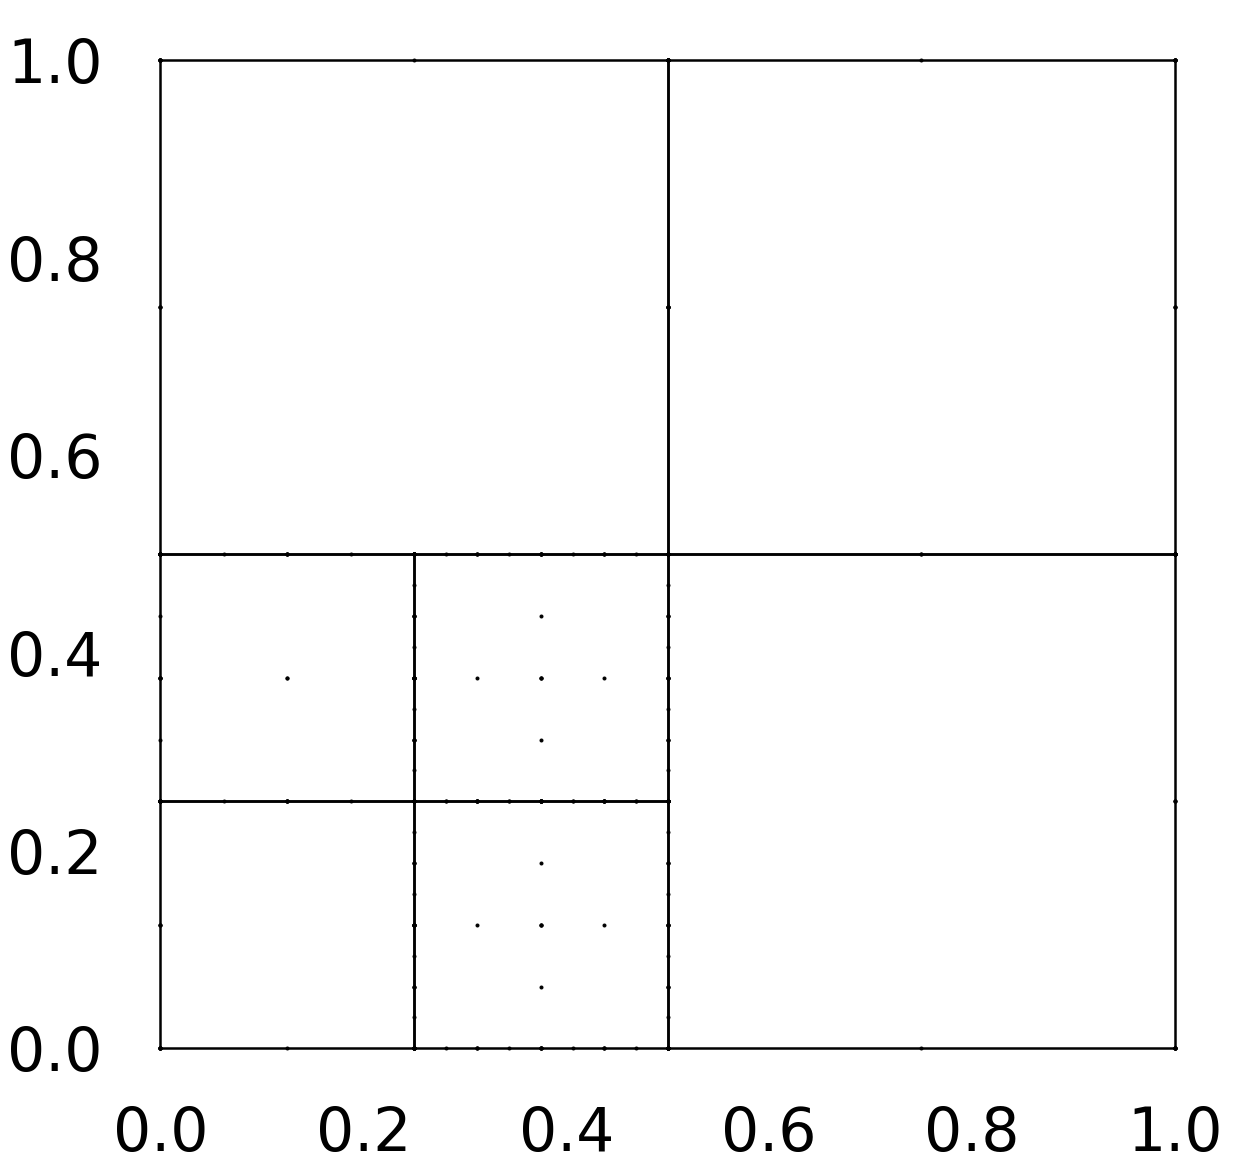

max surplus error: 0.00014223939623323484 total surplus error: 0.006668619386205015
combiintegral: 0.11743014815789521
Current error: 0.05572434724226529
Finished refinement
Refined  1  times
Refinement Graph:


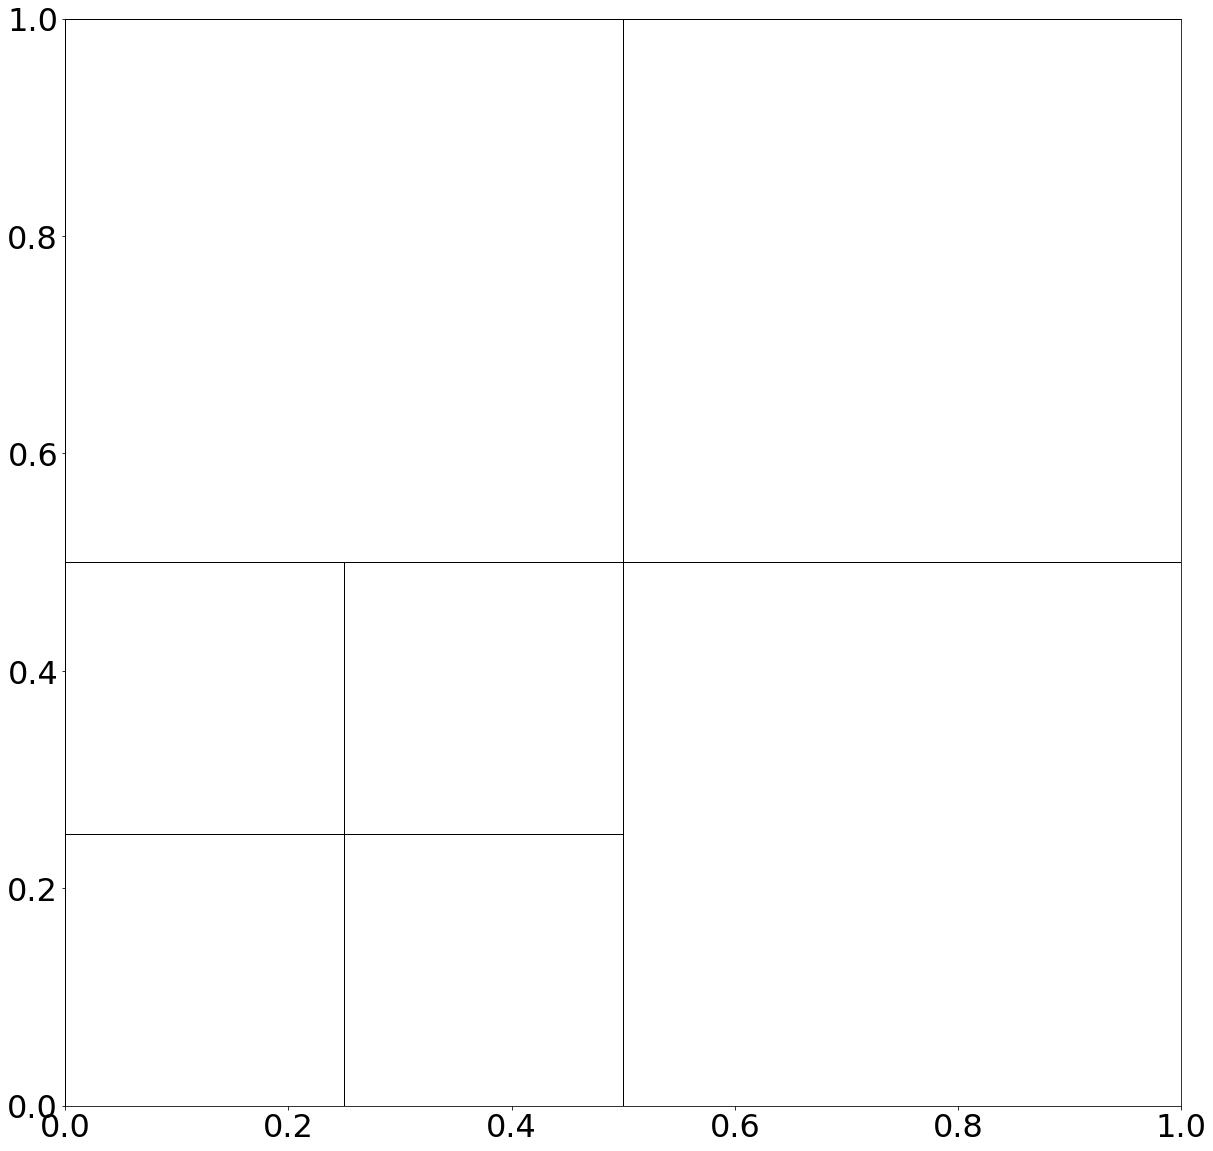

Combi Scheme:


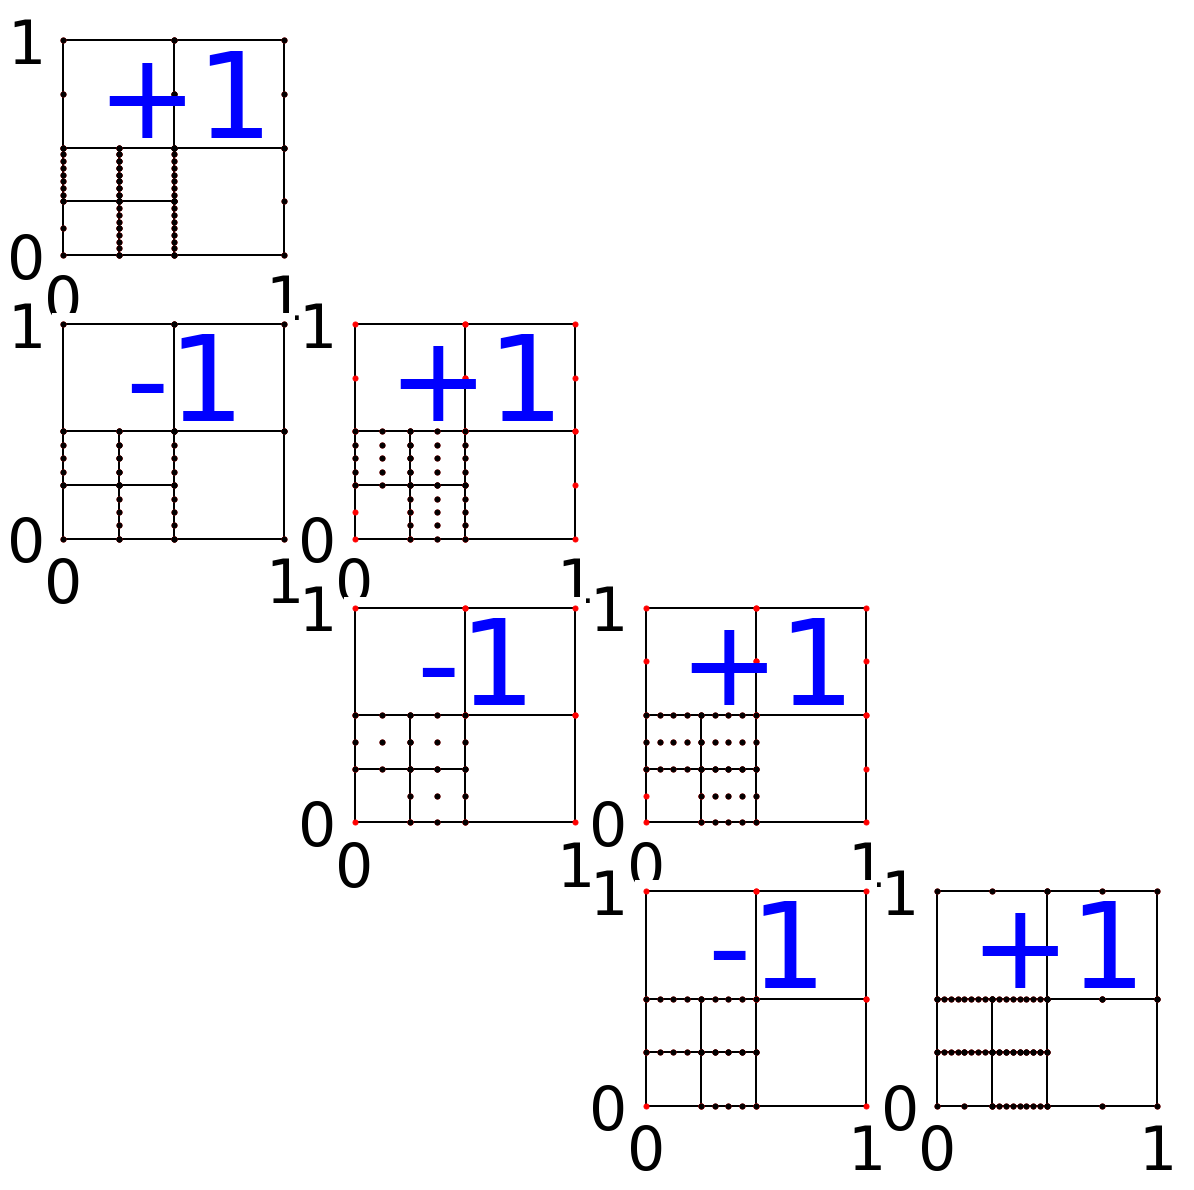

Resulting Sparse Grid:


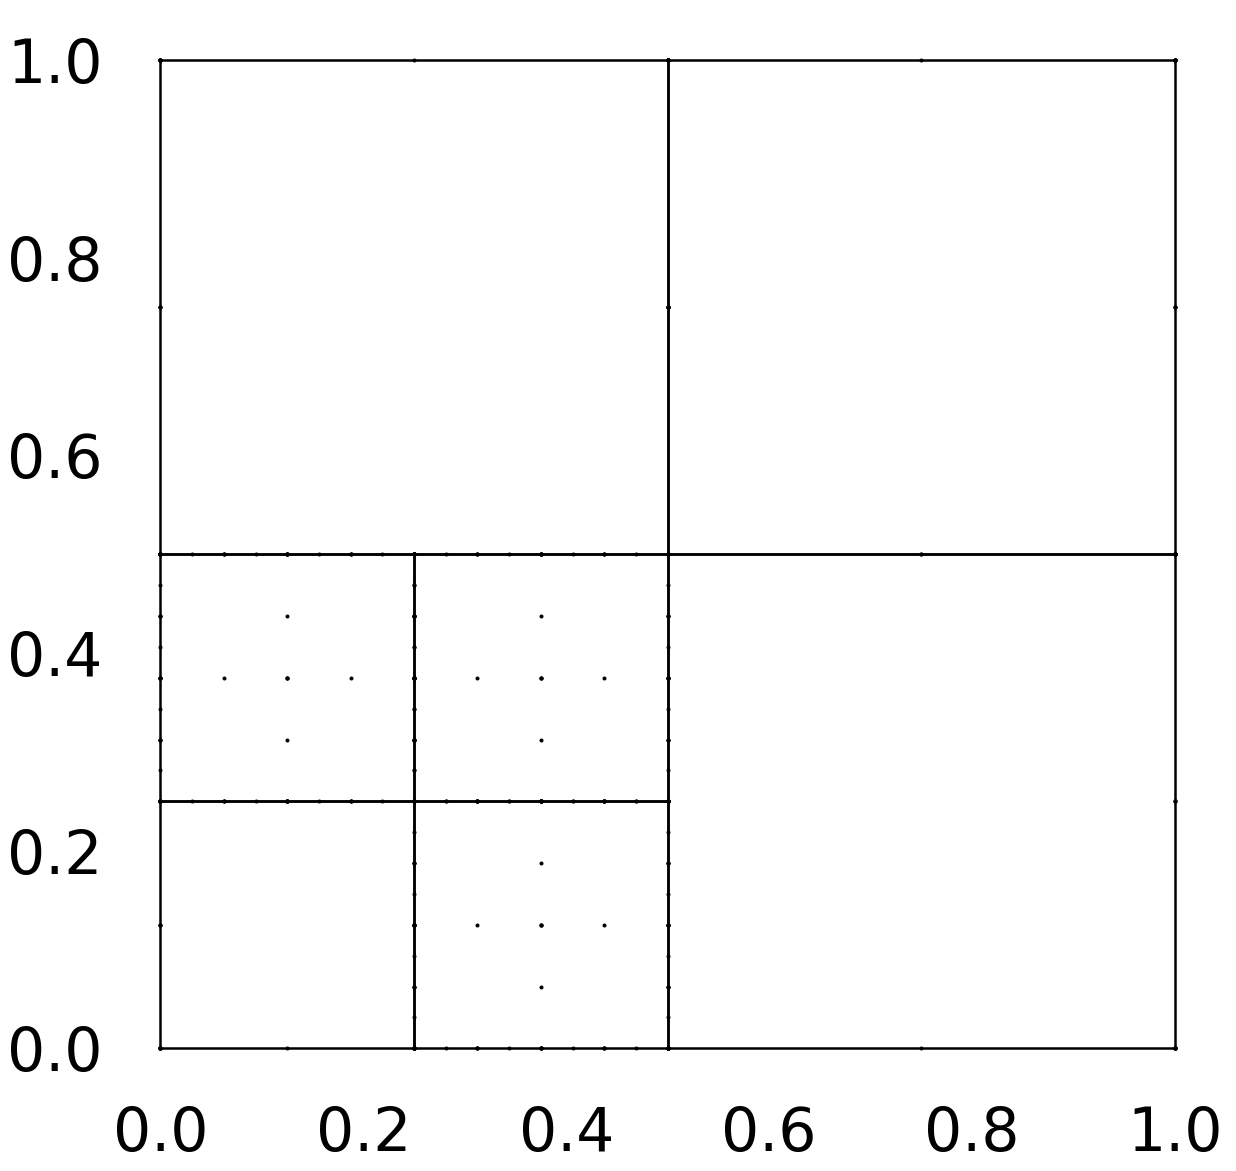

max surplus error: 5.598369014680412e-05 total surplus error: 0.005484564679463776
combiintegral: 0.11866416318711895
Current error: 0.0458014239937455
New scheme
0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


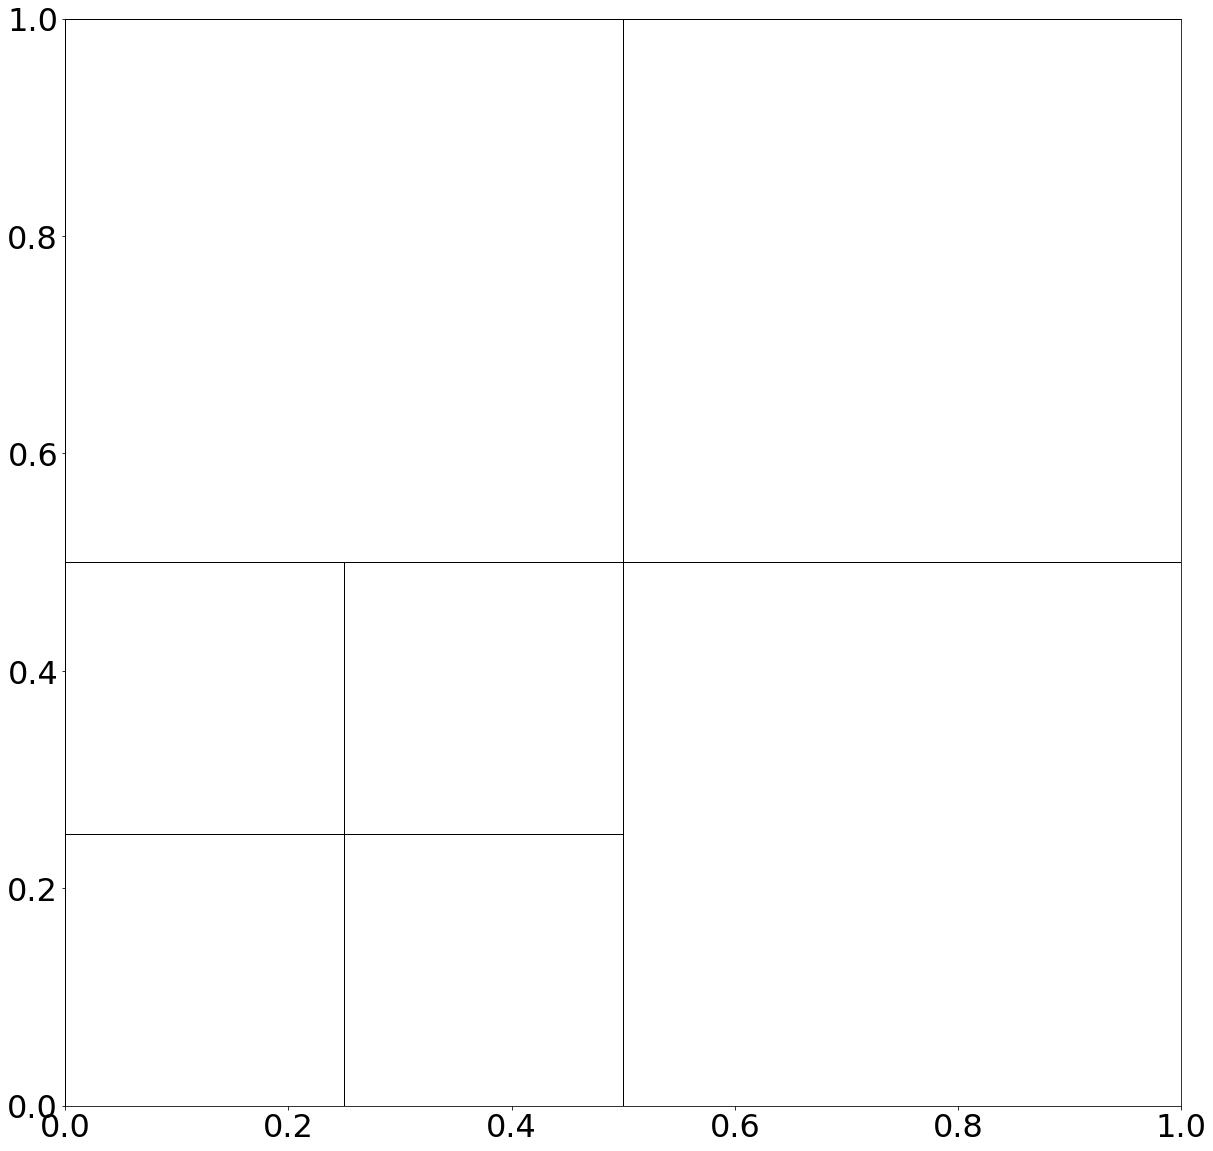

Combi Scheme:


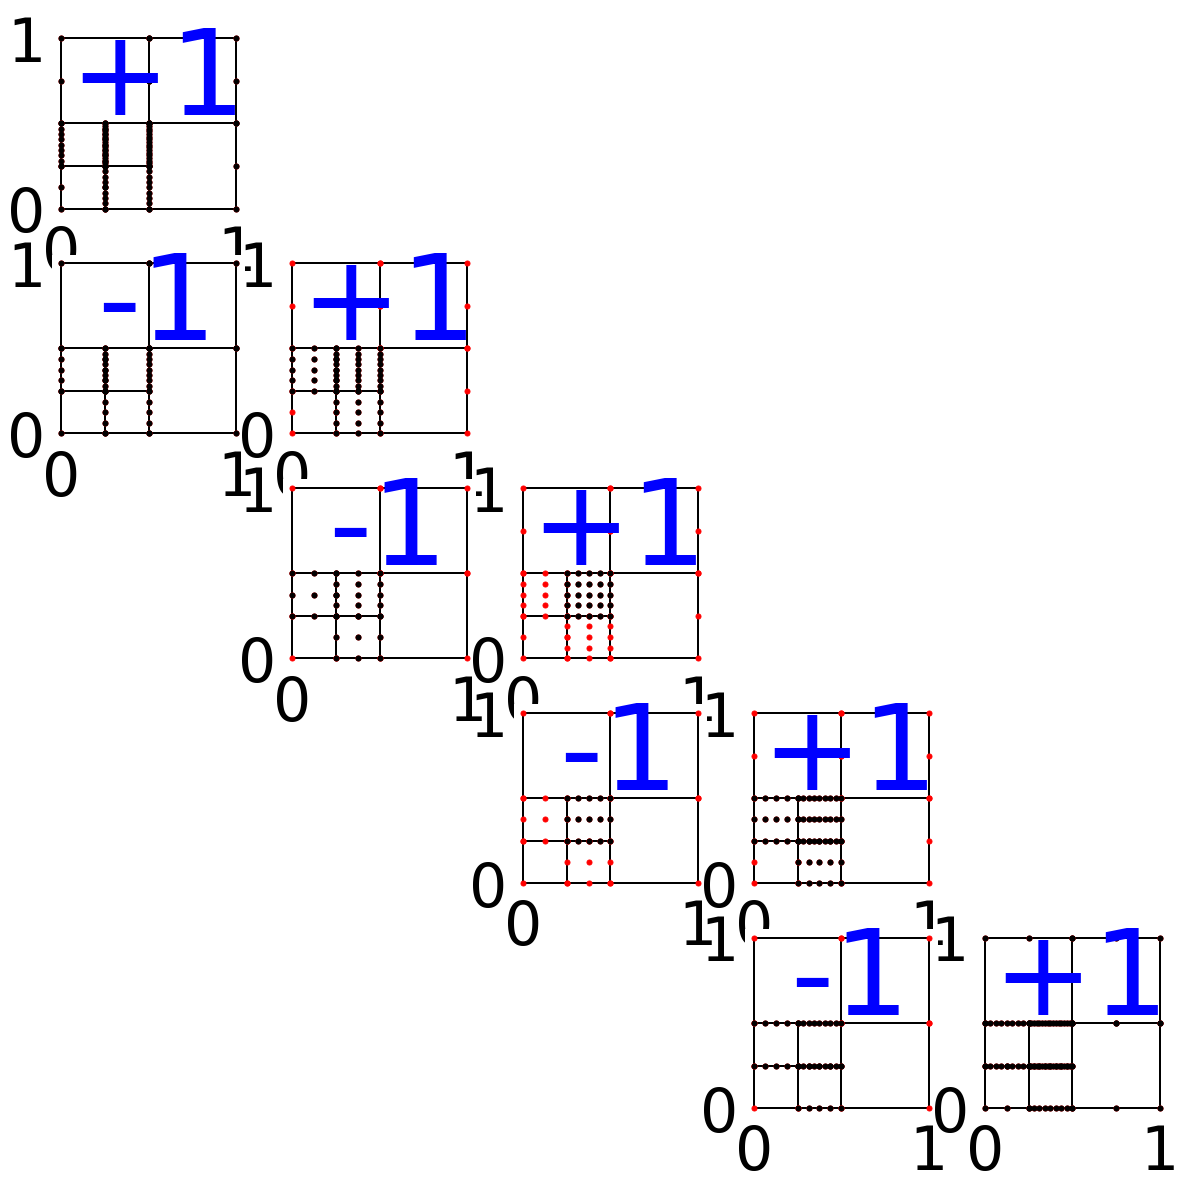

Resulting Sparse Grid:


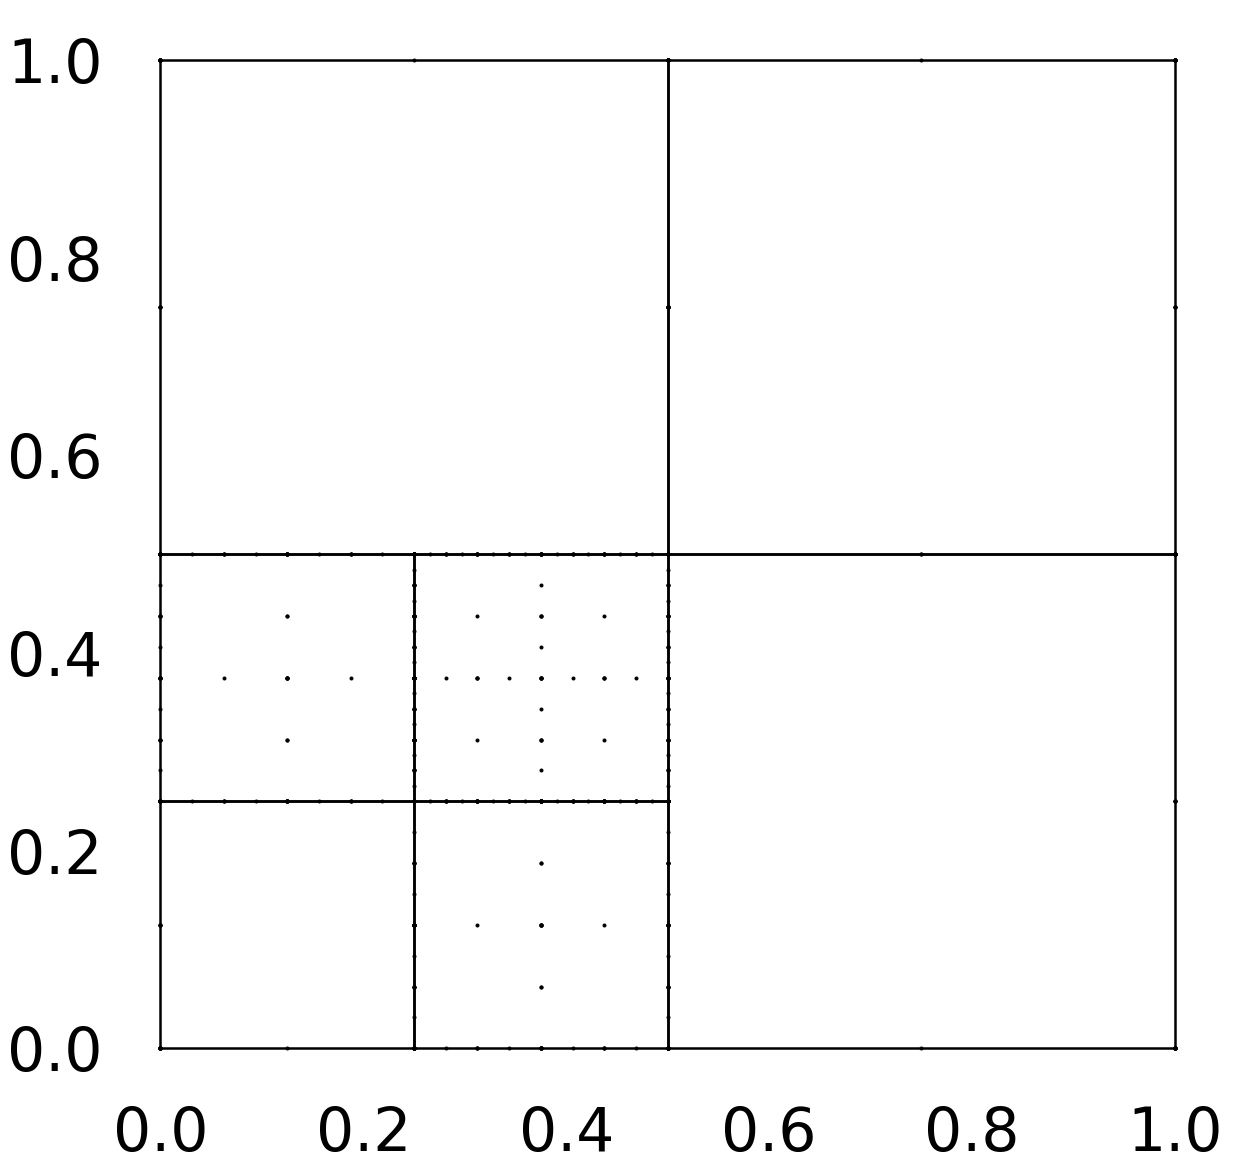

max surplus error: 4.864724665709554e-05 total surplus error: 0.004664937714611309
combiintegral: 0.11991593275769823
Current error: 0.0357357334798266
Finished refinement
Refined  2  times
Refinement Graph:


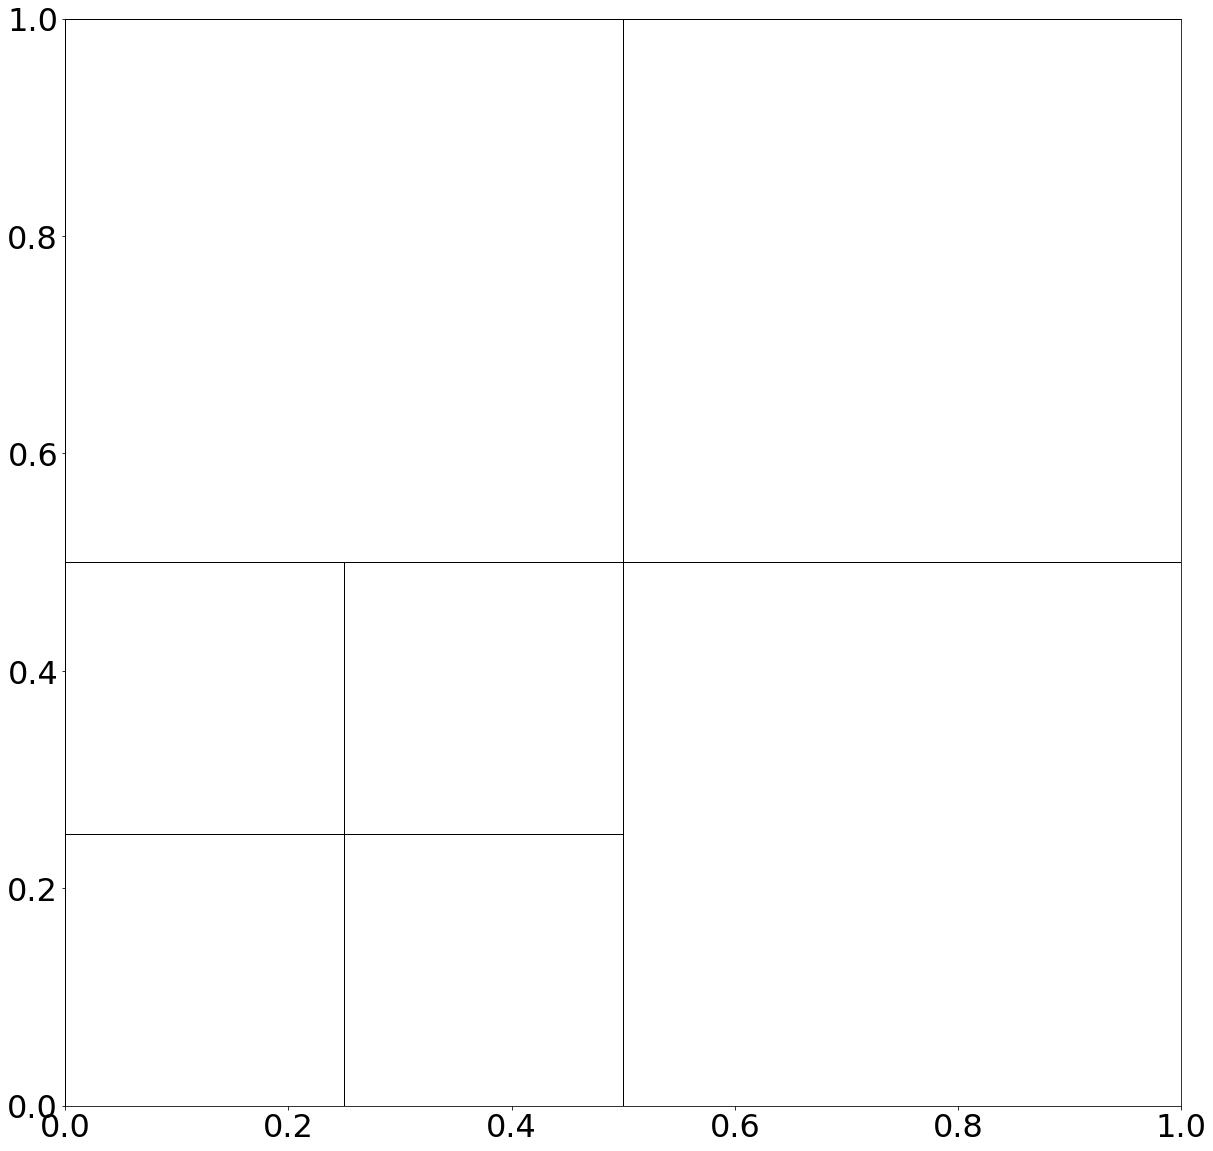

Combi Scheme:


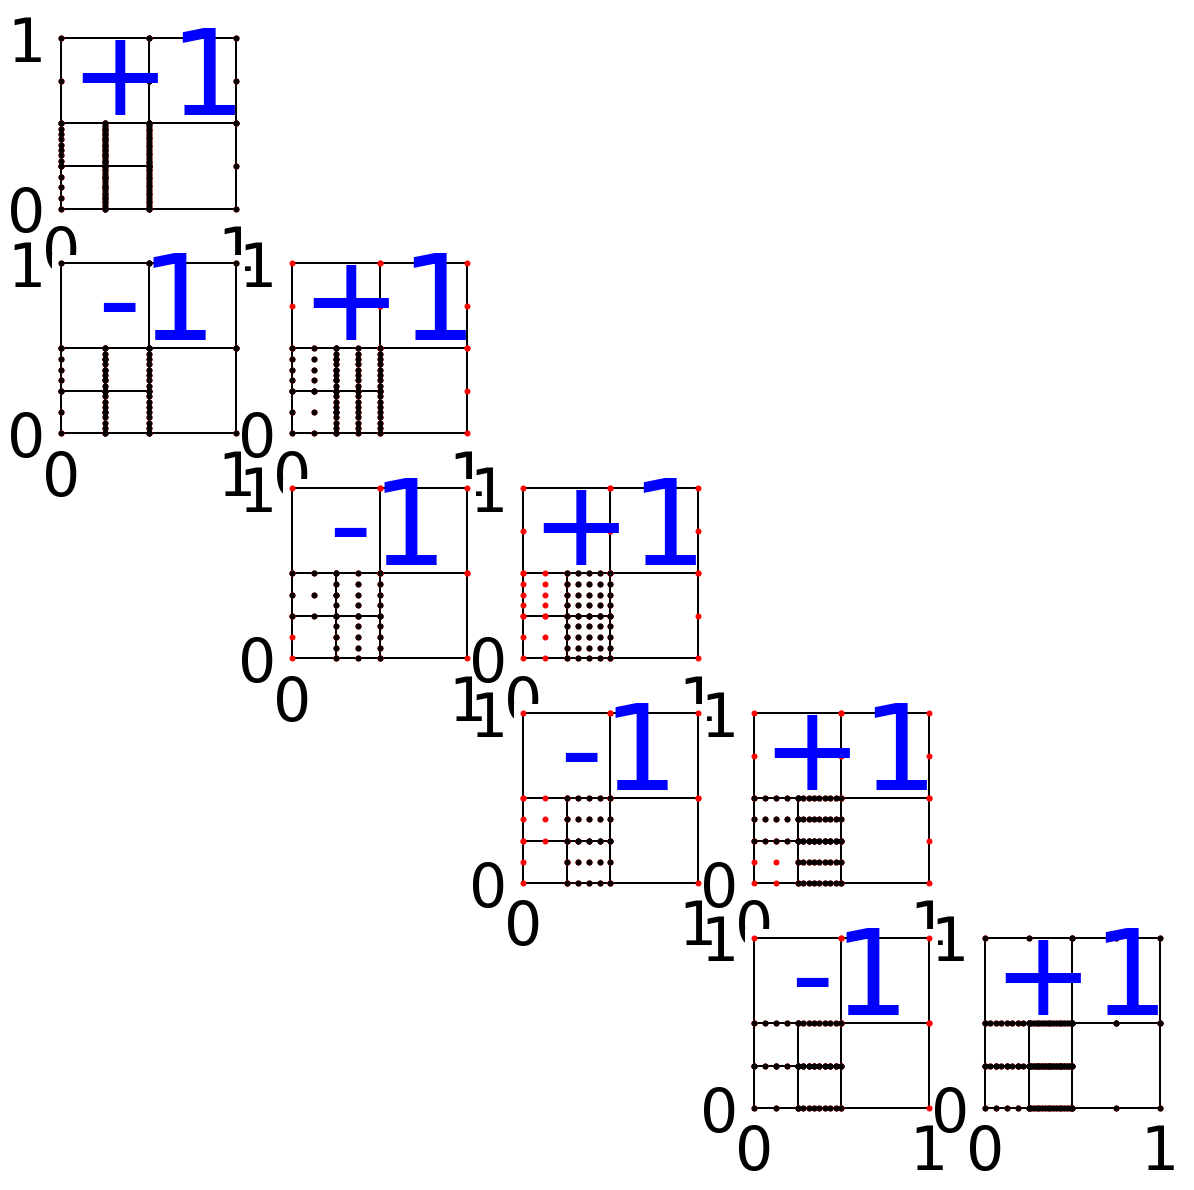

Resulting Sparse Grid:


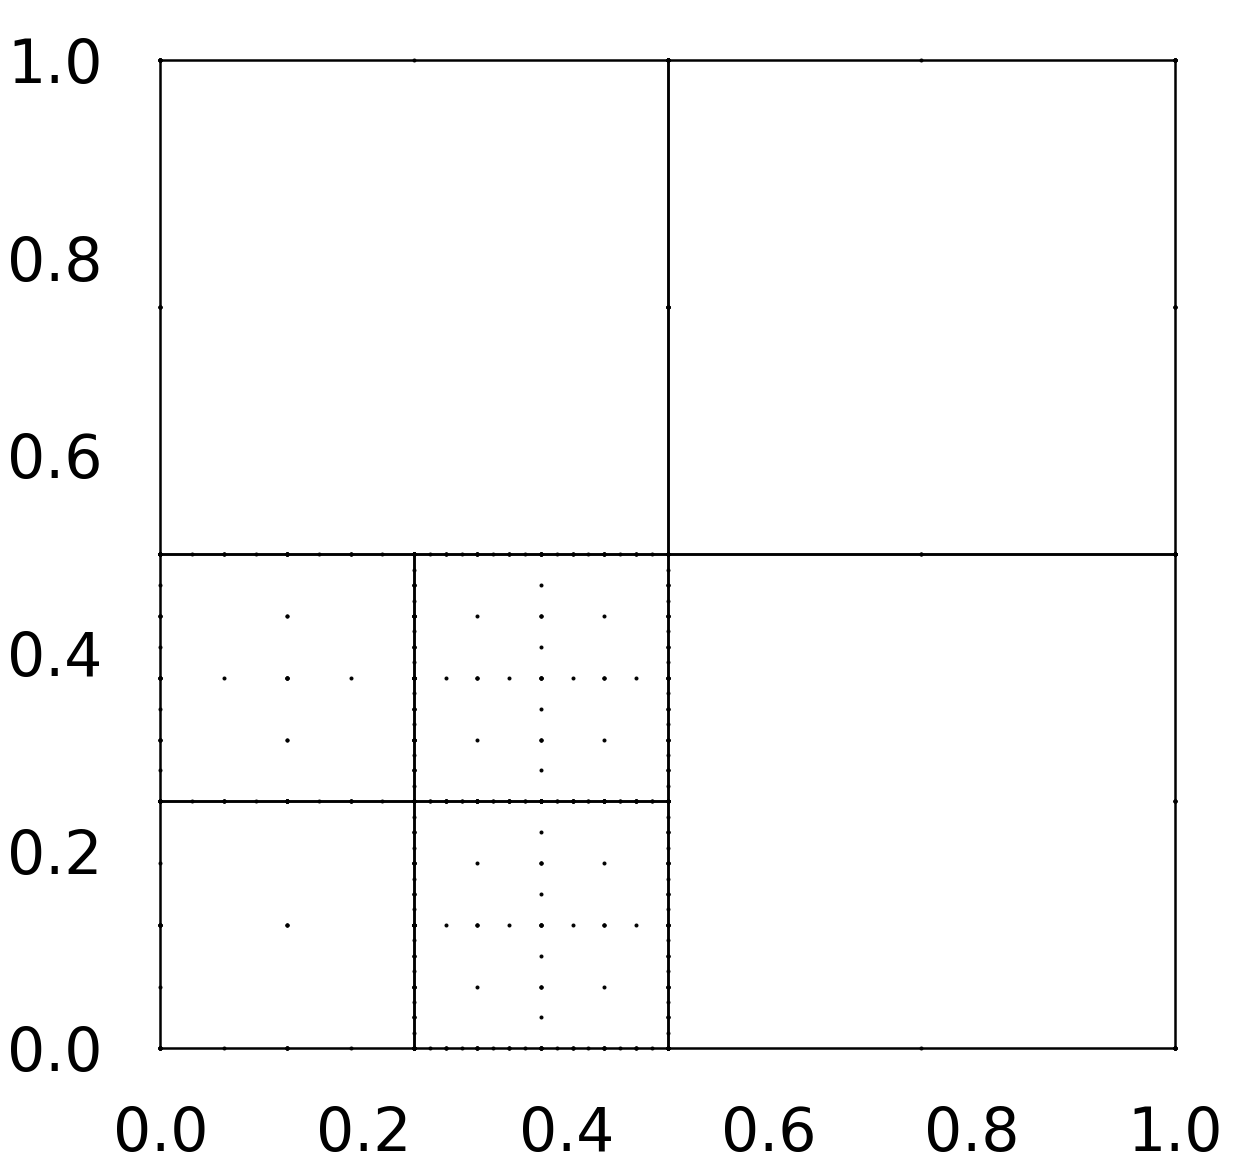

max surplus error: 3.335175754658793e-05 total surplus error: 0.003591526561694605
combiintegral: 0.12059891666373725
Current error: 0.030243744550111005
Finished refinement
Refined  1  times
Refinement Graph:


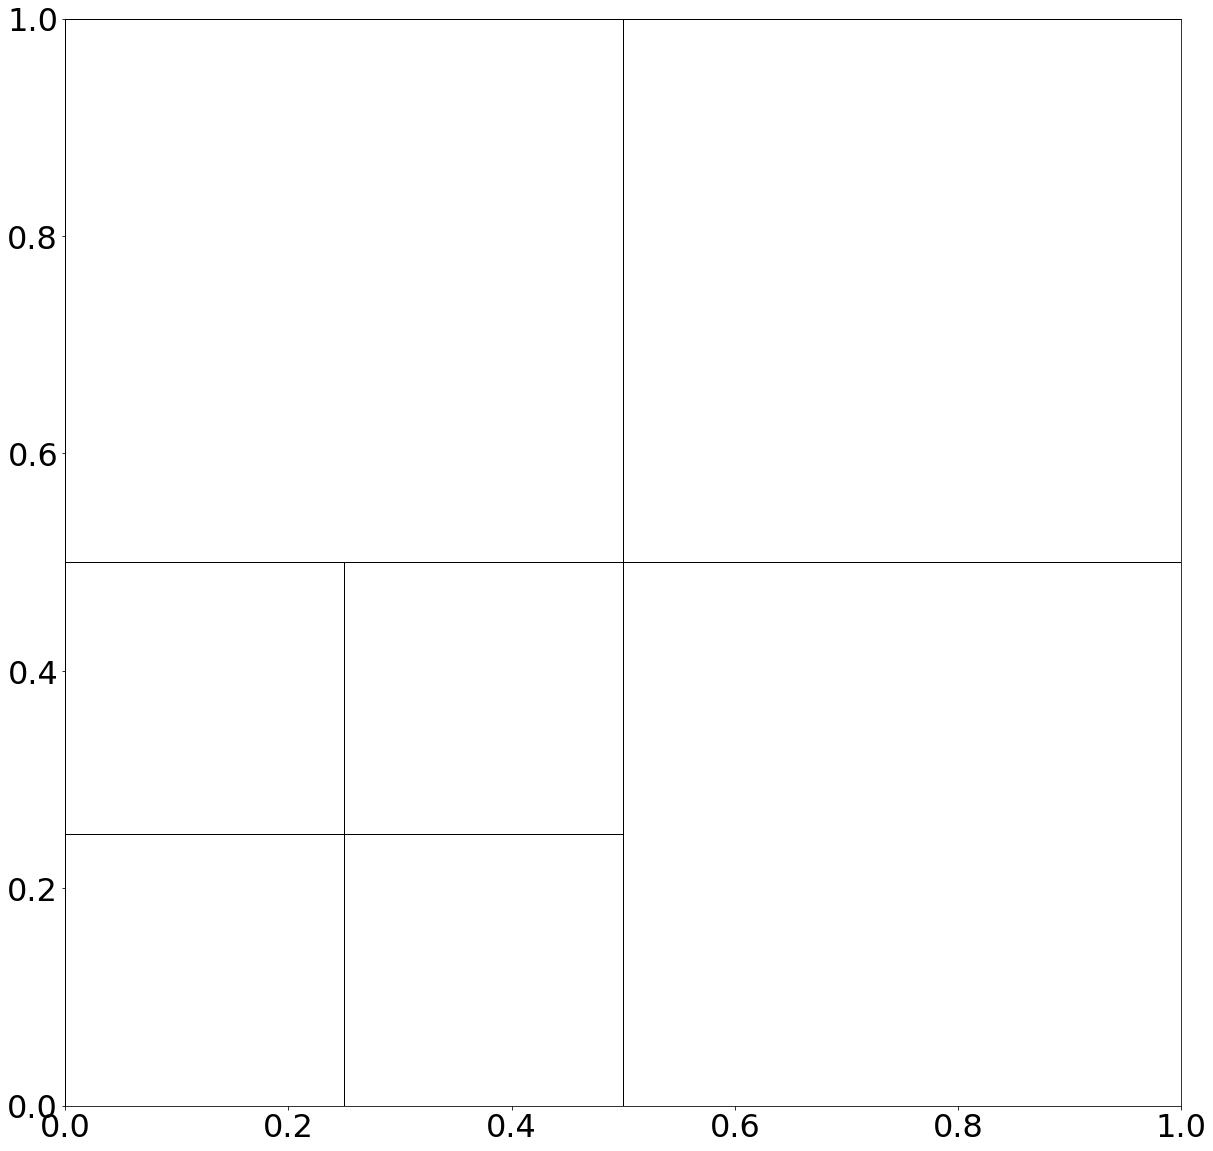

Combi Scheme:


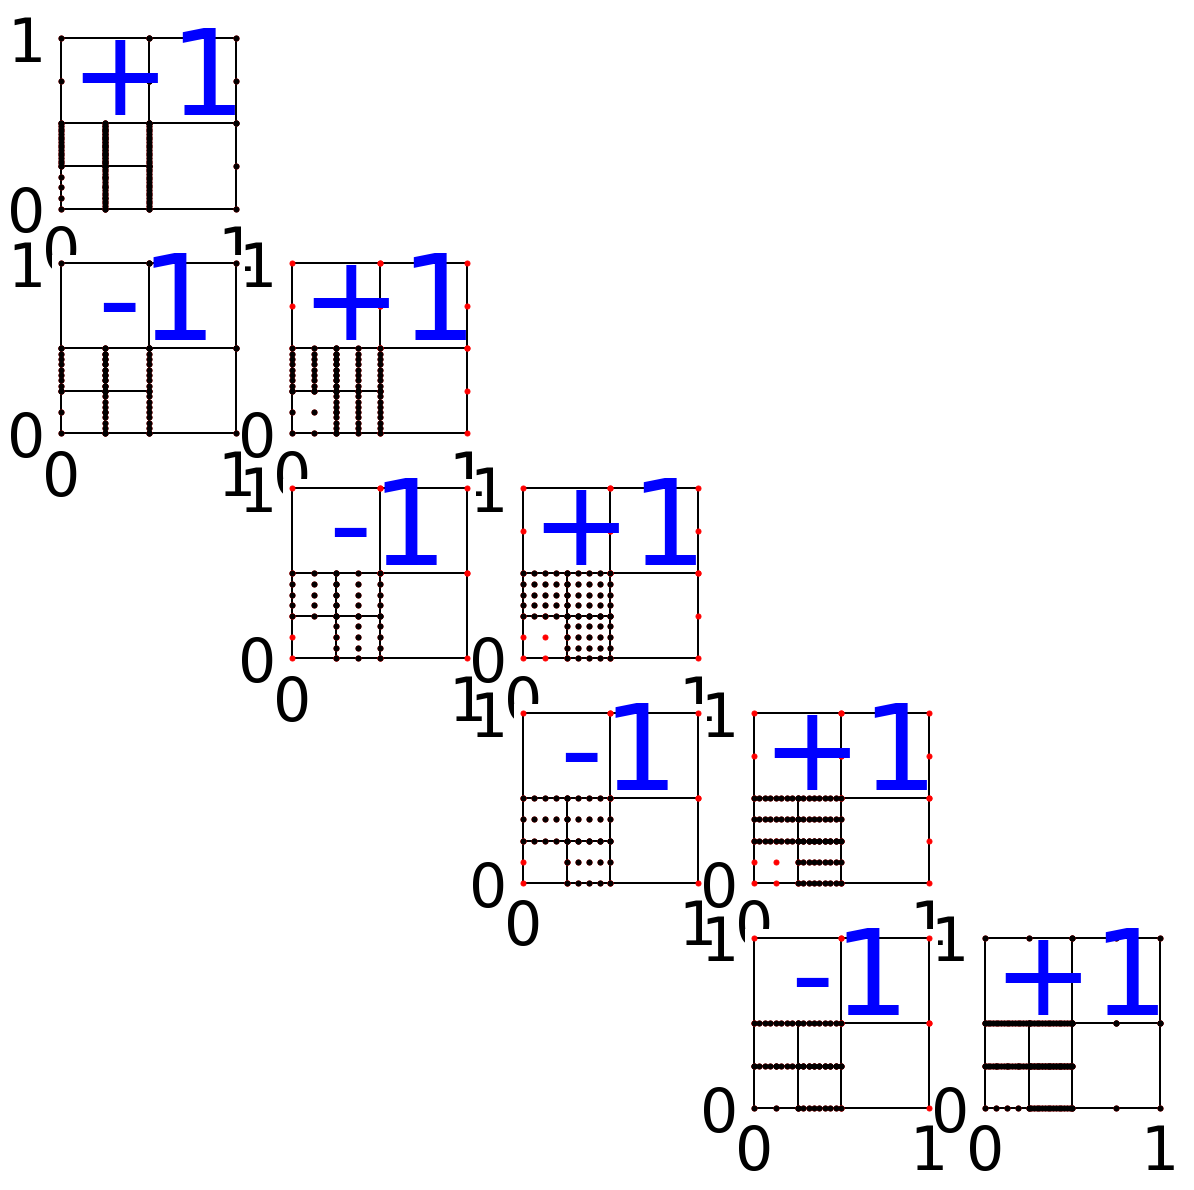

Resulting Sparse Grid:


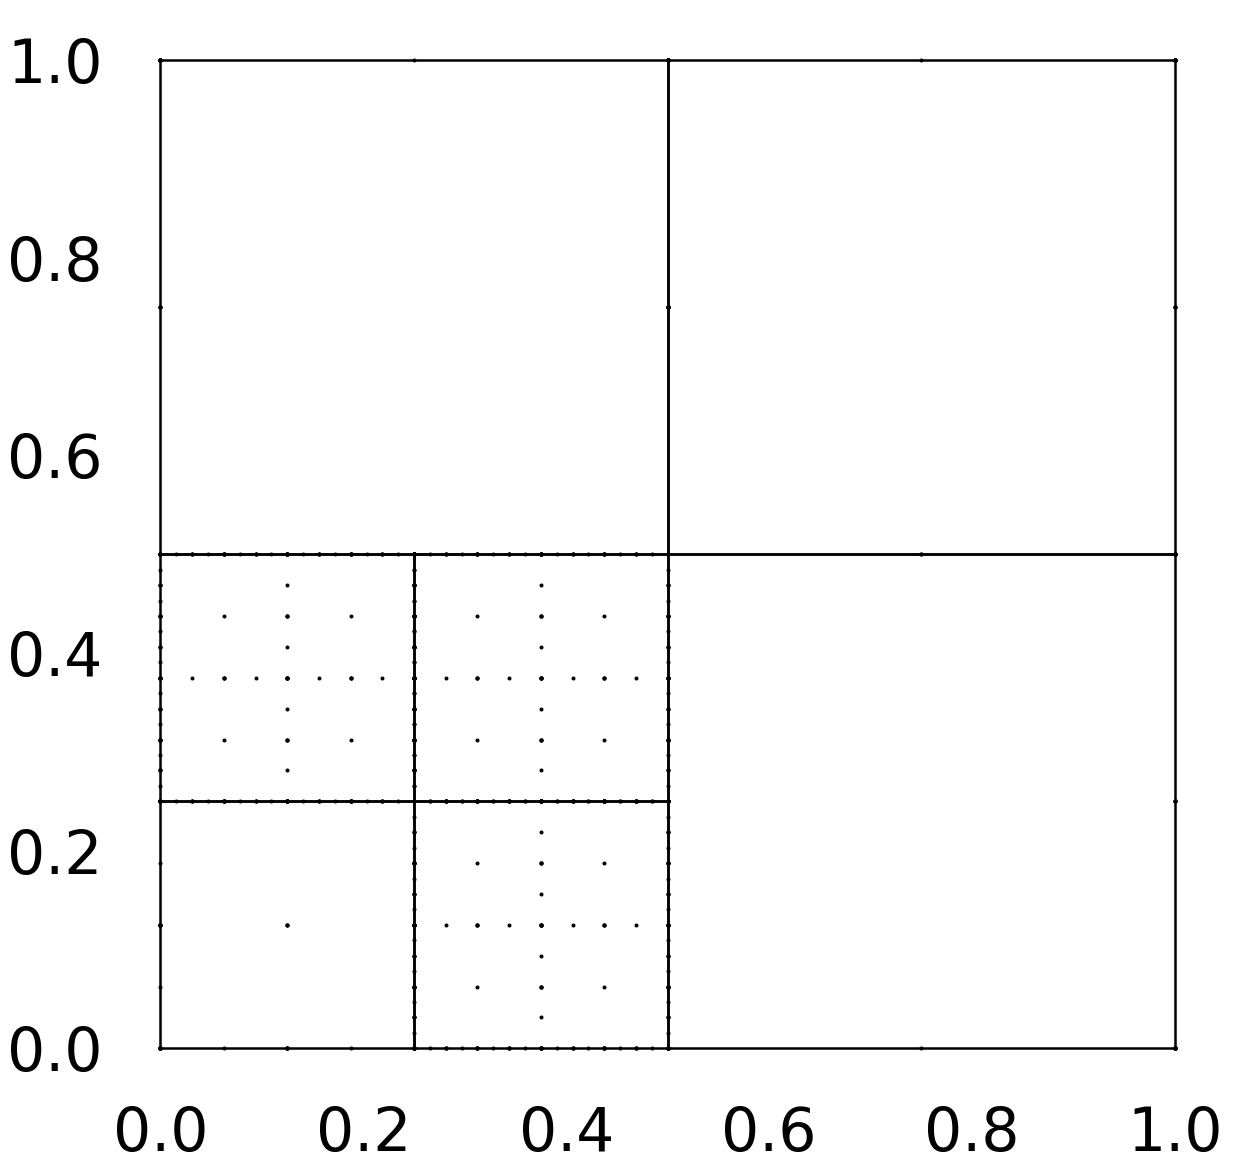

max surplus error: 1.5453945315793643e-05 total surplus error: 0.002980674866550074
combiintegral: 0.1212220799978165
Current error: 0.02523278294192864
New scheme
0 [1, 6] 1.0
1 [2, 5] 1.0
2 [3, 4] 1.0
3 [4, 3] 1.0
4 [5, 2] 1.0
5 [6, 1] 1.0
6 [1, 5] -1.0
7 [2, 4] -1.0
8 [3, 3] -1.0
9 [4, 2] -1.0
10 [5, 1] -1.0
Finished refinement
Refined  1  times
Refinement Graph:


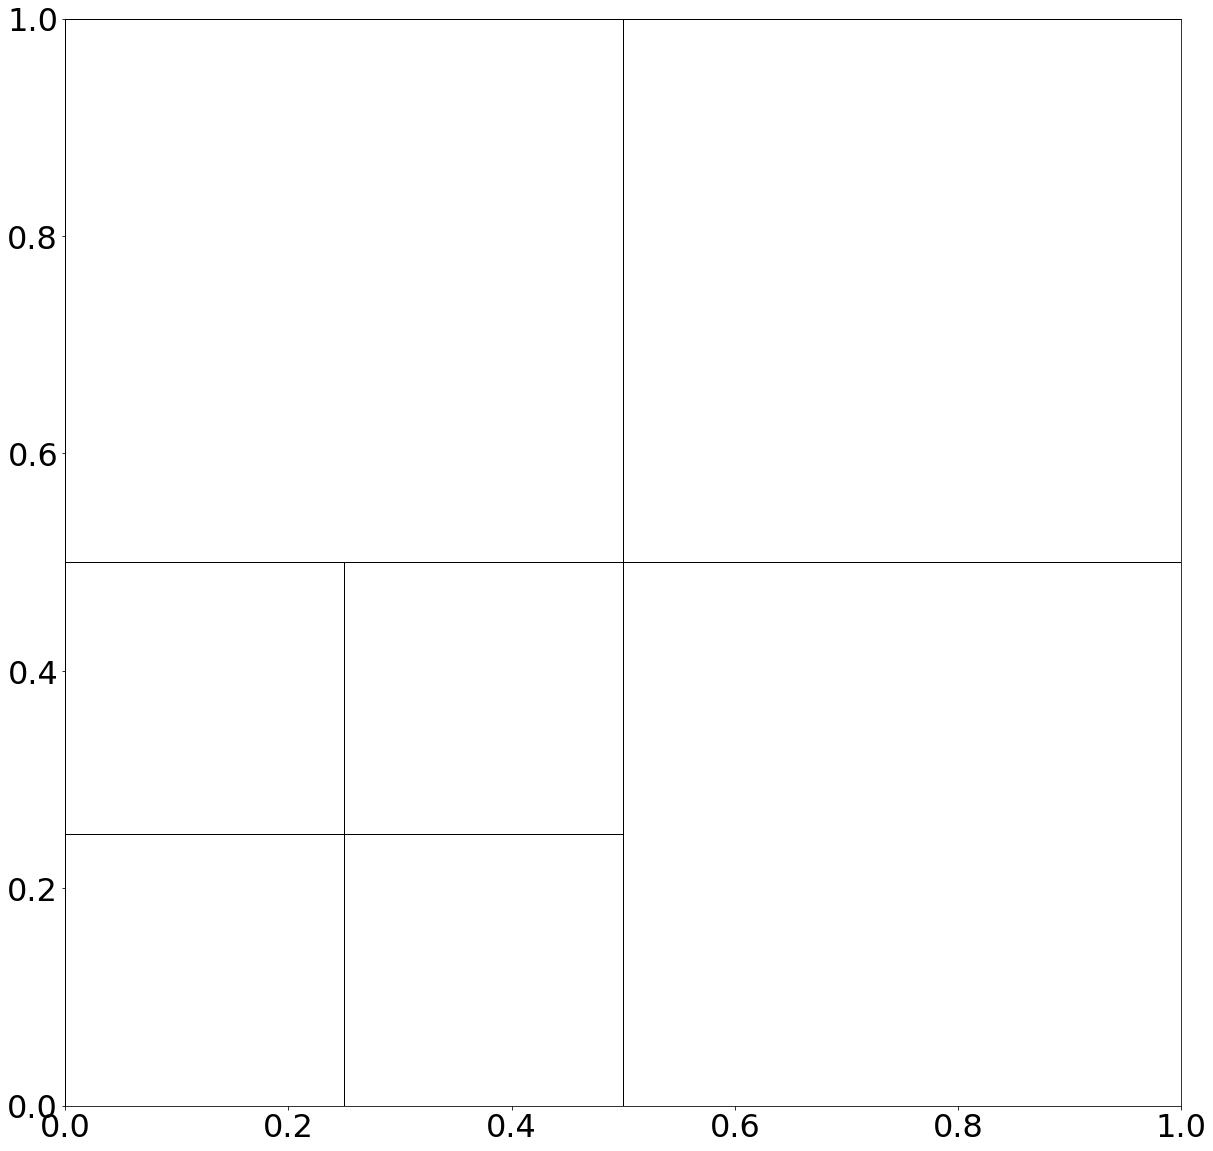

Combi Scheme:


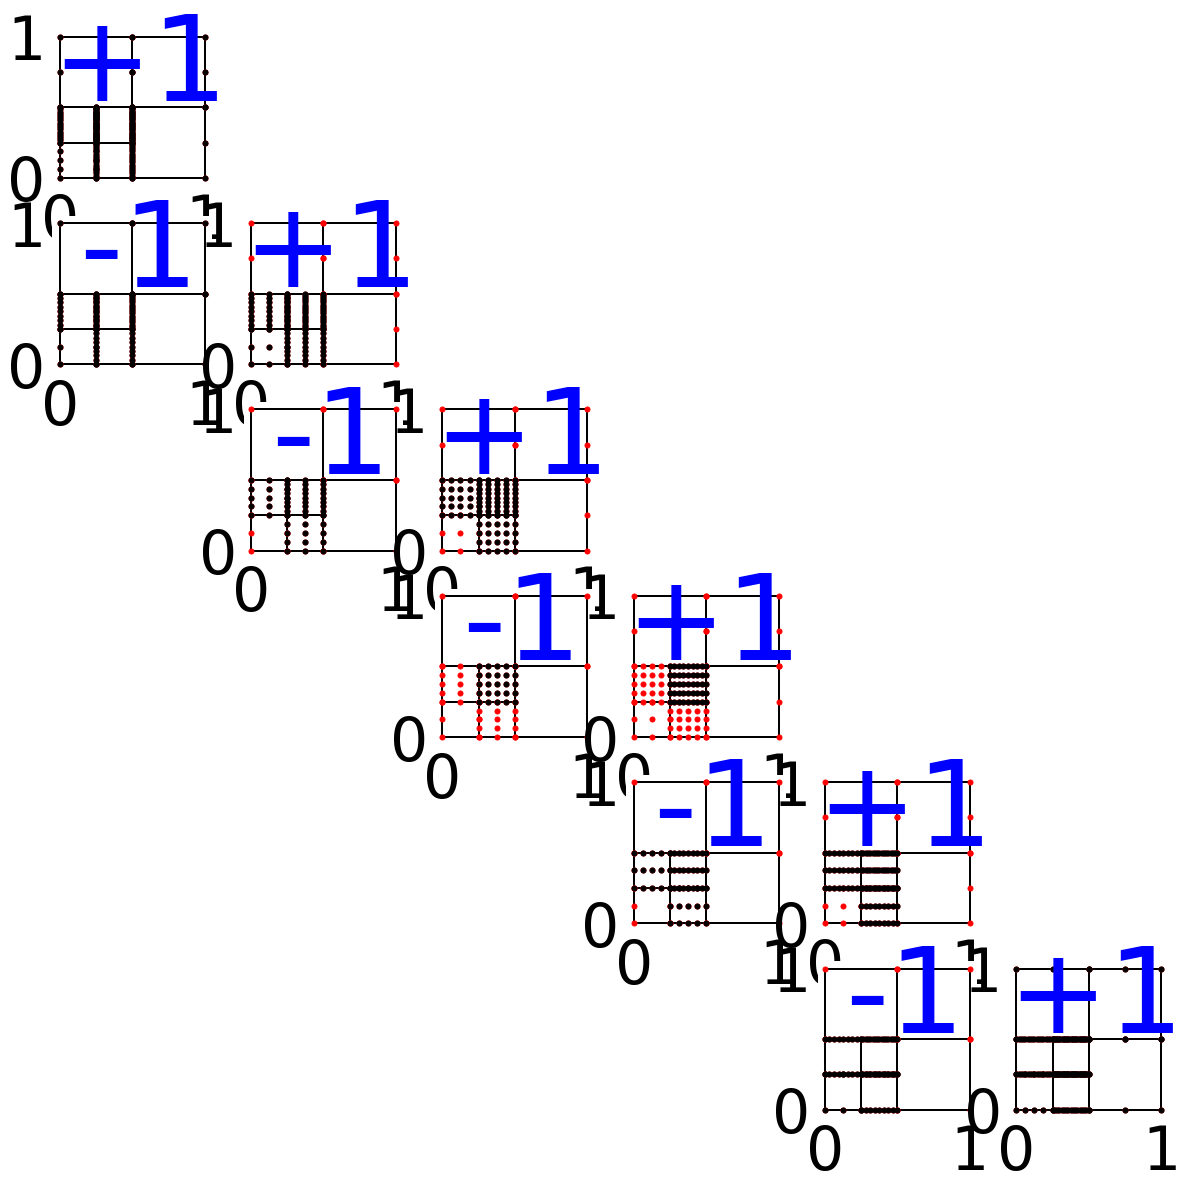

Resulting Sparse Grid:


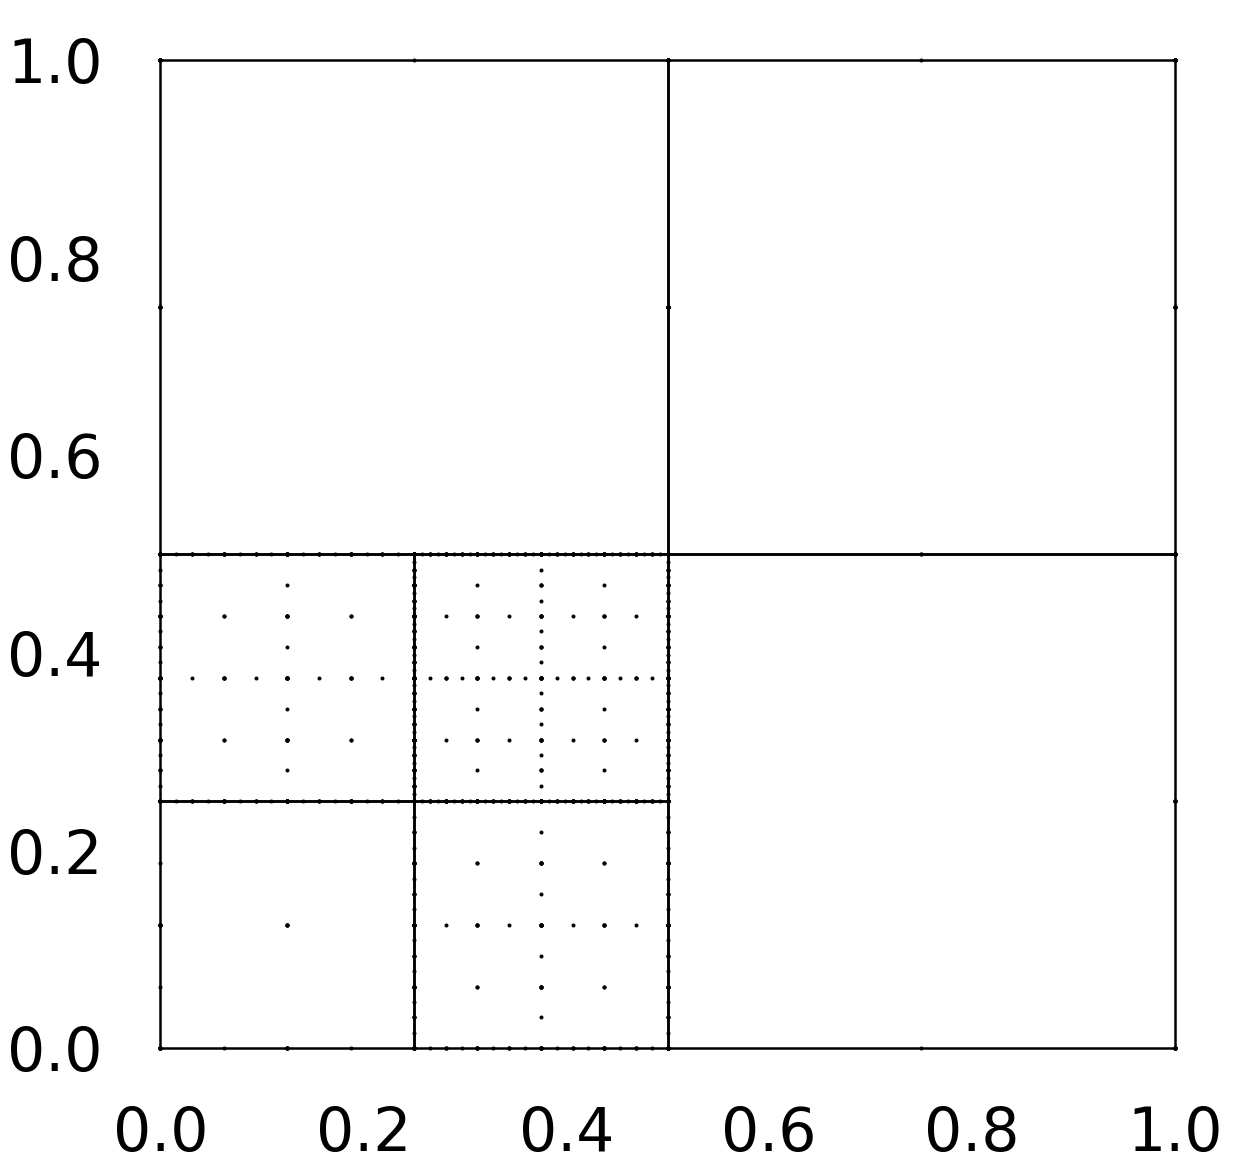

max surplus error: 1.2434060466251589e-05 total surplus error: 0.0024632634935977983
combiintegral: 0.1219564381954435
Current error: 0.019327684657544027
Finished refinement
Refined  1  times
Refinement Graph:


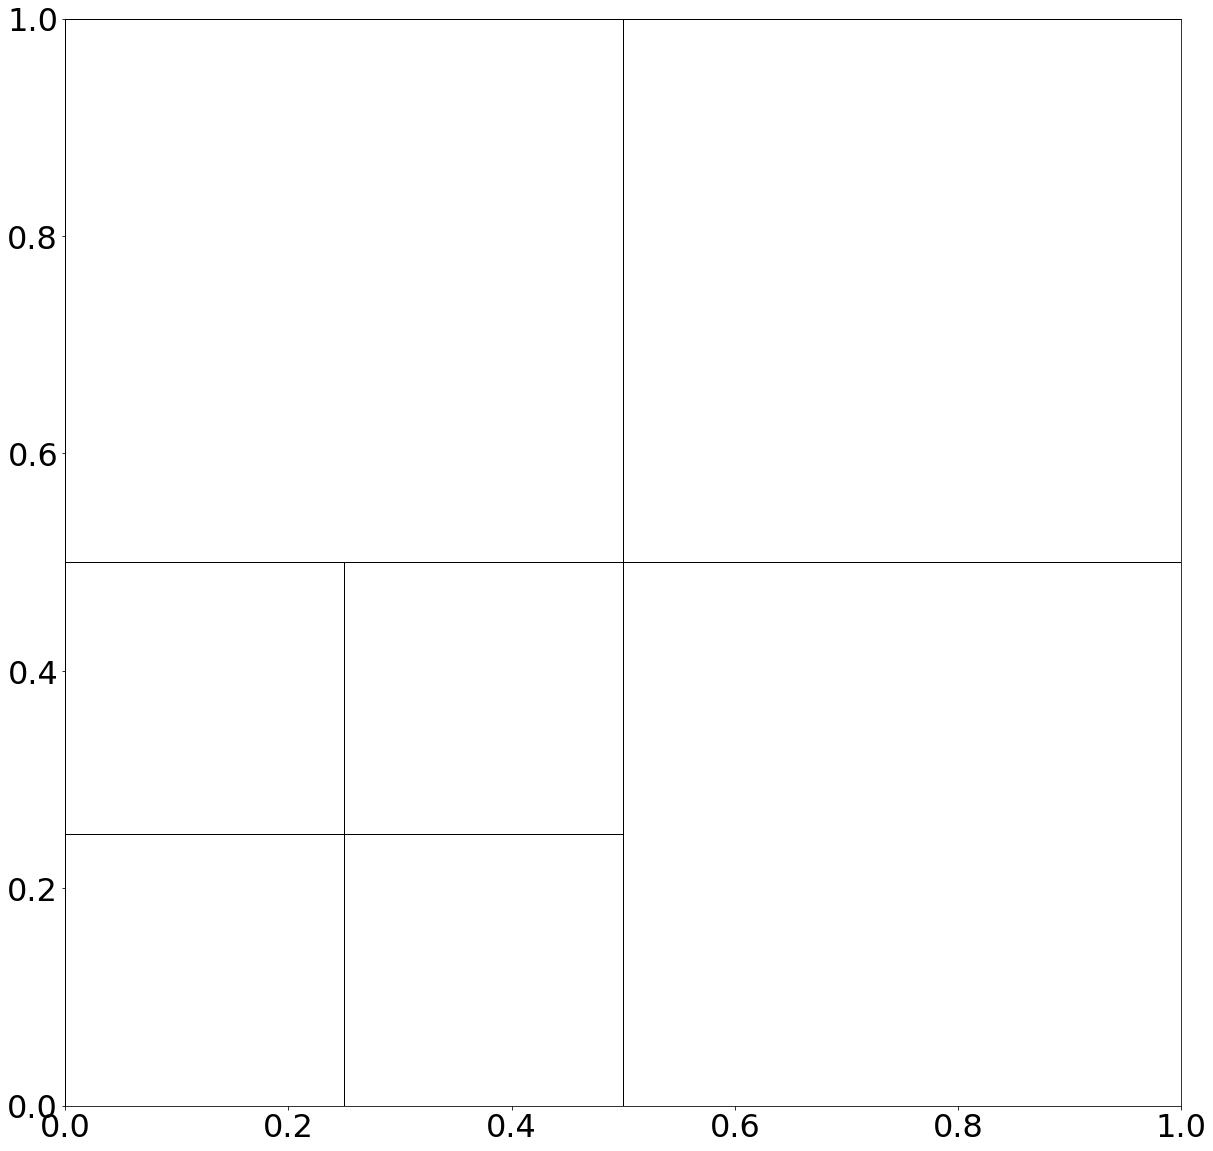

Combi Scheme:


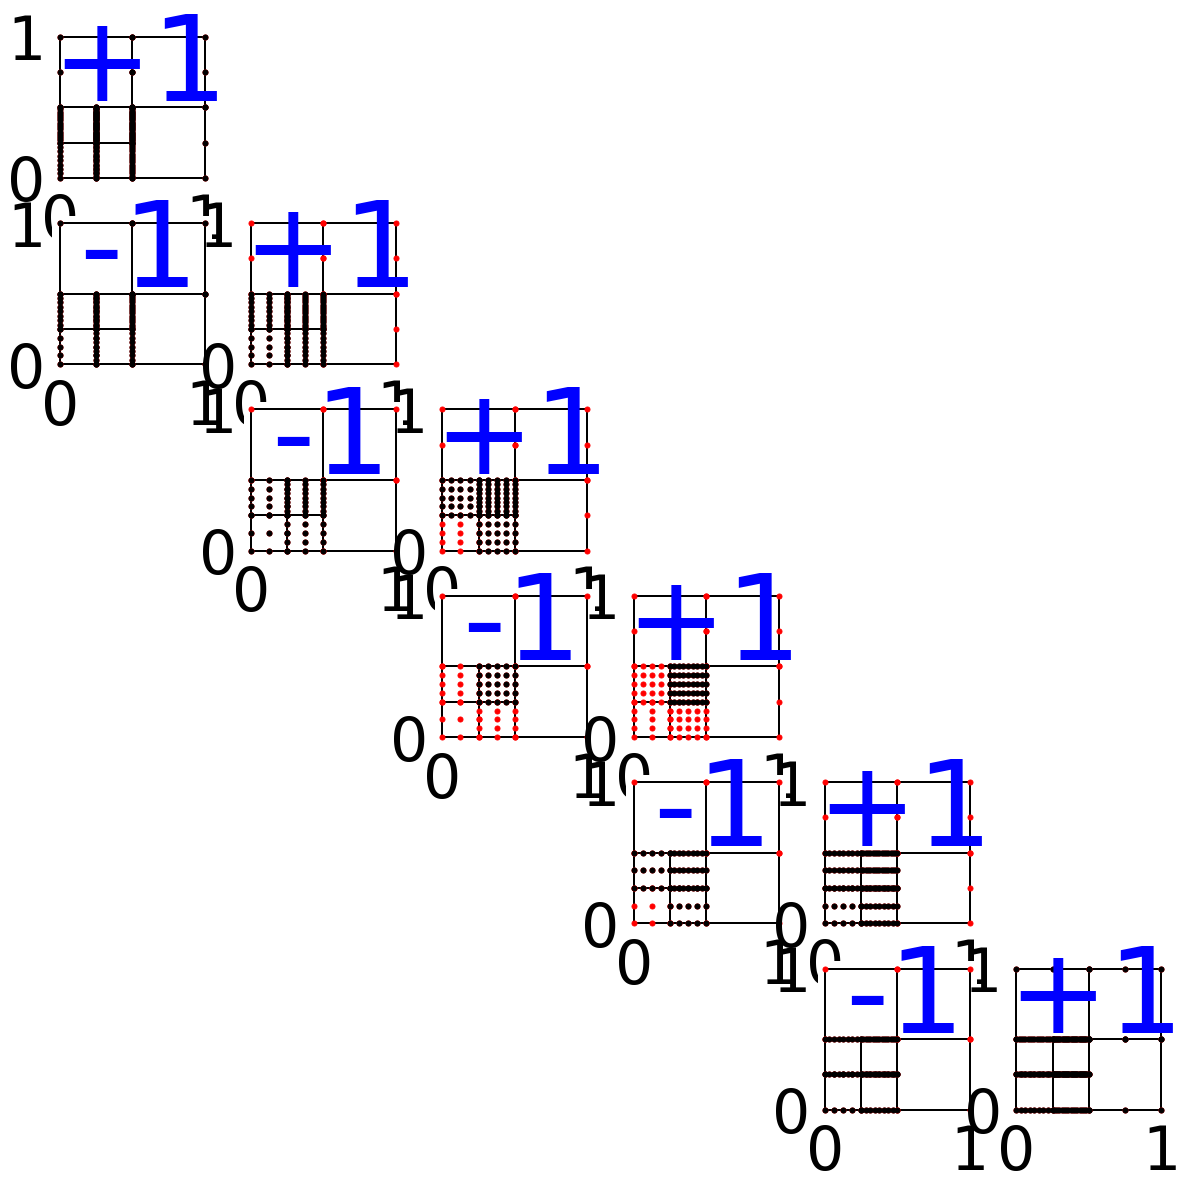

Resulting Sparse Grid:


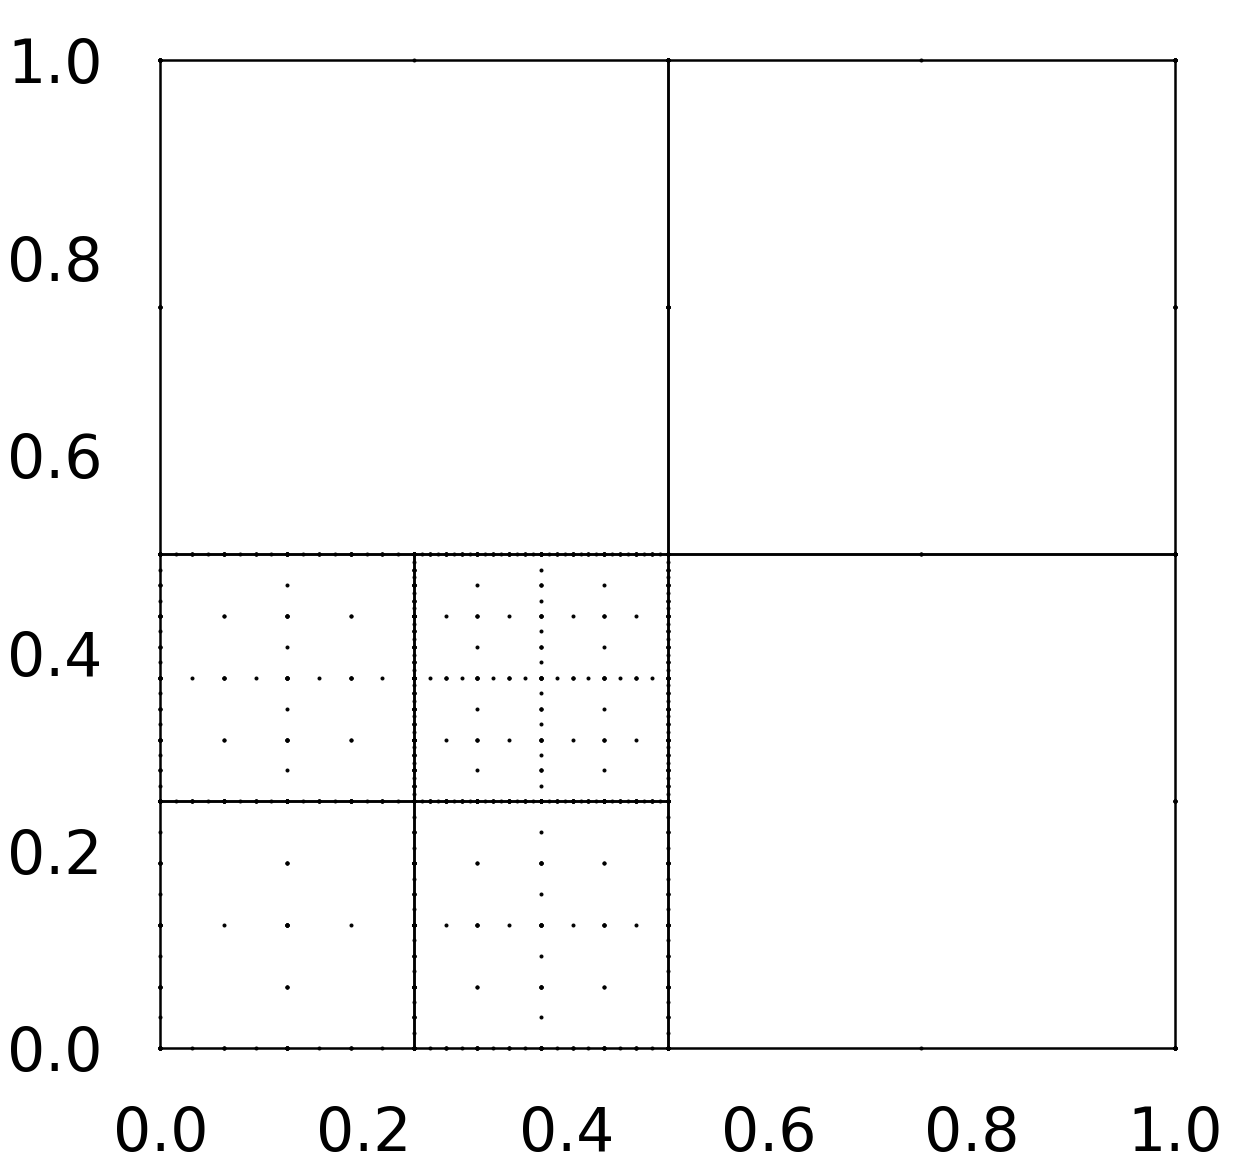

max surplus error: 1.1041517703275182e-05 total surplus error: 0.0023041105615557132
combiintegral: 0.12190421209955932
Current error: 0.019747643514410242
Finished refinement
Refined  1  times
Refinement Graph:


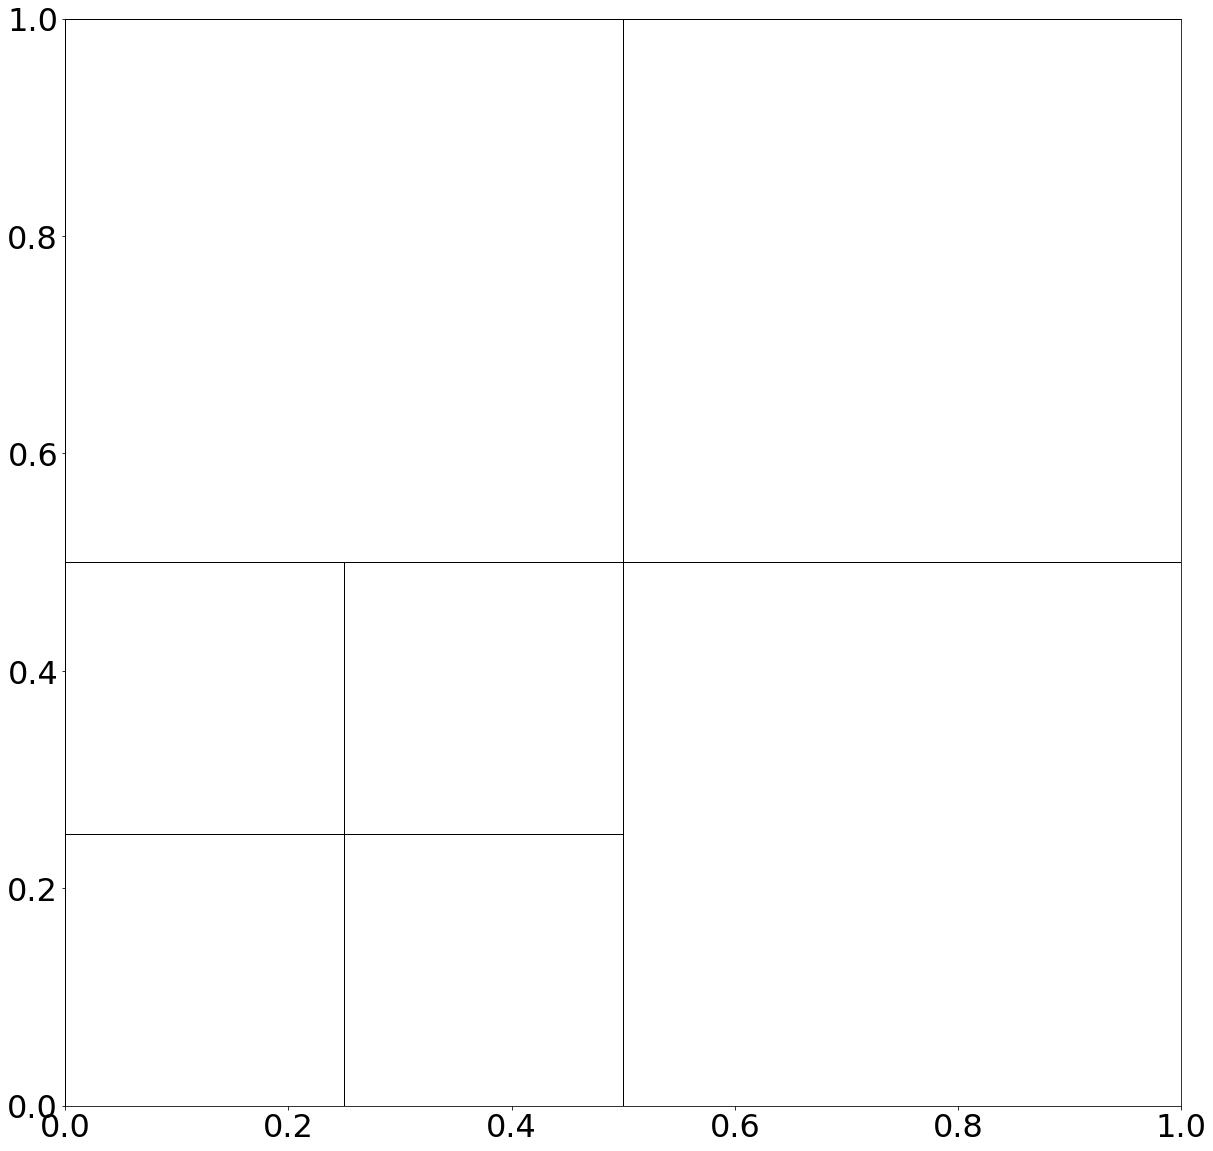

Combi Scheme:


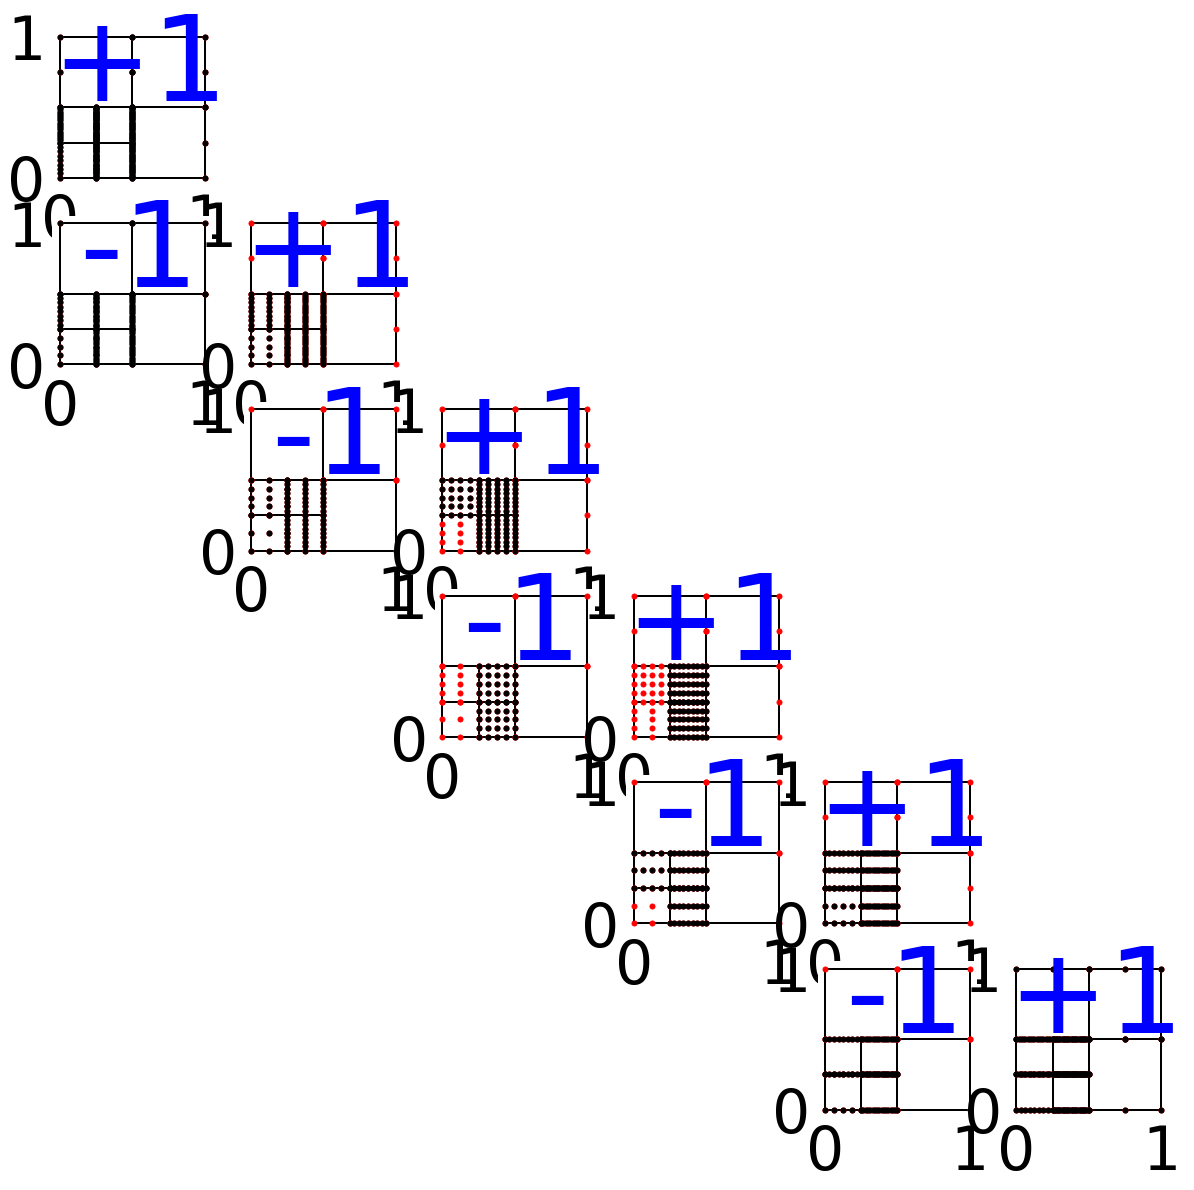

Resulting Sparse Grid:


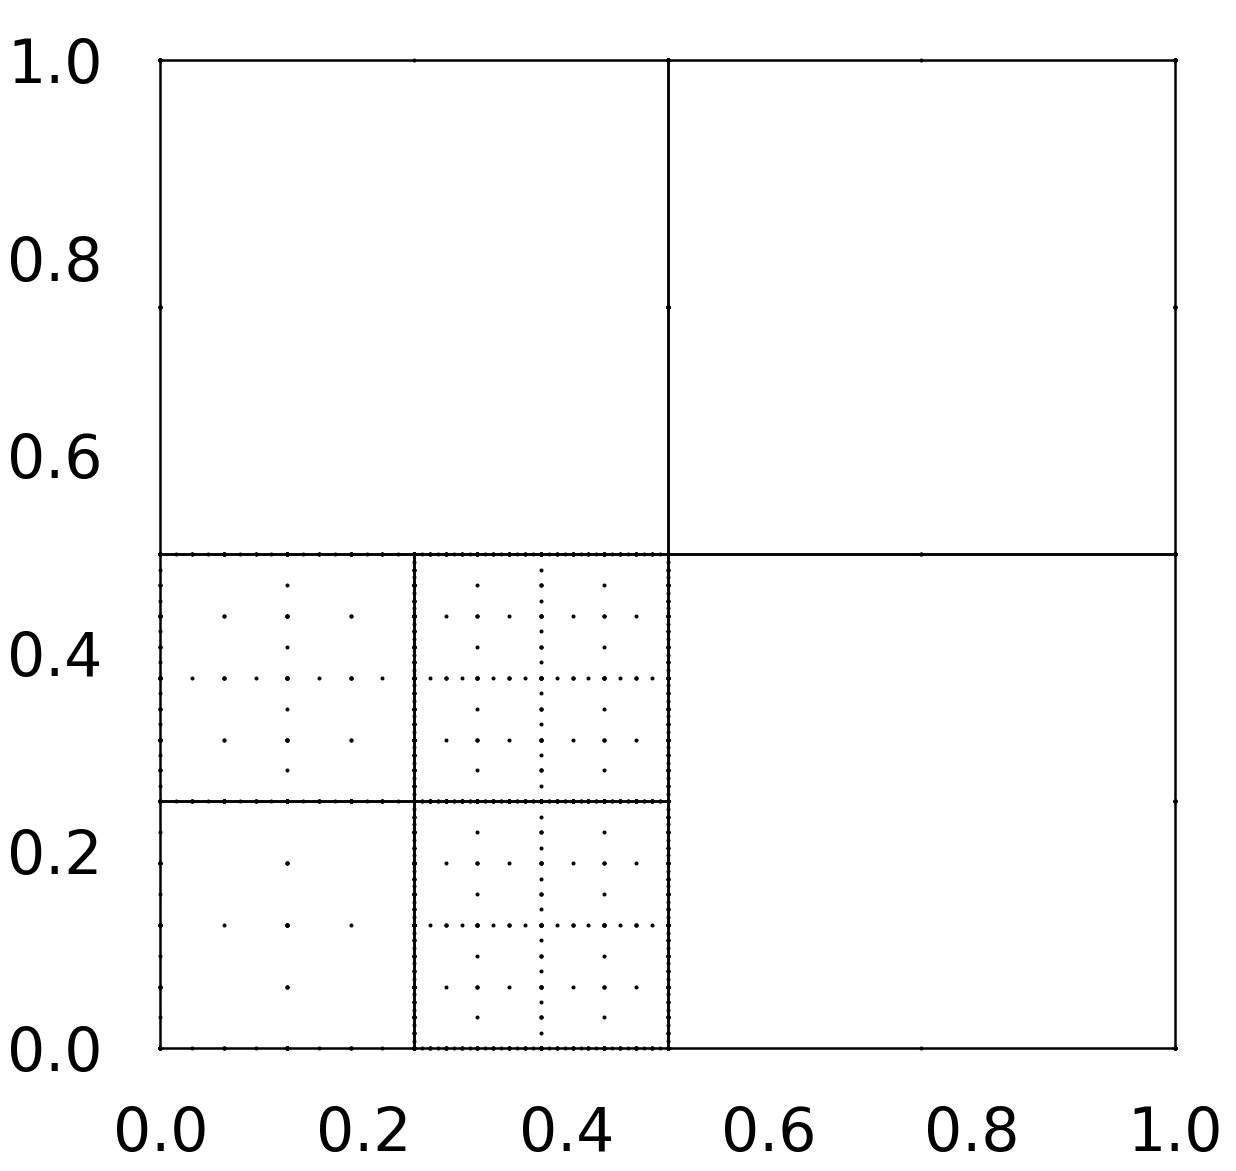

max surplus error: 7.693374494805211e-06 total surplus error: 0.0018567407482583155
combiintegral: 0.12235120522022722
Current error: 0.016153296343619256
Finished refinement
Refined  1  times
Refinement Graph:


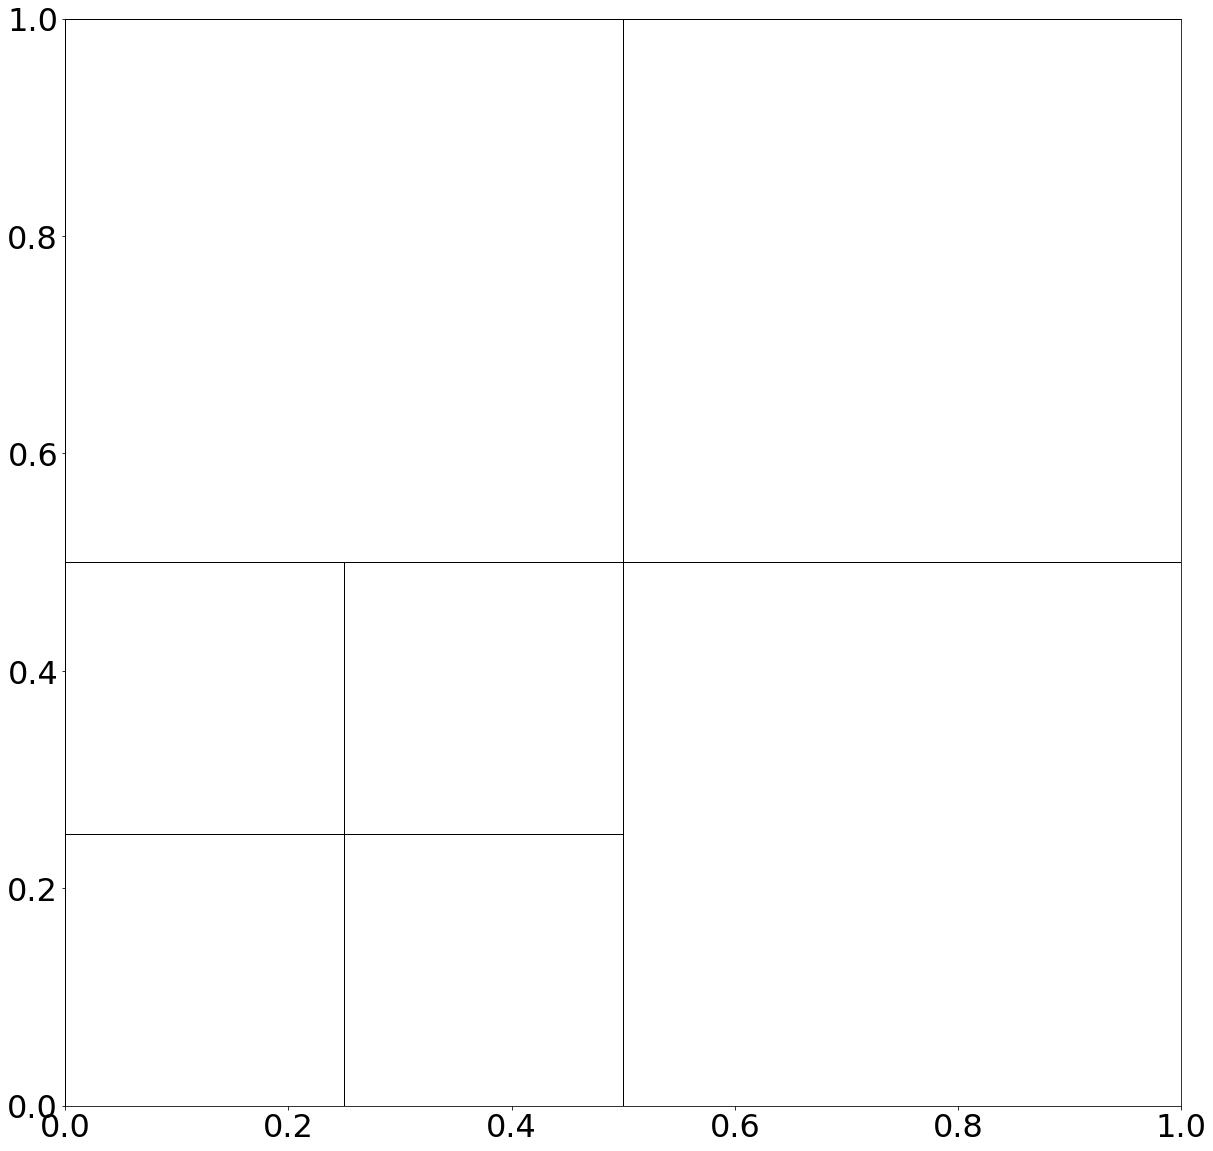

Combi Scheme:


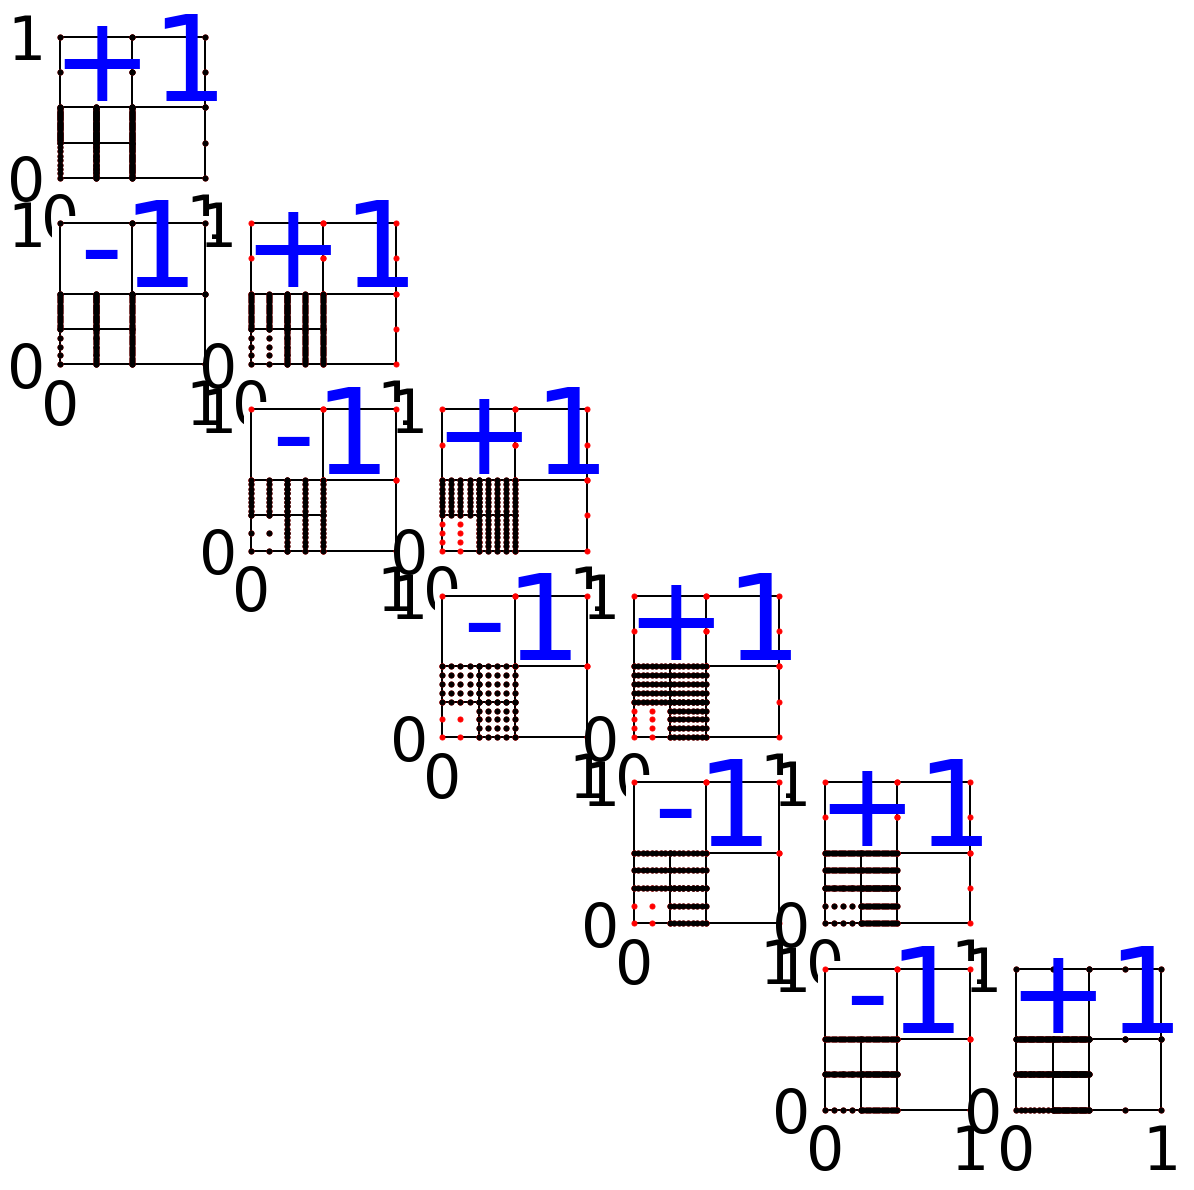

Resulting Sparse Grid:


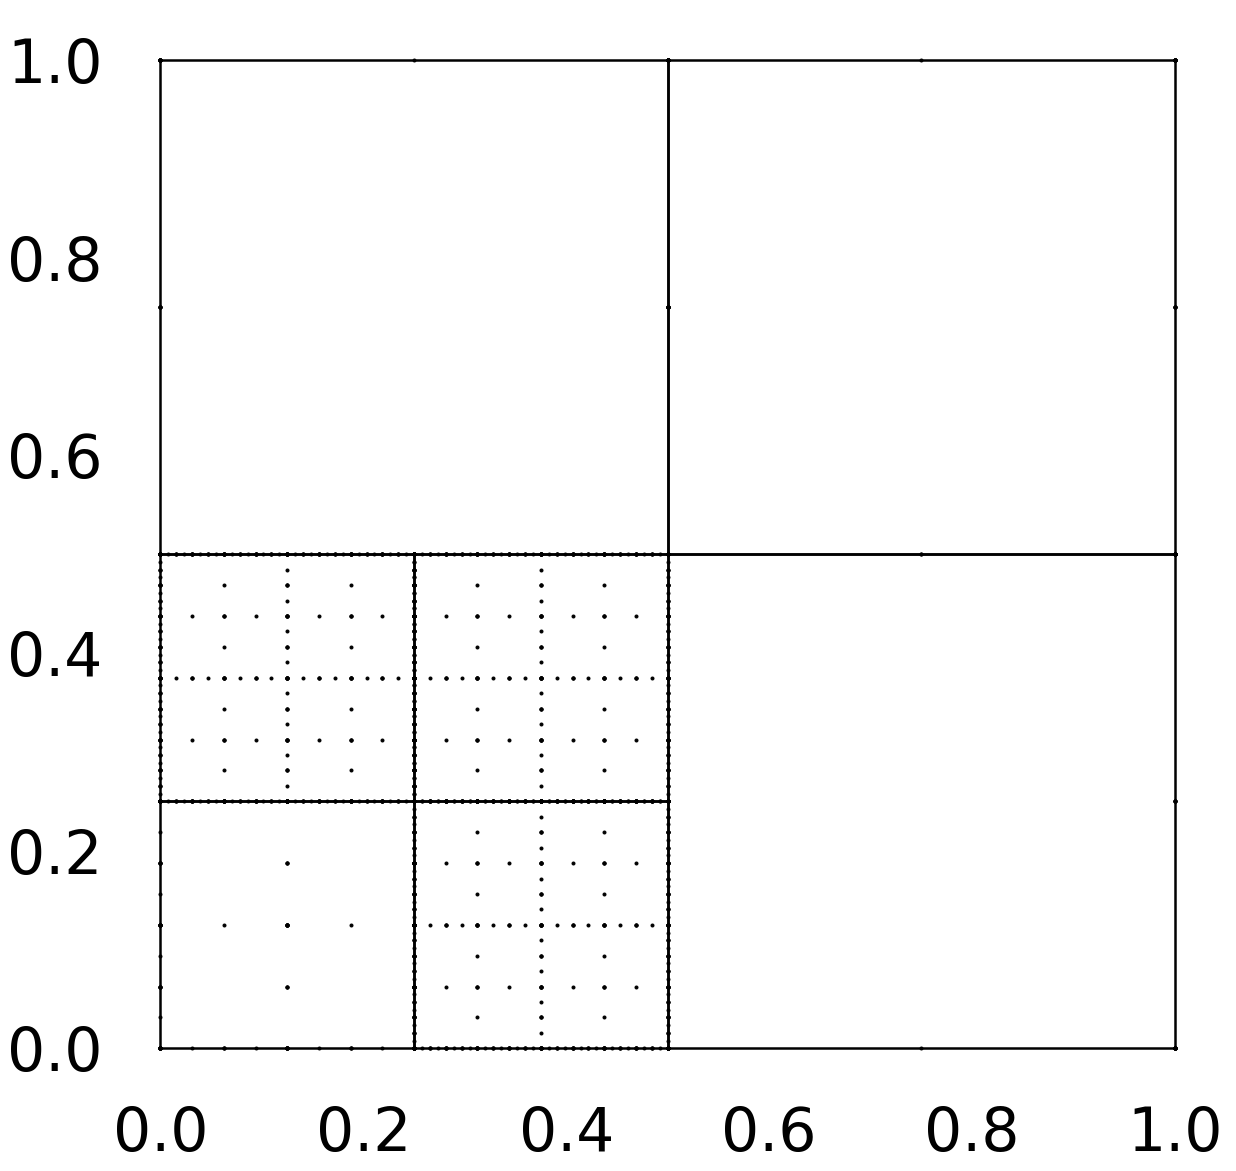

max surplus error: 4.1489163707740645e-06 total surplus error: 0.0015466735819993326
combiintegral: 0.12266430138804747
Current error: 0.01363563718298453
Finished refinement
Refined  1  times
Refinement Graph:


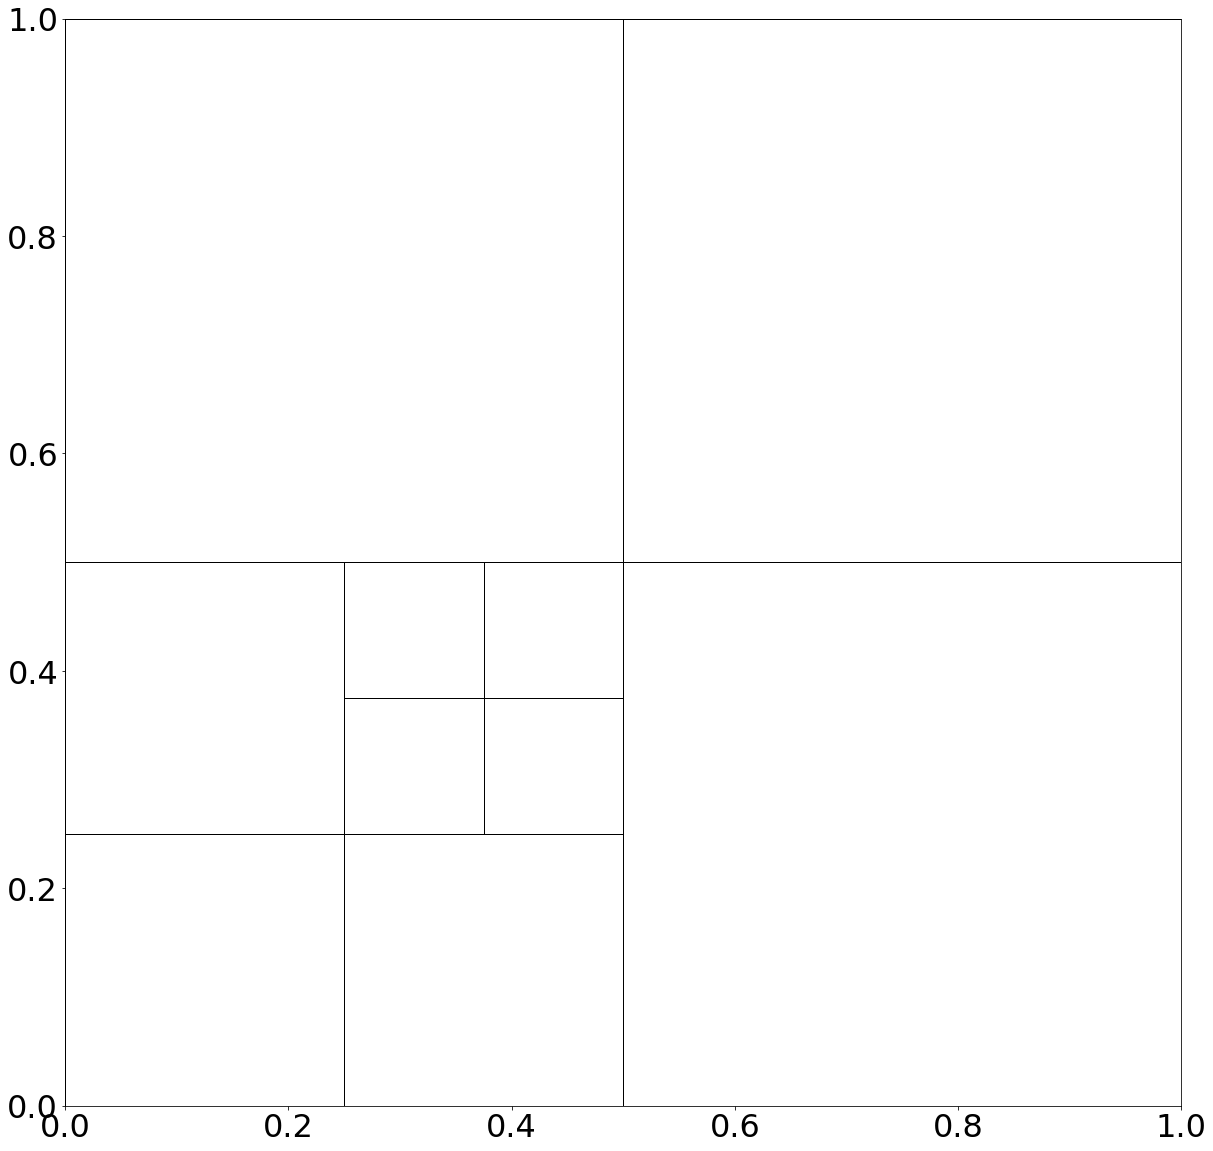

Combi Scheme:


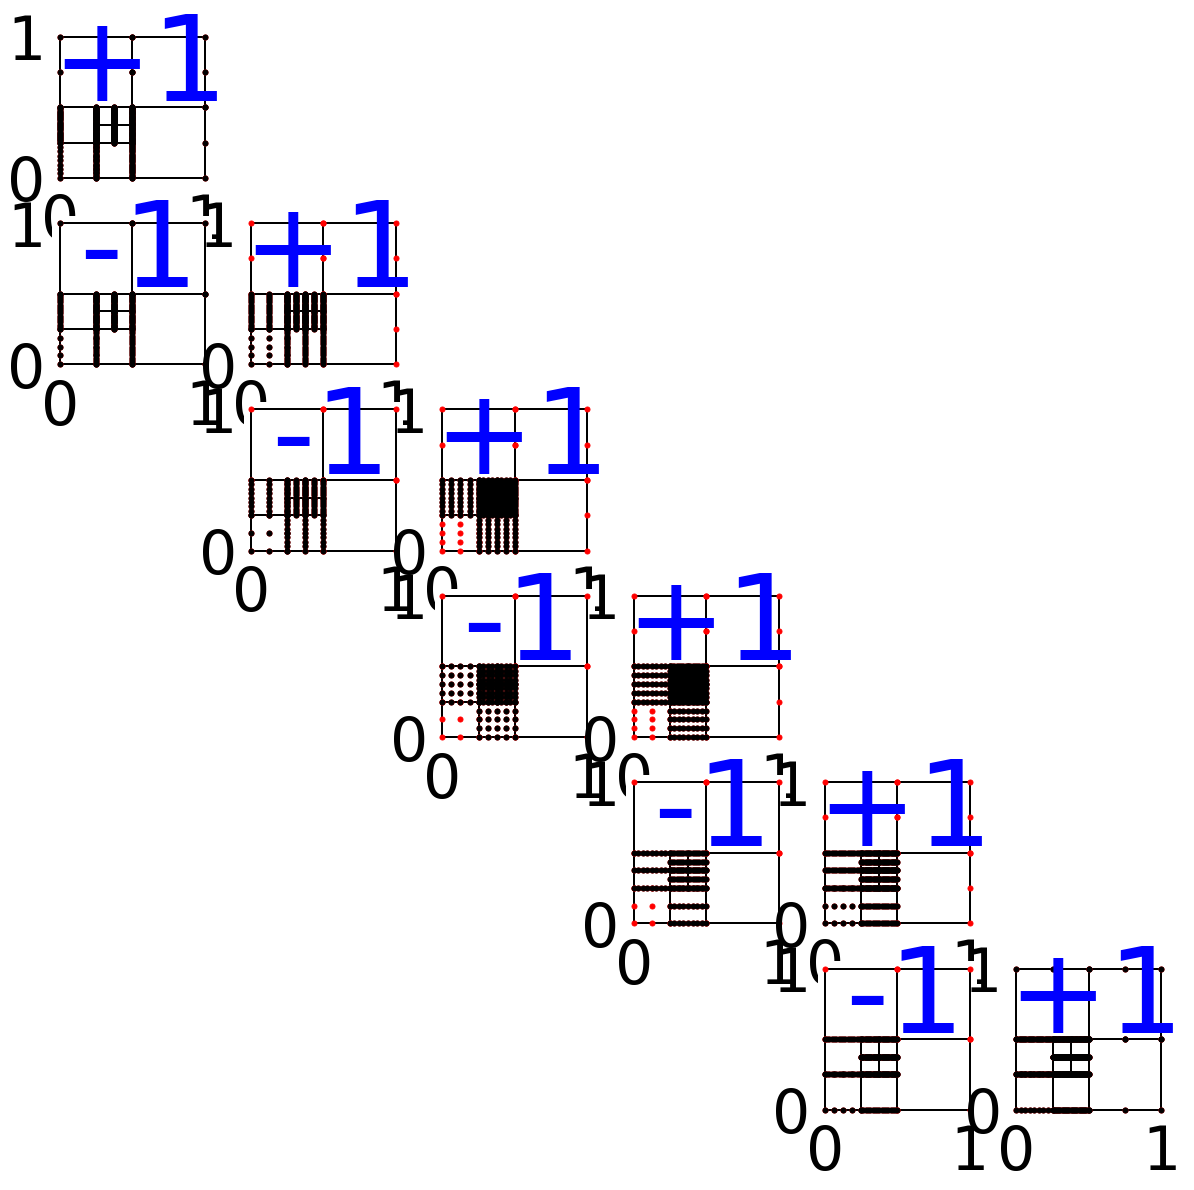

Resulting Sparse Grid:


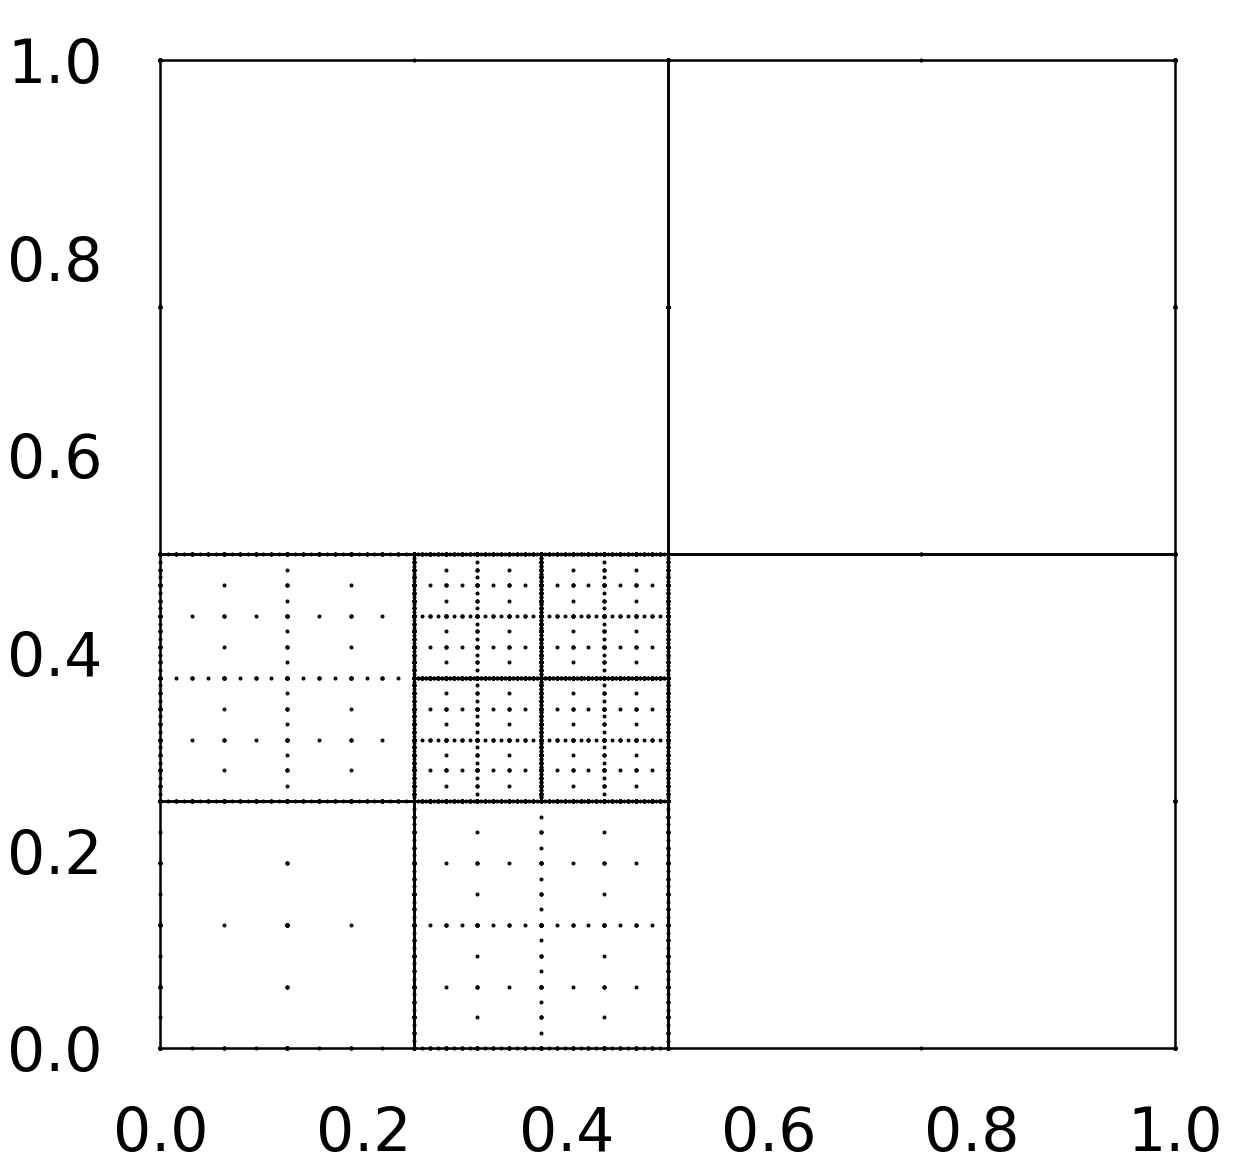

max surplus error: 2.5253848625304636e-06 total surplus error: 0.0013123645449394528
combiintegral: 0.12324397776738052
Current error: 0.008974361521925454
Number of refinements 16
Number of distinct points used during the refinement 914
Time used (s): 69.8569974899292
Final error: 0.008974361521925454
#Points: 914


In [2]:
%matplotlib inline
import numpy as np
from spatiallyAdaptiveExtendSplit import *
from Function import *
from ErrorCalculator import *

# dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator2=ErrorCalculatorExtendSplit()

# define equidistant grid
grid=TrapezoidalGrid(a=a, b=b, dim=dim)

# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = reference_solution)

# define Extend-Split refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b,3,grid,version=0, operation=operation, split_single_dim=False, automatic_extend_split=True)

# performing the spatially adaptive refinement with the Extend-Split method
adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(1,2,f,errorOperator2,10**-2, do_plot=True, reference_solution=reference_solution)